In [1]:
import numpy as np
import pandas as pd
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statistics import mean
import os
from matplotlib.backends.backend_pdf import PdfPages


plt.style.use("ggplot")

In [2]:
os.chdir('/Users/shumailsajjad/Desktop/shumail/Twitter/Political elites/Final Dataset')

In [3]:
PTI = pd.read_excel("Final Dataset.xlsx", sheet_name=0)
PTI.head()

id                                               text  \
0  1513220890334433282  Thank you to all Pakistanis for their amazing ...   
1  1513232489464041473  Never have such crowds come out so spontaneous...   
2  1513244887285522433  میں نے اپنی ملکی تاریخ میں اس سے پہلے اتنی بڑی...   
3  1513110768266330115  Pakistan became an independent state in 1947; ...   
4  1514916156670607367  My request to all those attending our jalsa in...   

                 created_at  retweets  replies   likes lang          score  \
0  2022-04-10T18:22:29.000Z     75337    40116  309862   en  134707.727426   
1  2022-04-10T19:08:34.000Z     94619    24147  297878   en  134174.958650   
2  2022-04-10T19:57:50.000Z     75082    32327  274736   ur  121820.689451   
3  2022-04-10T11:04:54.000Z     70116    32834  267681   en  117862.750211   
4  2022-04-15T10:38:52.000Z     83677    22492  194015   en   98319.201688   

   norm_score    politician     rank                    links  \
0    1.000000  ImranKhanPTI  Top 10%                      NaN   
1    0.996045  ImranKhanPTI  Top 10%  https://t.co/YWrvD1u8MM   
2    0.904333  ImranKhanPTI  Top 10%  https://t.co/YWrvD1u8MM   
3    0.874952  ImranKhanPTI  Top 10%                      NaN   
4    0.729871  ImranKhanPTI  Top 10%                      NaN   

  classification category classification source open in twitter [yes/no]  \
0                     NaN                   NaN                      NaN   
1            social media               twitter                      yes   
2            social media               twitter                      yes   
3                     NaN                   NaN                      NaN   
4                     NaN                   NaN                      NaN   

  verified from twitter only [yes/no]  \
0                                 NaN   
1                                 yes   
2                                 yes   
3                                 NaN   
4                                 NaN   

                                     translated_text  toxicity score  \
0  Thank you to all Pakistanis for their amazing ...        0.322361   
1  Never have such crowds come out so spontaneous...        0.392316   
2  Never before in the history of our country hav...        0.304272   
3  Pakistan became an independent state in 1947; ...        0.057006   
4  My request to all those attending our jalsa in...        0.112747   

   inflammatory score  
0            0.805825  
1            0.568032  
2            0.439309  
3            0.264691  
4            0.323155

In [2007]:
PTI['text'].str.contains('RT').sum()

2986

In [2002]:
PMLN = pd.read_excel("Final Dataset.xlsx", sheet_name=1)
PMLN.head()

id                                               text  \
0  1525361215702179841  RT @elonmusk: The bots are angry at being coun...   
1  1517769272927395842  RT @shazbkhanzdaGEO: فاشسٹ لیڈرکی کہانی جس نےن...   
2  1529489221891035139  RT @OfficialDGISPR: Pakistan strongly condemns...   
3  1533800958538706944  RT @OfficialDGISPR: Pakistan Armed Forces stro...   
4  1550829849123618820  اگر انصاف کے ایوان بھی دھونس، دھمکی،بدتمیزی او...   

                 created_at  retweets  replies  likes lang         score  \
0  2022-05-14T06:23:48.000Z     58250        0      0   en  59755.739335   
1  2022-04-23T07:36:08.000Z     14062        0      0   ur  14425.497108   
2  2022-05-25T15:47:01.000Z     12200        0      0   en  12515.365148   
3  2022-06-06T13:20:19.000Z     11964        0      0   en  12273.264642   
4  2022-07-23T13:07:03.000Z     11288    12212  29184   ur  11044.755242   

   norm_score     politician     rank links classification category  \
0    1.000000  MaryamNSharif  Top 10%   NaN                     NaN   
1    0.241408  MaryamNSharif  Top 10%   NaN                     NaN   
2    0.209442  MaryamNSharif  Top 10%   NaN                     NaN   
3    0.205391  MaryamNSharif  Top 10%   NaN                     NaN   
4    0.184832  MaryamNSharif  Top 10%   NaN                     NaN   

  classification source open in twitter [yes/no]  \
0                   NaN                      NaN   
1                   NaN                      NaN   
2                   NaN                      NaN   
3                   NaN                      NaN   
4                   NaN                      NaN   

  verified from twitter only [yes/no]  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

                                     translated_text  toxicity score  \
0  RT @elonmusk: The bots are angry at being coun...        0.099155   
1  RT @shazbkhanzdaGEO: The story of a fascist le...        0.235235   
2  RT @OfficialDGISPR: Pakistan strongly condemns...        0.096986   
3  RT @OfficialDGISPR: Pakistan Armed Forces stro...        0.149503   
4  If the House of Justice also comes under the p...        0.161587   

   inflammatory score  
0            0.433027  
1            0.727929  
2            0.568032  
3            0.360582  
4            0.152823

In [2008]:
PMLN['text'].str.contains('RT').sum()

2276

In [1862]:
PTI.shape

(5349, 19)

In [1863]:
PMLN.shape

(4071, 19)

In [1864]:
PTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5349 entries, 0 to 5348
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   5349 non-null   int64  
 1   text                                 5349 non-null   object 
 2   created_at                           5349 non-null   object 
 3   retweets                             5349 non-null   int64  
 4   replies                              5349 non-null   int64  
 5   likes                                5349 non-null   int64  
 6   lang                                 5349 non-null   object 
 7   score                                5349 non-null   float64
 8   norm_score                           5349 non-null   float64
 9   politician                           5349 non-null   object 
 10  rank                                 5349 non-null   object 
 11  links                         

In [1865]:
PMLN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   4071 non-null   int64  
 1   text                                 4071 non-null   object 
 2   created_at                           4071 non-null   object 
 3   retweets                             4071 non-null   int64  
 4   replies                              4071 non-null   int64  
 5   likes                                4071 non-null   int64  
 6   lang                                 4071 non-null   object 
 7   score                                4071 non-null   float64
 8   norm_score                           4071 non-null   float64
 9   politician                           4071 non-null   object 
 10  rank                                 4071 non-null   object 
 11  links                         

In [1866]:
PTI = PTI.drop_duplicates(subset=PTI.columns.difference(['rank']))
PMLN = PMLN.drop_duplicates(subset=PMLN.columns.difference(['rank']))

In [1867]:
PTI['politician'].unique()

array(['ImranKhanPTI', 'fawadchaudhry', 'SHABAZGIL', 'MuradSaeedPTI',
       'AsadQaiserPTI', 'Ali_MuhammadPTI', 'Hammad_Azhar',
       'ShehryarAfridi1', 'Asad_Umar', 'QasimKhanSuri', 'Shafqat_Mahmood',
       'SMQureshiPTI', 'zartajgulwazir', 'ShireenMazari1',
       'Dr_YasminRashid', 'NaureenIbrahim'], dtype=object)

In [1868]:
PMLN['politician'].unique()

array(['MaryamNSharif', 'NawazSharifMNS', 'CMShehbaz', 'HamzaSS',
       'KhawajaMAsif', 'betterpakistan-Ahsan Iqbal', 'RanaSanaullahPK',
       'SKhaqanAbbasi', 'AyazSadiq122', 'KhSaad_Rafique', 'MiftahIsmail',
       'Marriyum_A', 'ShazaFK', 'hinaparvezbutt', 'AyeshaRajabAli1',
       'AishaGPasha'], dtype=object)

In [1869]:
politician_PTI = ['Imran Khan', 'Fawad Chaudhry', 'Shabaz Gill', 'Murad Saeed', 'Asad Qaiser', 'Ali Muhammad', 'Hammad Azhar', 'Shehryar Afridi', 'Asad Umar', 'Qasim Khan Suri', 'Shafqat Mahmood', 'Shah Mehmood Qureshi', 'Zartaj Gul Wazir', 'Shireen Mazari', 'Dr. Yasmin Rashid', 'Naureen Ibrahim',]
politician_PMLN = ['Maryam Nawaz Sharif', 'Nawaz Sharif', 'Shehbaz Sharif', 'Hamza Shehbaz Sharif', 'Khawaja Muhammad Asif', 'Ahsan Iqbal', 'Rana Sanaullah', 'Shahid Khaqan Abbasi', 'Ayaz Sadiq', 'Khawaja Saad Rafique', 'Miftah Ismail', 'Marriyum Aurangzeb', 'Shaza Fatima Khawaja', 'Hina Parvez Butt', 'Ayesha Rajab Ali', 'Aisha Ghaus Pasha']

In [1870]:
PTI['politician'] = PTI['politician'].replace(PTI['politician'].unique(), politician_PTI)
PMLN['politician'] = PMLN['politician'].replace(PMLN['politician'].unique(), politician_PMLN)

#### Descriptive Statistic 1: # of political elites, PTI elites, PML-N elites

In [1871]:
PTI['politician'].nunique() + PMLN['politician'].nunique() 

32

In [1872]:
PTI['politician'].nunique()

16

In [1873]:
PMLN['politician'].nunique() 

16

In [1874]:
PTI['politician'].unique()

array(['Imran Khan', 'Fawad Chaudhry', 'Shabaz Gill', 'Murad Saeed',
       'Asad Qaiser', 'Ali Muhammad', 'Hammad Azhar', 'Shehryar Afridi',
       'Asad Umar', 'Qasim Khan Suri', 'Shafqat Mahmood',
       'Shah Mehmood Qureshi', 'Zartaj Gul Wazir', 'Shireen Mazari',
       'Dr. Yasmin Rashid', 'Naureen Ibrahim'], dtype=object)

In [1875]:
PMLN['politician'].unique()

array(['Maryam Nawaz Sharif', 'Nawaz Sharif', 'Shehbaz Sharif',
       'Hamza Shehbaz Sharif', 'Khawaja Muhammad Asif', 'Ahsan Iqbal',
       'Rana Sanaullah', 'Shahid Khaqan Abbasi', 'Ayaz Sadiq',
       'Khawaja Saad Rafique', 'Miftah Ismail', 'Marriyum Aurangzeb',
       'Shaza Fatima Khawaja', 'Hina Parvez Butt', 'Ayesha Rajab Ali',
       'Aisha Ghaus Pasha'], dtype=object)

In [1876]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+15,y[i],ha = 'center',color = "black", alpha=0.8, fontweight='bold')

In [1877]:
os.chdir('/Users/shumailsajjad/Desktop/shumail/Twitter/Political elites/Final Dataset/Descriptive Statistics Images')

#### Descriptive statistic 2: # tweets by each elite

In [1878]:
PTI_temp_1 = PTI.groupby(by=PTI['politician'])
tweets_by_PTI_elites = PTI_temp_1.count()['text'].sort_values(ascending=False)
print(tweets_by_PTI_elites)
print("\n")
print("Total tweets by PTI elites: ",sum(tweets_by_PTI_elites))

politician
Fawad Chaudhry          1056
Zartaj Gul Wazir         942
Qasim Khan Suri          519
Shireen Mazari           492
Shabaz Gill              474
Ali Muhammad             396
Hammad Azhar             378
Naureen Ibrahim          234
Murad Saeed              222
Dr. Yasmin Rashid        180
Imran Khan               120
Asad Qaiser               90
Asad Umar                 84
Shehryar Afridi           66
Shafqat Mahmood           60
Shah Mehmood Qureshi      36
Name: text, dtype: int64


Total tweets by PTI elites:  5349


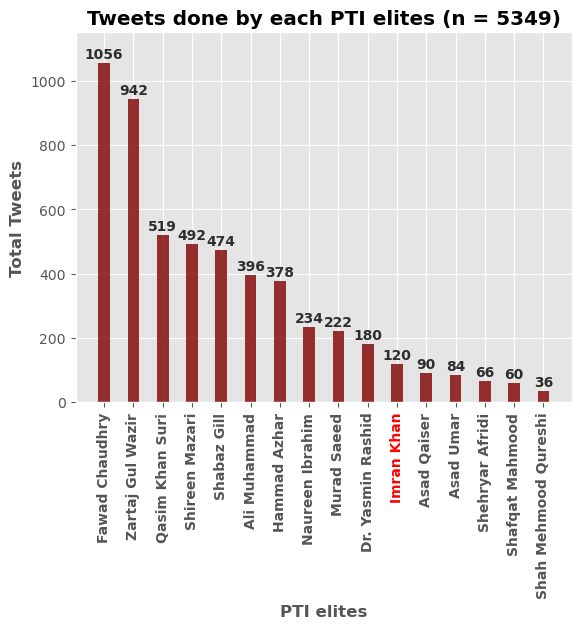

In [1879]:
plt.bar(tweets_by_PTI_elites.index,tweets_by_PTI_elites, color='maroon', width=0.4, alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('PTI elites', fontweight='bold')
plt.ylabel('Total Tweets', fontweight='bold')
plt.title("Tweets done by each PTI elites (n = " + str(sum(tweets_by_PTI_elites))+")", fontweight='bold')
addlabels(tweets_by_PTI_elites.index,tweets_by_PTI_elites)
plt.gca().get_xticklabels()[10].set_color('red') 
ax = plt.gca()
ax.set_ylim(0, 1150)
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
fig.set_size_inches(20, 10)
fig.tight_layout()
plt.savefig('1.png', bbox_inches='tight')
plt.show()

In [1880]:
PMLN_temp_1 = PMLN.groupby(by=PMLN['politician'])
tweets_by_PMLN_elites = PMLN_temp_1.count()['text'].sort_values(ascending=False)
print(tweets_by_PMLN_elites)
print("\n")
print("Total tweets by PMLN elites: ",sum(tweets_by_PMLN_elites))

politician
Hina Parvez Butt         975
Shaza Fatima Khawaja     888
Maryam Nawaz Sharif      552
Ahsan Iqbal              330
Marriyum Aurangzeb       261
Khawaja Muhammad Asif    249
Ayesha Rajab Ali         195
Khawaja Saad Rafique     192
Miftah Ismail            177
Shehbaz Sharif            93
Hamza Shehbaz Sharif      81
Rana Sanaullah            63
Ayaz Sadiq                 6
Aisha Ghaus Pasha          3
Nawaz Sharif               3
Shahid Khaqan Abbasi       1
Name: text, dtype: int64


Total tweets by PMLN elites:  4069


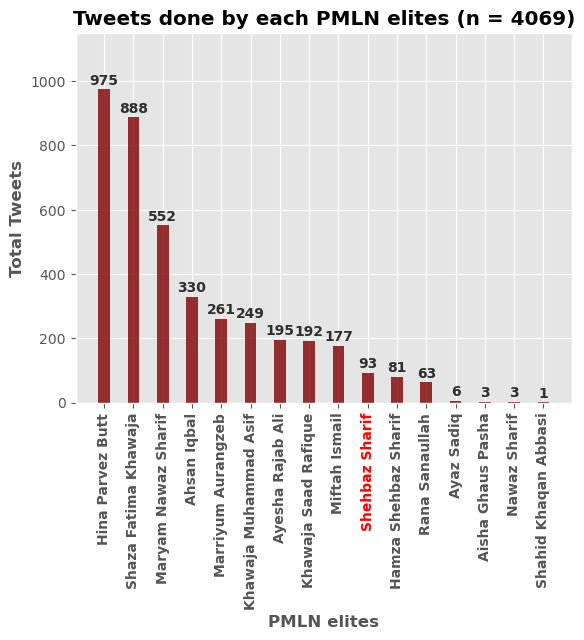

In [1881]:
plt.bar(tweets_by_PMLN_elites.index,tweets_by_PMLN_elites, color='maroon', width=0.4, alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('PMLN elites', fontweight='bold')
plt.ylabel('Total Tweets', fontweight='bold')
plt.title("Tweets done by each PMLN elites (n = " + str(sum(tweets_by_PMLN_elites))+')', fontweight='bold')
addlabels(tweets_by_PMLN_elites.index,tweets_by_PMLN_elites)
plt.gca().get_xticklabels()[9].set_color('red')
ax = plt.gca()
ax.set_ylim(0, 1150)
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
fig.set_size_inches(20, 10)
pdf.savefig(fig, dpi=300, orientation='portrait')
fig.tight_layout()
plt.savefig('2.png', bbox_inches='tight')
plt.show()

#### Descriptive statistic 3: Engagement with tweets of elites (likes, comments, shares) — avg, distribution

In [1882]:
print('Average retweets in PTI = ', PTI['retweets'].agg(np.mean))
print('Average replies in PTI = ', PTI['replies'].agg(np.mean))
print('Average likes in PTI = ', PTI['likes'].agg(np.mean))

Average retweets in PTI =  6487.919237240606
Average replies in PTI =  450.26117031220787
Average likes in PTI =  7545.086371284352


In [1883]:
print('Average retweets in PMLN = ', PMLN['retweets'].agg(np.mean))
print('Average replies in PMLN = ', PMLN['replies'].agg(np.mean))
print('Average likes in PMLN = ', PMLN['likes'].agg(np.mean))

Average retweets in PMLN =  1508.5453428360777
Average replies in PMLN =  818.8648316539691
Average likes in PMLN =  1813.1044482673876


In [1884]:
a = ("PTI", "PMLN")
b = {'Average likes':(PTI['likes'].agg(np.mean), PMLN['likes'].agg(np.mean)),
    'Average retweets': (PTI['retweets'].agg(np.mean), PMLN['retweets'].agg(np.mean)),
    'Average replies': (PTI['replies'].agg(np.mean), PMLN['replies'].agg(np.mean)),
    }

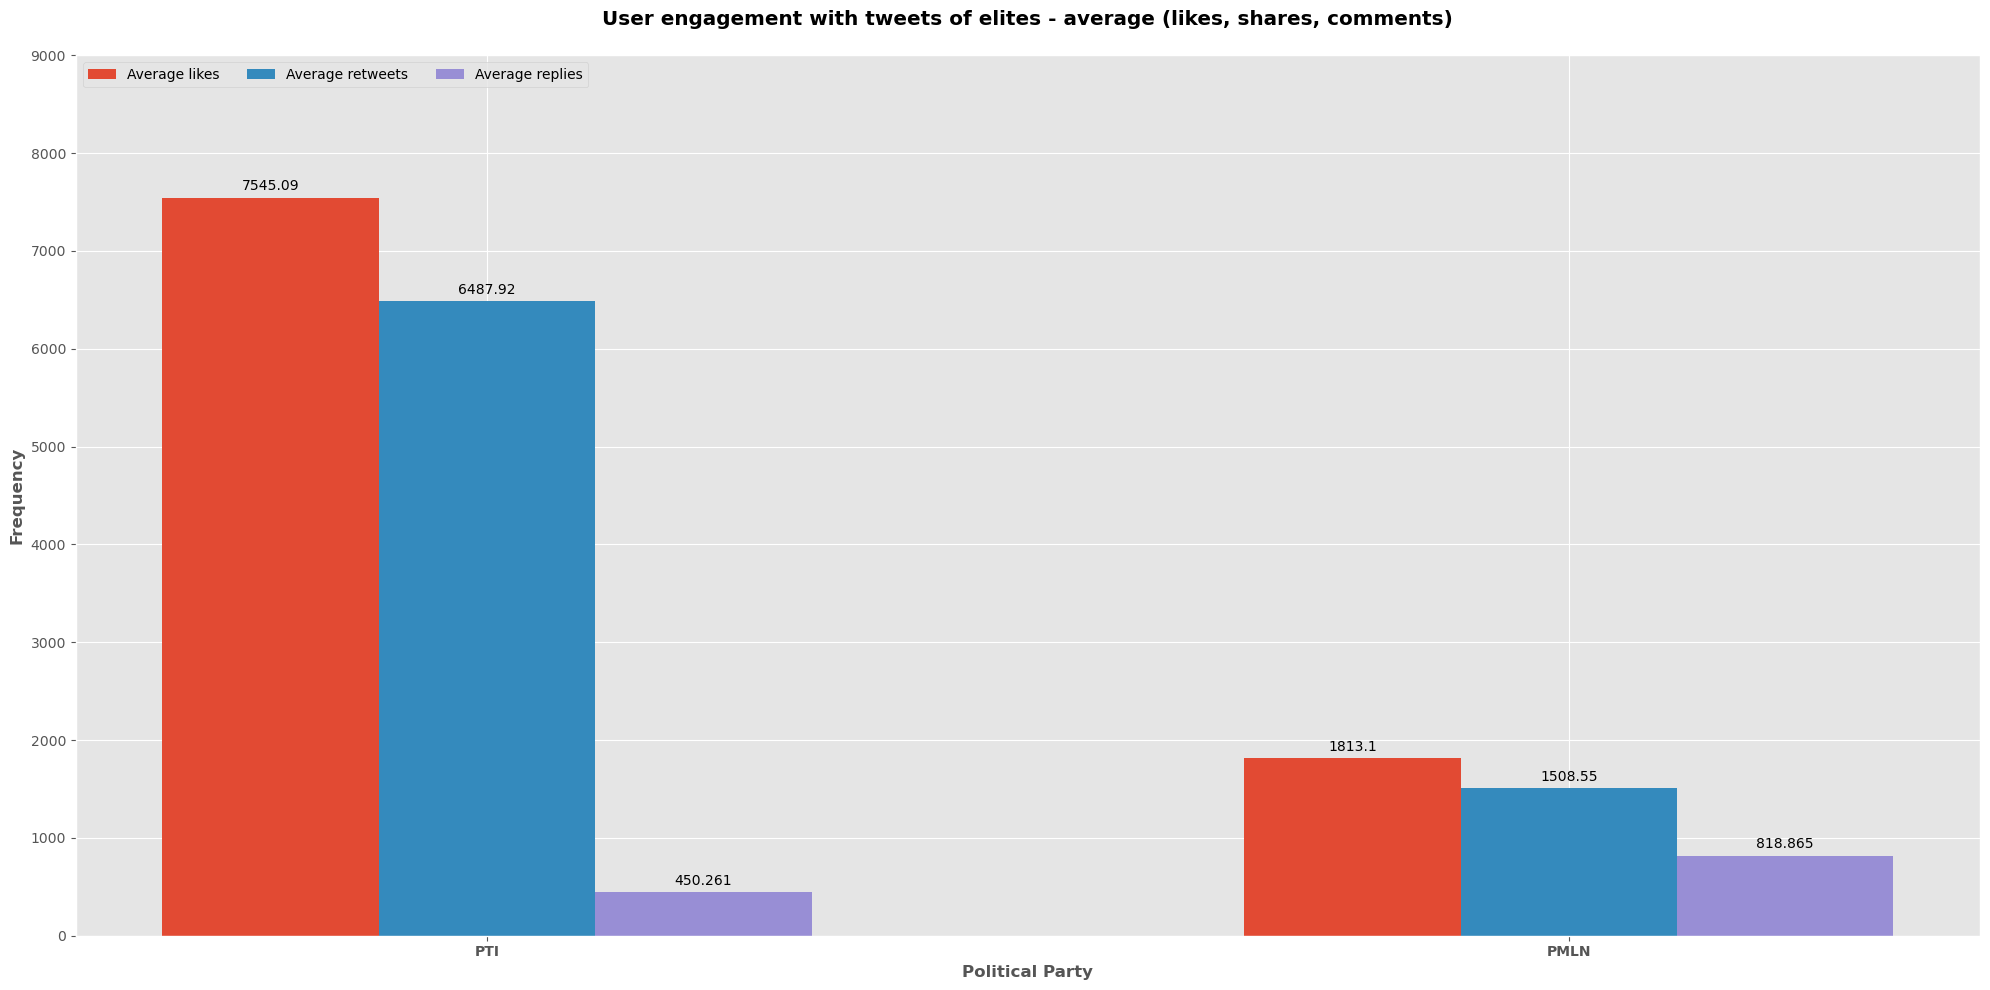

In [1885]:
x = np.arange(len(a))
width = 0.2  # the width of the bars
multiplier = 1
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in b.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_xlabel('Political Party', fontweight='bold')
ax.set_title('User engagement with tweets of elites - average (likes, shares, comments)\n', fontweight='bold')
ax.set_xticks(x + 2*width, a)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 9000)
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
fig.set_size_inches(20, 10)
fig.tight_layout()
plt.savefig('3.png', bbox_inches='tight')
plt.show()

In [1886]:
PTI_temp_2 = PTI.groupby(by=PTI['politician'])
mean = PTI_temp_2.mean(numeric_only=True)
retweets_text = mean['retweets'].sort_values(ascending=False)
retweets_text

politician
Imran Khan              23278.016667
Dr. Yasmin Rashid        9007.855556
Qasim Khan Suri          8719.660886
Zartaj Gul Wazir         7113.025478
Shabaz Gill              6930.229958
Asad Umar                6466.059524
Shah Mehmood Qureshi     6215.250000
Murad Saeed              6056.783784
Fawad Chaudhry           5907.732955
Hammad Azhar             5421.161376
Ali Muhammad             5049.429293
Shireen Mazari           4288.162602
Shafqat Mahmood          3290.716667
Shehryar Afridi          3162.409091
Naureen Ibrahim          2756.572650
Asad Qaiser              2426.466667
Name: retweets, dtype: float64

In [1887]:
replies_text = mean['replies'].sort_values(ascending=False)
replies_text

politician
Imran Khan              5504.925000
Shabaz Gill             1388.424051
Shah Mehmood Qureshi     785.361111
Asad Umar                682.107143
Shehryar Afridi          443.696970
Fawad Chaudhry           327.289773
Ali Muhammad             319.393939
Qasim Khan Suri          291.886320
Murad Saeed              282.346847
Asad Qaiser              259.855556
Hammad Azhar             245.984127
Shireen Mazari           155.560976
Shafqat Mahmood          128.450000
Zartaj Gul Wazir          83.089172
Dr. Yasmin Rashid         53.922222
Naureen Ibrahim            0.141026
Name: replies, dtype: float64

In [1888]:
likes_text = mean['likes'].sort_values(ascending=False)
likes_text

politician
Imran Khan              70622.800000
Shabaz Gill             20119.455696
Asad Umar               17358.119048
Shah Mehmood Qureshi    16175.611111
Shehryar Afridi          8899.939394
Ali Muhammad             7018.868687
Asad Qaiser              6678.644444
Hammad Azhar             6446.267196
Murad Saeed              6345.576577
Fawad Chaudhry           5699.237689
Qasim Khan Suri          5289.551060
Shafqat Mahmood          4064.366667
Shireen Mazari           3619.727642
Zartaj Gul Wazir         1571.983015
Dr. Yasmin Rashid        1243.211111
Naureen Ibrahim             2.247863
Name: likes, dtype: float64

In [1889]:
temp = retweets_text.to_frame().join(replies_text).join(likes_text)
temp = temp.sort_values(by=['likes'],ascending=False)

In [1890]:
a = temp.index
b = {'Average likes':round(temp['likes'],0),
    'Average retweets': round(temp['retweets'],0),
    'Average replies': round(temp['replies'],0),
    }

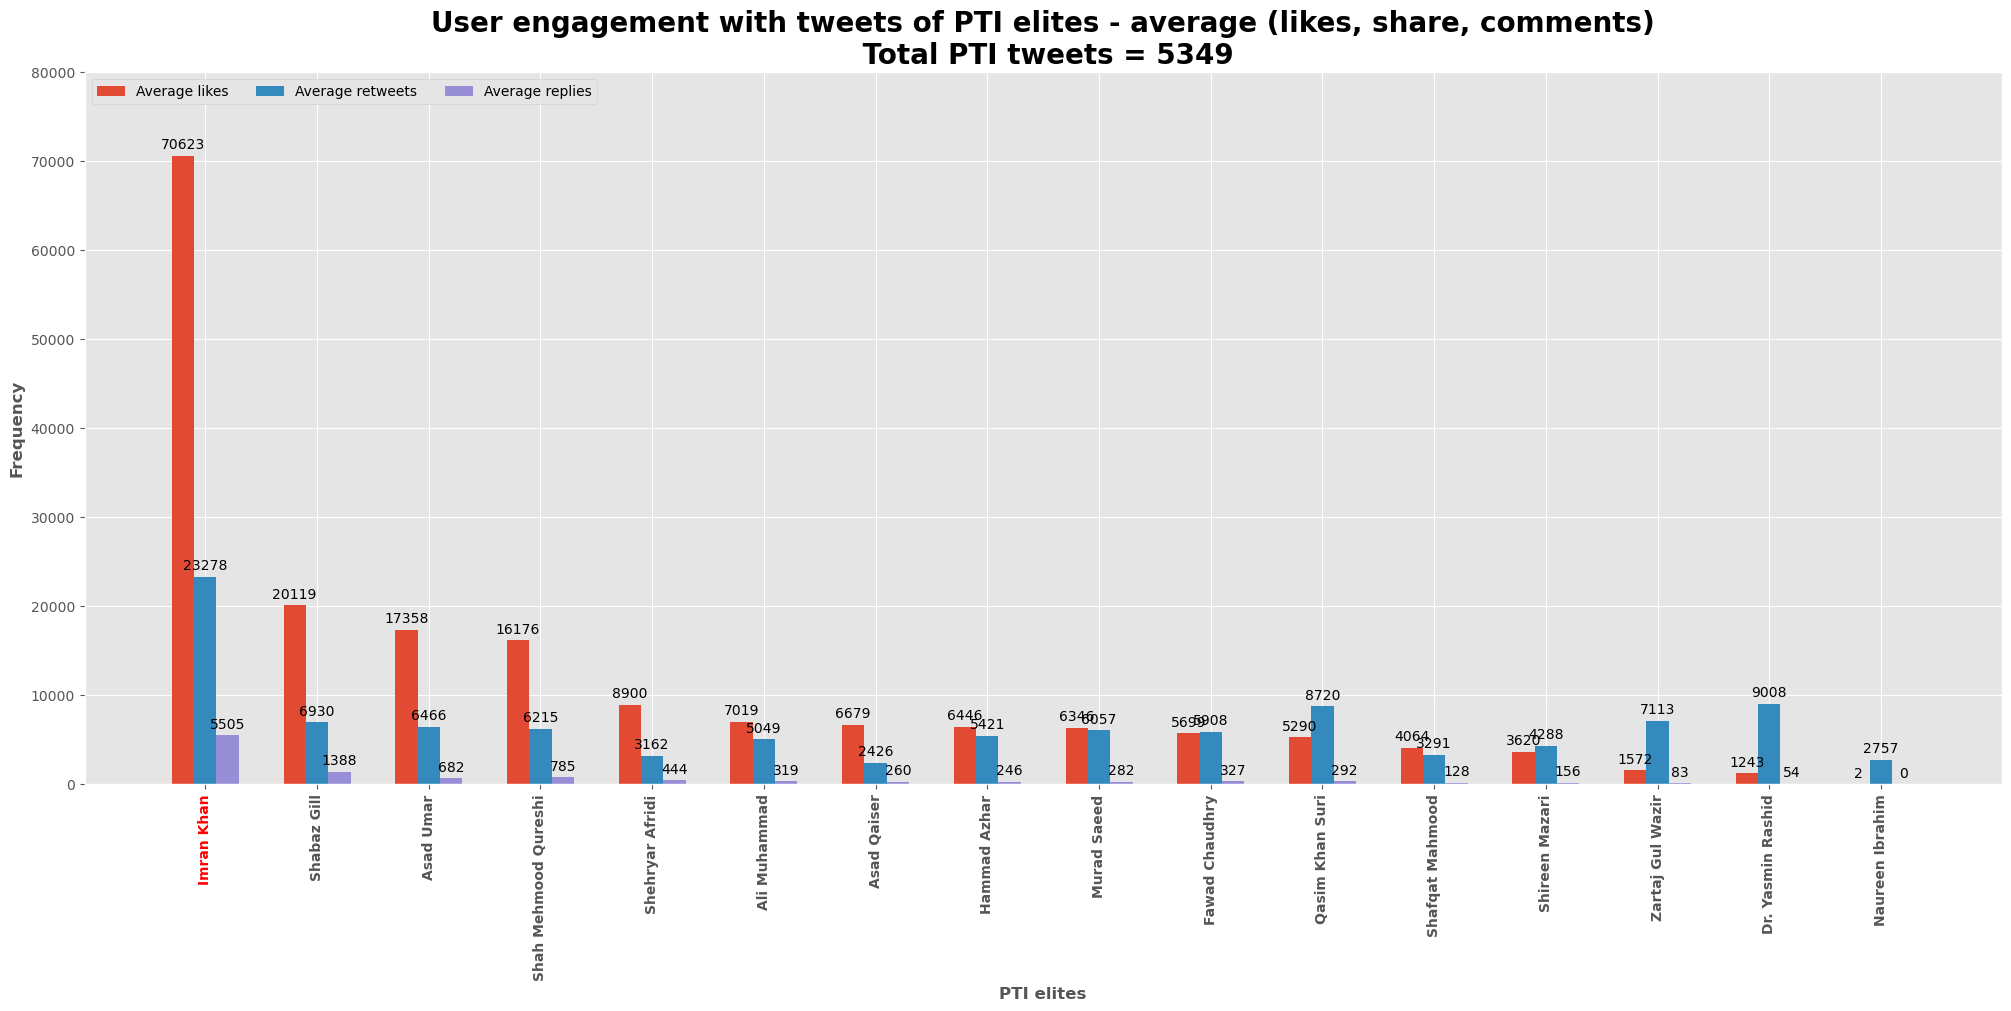

In [1891]:
x = np.arange(len(a))
width = 0.2 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in b.items():
    offset = width * multiplier 
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_xlabel('PTI elites', fontweight='bold')
ax.set_title('User engagement with tweets of PTI elites - average (likes, share, comments)\n Total PTI tweets = ' + str(sum(tweets_by_PTI_elites)), fontsize=20, fontweight='bold')
ax.set_xticks(x + width, a)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 80000)
plt.xticks(rotation=90)
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
plt.gca().get_xticklabels()[0].set_color('red') 

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.savefig('4.png', bbox_inches='tight')
plt.show()

In [1892]:
PMLN_temp_2 = PMLN.groupby(by=PMLN['politician'])
mean = PMLN_temp_2.mean(numeric_only=True)
retweets_text = mean['retweets'].sort_values(ascending=False)
retweets_text

politician
Nawaz Sharif             6711.333333
Maryam Nawaz Sharif      2283.266304
Shaza Fatima Khawaja     1871.382883
Khawaja Muhammad Asif    1721.738956
Shehbaz Sharif           1698.946237
Ayesha Rajab Ali         1584.687179
Hina Parvez Butt         1278.452308
Marriyum Aurangzeb       1259.076628
Rana Sanaullah           1246.984127
Khawaja Saad Rafique     1056.755208
Ahsan Iqbal               781.181818
Hamza Shehbaz Sharif      723.024691
Miftah Ismail             704.175141
Shahid Khaqan Abbasi      435.000000
Ayaz Sadiq                306.666667
Aisha Ghaus Pasha         140.333333
Name: retweets, dtype: float64

In [1893]:
replies_text = mean['replies'].sort_values(ascending=False)
replies_text

politician
Nawaz Sharif             8999.666667
Shehbaz Sharif           3344.817204
Maryam Nawaz Sharif      2282.175725
Rana Sanaullah           1893.000000
Ahsan Iqbal               940.393939
Khawaja Saad Rafique      893.578125
Hina Parvez Butt          837.130256
Hamza Shehbaz Sharif      709.975309
Shahid Khaqan Abbasi      692.000000
Marriyum Aurangzeb        566.865900
Miftah Ismail             452.322034
Ayaz Sadiq                102.833333
Khawaja Muhammad Asif     102.598394
Ayesha Rajab Ali           19.205128
Shaza Fatima Khawaja        0.735360
Aisha Ghaus Pasha           0.000000
Name: replies, dtype: float64

In [1894]:
likes_text = mean['likes'].sort_values(ascending=False)
likes_text

politician
Nawaz Sharif             26521.666667
Shehbaz Sharif            8188.096774
Rana Sanaullah            5479.111111
Maryam Nawaz Sharif       4654.139493
Khawaja Saad Rafique      2847.656250
Shahid Khaqan Abbasi      2639.000000
Hamza Shehbaz Sharif      2577.283951
Ahsan Iqbal               2213.115152
Hina Parvez Butt          1455.112821
Marriyum Aurangzeb        1354.532567
Miftah Ismail             1349.559322
Ayaz Sadiq                 992.500000
Khawaja Muhammad Asif      326.682731
Ayesha Rajab Ali           152.948718
Shaza Fatima Khawaja         6.141892
Aisha Ghaus Pasha            0.000000
Name: likes, dtype: float64

In [1895]:
temp_1 = retweets_text.to_frame().join(replies_text).join(likes_text)
temp_1 = temp_1.sort_values(by=['likes'],ascending=False)

In [1896]:
a = temp_1.index
b = {'Average likes':round(temp_1['likes'],0),
    'Average retweets': round(temp_1['retweets'],0),
    'Average replies': round(temp_1['replies'],0),
    }

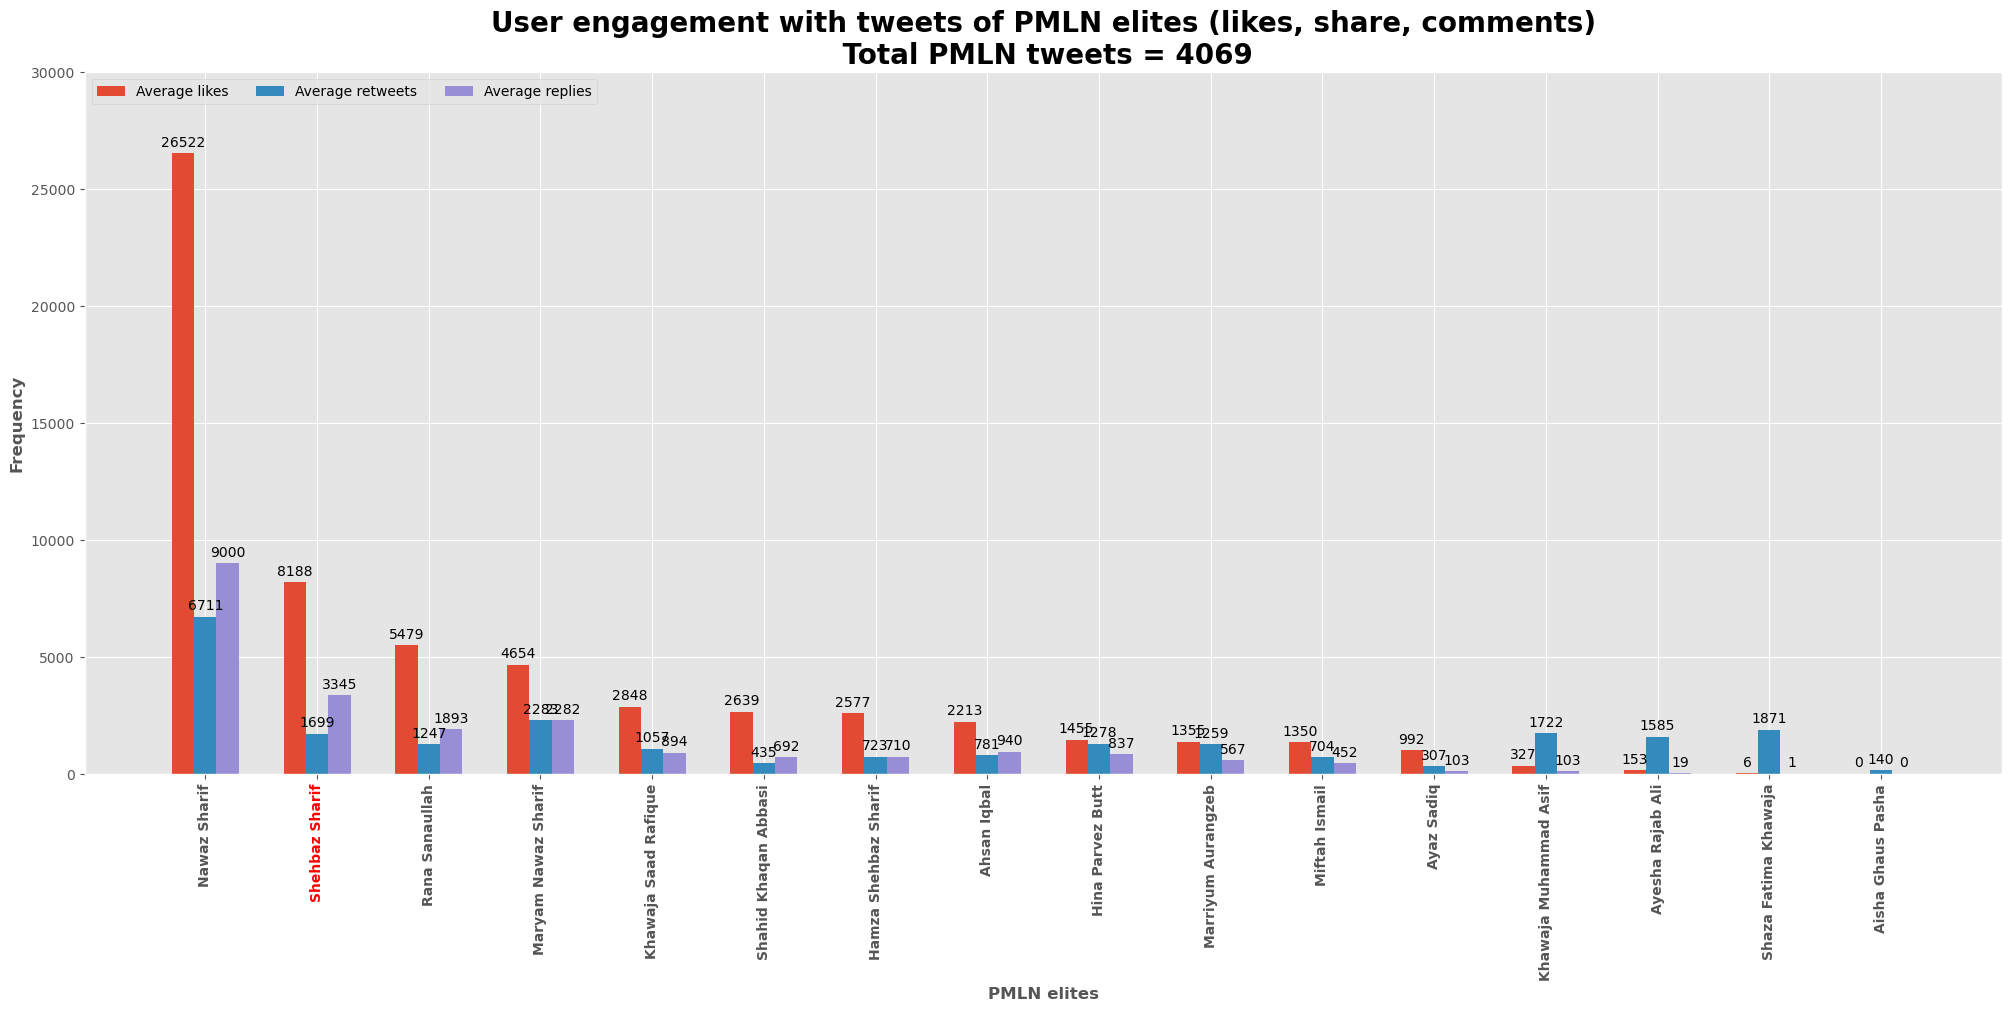

In [1897]:
x = np.arange(len(a))
width = 0.2 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in b.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_xlabel('PMLN elites', fontweight='bold')
ax.set_title('User engagement with tweets of PMLN elites (likes, share, comments)\n Total PMLN tweets = ' + str(sum(tweets_by_PMLN_elites)), fontsize=20, fontweight='bold')
ax.set_xticks(x + width, a)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 30000)
plt.xticks(rotation=90)
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
plt.gca().get_xticklabels()[1].set_color('red') 


fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.savefig('5.png', bbox_inches='tight')

plt.show()


In [1898]:
temp = temp.sort_values(by=['likes'],ascending=False)
temp_1 = temp_1.sort_values(by=['likes'],ascending=False)

temp['likes'] = round(temp['likes'])
temp['replies'] = round(temp['replies'])
temp['retweets'] = round(temp['retweets'])

temp_1['likes'] = round(temp_1['likes'])
temp_1['replies'] = round(temp_1['replies'])
temp_1['retweets'] = round(temp_1['retweets'])

temp = temp.astype({'likes':'int', 'replies':'int', 'retweets':'int'})
temp_1 = temp_1.astype({'likes':'int', 'replies':'int', 'retweets':'int'})

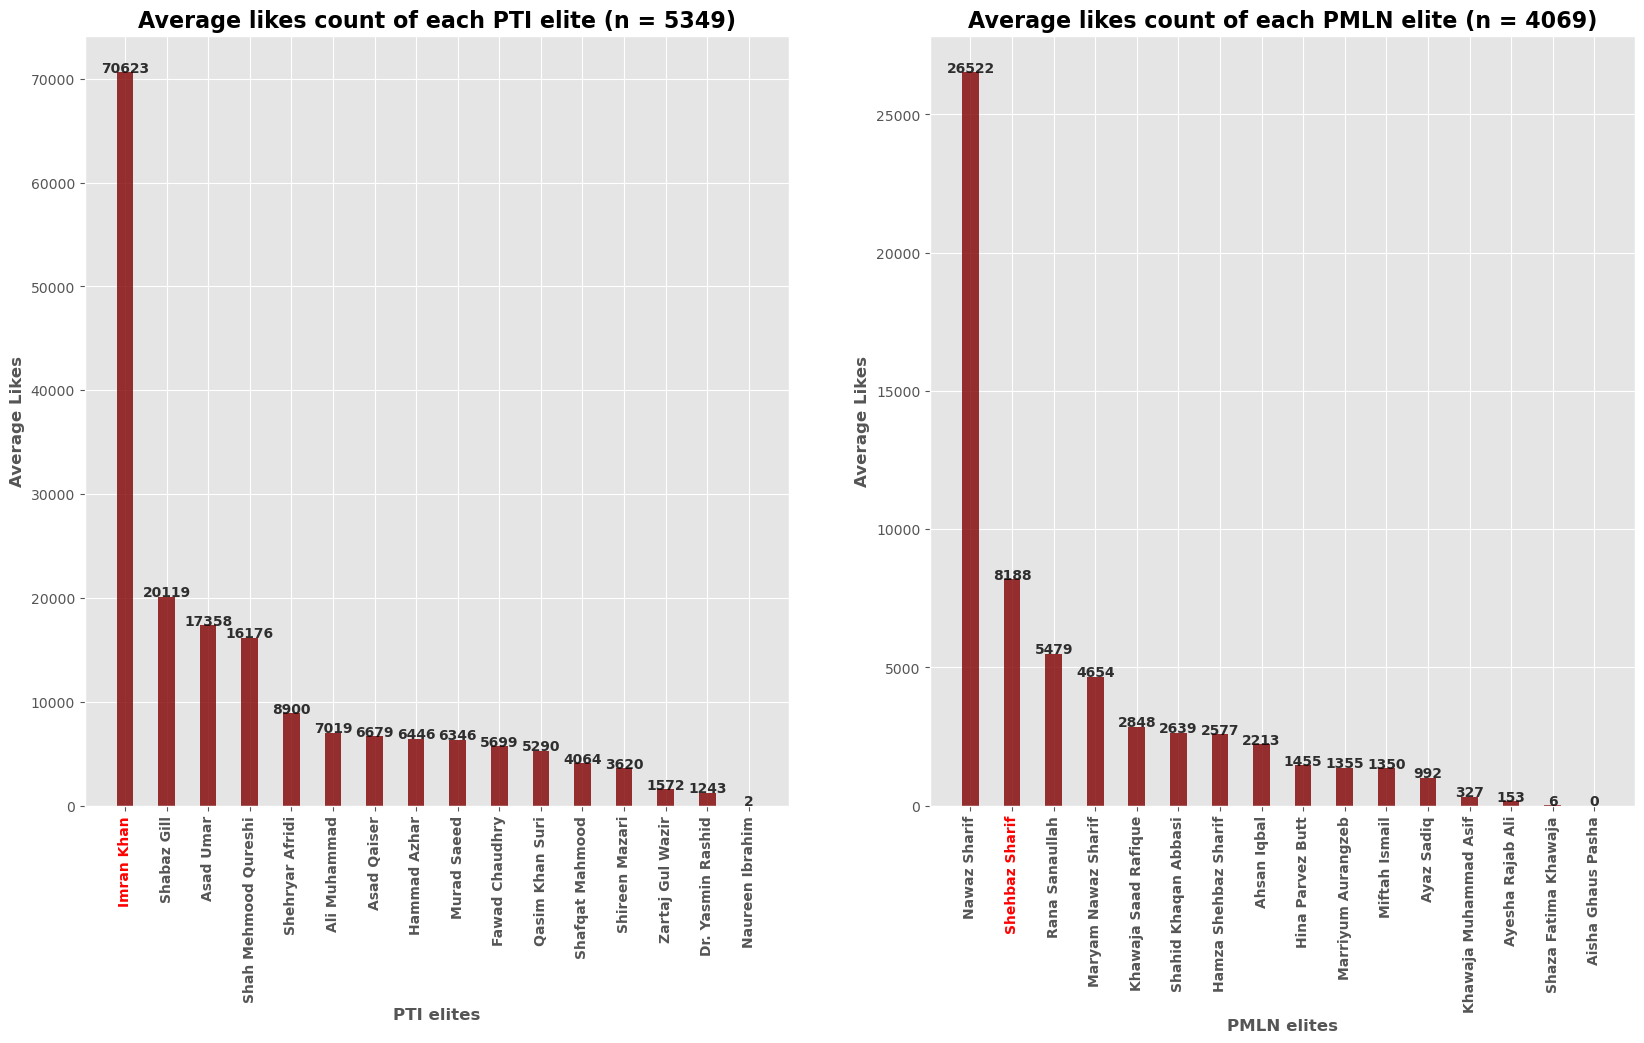

In [1899]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.bar(temp.index,temp['likes'], color='maroon', width=0.4, alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('PTI elites', fontweight='bold')
plt.ylabel('Average Likes', fontweight='bold')
plt.title("Average likes count of each PTI elite (n = " + str(sum(tweets_by_PTI_elites))+')', fontsize=16, fontweight='bold')
addlabels(temp.index,temp['likes'])
plt.gca().get_xticklabels()[0].set_color('red') 
fig = plt.gcf()
plt.xticks(rotation=90)
ax = plt.gca()
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
fig.set_size_inches(20, 10)

plt.subplot(1, 2, 2) # index 2
plt.bar(temp_1.index,temp_1['likes'], color='maroon', width=0.4, alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('PMLN elites', fontweight='bold')
plt.ylabel('Average Likes', fontweight='bold')
plt.title("Average likes count of each PMLN elite (n = "+ str(sum(tweets_by_PMLN_elites))+')', fontsize=16, fontweight='bold')
addlabels(temp_1.index,temp_1['likes'])
plt.gca().get_xticklabels()[1].set_color('red') 
fig = plt.gcf()
plt.xticks(rotation=90)
ax = plt.gca()
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
fig.set_size_inches(20, 10)

plt.savefig('6.png', bbox_inches='tight')

plt.show()

In [1900]:
temp = temp.sort_values(by=['retweets'],ascending=False)
temp_1 = temp_1.sort_values(by=['retweets'],ascending=False)

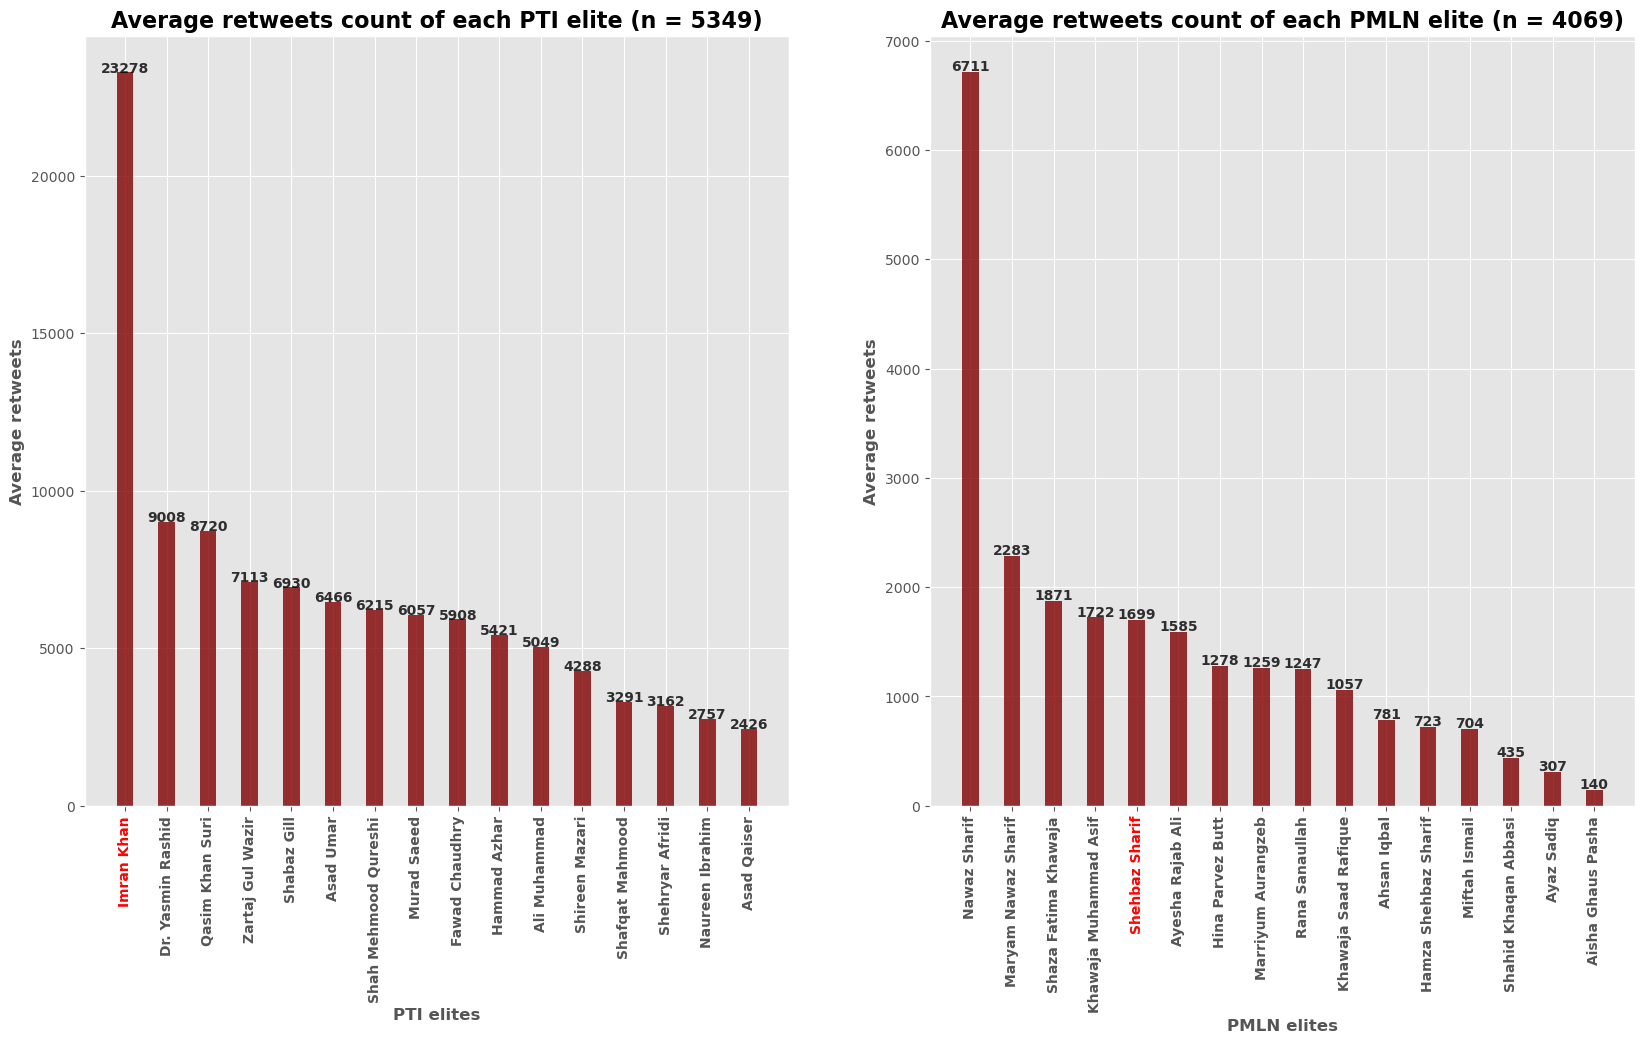

In [1901]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.bar(temp.index,temp['retweets'], color='maroon', width=0.4, alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('PTI elites', fontweight='bold')
plt.ylabel('Average retweets', fontweight='bold')
plt.title("Average retweets count of each PTI elite (n = " + str(sum(tweets_by_PTI_elites))+')', fontsize=16, fontweight='bold')
addlabels(temp.index,temp['retweets'])
plt.gca().get_xticklabels()[0].set_color('red') 
fig = plt.gcf()
plt.xticks(rotation=90)
ax = plt.gca()
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
fig.set_size_inches(20, 10)

plt.subplot(1, 2, 2) # index 2
plt.bar(temp_1.index,temp_1['retweets'], color='maroon', width=0.4, alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('PMLN elites', fontweight='bold')
plt.ylabel('Average retweets', fontweight='bold')
plt.title("Average retweets count of each PMLN elite (n = " + str(sum(tweets_by_PMLN_elites))+')', fontsize=16, fontweight='bold')
addlabels(temp_1.index,temp_1['retweets'])
plt.gca().get_xticklabels()[4].set_color('red') 
fig = plt.gcf()
plt.xticks(rotation=90)
ax = plt.gca()
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
fig.set_size_inches(20, 10)
plt.savefig('7.png', bbox_inches='tight')

plt.show()

In [1902]:
temp = temp.sort_values(by=['replies'],ascending=False)
temp_1 = temp_1.sort_values(by=['replies'],ascending=False)

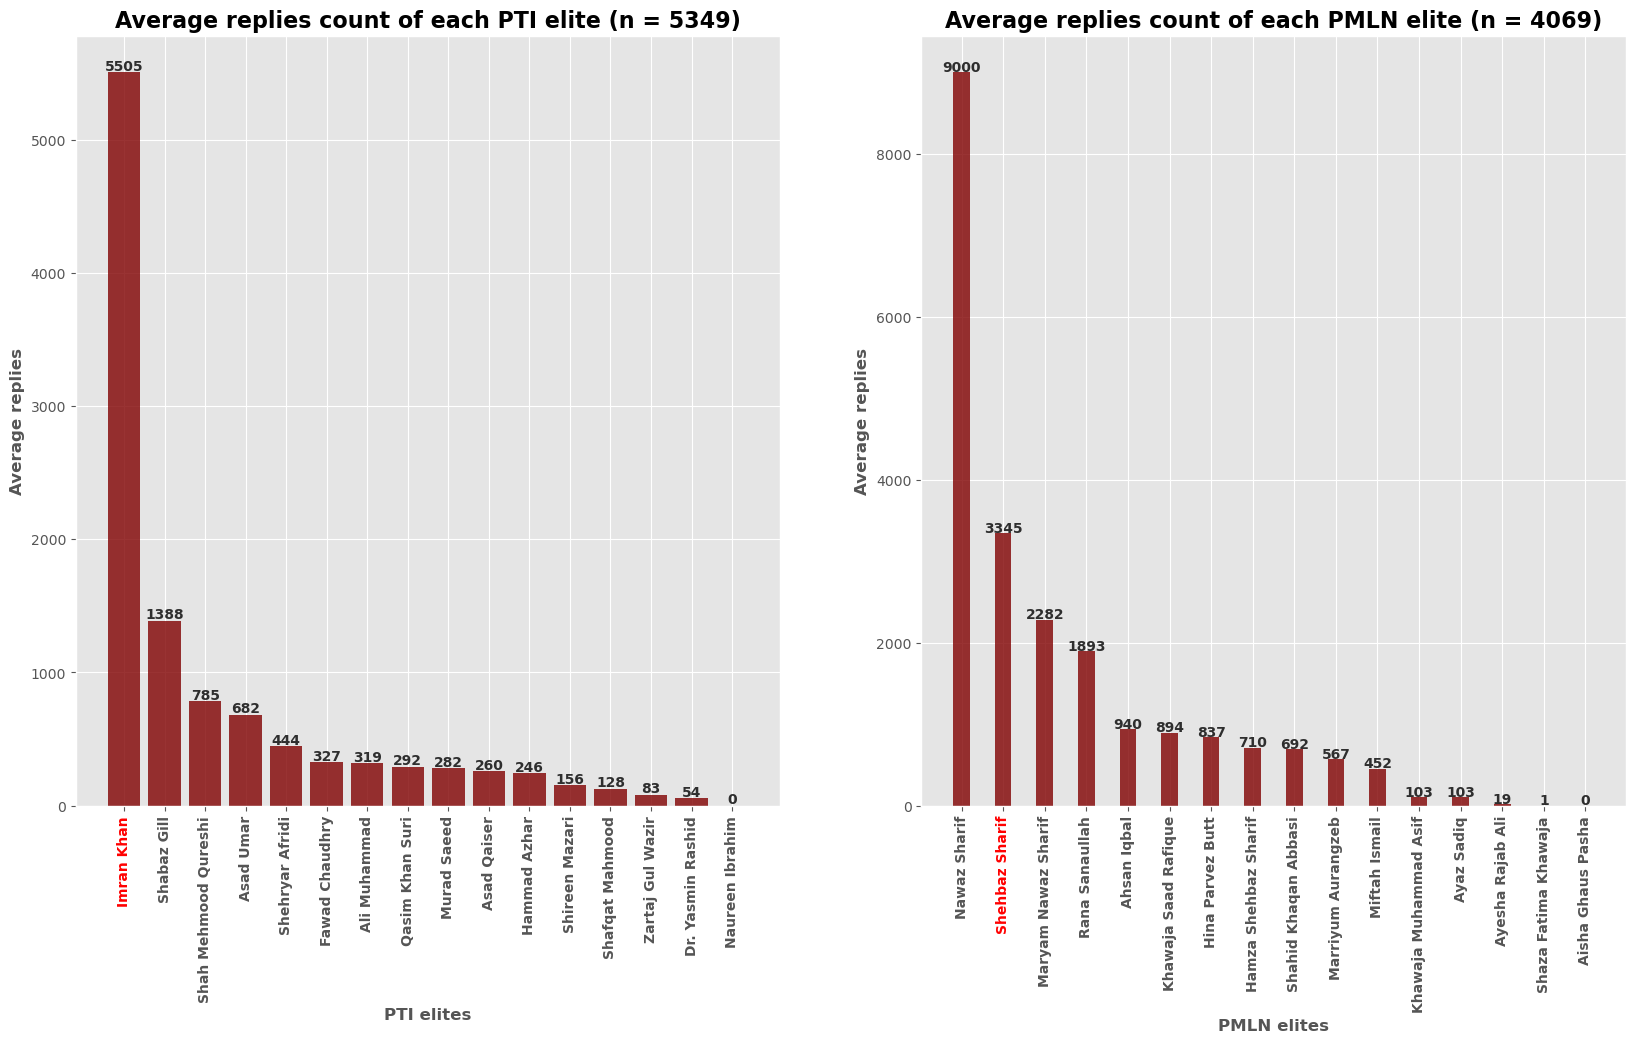

In [1903]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.bar(temp.index,temp['replies'], color='maroon', alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('PTI elites', fontweight='bold')
plt.ylabel('Average replies', fontweight='bold')
plt.title("Average replies count of each PTI elite (n = " + str(sum(tweets_by_PTI_elites))+')', fontsize=16, fontweight='bold')
addlabels(temp.index,temp['replies'])
plt.gca().get_xticklabels()[0].set_color('red') 
fig = plt.gcf()
plt.xticks(rotation=90)
ax = plt.gca()
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
fig.set_size_inches(20, 10)

plt.subplot(1, 2, 2) # index 2
plt.bar(temp_1.index,temp_1['replies'], color='maroon', width=0.4, alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('PMLN elites', fontweight='bold')
plt.ylabel('Average replies', fontweight='bold')
plt.title("Average replies count of each PMLN elite (n = " + str(sum(tweets_by_PMLN_elites)) + ')', fontsize=16, fontweight='bold')
addlabels(temp_1.index,temp_1['replies'])
plt.gca().get_xticklabels()[1].set_color('red') 
fig = plt.gcf()
plt.xticks(rotation=90)
ax = plt.gca()
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
fig.set_size_inches(20, 10)
plt.savefig('8.png', bbox_inches='tight')

plt.show()

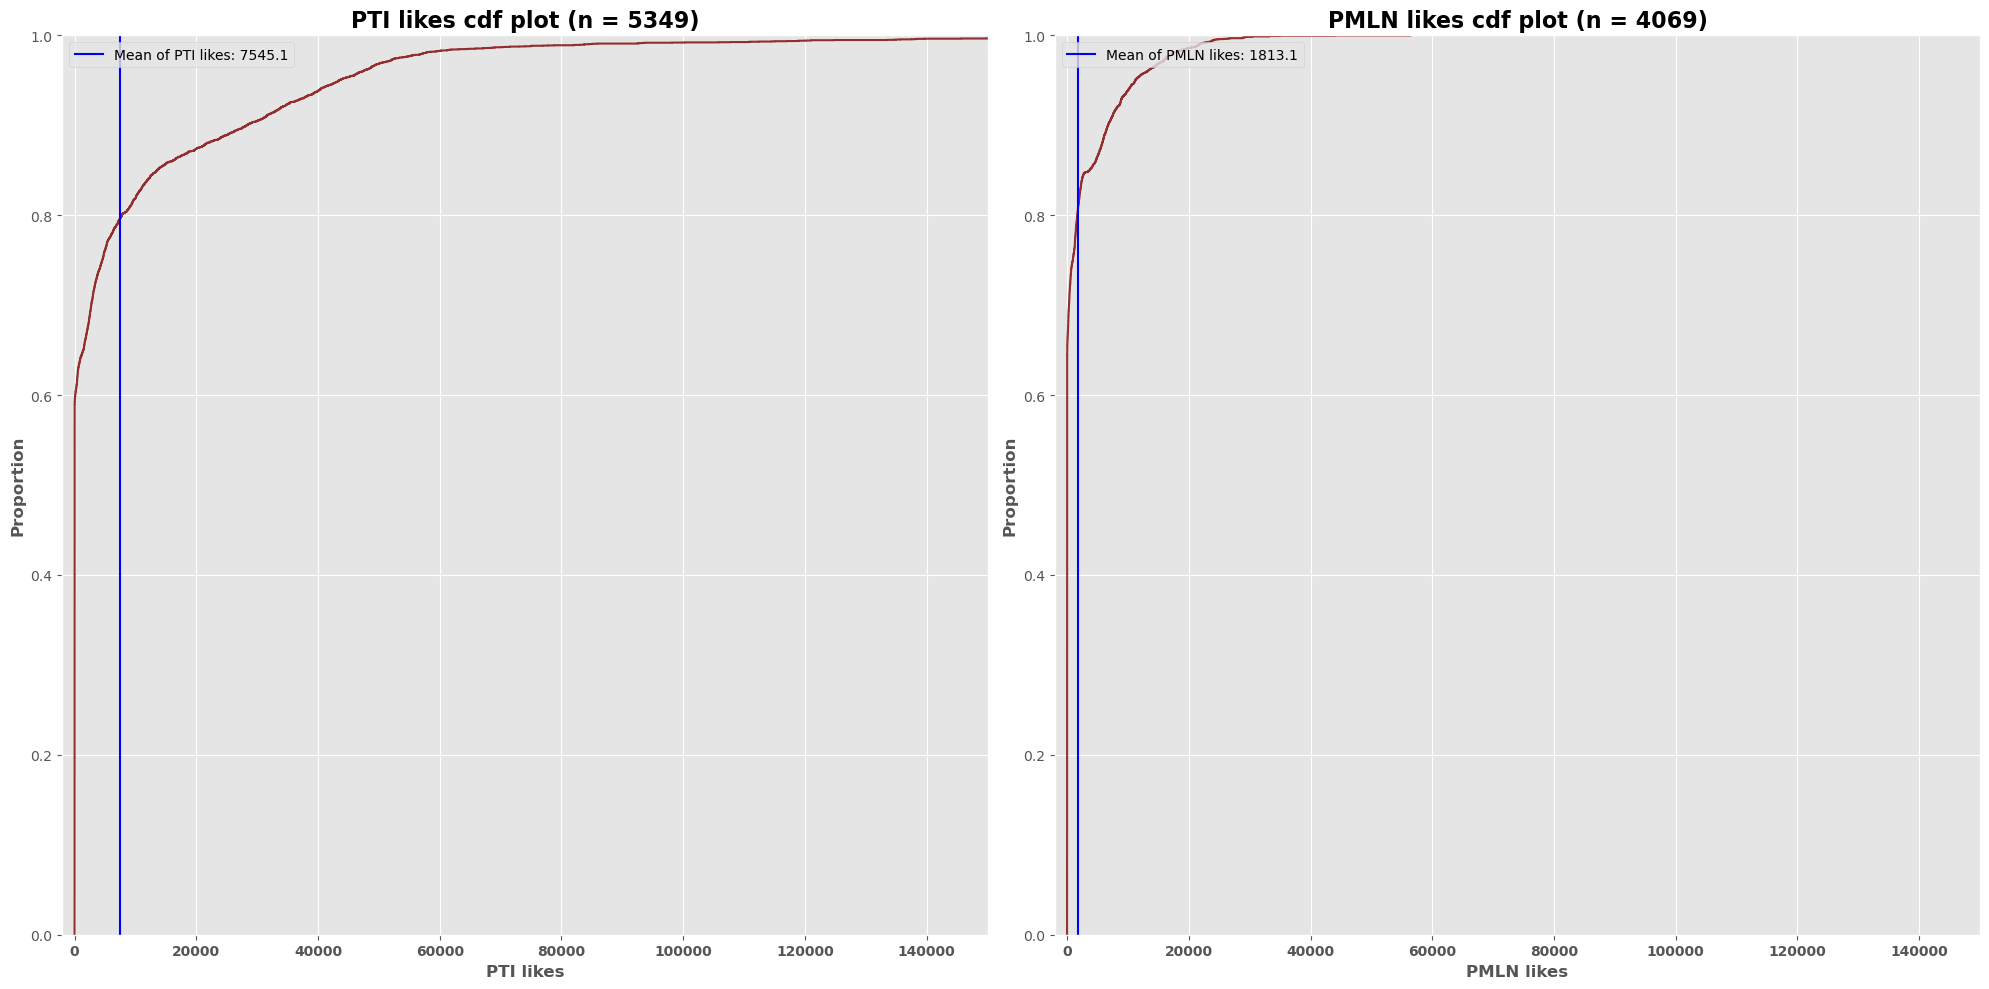

In [1904]:
fig, ax = plt.subplots(1,2,figsize=(20, 10)) # row 1, col 2 index 1
sns.ecdfplot(data=PTI, x="likes", color='maroon', alpha=0.8, ax=ax[0])
ax[0].axvline(x = PTI['likes'].mean(), color = 'b', label = 'Mean of PTI likes: '+str(round(PTI['likes'].mean(),1)))
ax[0].set_title('PTI likes cdf plot (n = '+str(sum(tweets_by_PTI_elites))+')', fontsize=16, fontweight='bold')
ax[0].set_xlabel("PTI likes", fontsize=12, fontweight='bold')
ax[0].set_ylabel('Proportion', fontsize=12, fontweight='bold')
ax[0].set_xlim(-2000, 150000)
ax[0].legend(loc='upper left')
labels = ax[0].get_xticklabels() 
[label.set_fontweight('bold') for label in labels]

sns.ecdfplot(data=PMLN, x="likes", color='maroon', alpha=0.8, ax=ax[1])
ax[1].axvline(x = PMLN['likes'].mean(), color = 'b', label = 'Mean of PMLN likes: '+str(round(PMLN['likes'].mean(),1)))
ax[1].set_title('PMLN likes cdf plot (n = '+str(sum(tweets_by_PMLN_elites))+")", fontsize=16, fontweight='bold')
ax[1].set_xlabel("PMLN likes", fontsize=12, fontweight='bold')
ax[1].set_ylabel('Proportion', fontsize=12, fontweight='bold')
ax[1].set_xlim(-2000, 150000)
labels = ax[1].get_xticklabels() 
ax[1].legend(loc='upper left')
[label.set_fontweight('bold') for label in labels]
plt.savefig('9.png', bbox_inches='tight')

fig.tight_layout()

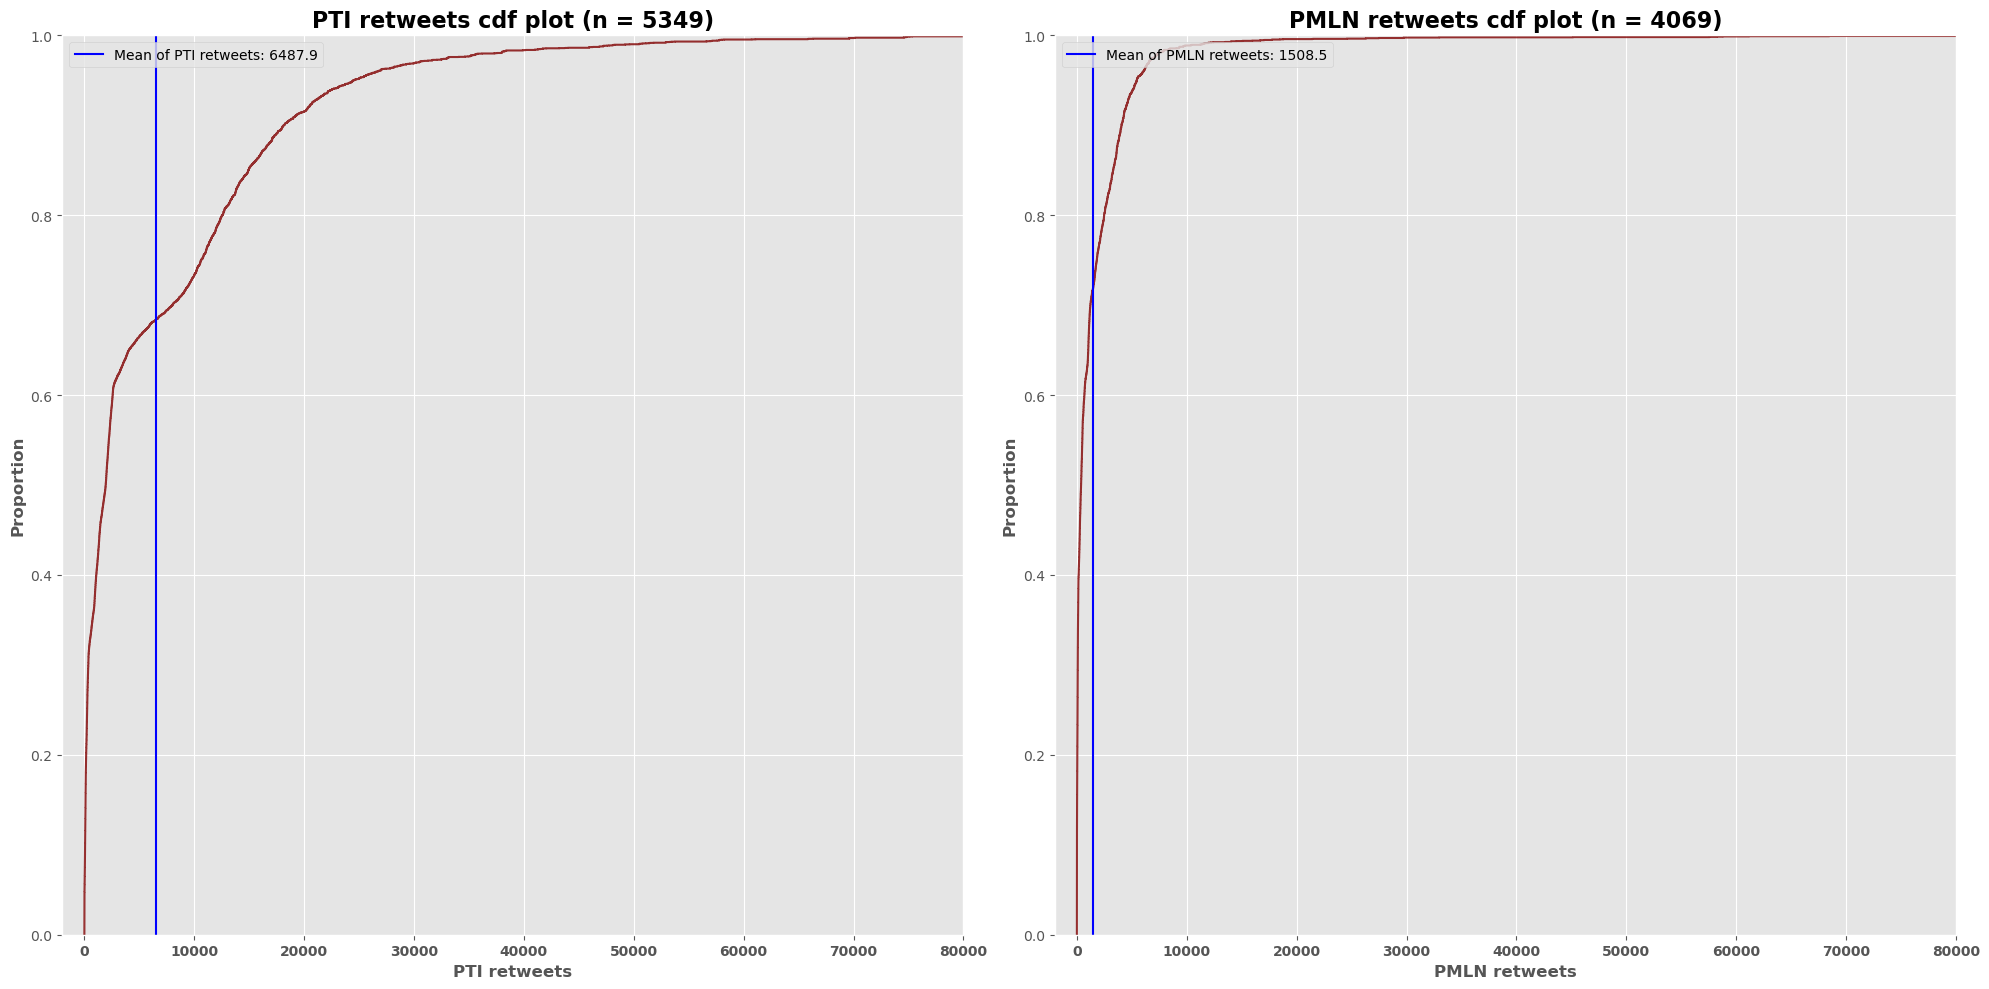

In [1905]:
fig, ax = plt.subplots(1,2,figsize=(20, 10)) # row 1, col 2 index 1
sns.ecdfplot(data=PTI, x="retweets", color='maroon', alpha=0.8, ax=ax[0])
ax[0].axvline(x = PTI['retweets'].mean(), color = 'b', label = 'Mean of PTI retweets: '+str(round(PTI['retweets'].mean(),1)))
ax[0].set_title('PTI retweets cdf plot (n = '+str(sum(tweets_by_PTI_elites))+')', fontsize=16, fontweight='bold')
ax[0].set_xlabel("PTI retweets", fontsize=12, fontweight='bold')
ax[0].set_ylabel('Proportion', fontsize=12, fontweight='bold')
ax[0].set_xlim(-2000, 80000)
ax[0].legend(loc='upper left')
labels = ax[0].get_xticklabels() 
[label.set_fontweight('bold') for label in labels]

sns.ecdfplot(data=PMLN, x="retweets", color='maroon', alpha=0.8, ax=ax[1])
ax[1].axvline(x = PMLN['retweets'].mean(), color = 'b', label = 'Mean of PMLN retweets: '+str(round(PMLN['retweets'].mean(),1)))
ax[1].set_title('PMLN retweets cdf plot (n = '+str(sum(tweets_by_PMLN_elites))+')', fontsize=16, fontweight='bold')
ax[1].set_xlabel("PMLN retweets", fontsize=12, fontweight='bold')
ax[1].set_ylabel('Proportion', fontsize=12, fontweight='bold')
ax[1].set_xlim(-2000, 80000)
ax[1].legend(loc='upper left')
labels = ax[1].get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
plt.savefig('10.png', bbox_inches='tight')

fig.tight_layout()

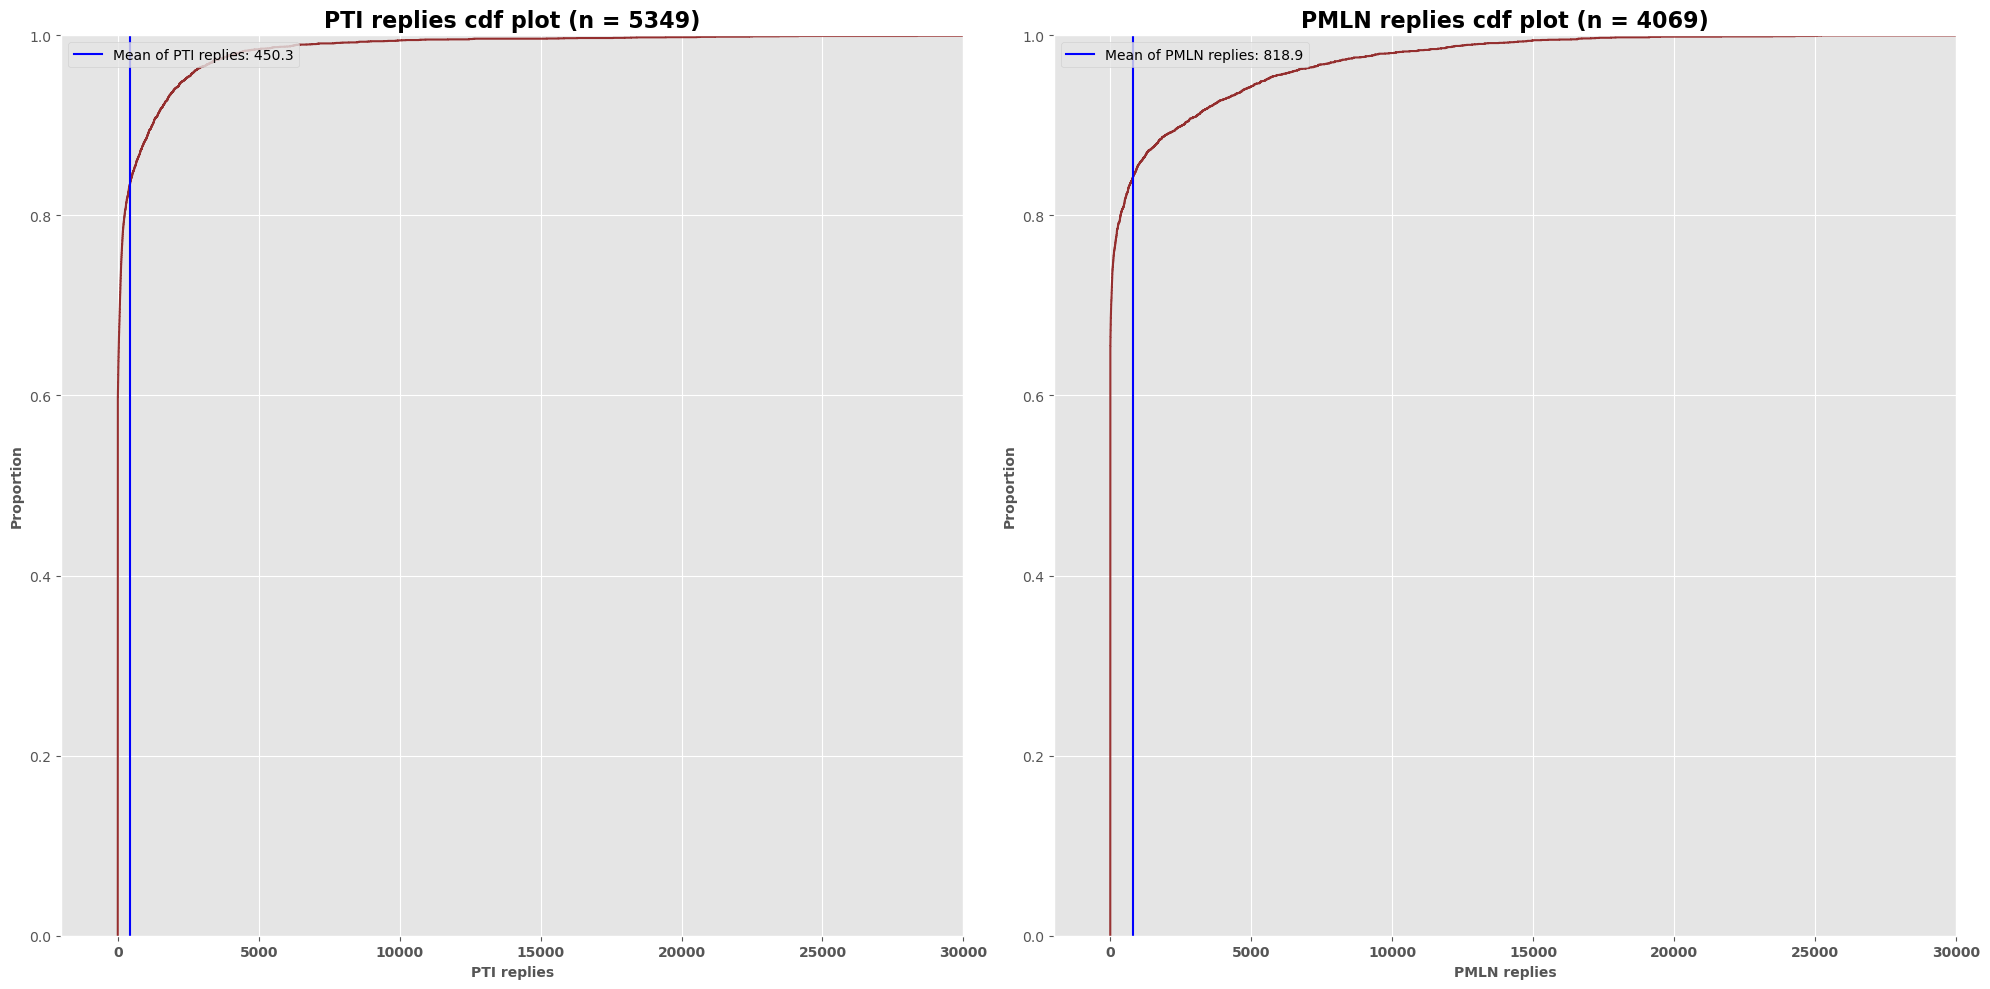

In [1906]:
fig, ax = plt.subplots(1,2,figsize=(20, 10)) # row 1, col 2 index 1
sns.ecdfplot(data=PTI, x="replies", color='maroon', alpha=0.8, ax=ax[0])
ax[0].axvline(x = PTI['replies'].mean(), color = 'b', label = 'Mean of PTI replies: '+str(round(PTI['replies'].mean(),1)))
ax[0].set_title('PTI replies cdf plot (n = '+str(sum(tweets_by_PTI_elites))+')', fontsize=16, fontweight='bold')
ax[0].set_xlabel("PTI replies", fontsize=10, fontweight='bold')
ax[0].set_ylabel('Proportion', fontsize=10, fontweight='bold')
labels = ax[0].get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
ax[0].set_xlim(-2000, 30000)
ax[0].legend(loc='upper left')


sns.ecdfplot(data=PMLN, x="replies", color='maroon', alpha=0.8, ax=ax[1])
ax[1].set_title('PMLN replies cdf plot (n = '+str(sum(tweets_by_PMLN_elites))+')', fontsize=16, fontweight='bold')
ax[1].axvline(x = PMLN['replies'].mean(), color = 'b', label = 'Mean of PMLN replies: '+str(round(PMLN['replies'].mean(),1)))
ax[1].set_xlabel("PMLN replies", fontsize=10, fontweight='bold')
ax[1].set_ylabel('Proportion', fontsize=10, fontweight='bold')
labels = ax[1].get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
ax[1].set_xlim(-2000, 30000)
ax[1].legend(loc='upper left')
plt.savefig('11.png', bbox_inches='tight')

fig.tight_layout()

In [1907]:
PTI_temp_3 = PTI.groupby(by=PTI['politician']).agg(list)
PTI_temp_3['likes']

politician
Ali Muhammad            [0, 0, 0, 0, 0, 135679, 69020, 0, 112432, 4706...
Asad Qaiser             [100240, 51840, 32464, 33737, 24331, 39366, 0,...
Asad Umar               [62039, 61581, 47378, 55498, 47553, 48679, 394...
Dr. Yasmin Rashid       [0, 0, 0, 0, 0, 0, 0, 0, 0, 110687, 0, 0, 0, 0...
Fawad Chaudhry          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 92476,...
Hammad Azhar            [0, 0, 0, 0, 0, 0, 0, 40455, 0, 37170, 0, 0, 0...
Imran Khan              [309862, 297878, 274736, 267681, 194015, 21230...
Murad Saeed             [0, 0, 0, 0, 0, 0, 0, 39107, 0, 0, 55190, 0, 0...
Naureen Ibrahim         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Qasim Khan Suri         [0, 0, 0, 0, 82203, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Shabaz Gill             [81973, 67839, 78781, 85146, 71465, 65742, 749...
Shafqat Mahmood         [0, 57262, 0, 0, 0, 0, 0, 21734, 22579, 0, 187...
Shah Mehmood Qureshi    [84504, 56652, 71471, 48315, 39716, 26347, 237...
Shehryar Afridi         [52

In [1908]:
from statistics import mean

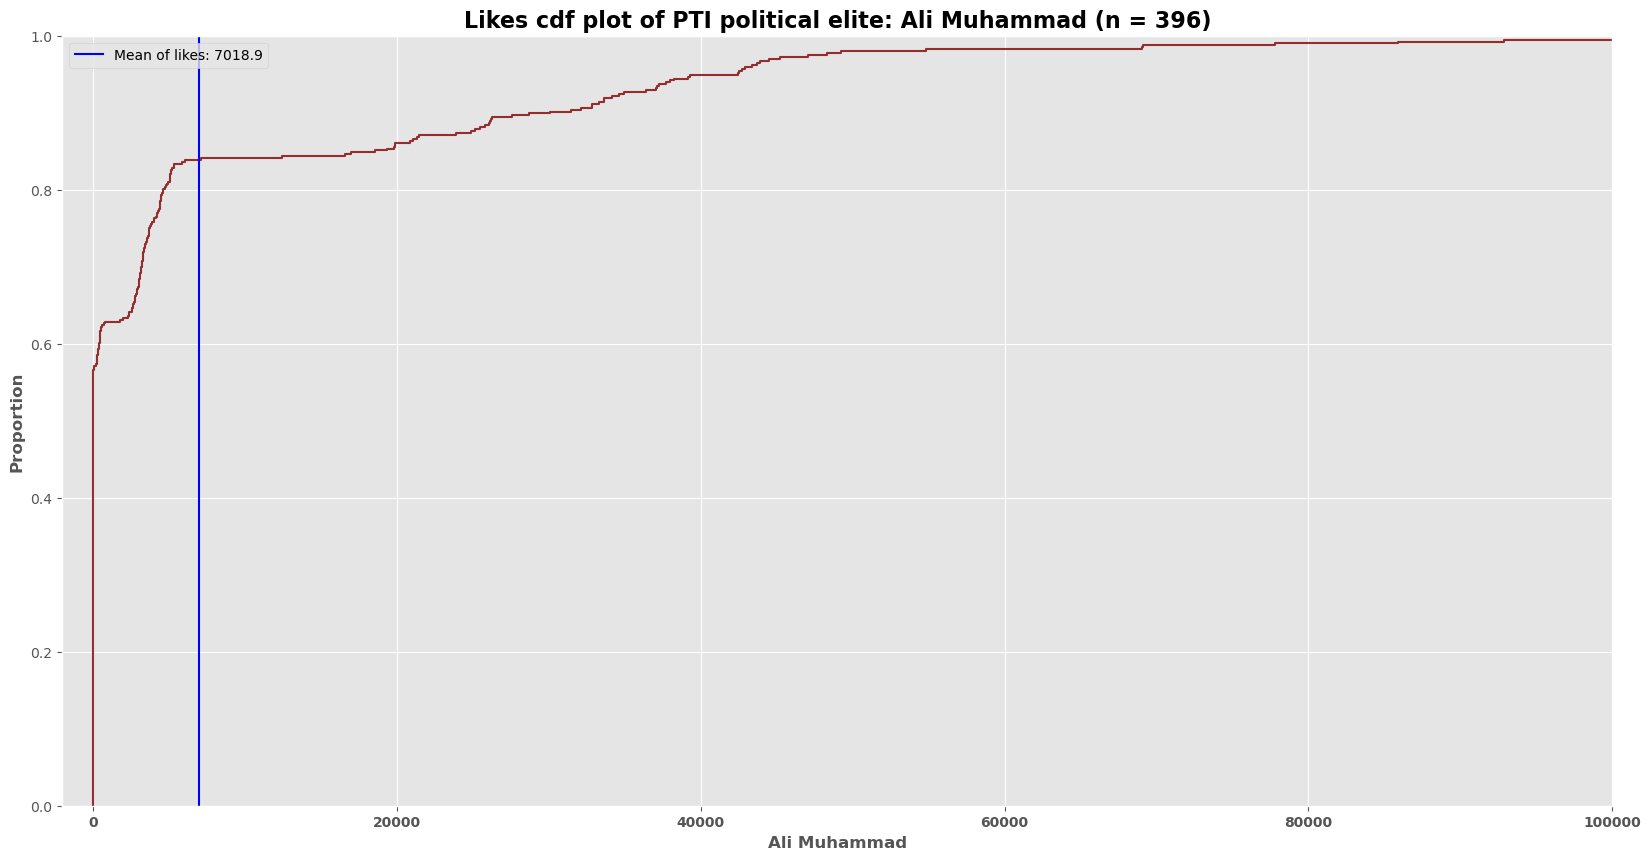

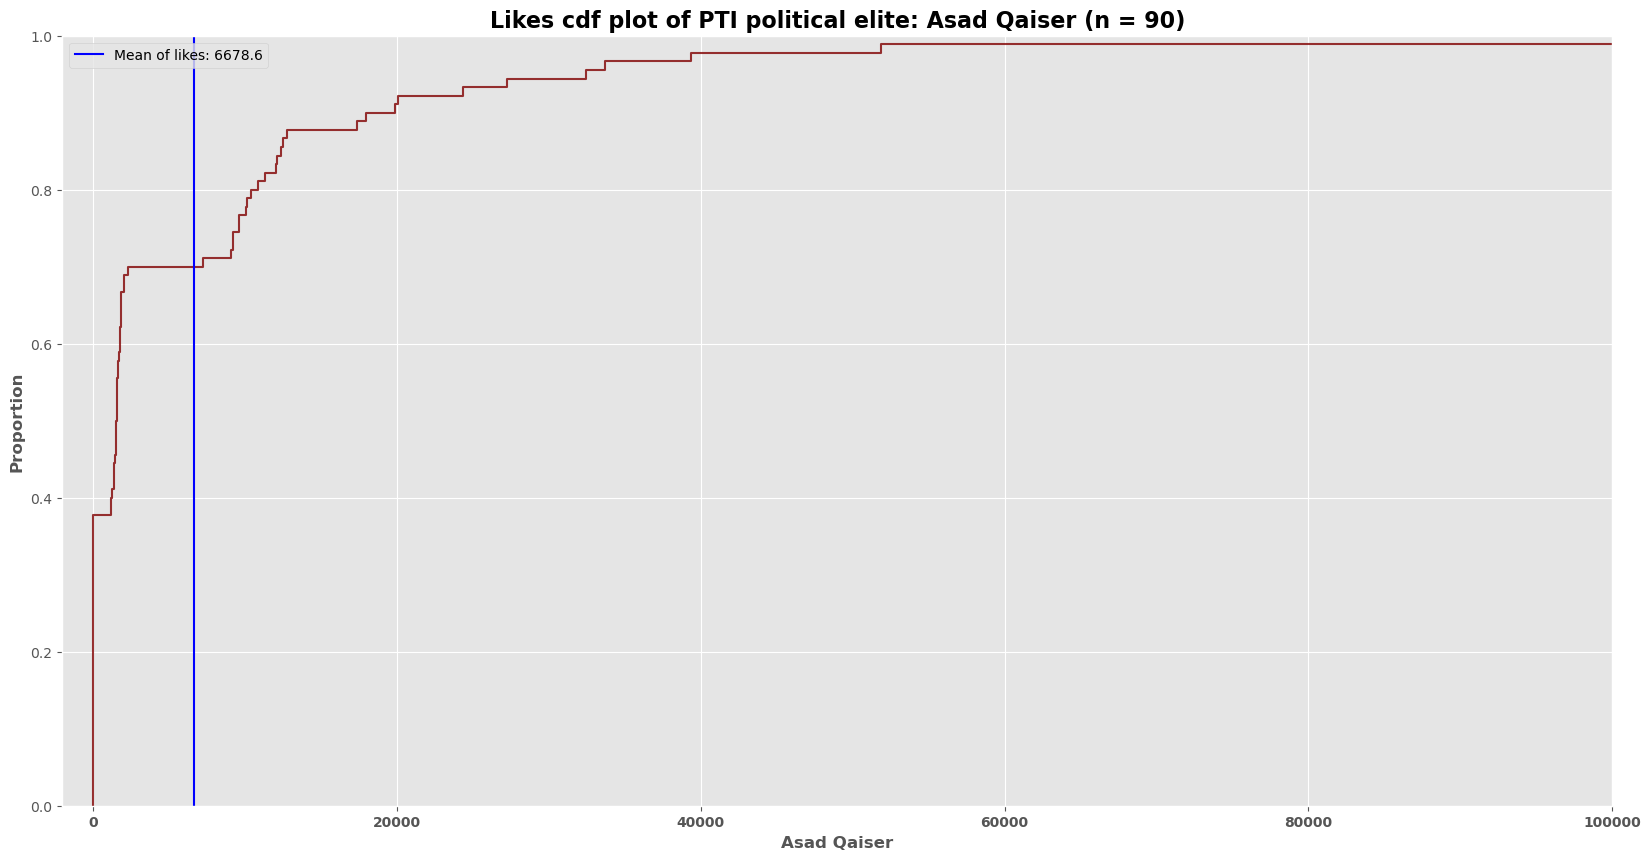

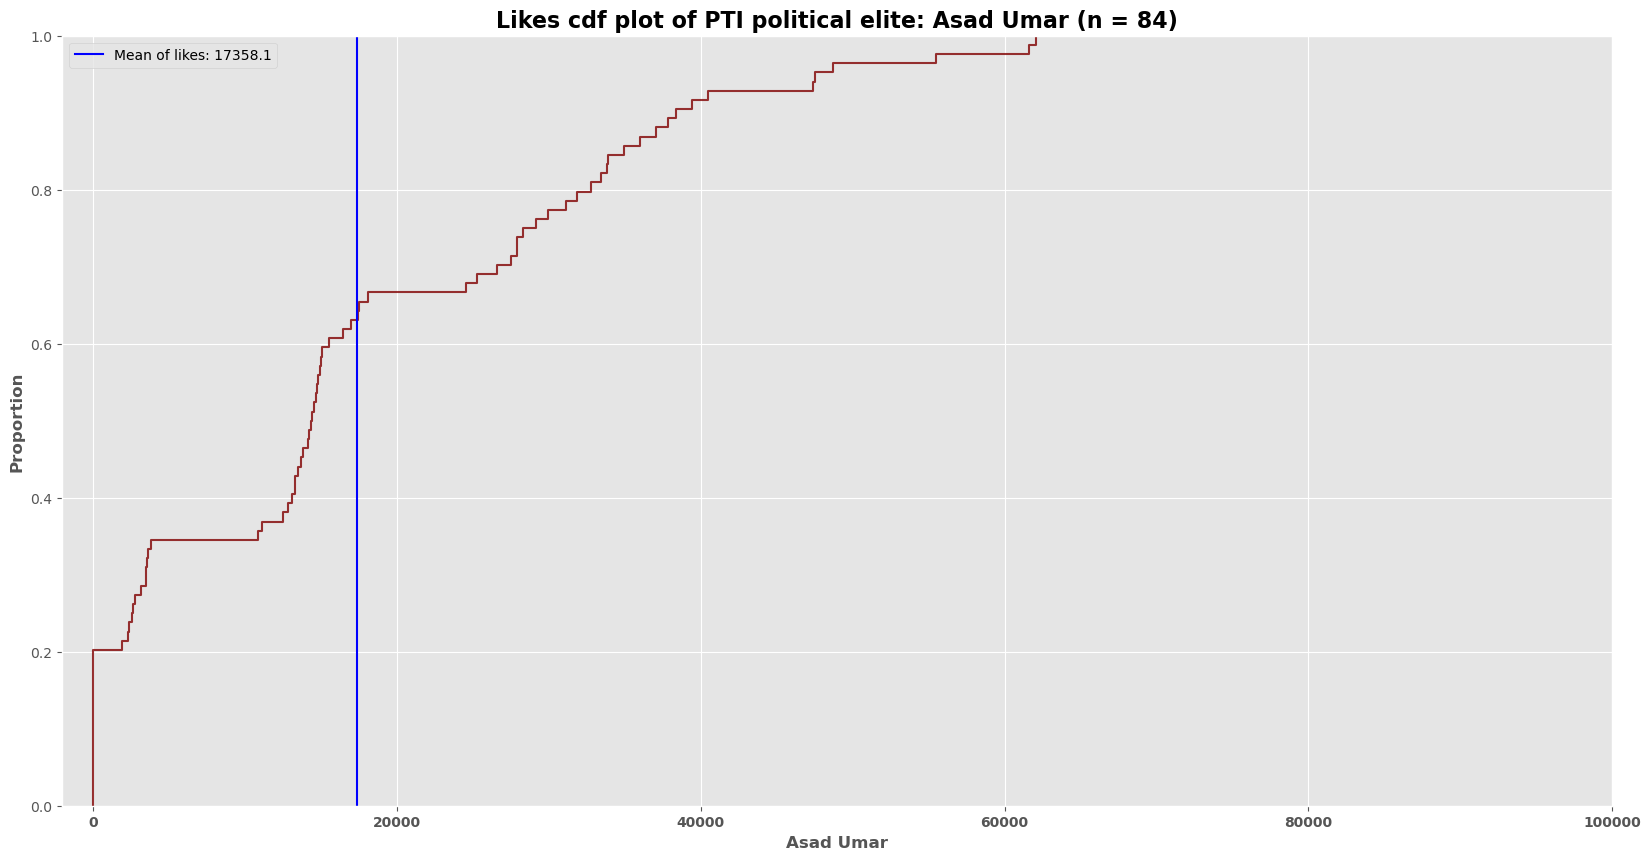

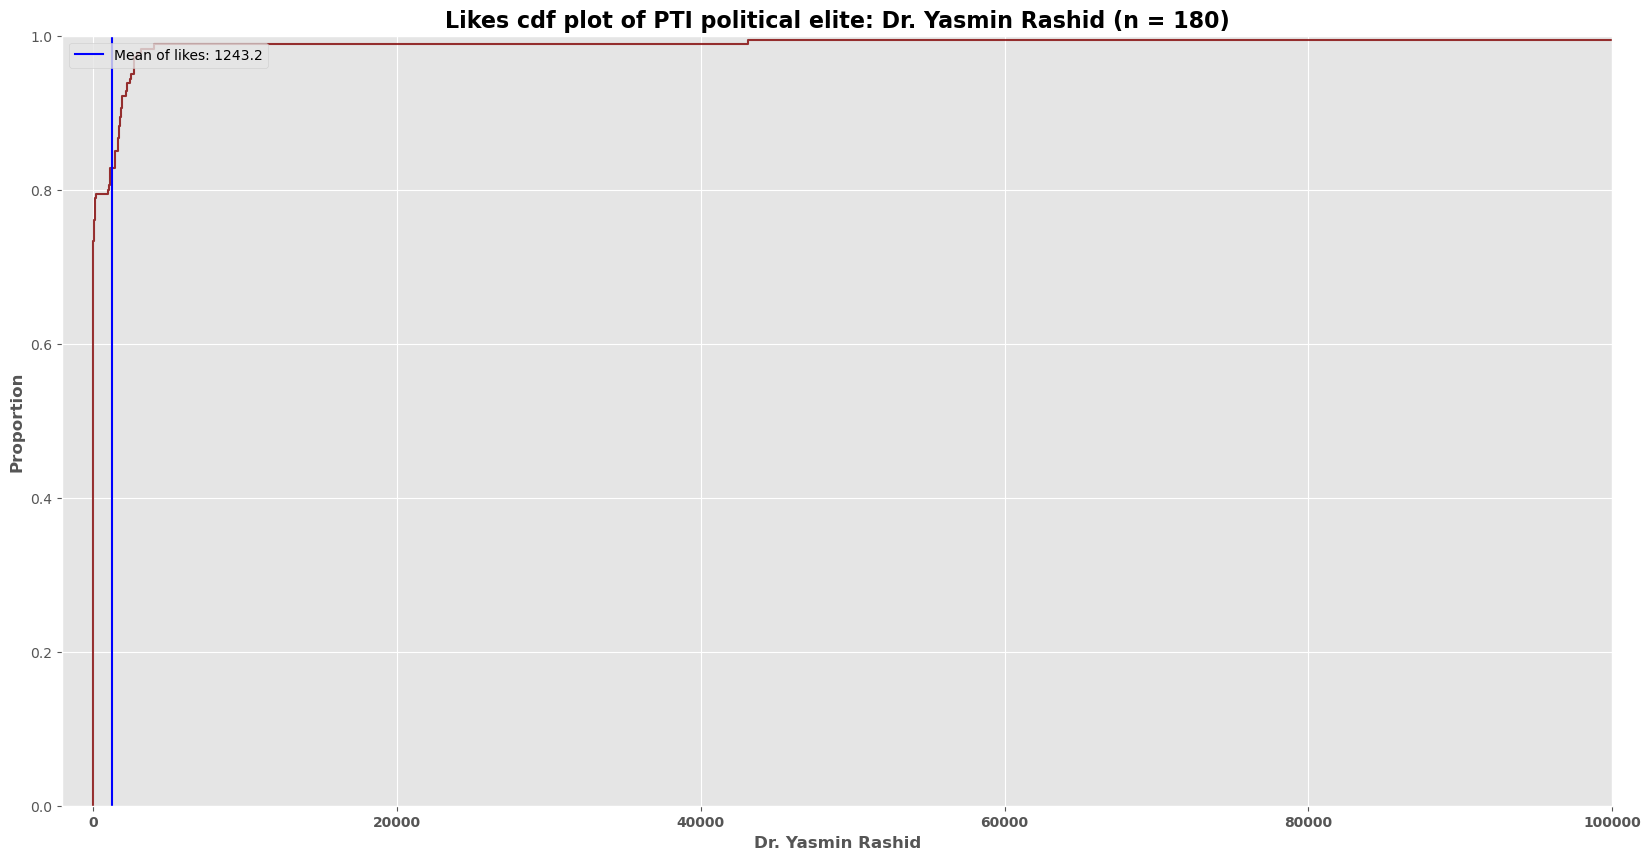

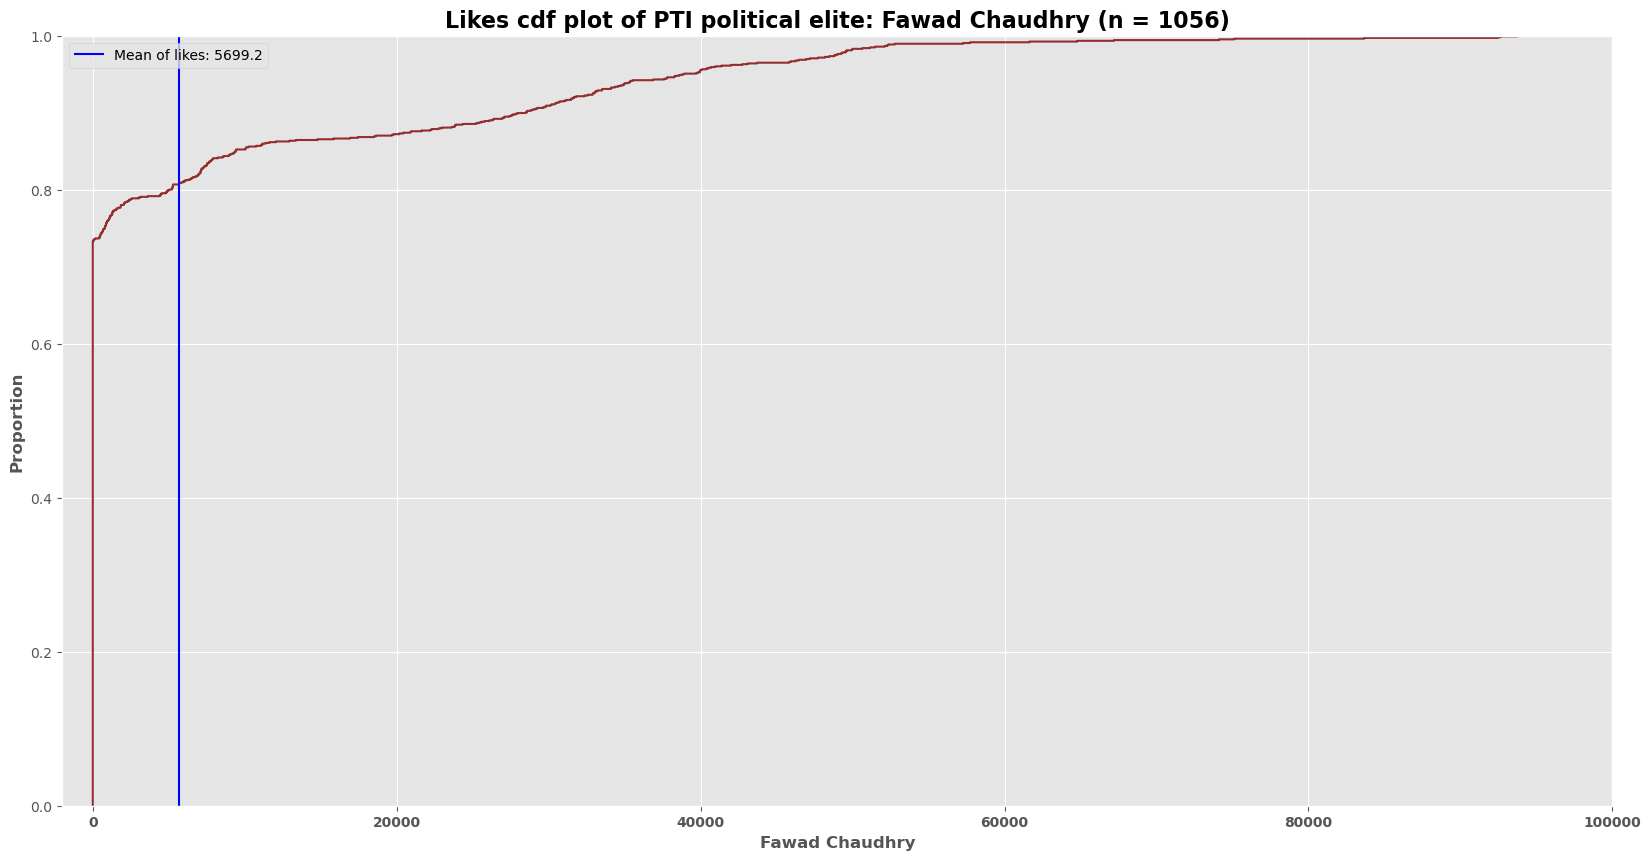

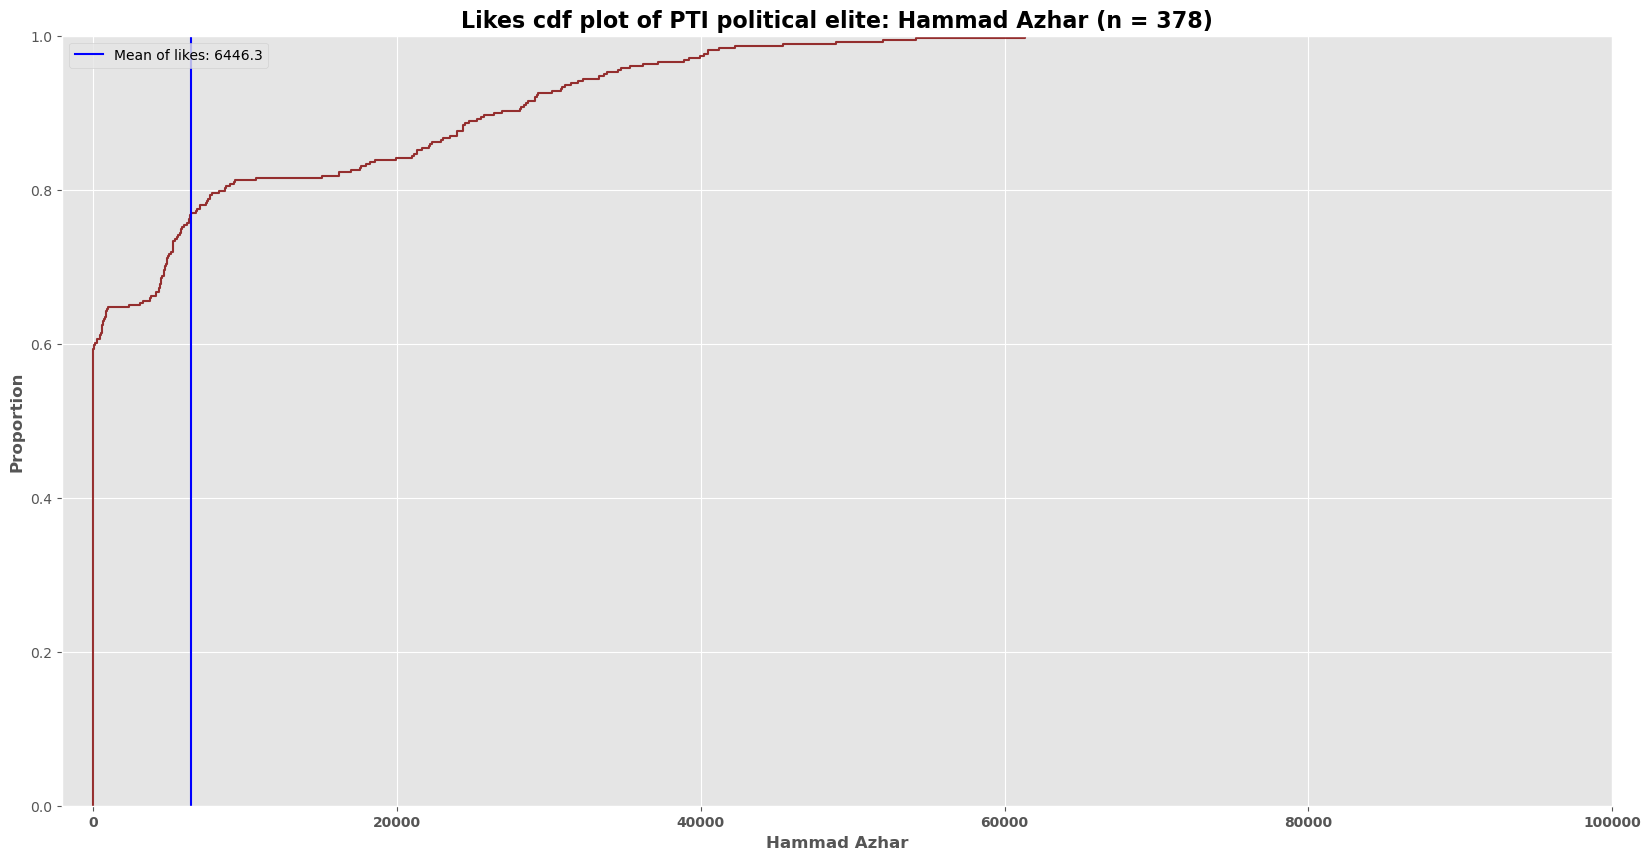

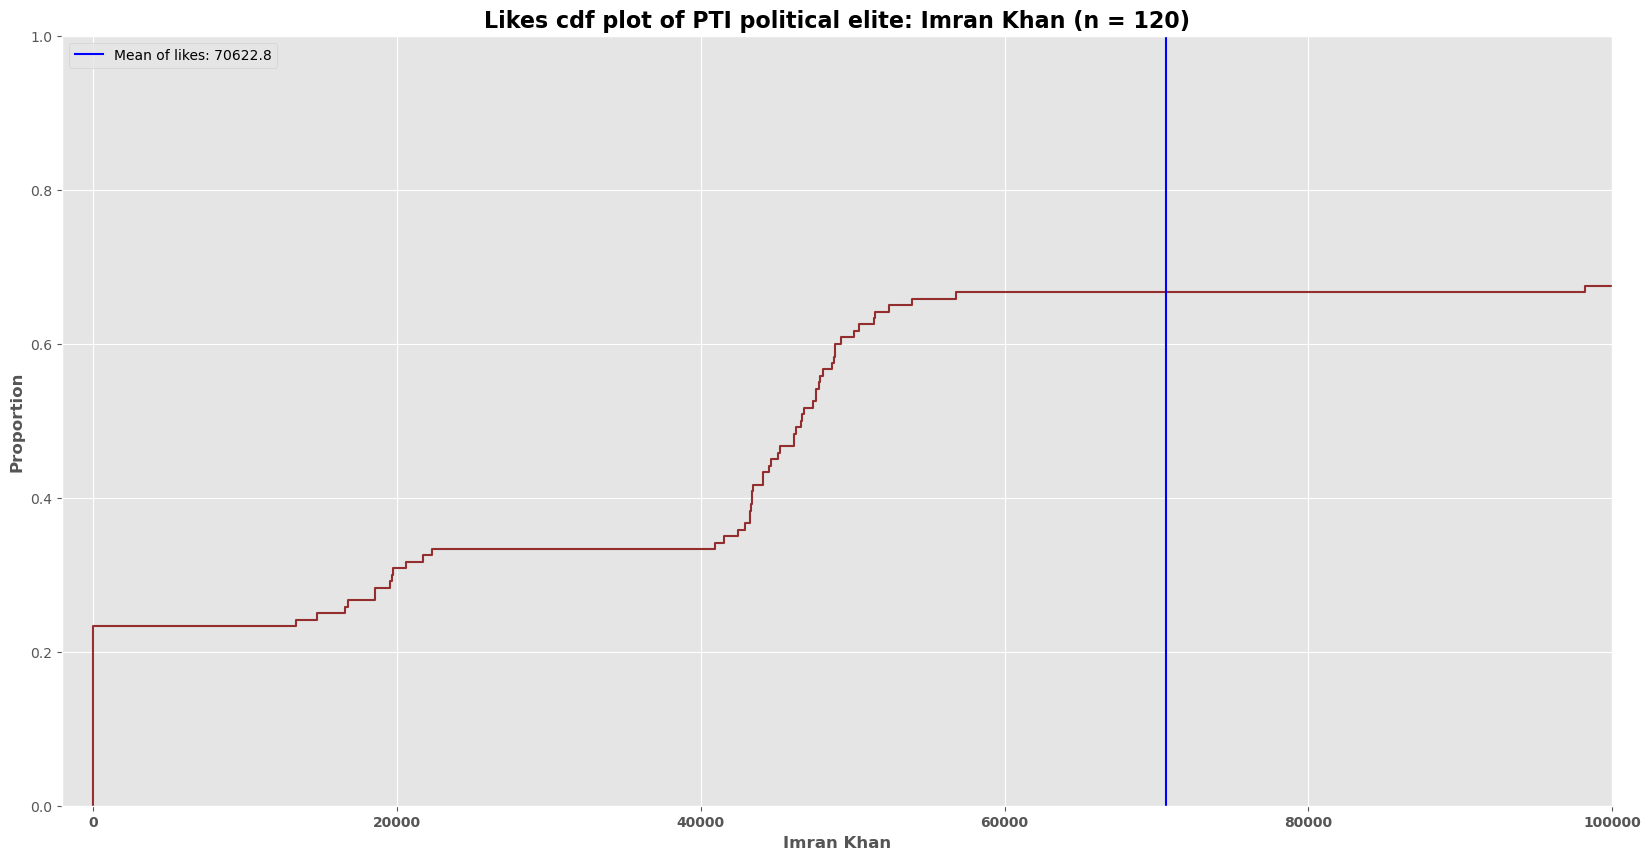

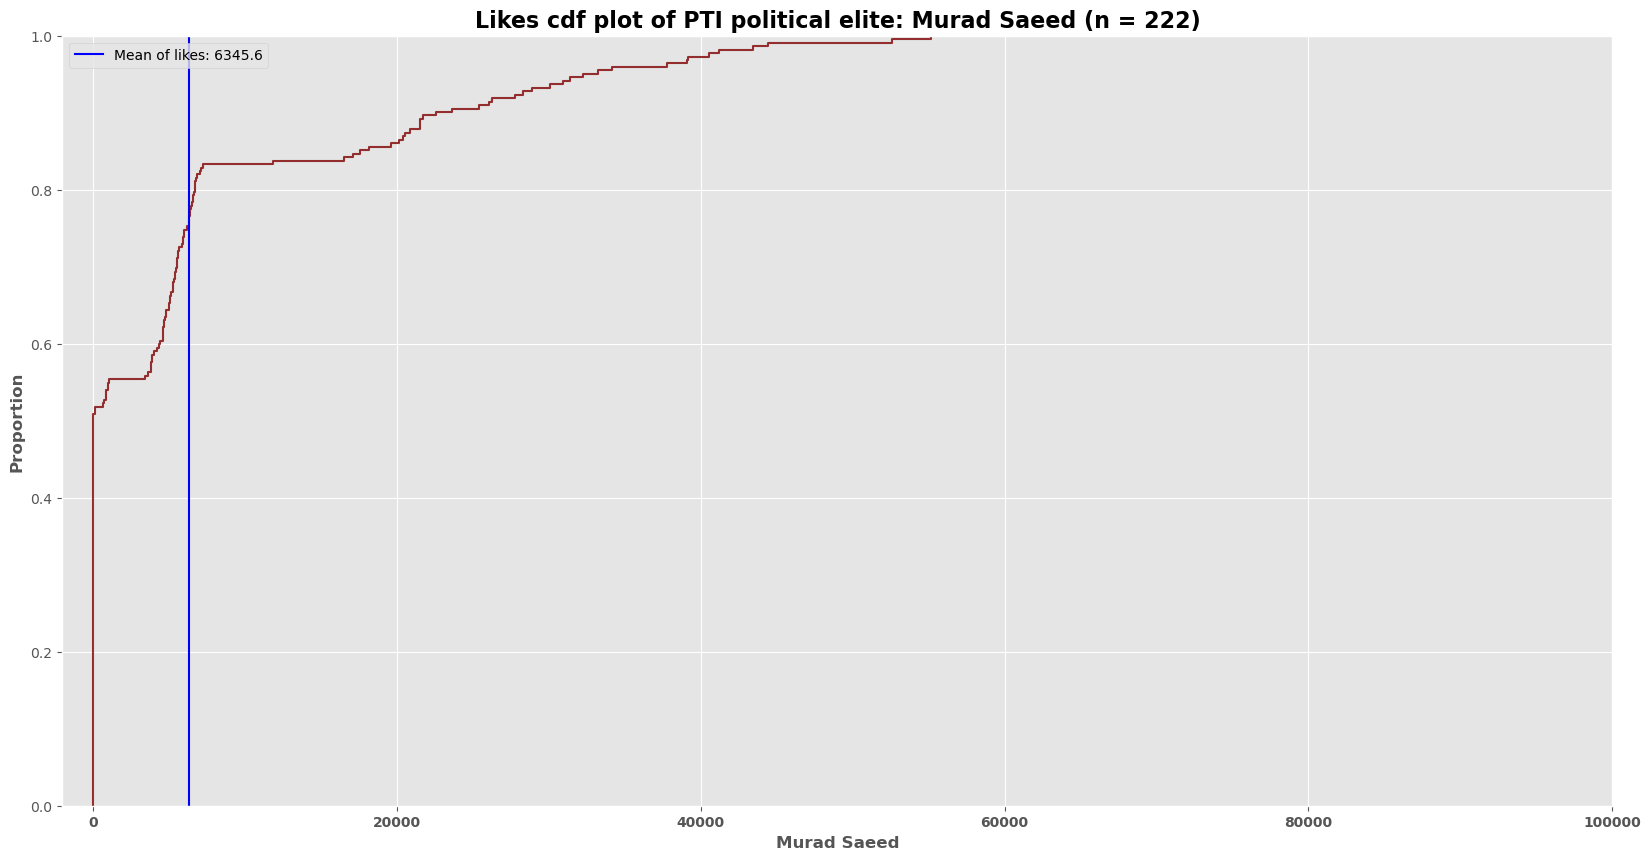

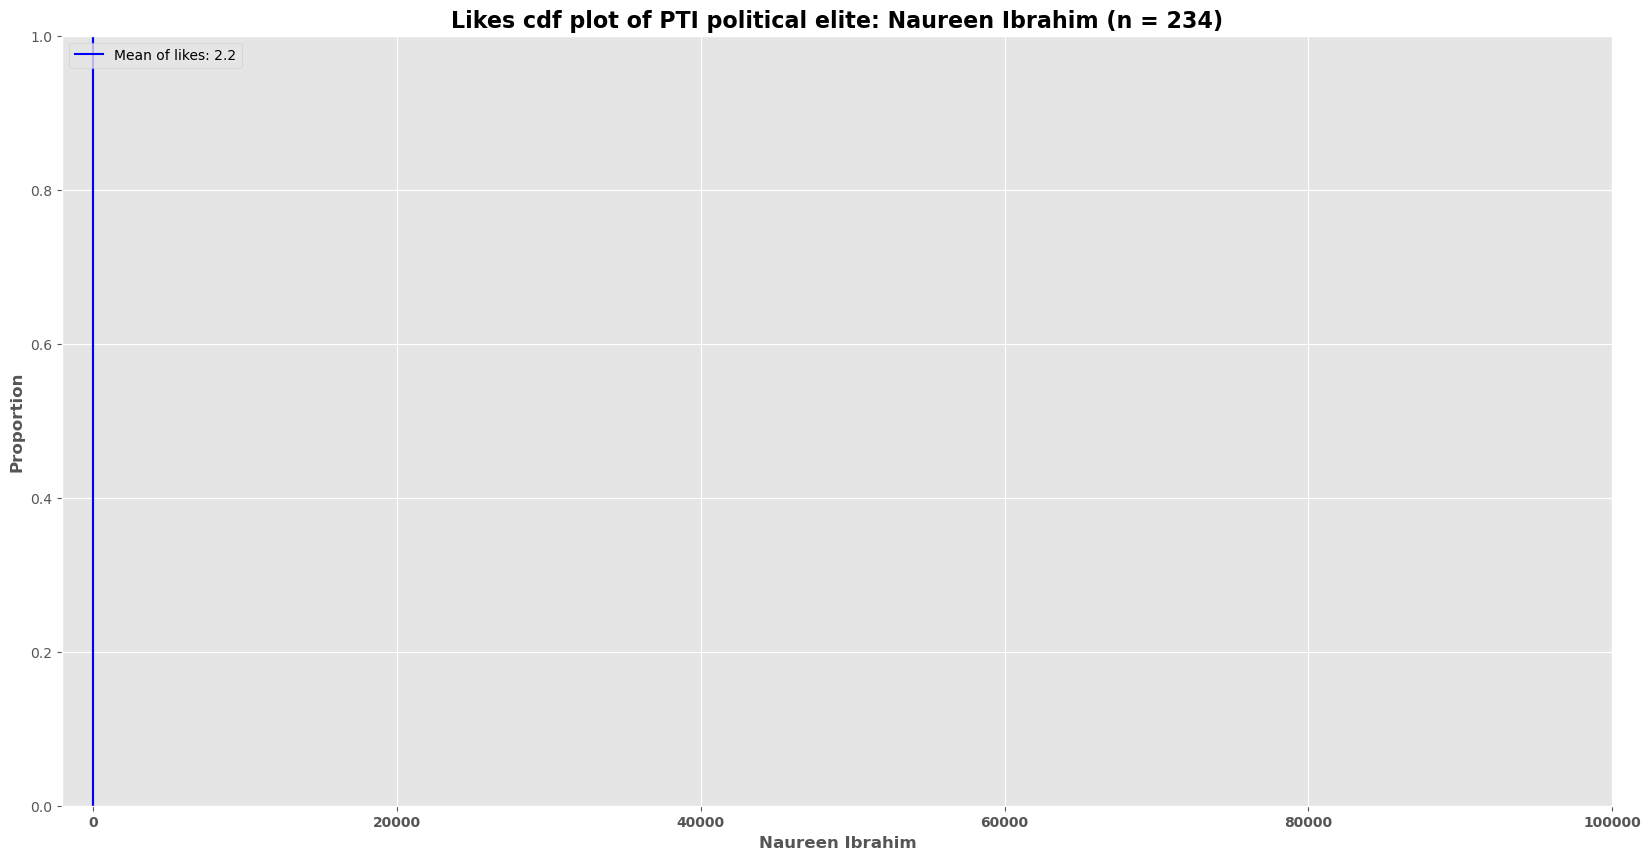

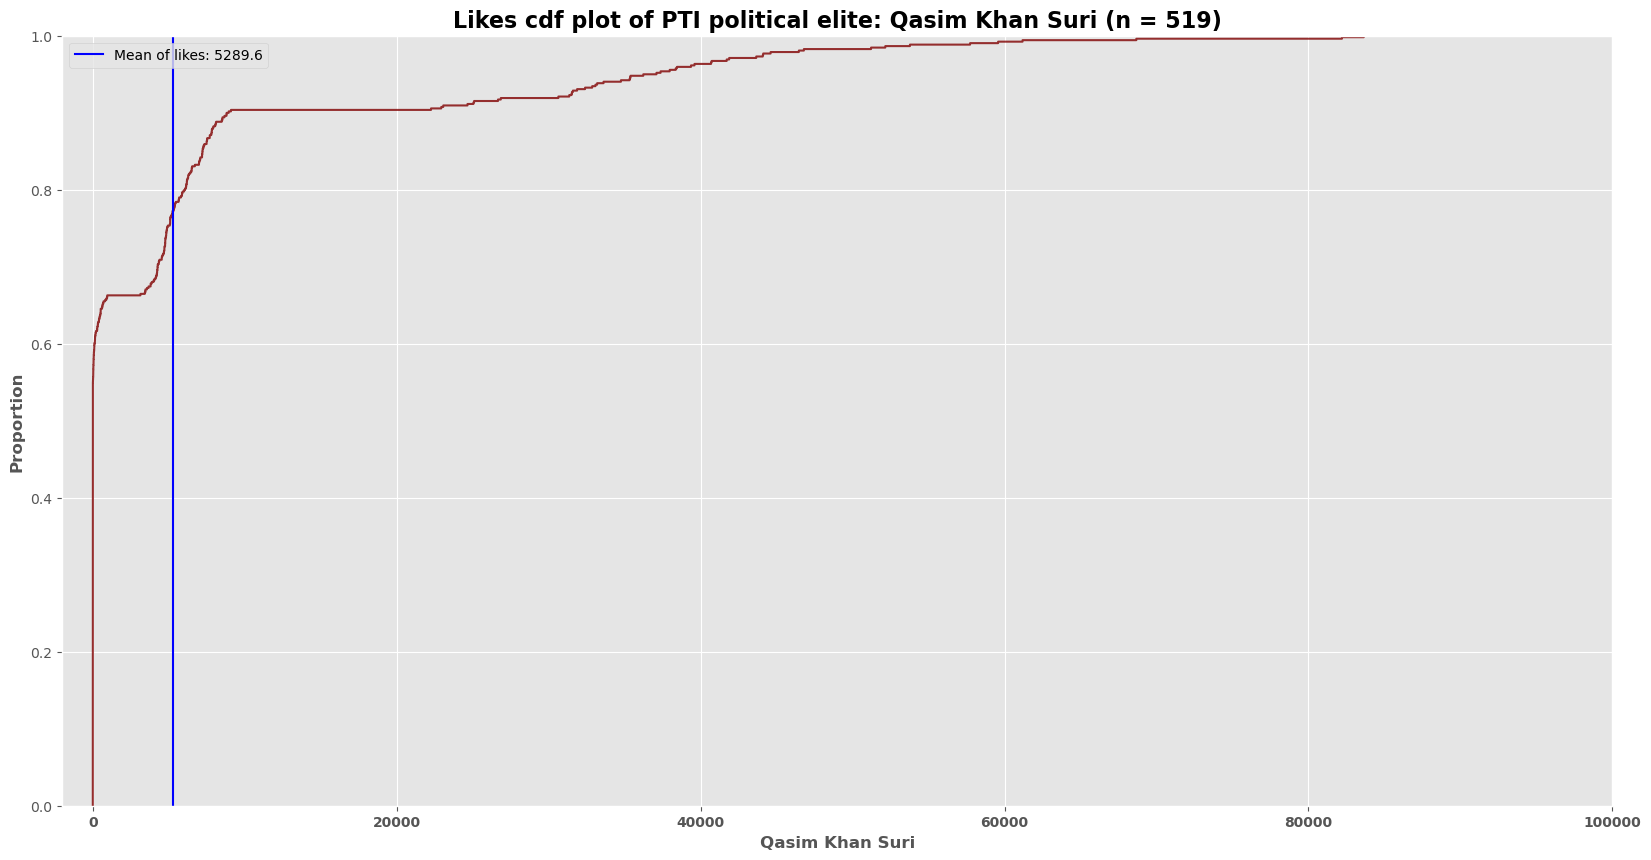

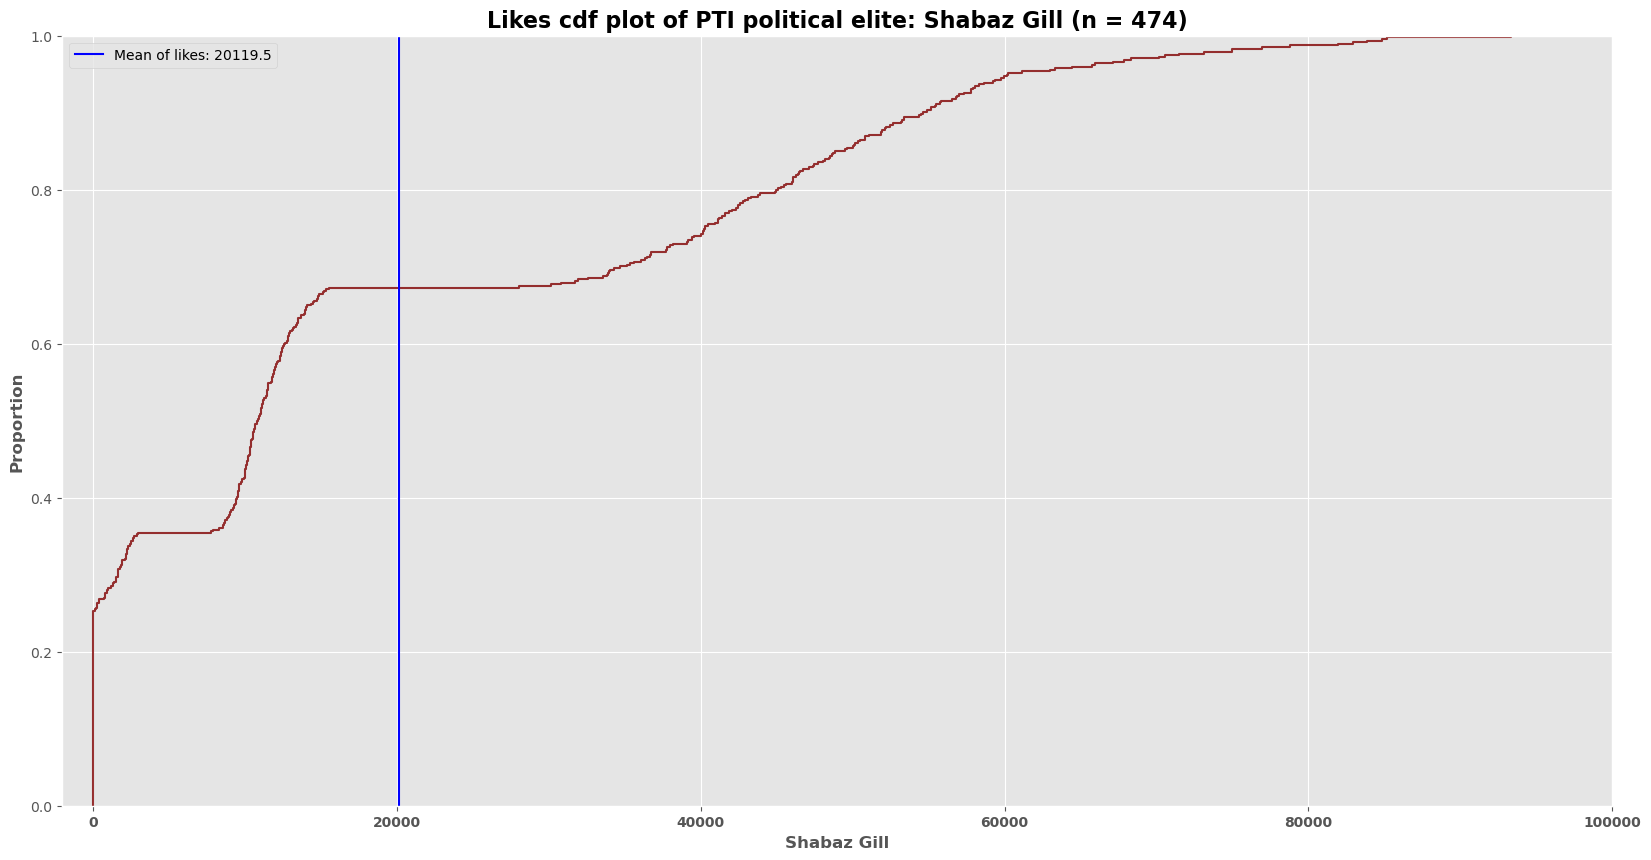

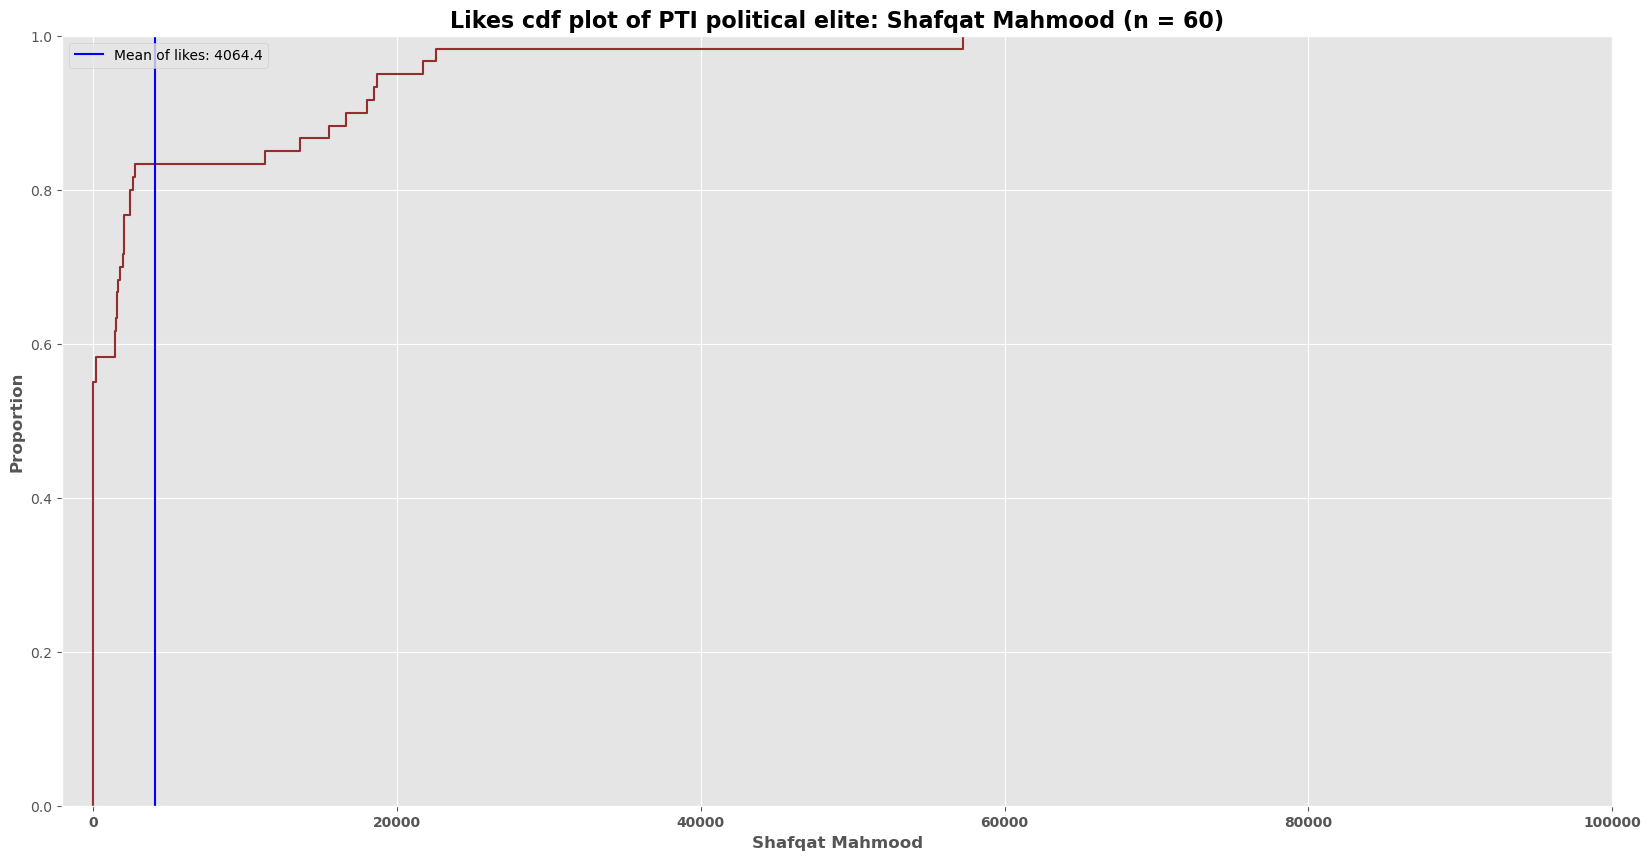

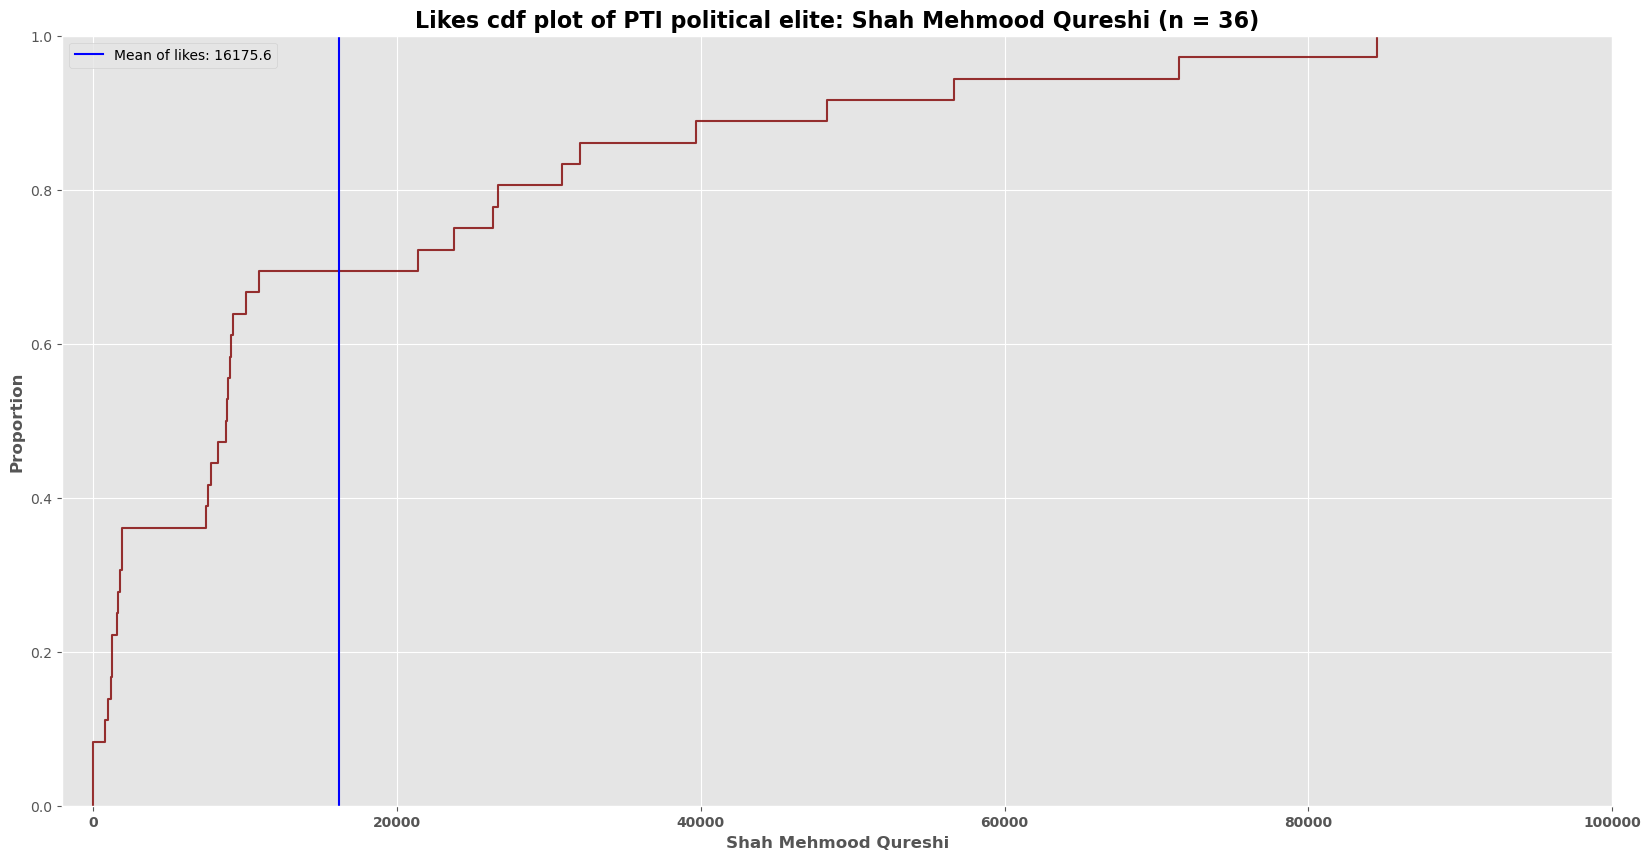

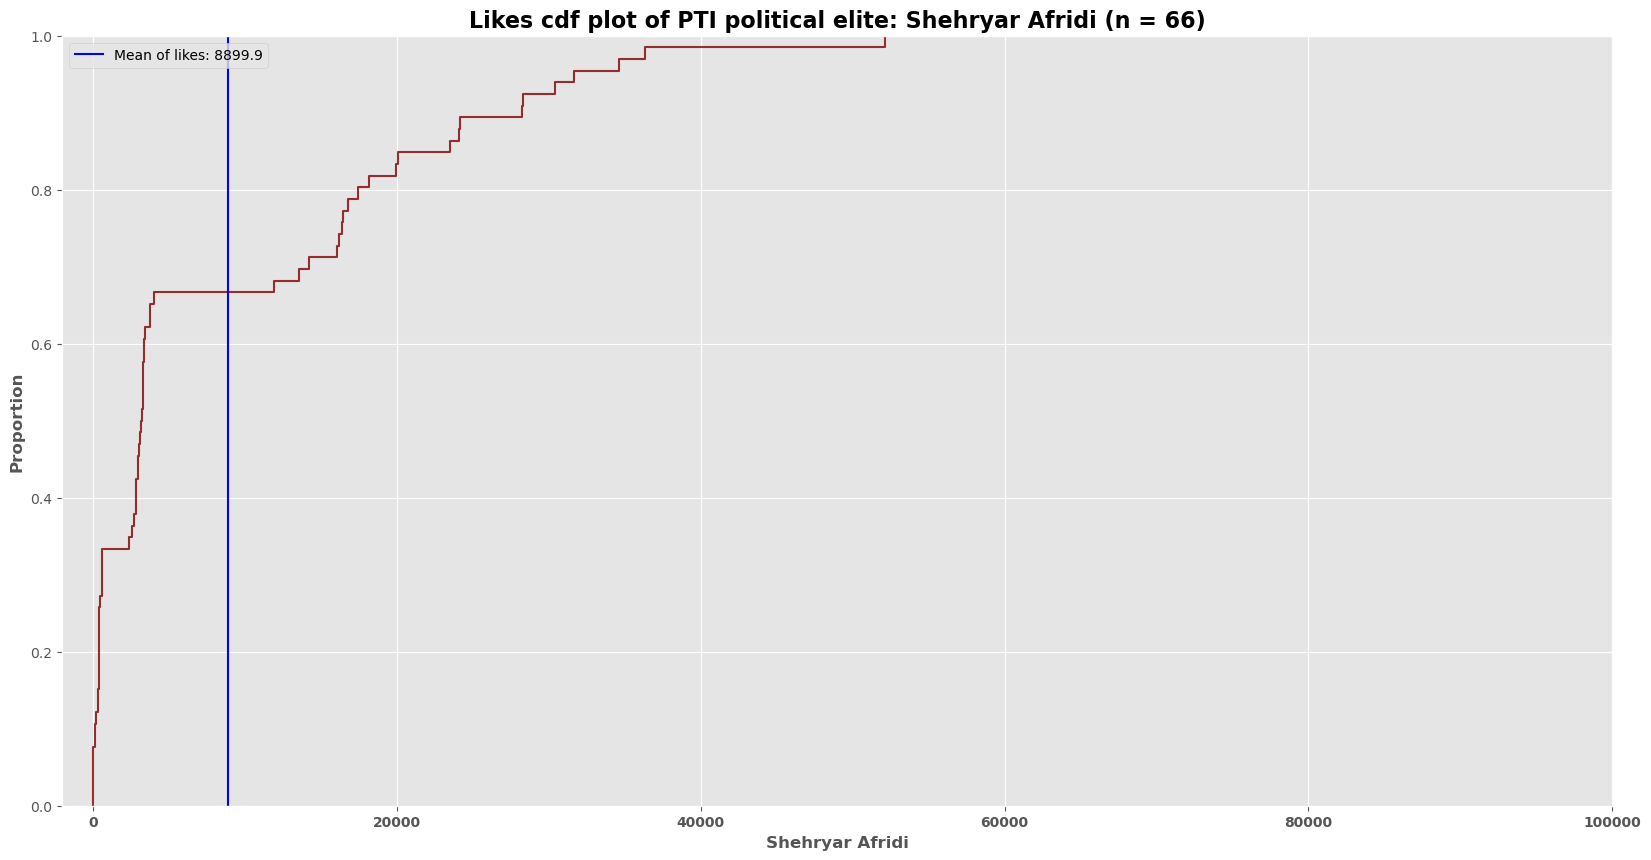

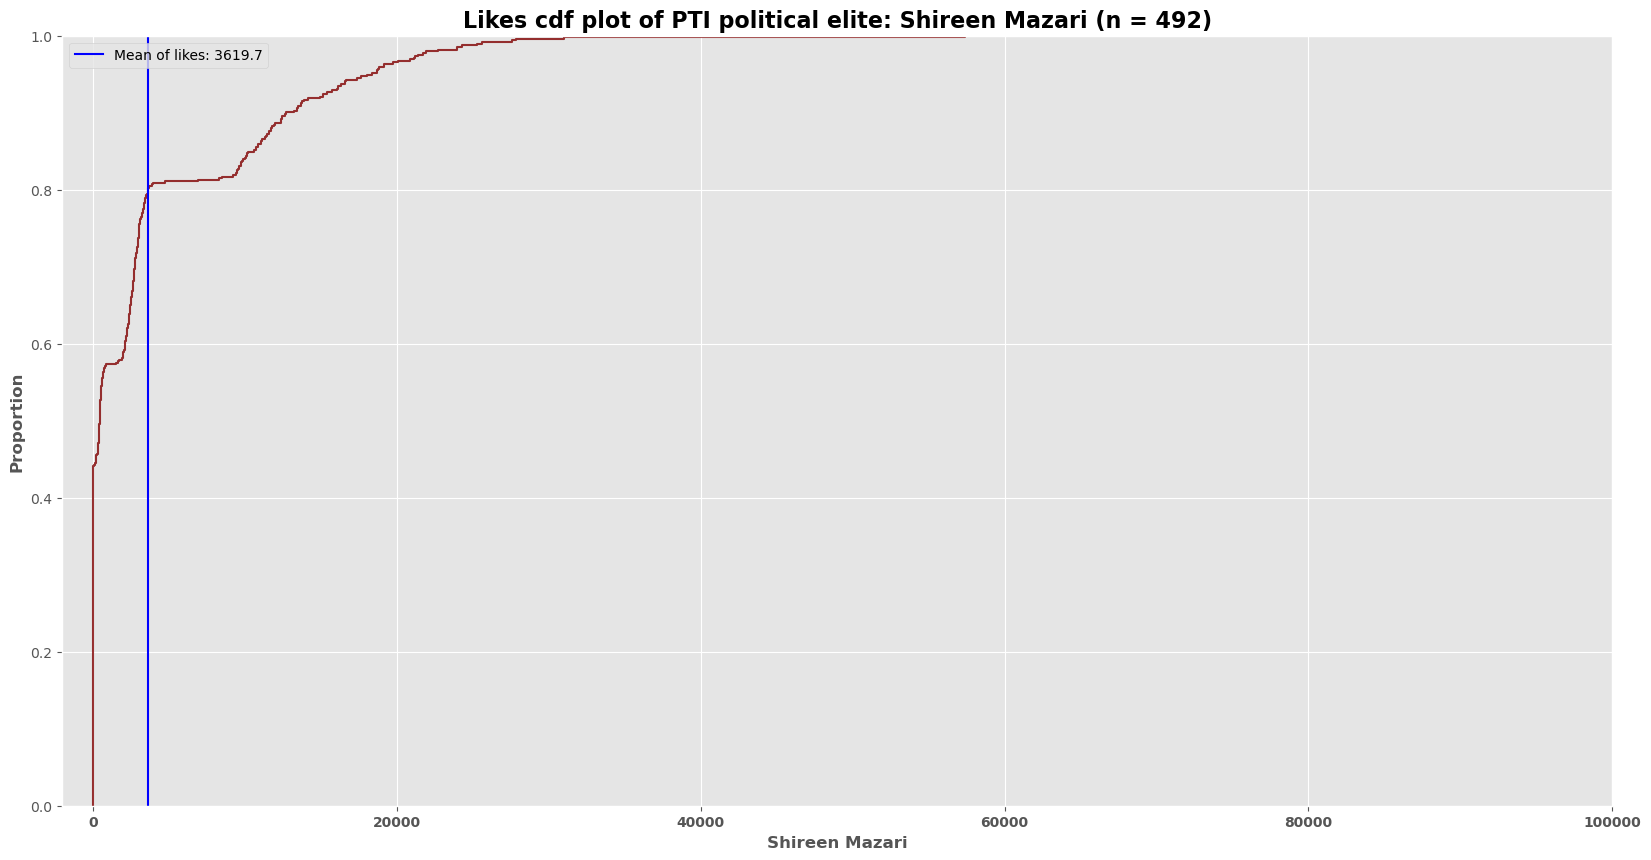

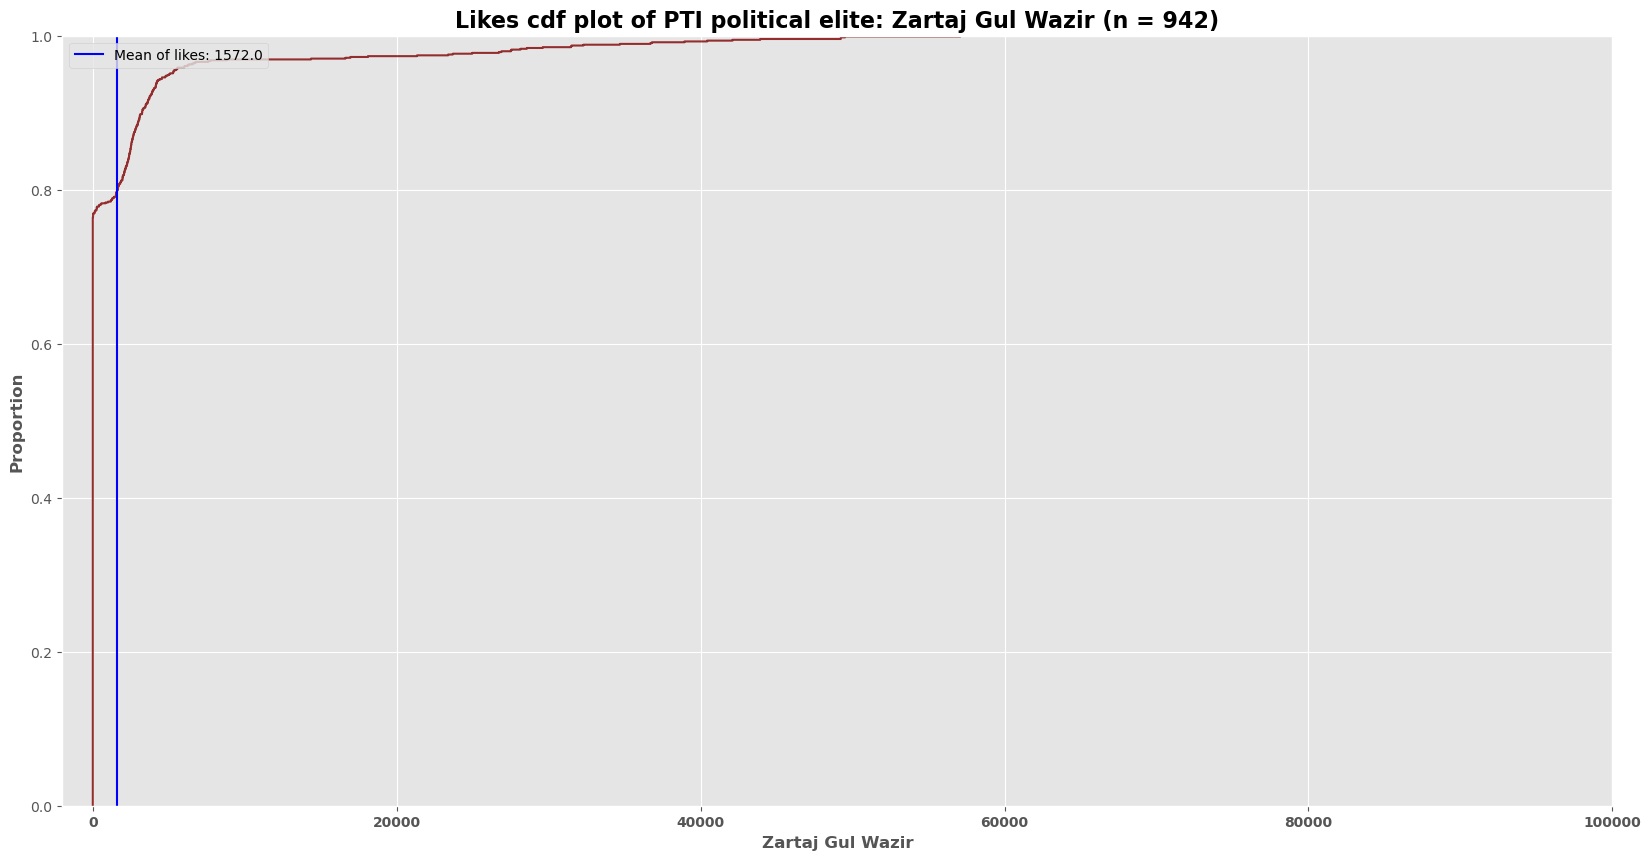

In [1911]:
j = 12
for i in range(len(PTI_temp_3)):
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.ecdfplot(data=PTI_temp_3['likes'][i], color='maroon', alpha=0.8, ax=ax)
    ax.axvline(x = mean(PTI_temp_3['likes'][i]), color = 'b', label = 'Mean of likes: '+str(round(mean(PTI_temp_3['likes'][i]),1)))
    ax.set_title('Likes cdf plot of PTI political elite: ' + PTI_temp_3.index[i]+ ' (n = '+str(len(PTI_temp_3['likes'][i]))+')', fontsize=16, fontweight='bold')
    ax.set_xlabel(PTI_temp_3.index[i], fontsize=12, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=12, fontweight='bold')
    labels = ax.get_xticklabels() 
    [label.set_fontweight('bold') for label in labels]
    ax.set_xlim(-2000, 100000)
    ax.legend(loc='upper left')
    plt.savefig(str(j)+'.png', bbox_inches='tight')
    j +=1

plt.show()

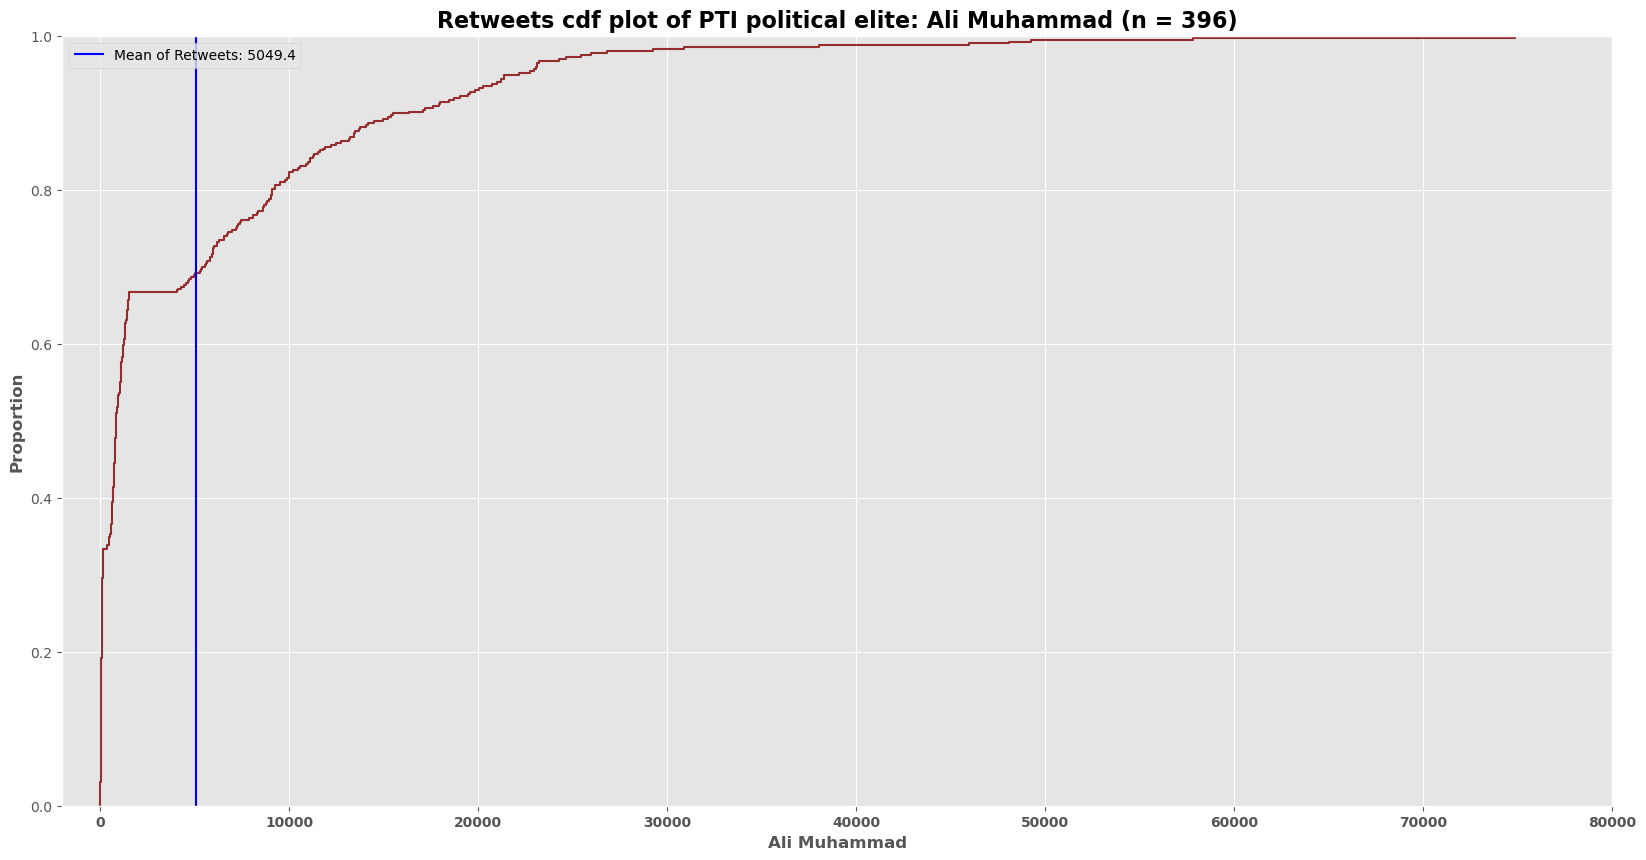

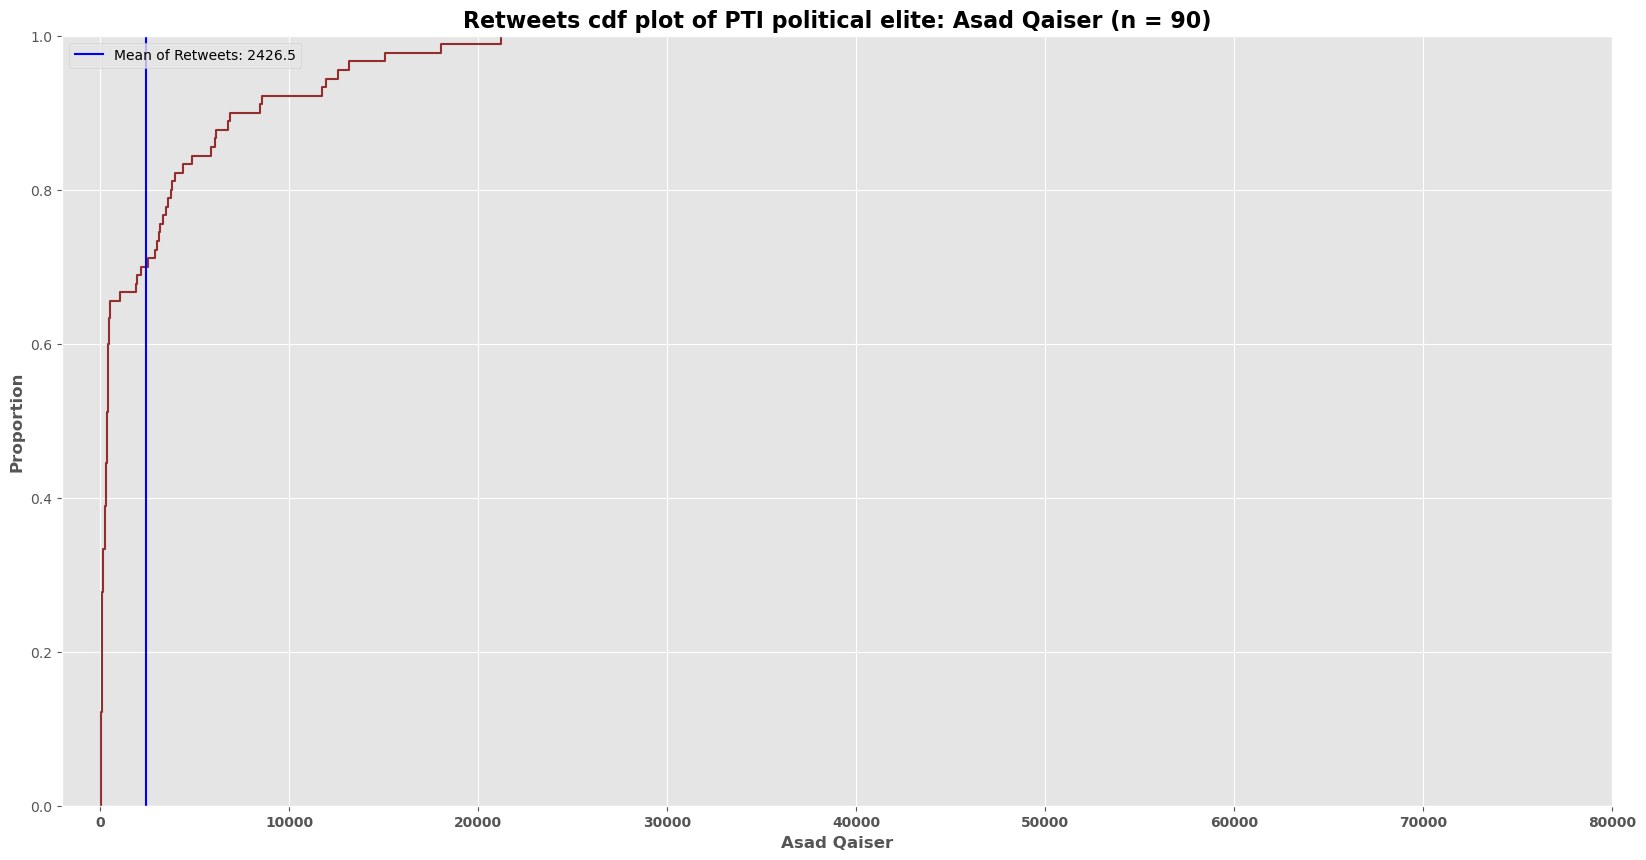

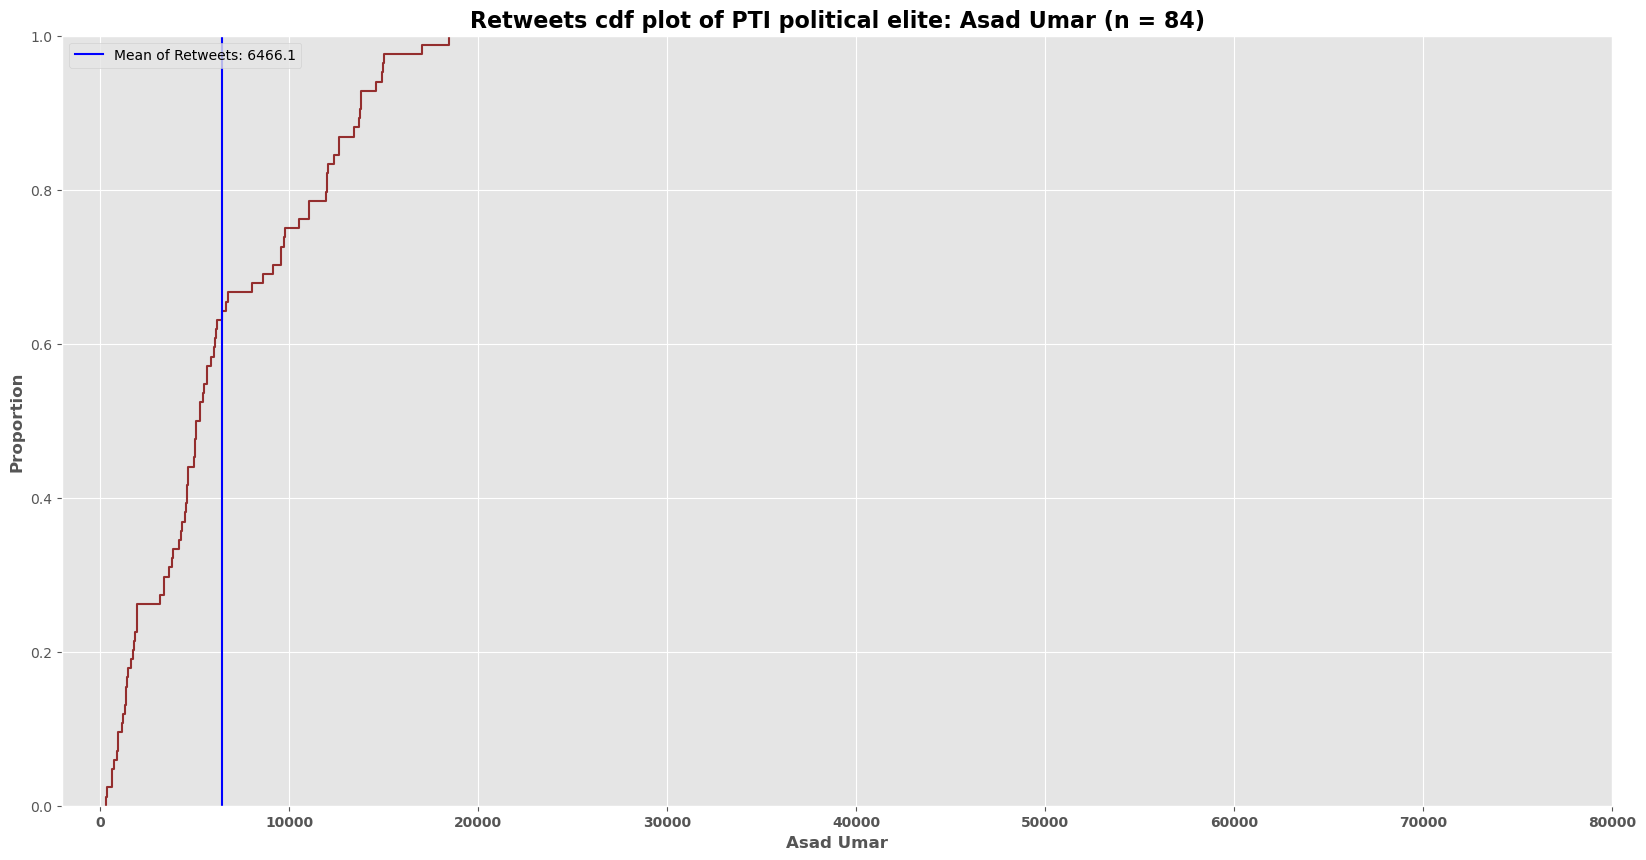

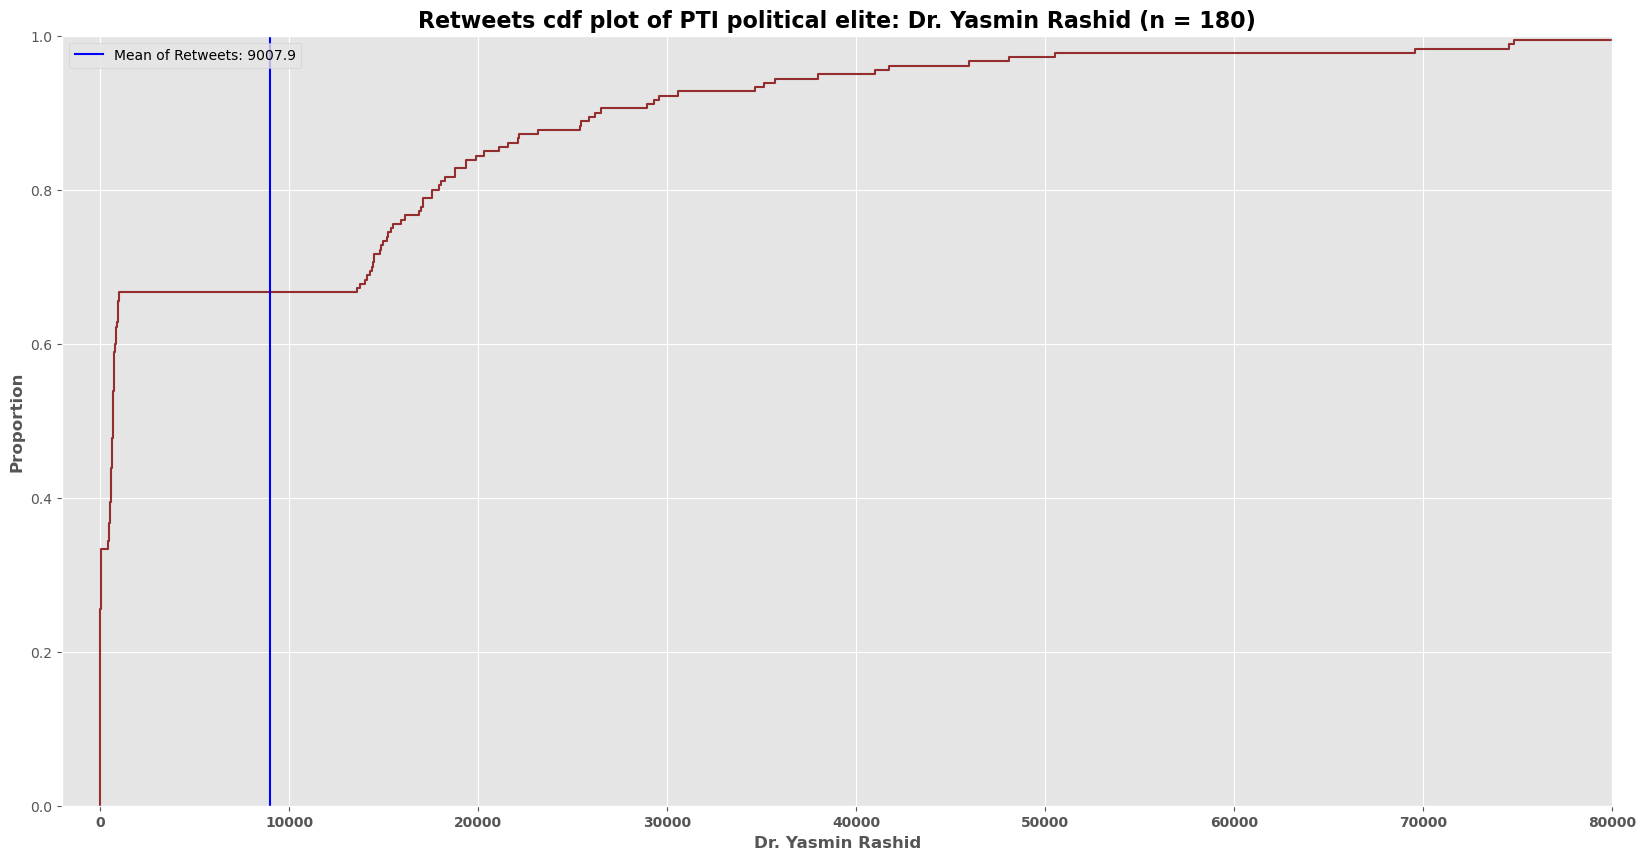

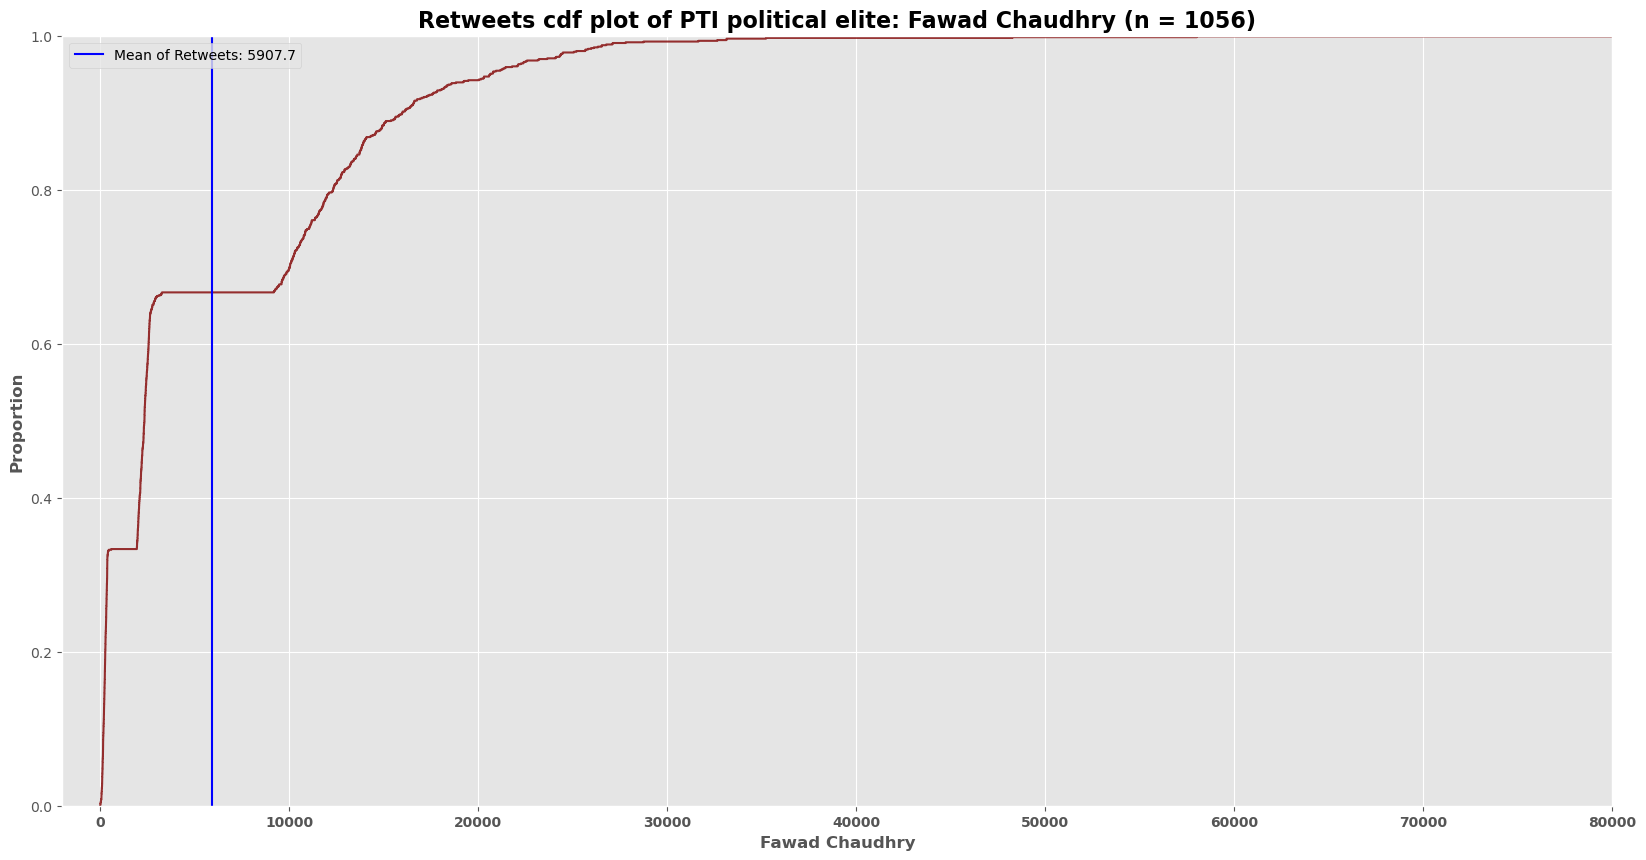

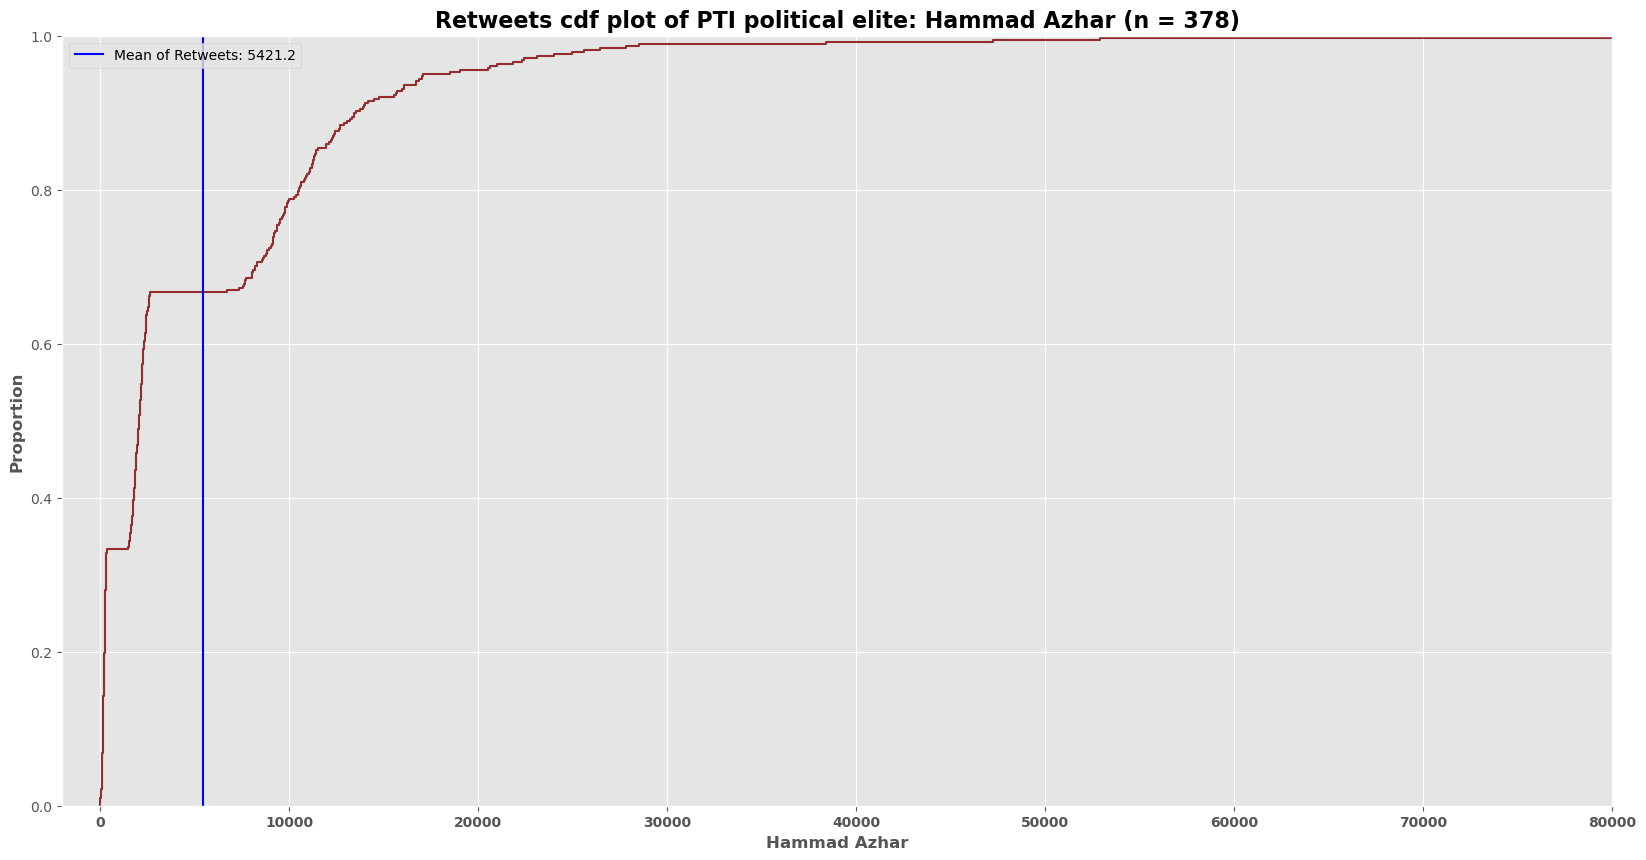

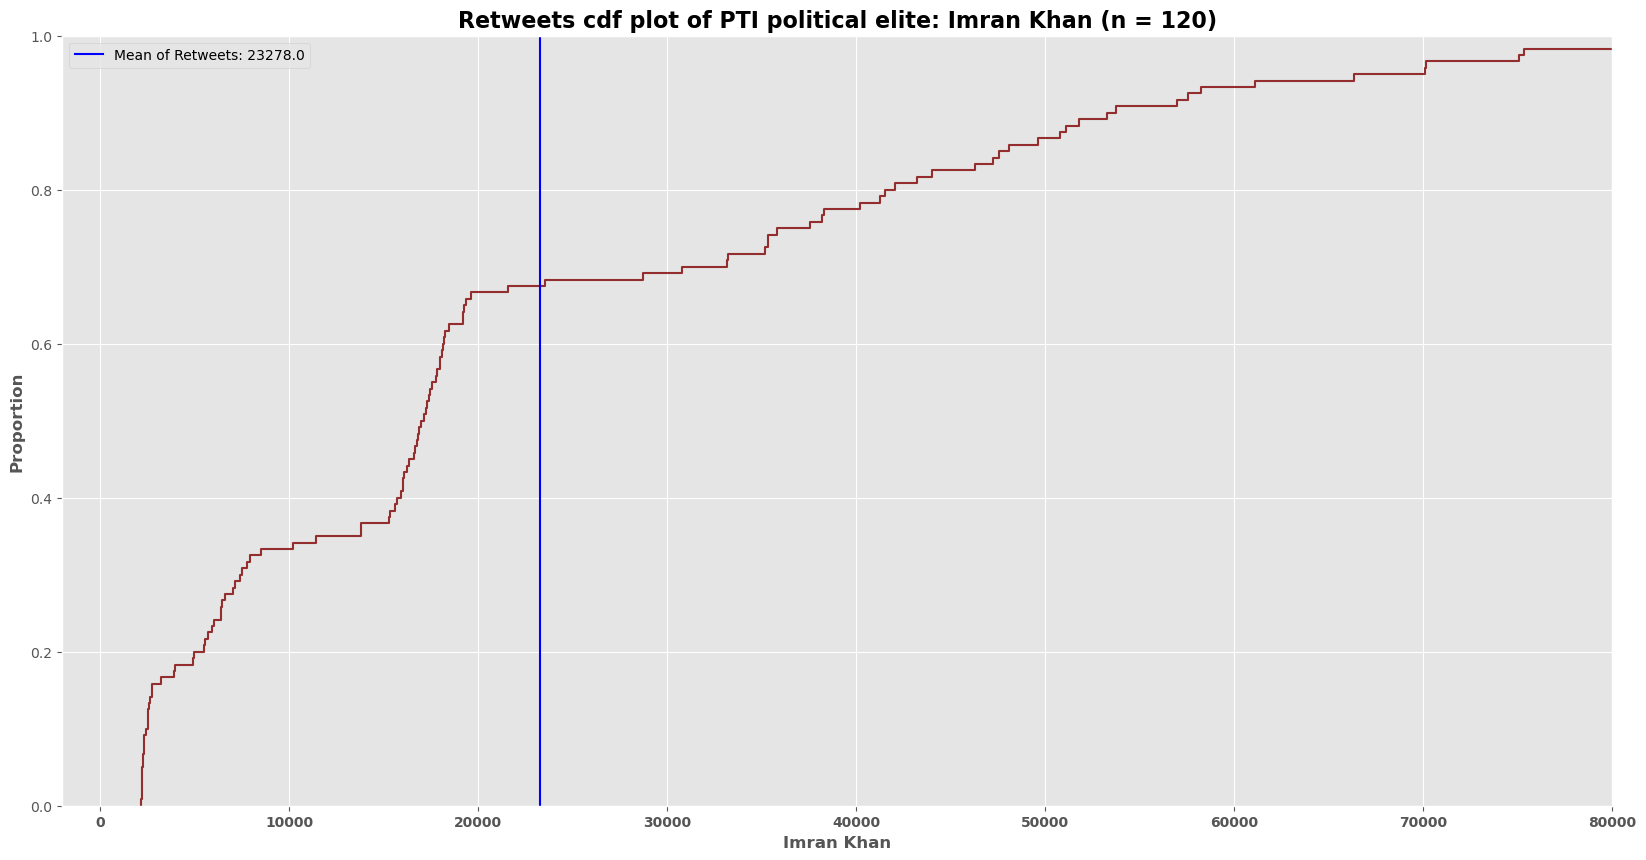

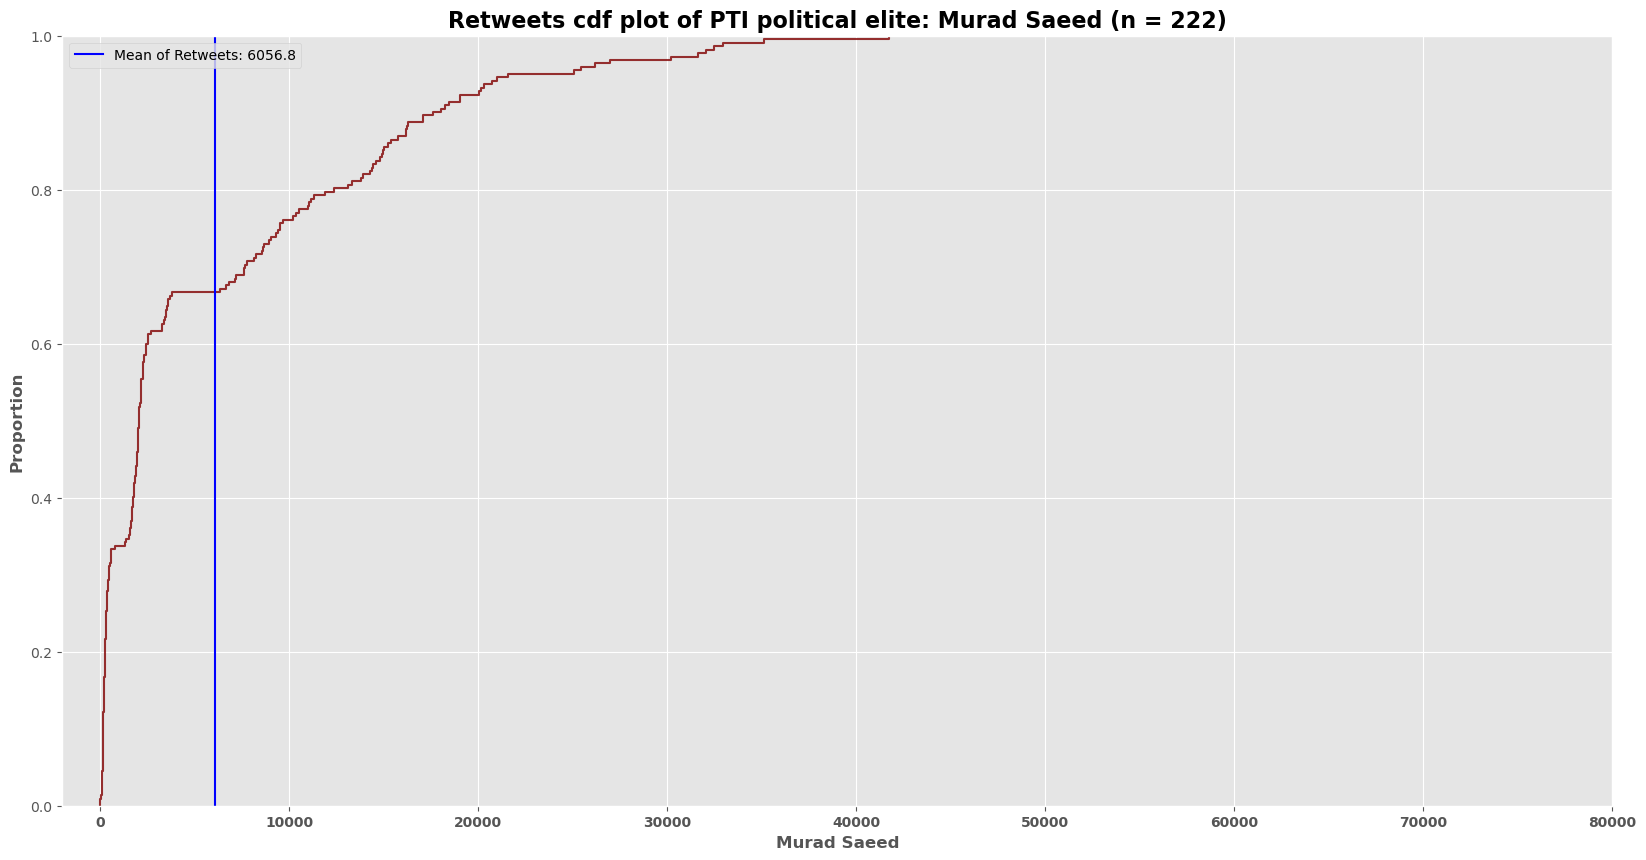

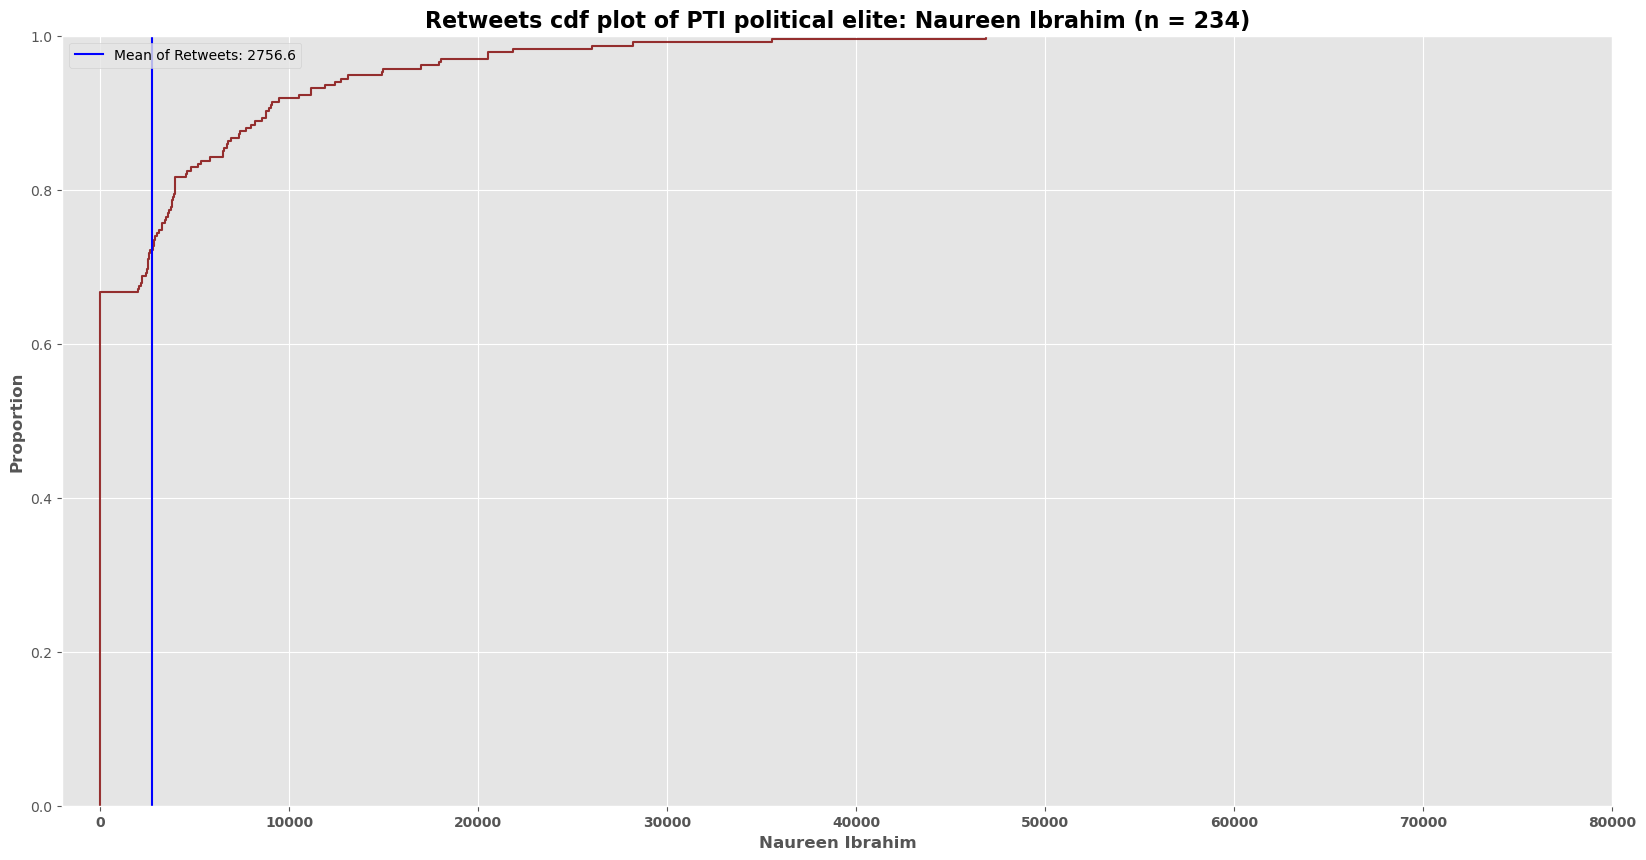

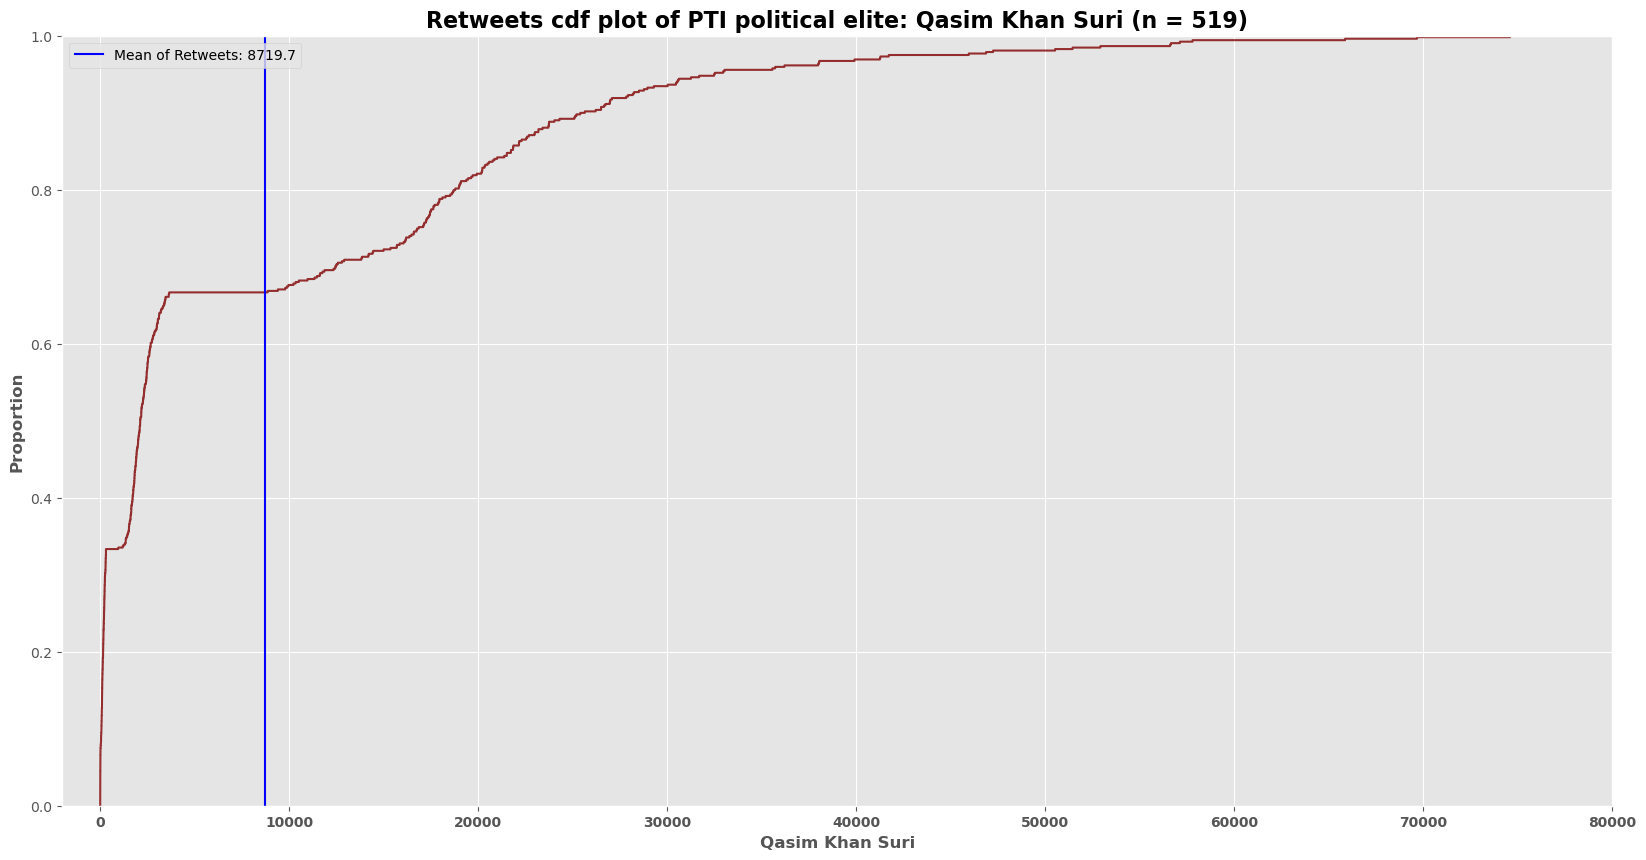

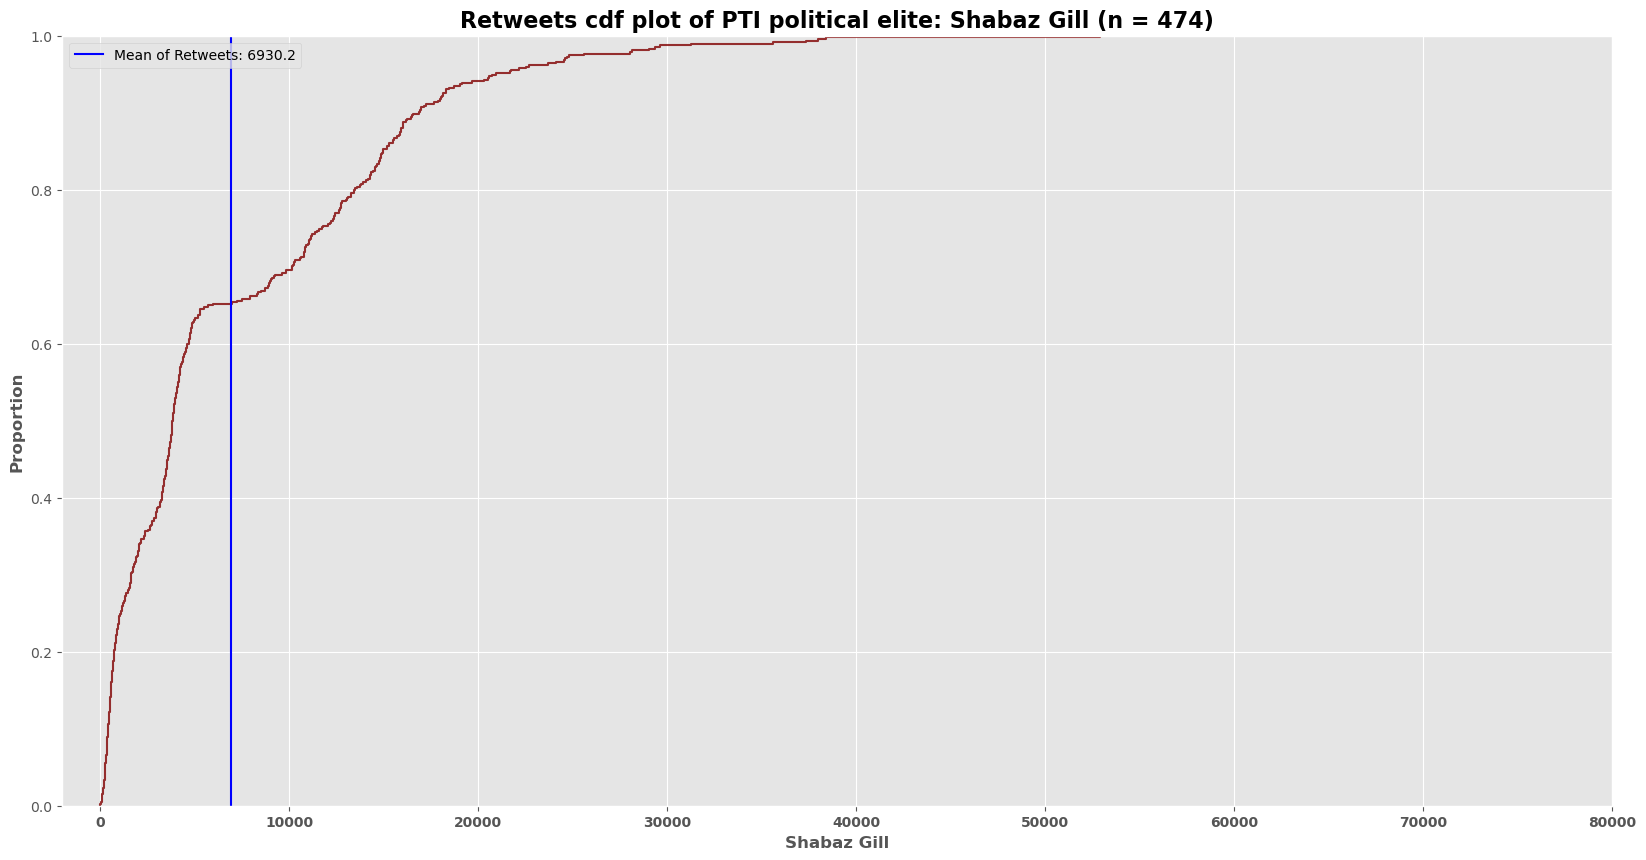

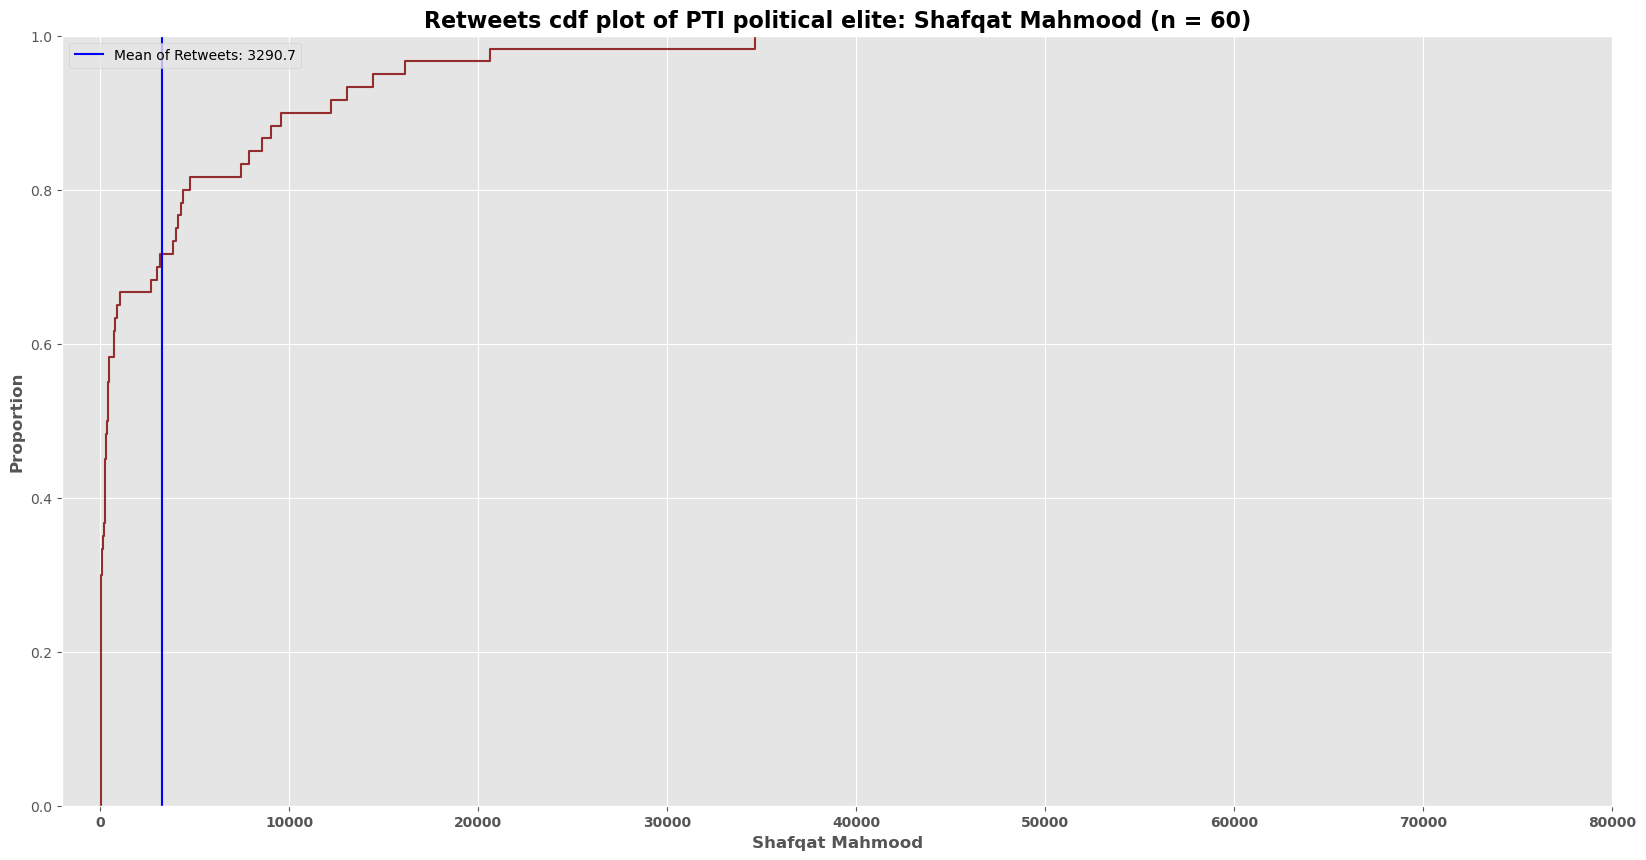

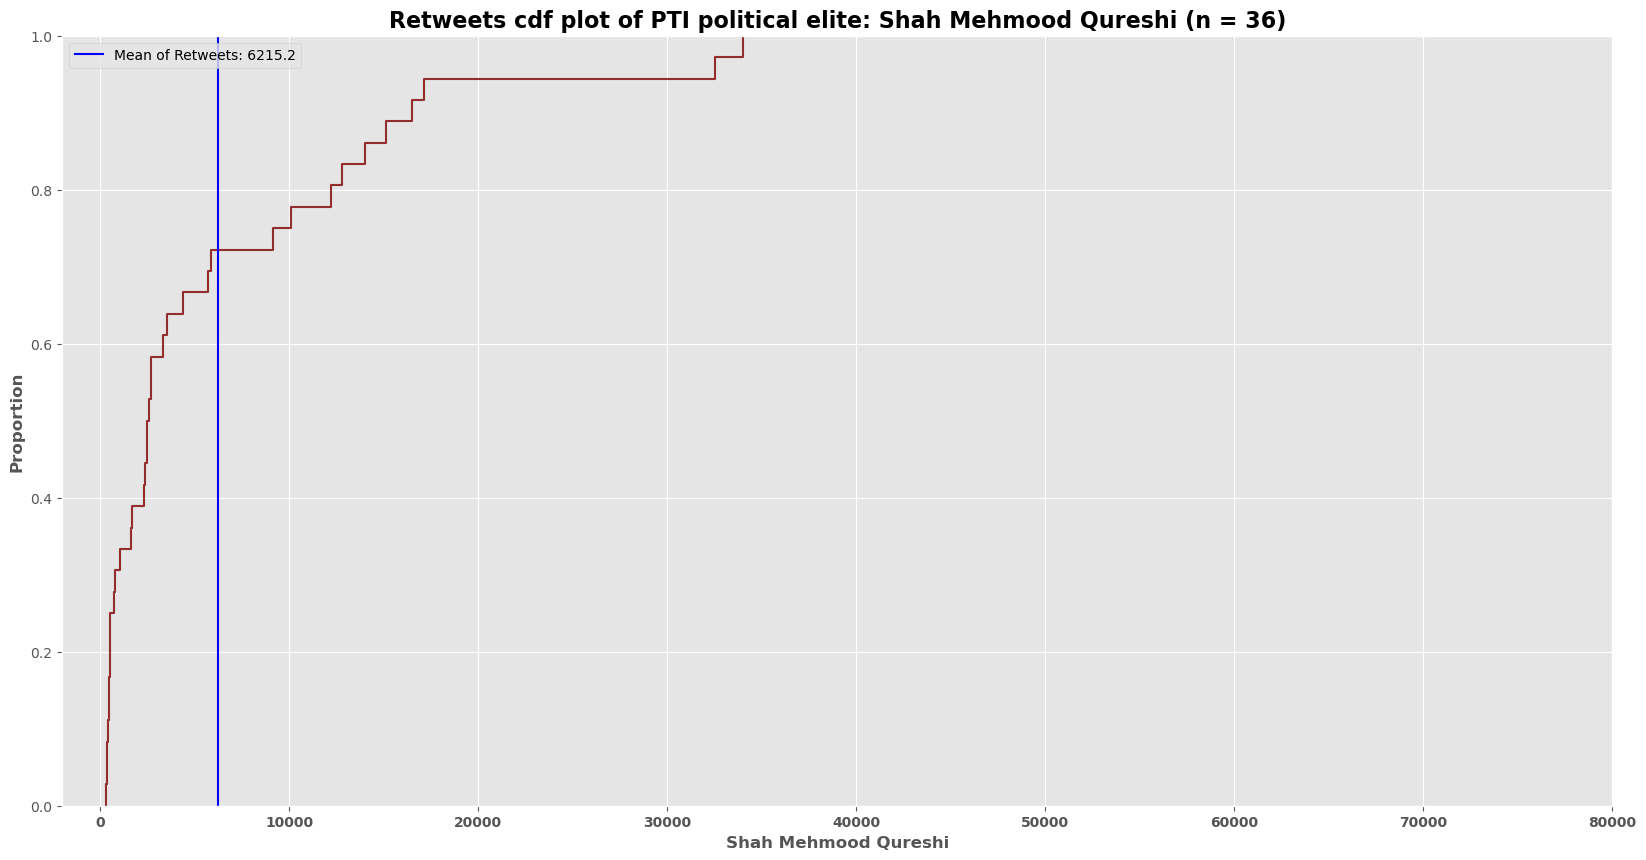

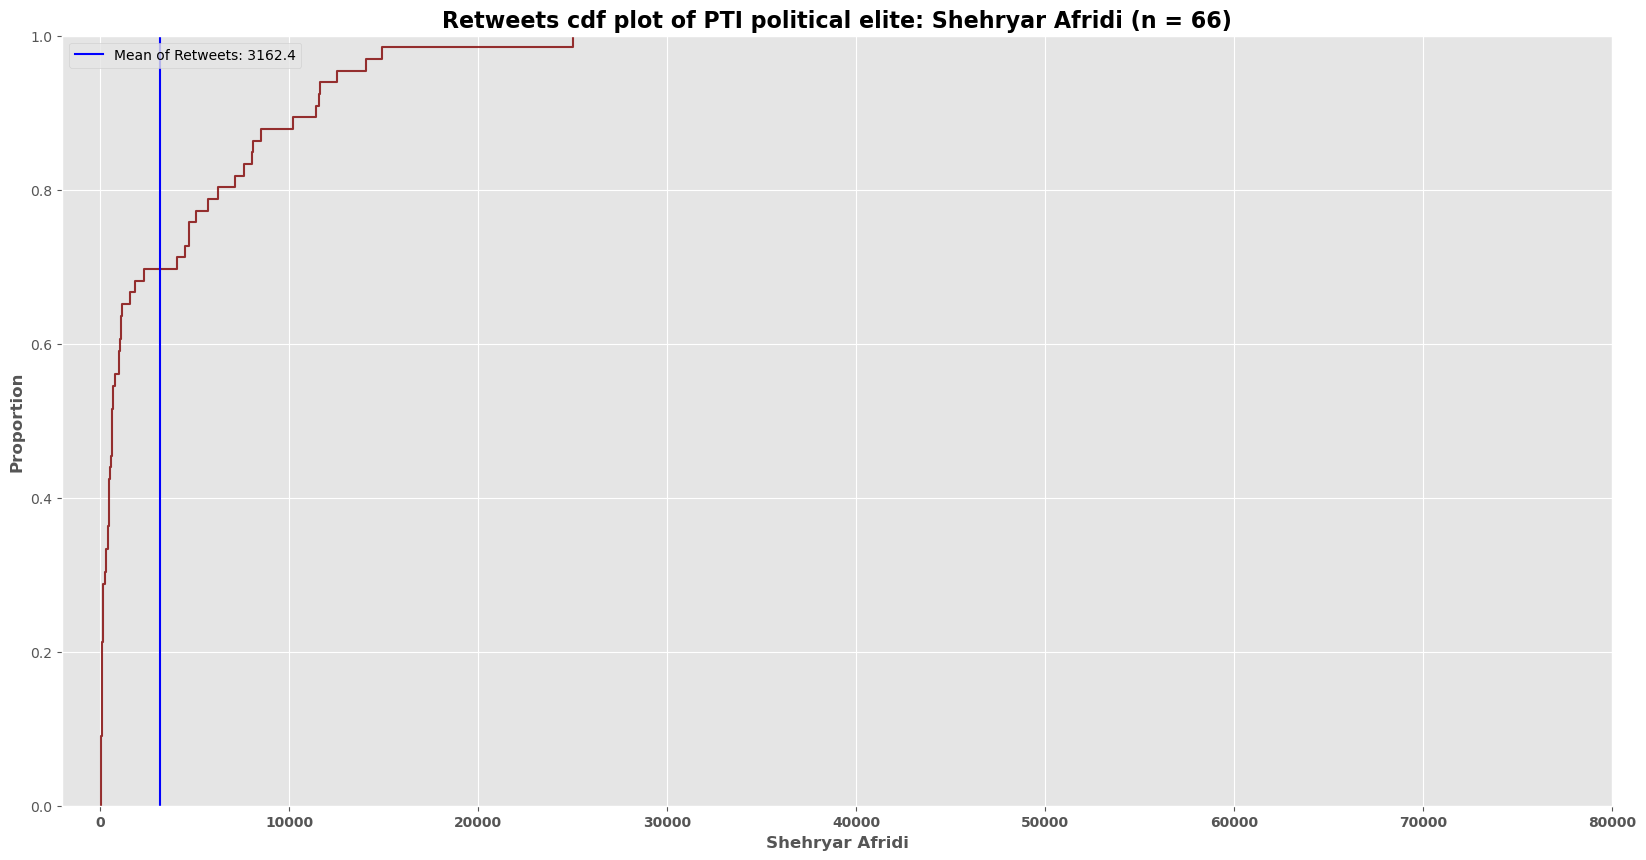

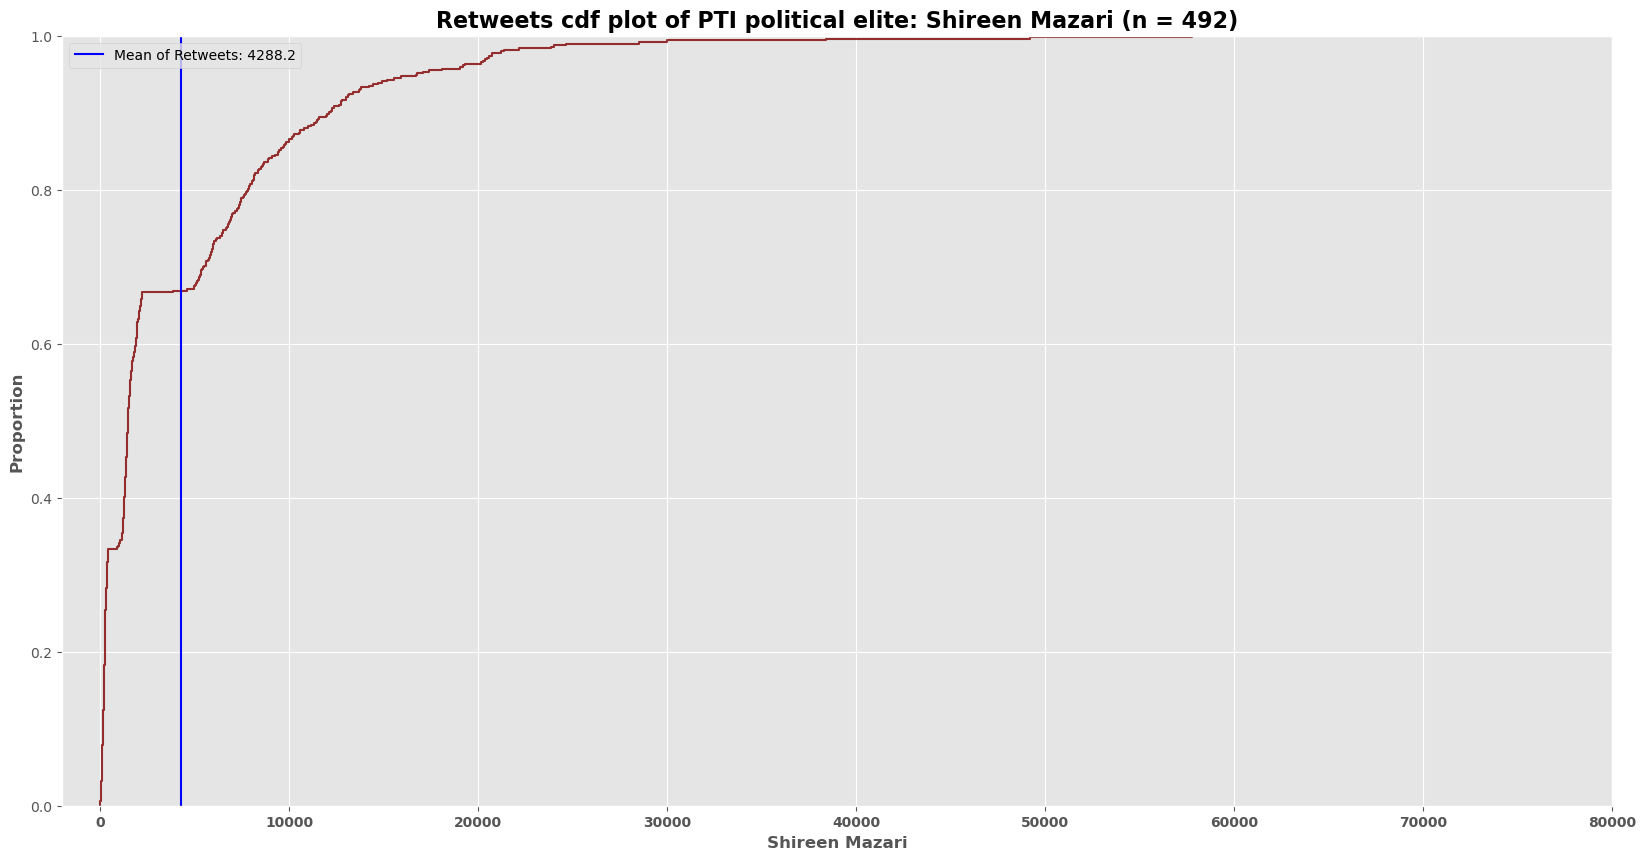

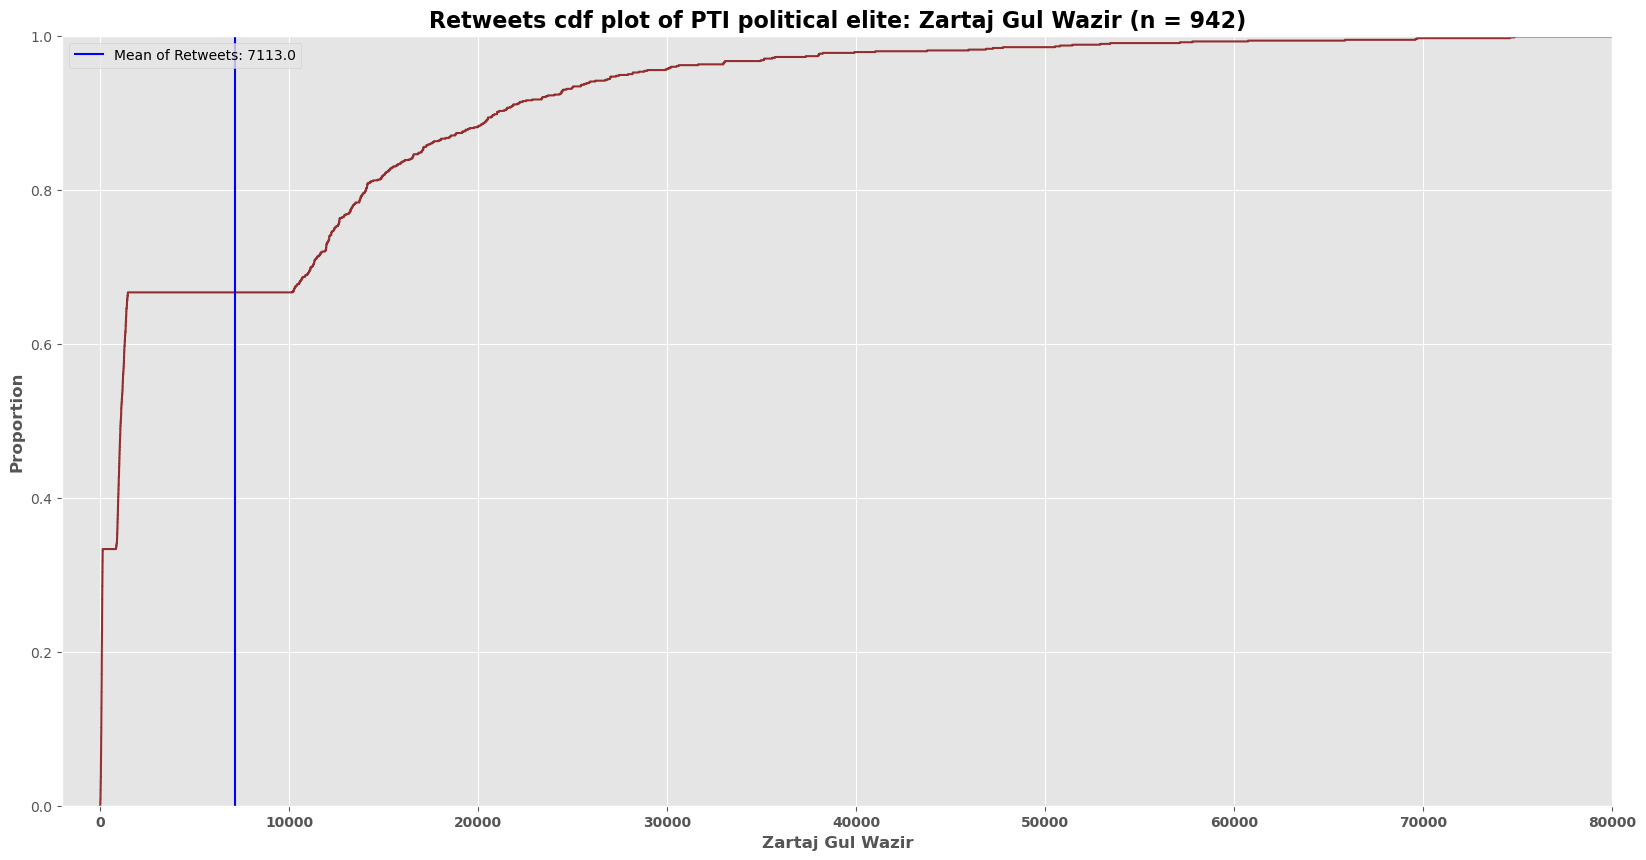

In [1912]:
j = 28
for i in range(len(PTI_temp_3)):
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.ecdfplot(data=PTI_temp_3['retweets'][i], color='maroon', alpha=0.8, ax=ax)
    ax.axvline(x = mean(PTI_temp_3['retweets'][i]), color = 'b', label = 'Mean of Retweets: '+str(round(mean(PTI_temp_3['retweets'][i]),1)))
    ax.set_title('Retweets cdf plot of PTI political elite: ' + PTI_temp_3.index[i]+ ' (n = '+str(len(PTI_temp_3['retweets'][i]))+')', fontsize=16, fontweight='bold')
    ax.set_xlabel(PTI_temp_3.index[i], fontsize=12, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=12, fontweight='bold')
    labels = ax.get_xticklabels() 
    [label.set_fontweight('bold') for label in labels]
    ax.set_xlim(-2000, 80000)
    ax.legend(loc='upper left')
    plt.savefig(str(j)+'.png', bbox_inches='tight')
    j +=1
plt.show()

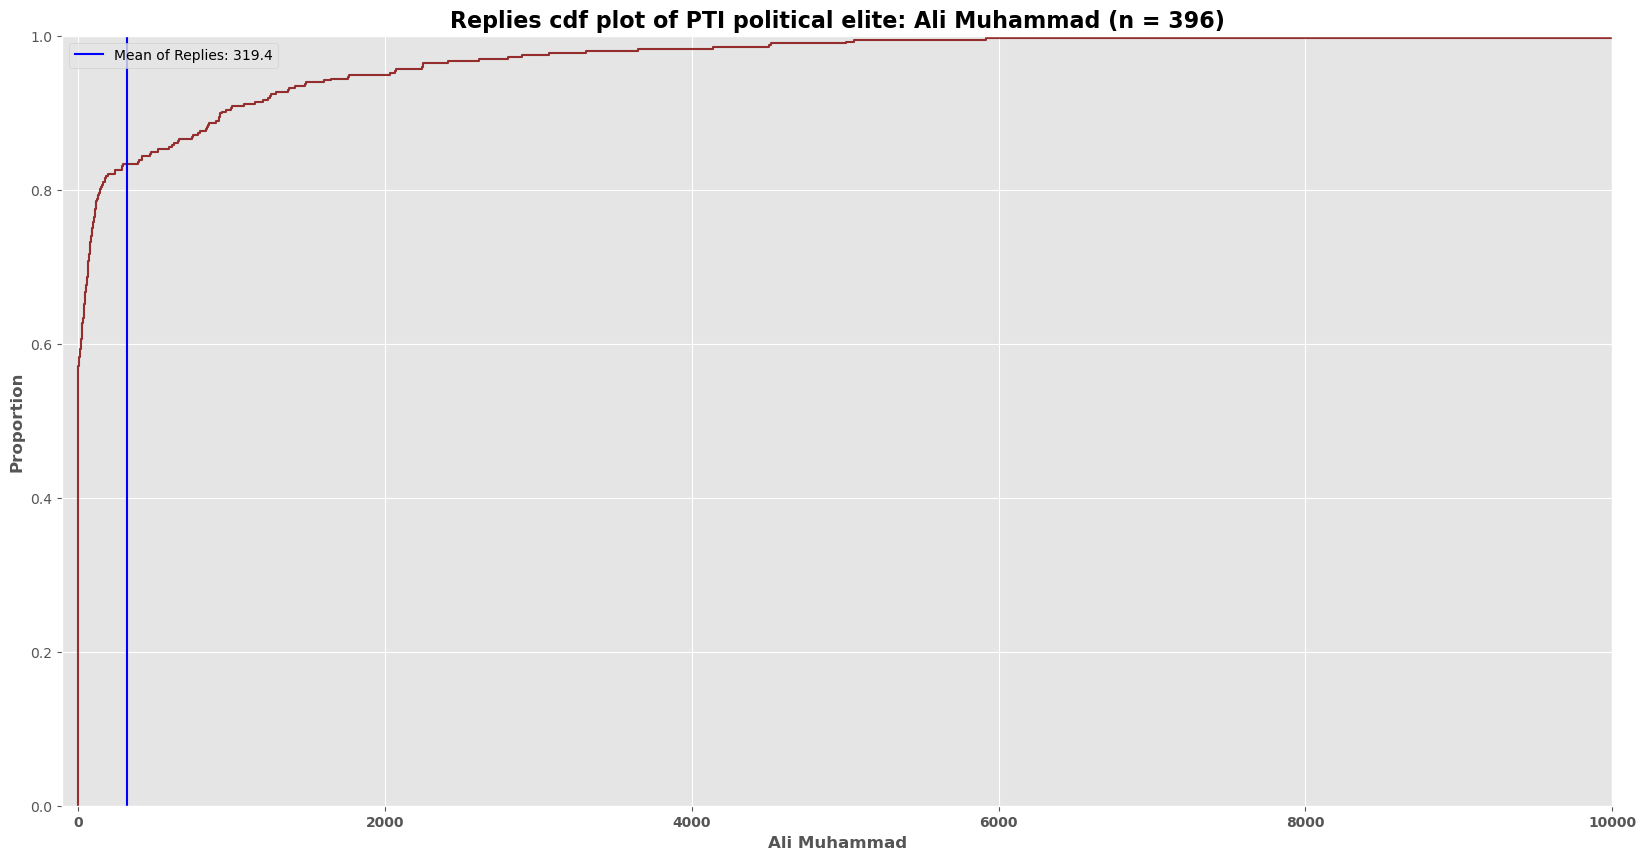

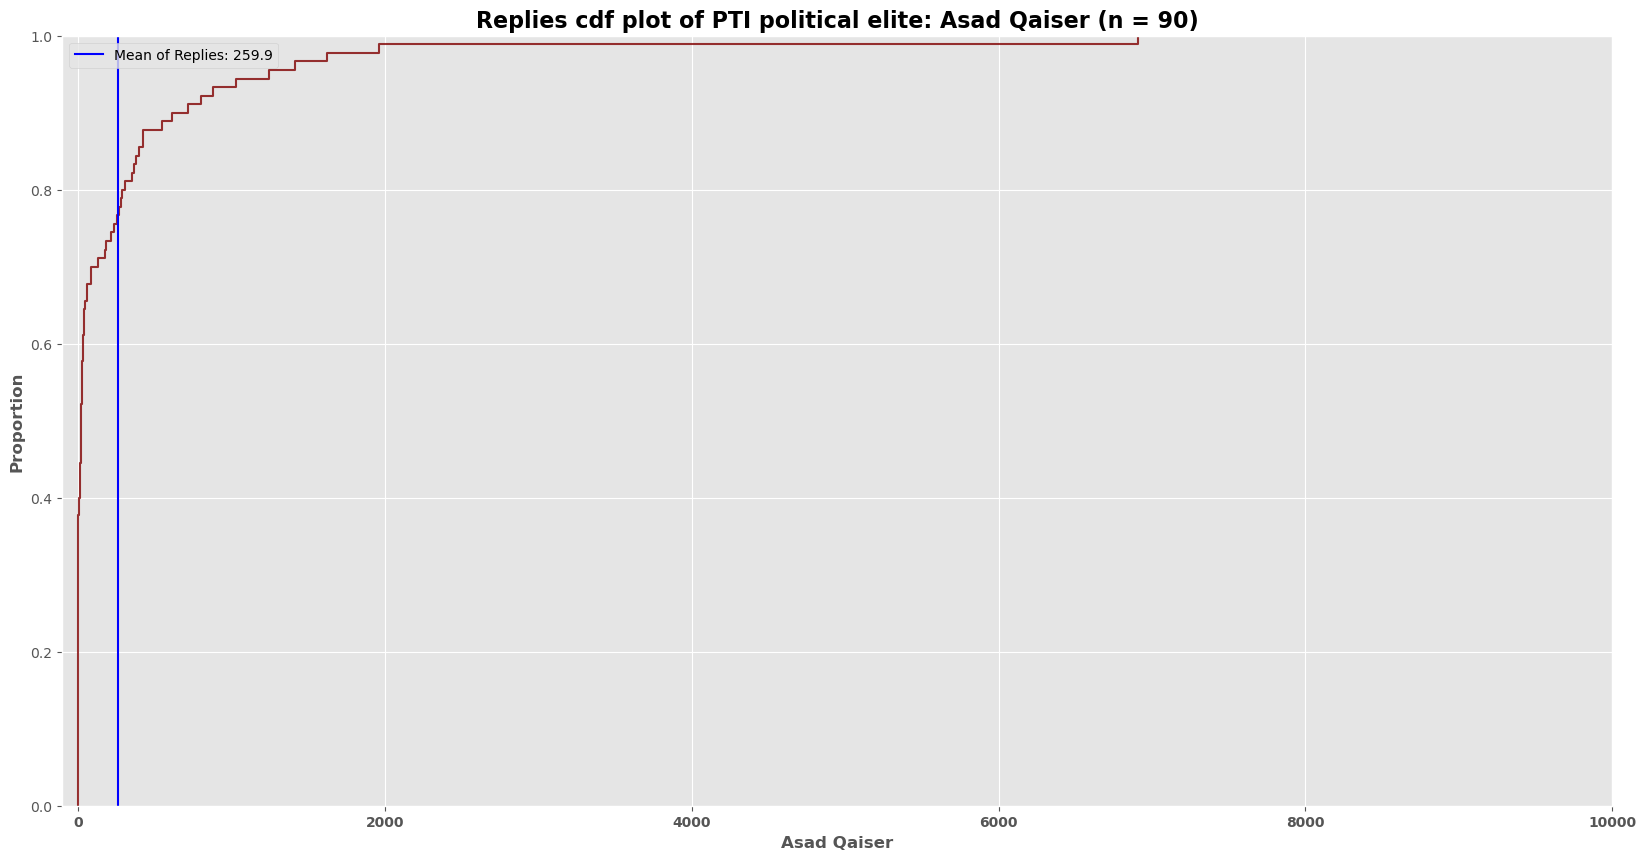

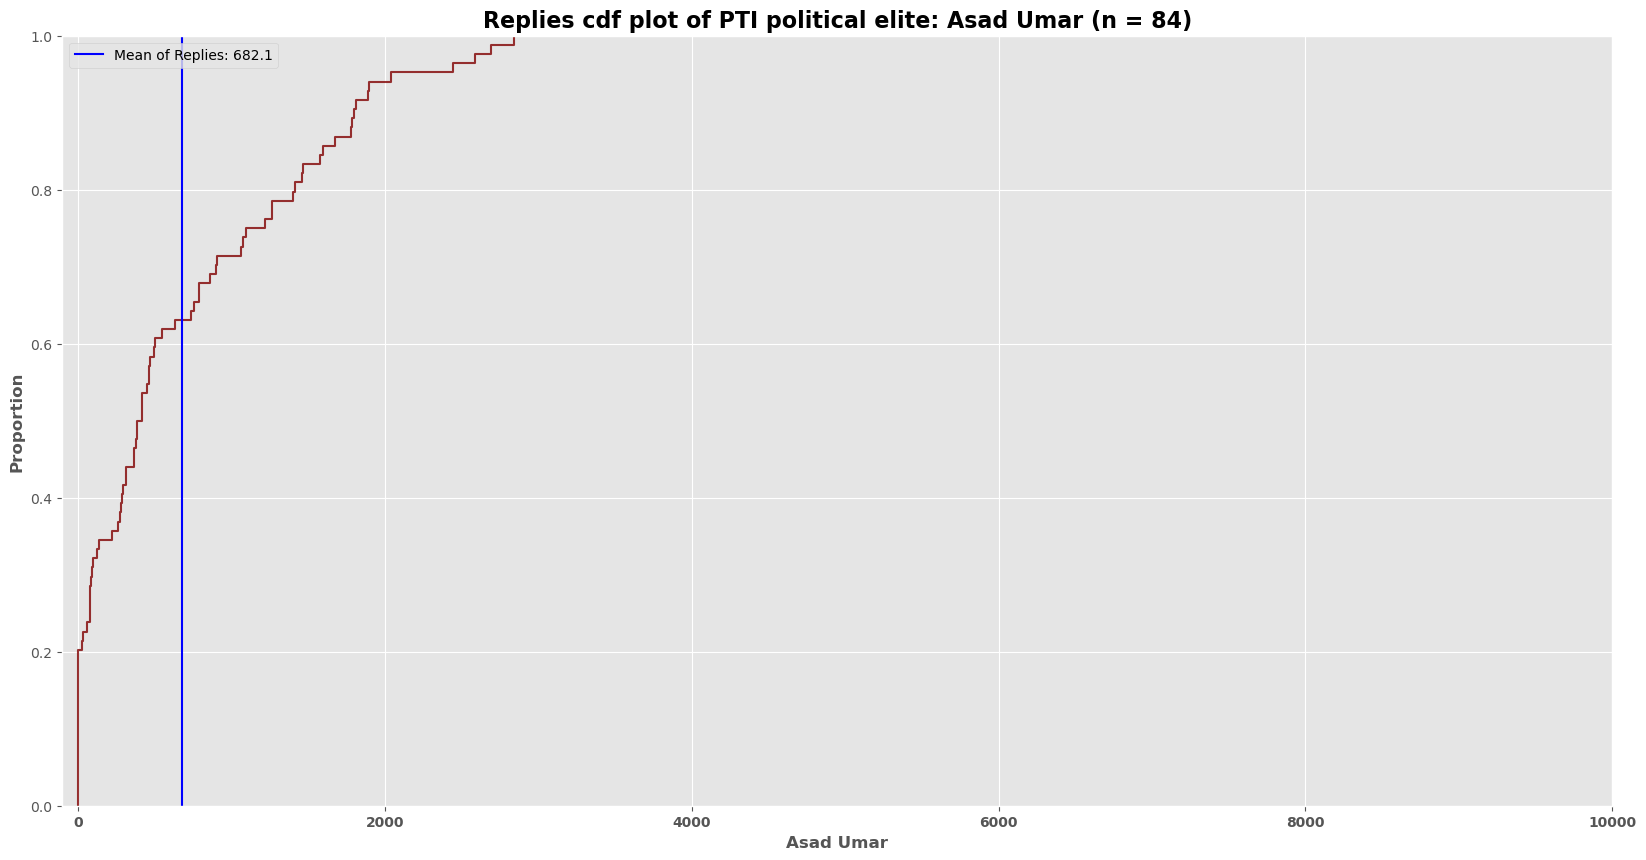

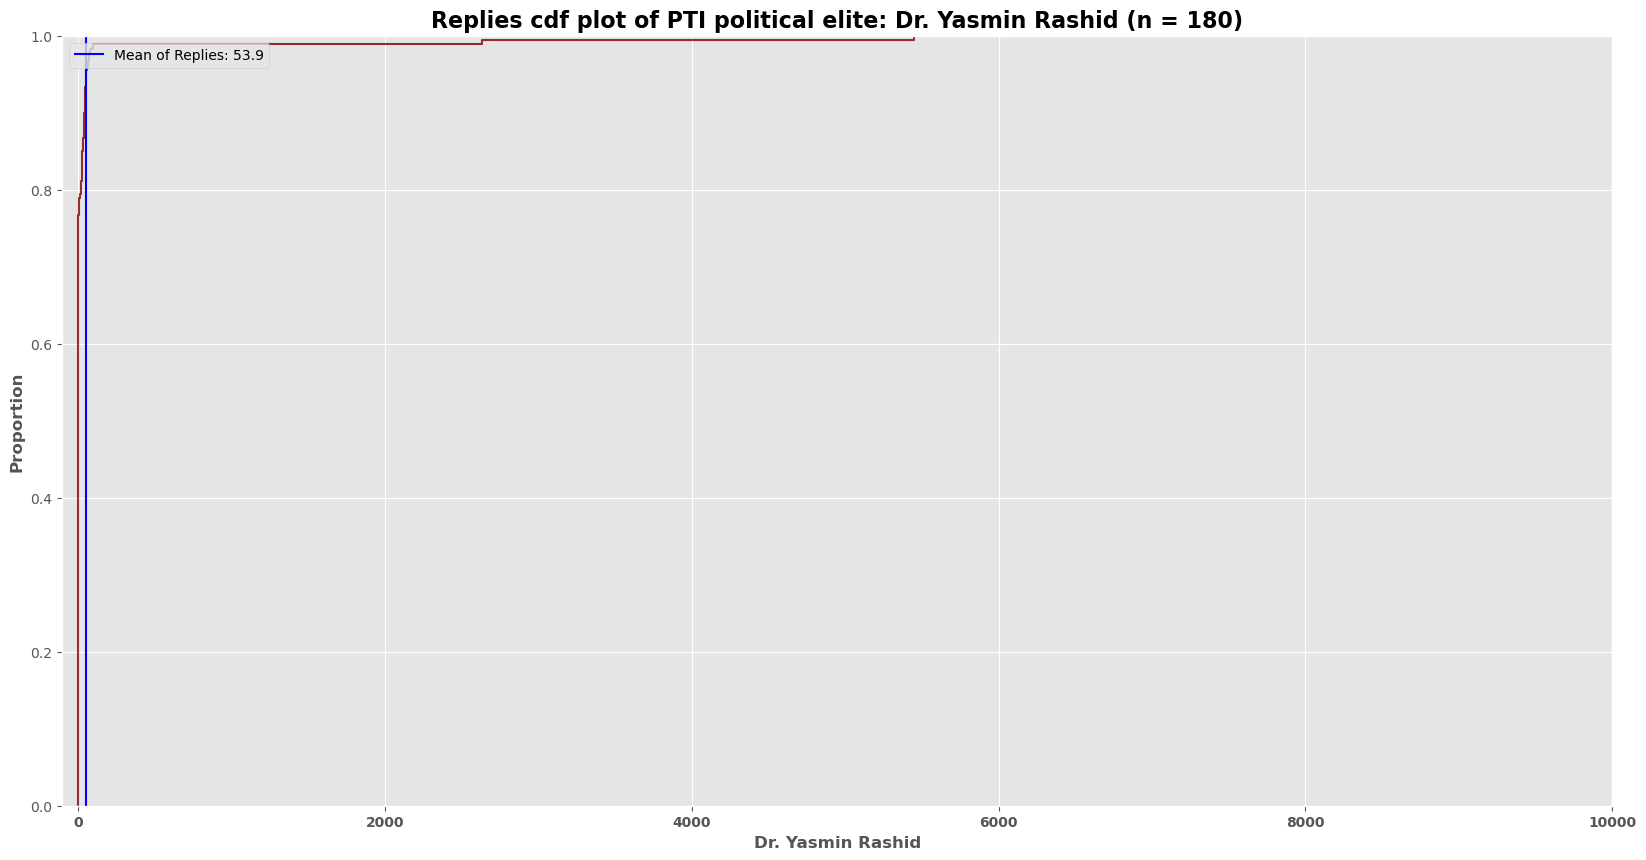

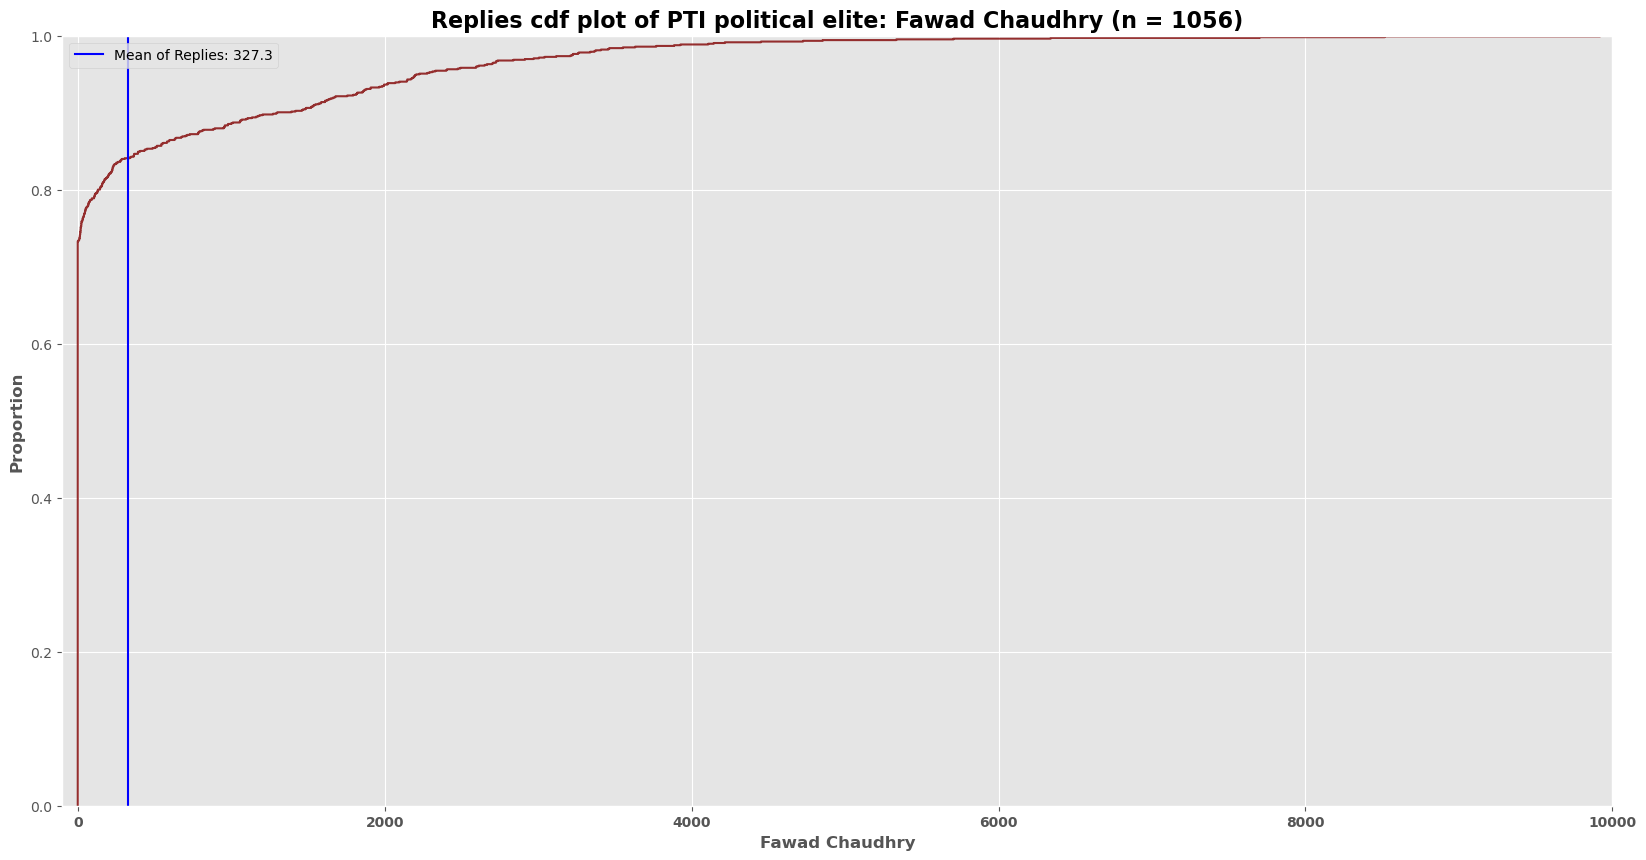

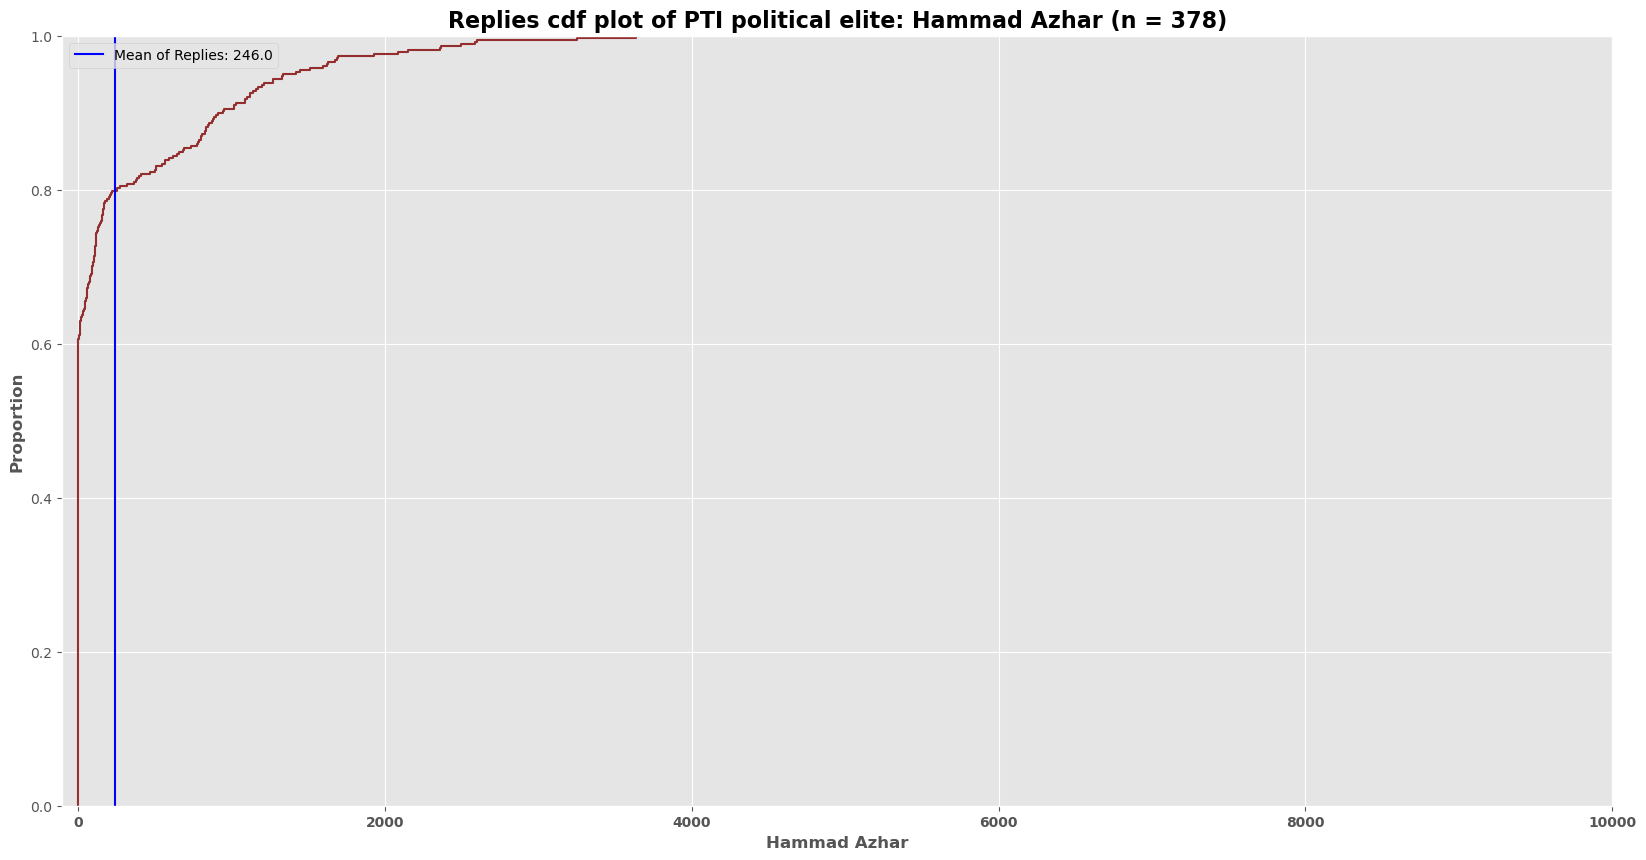

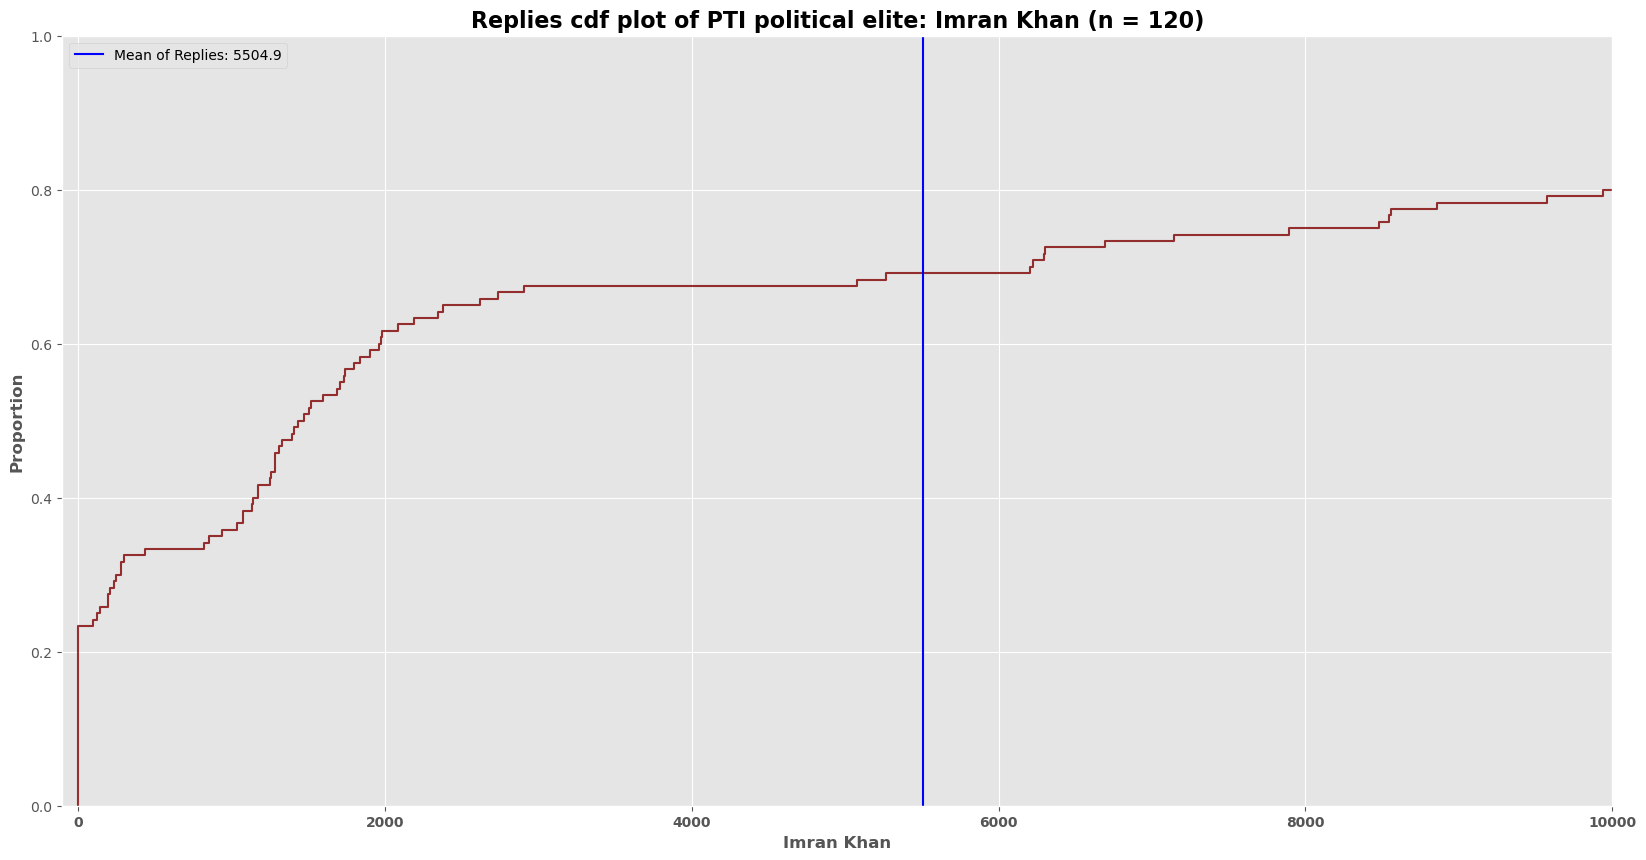

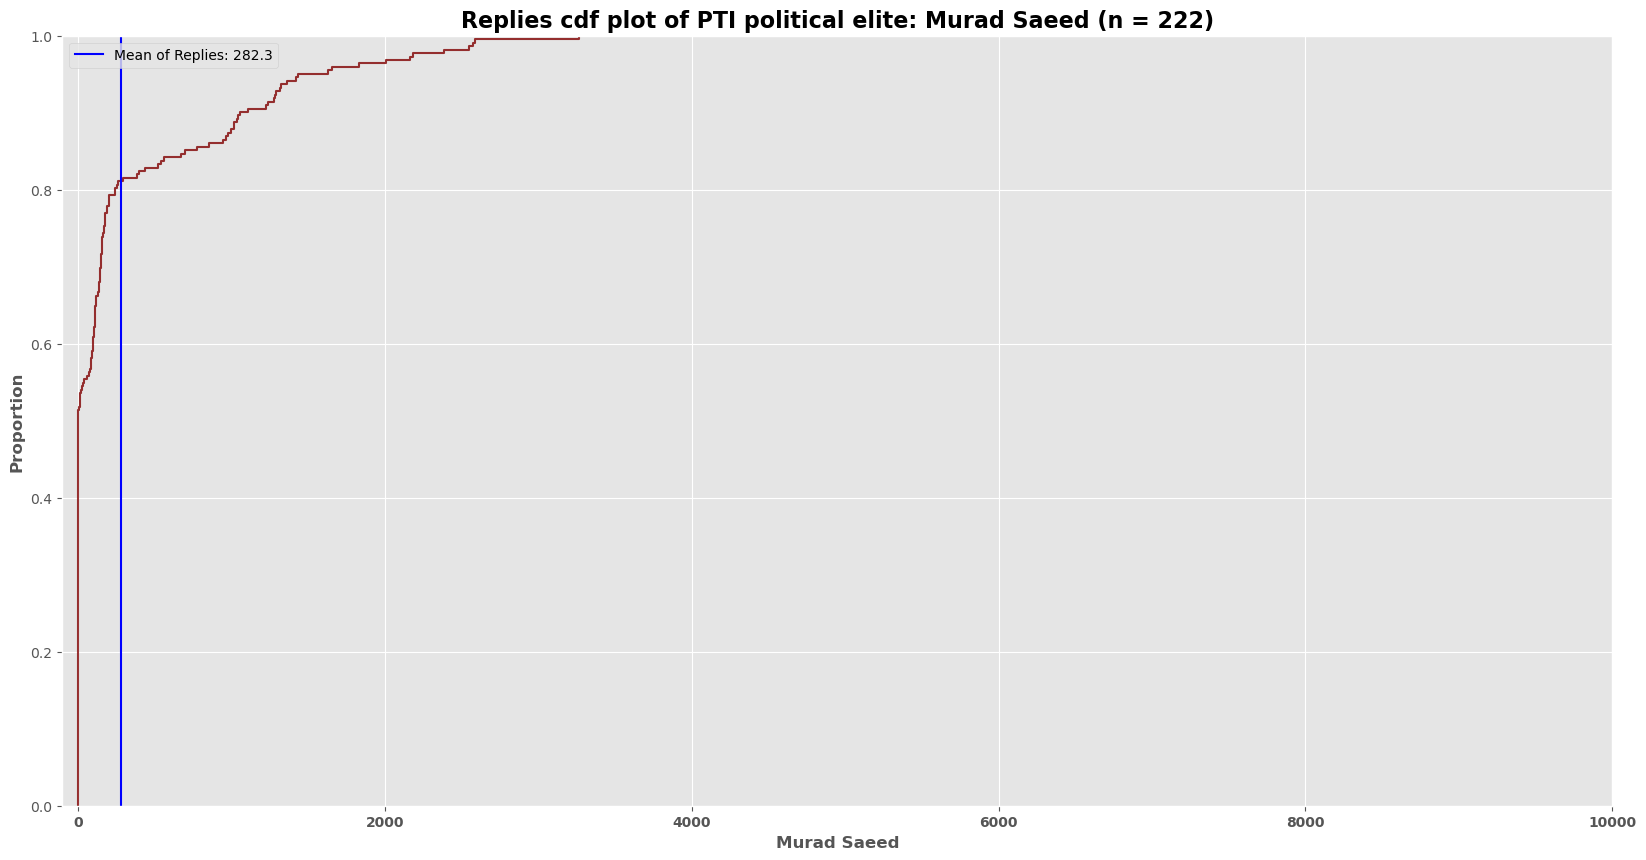

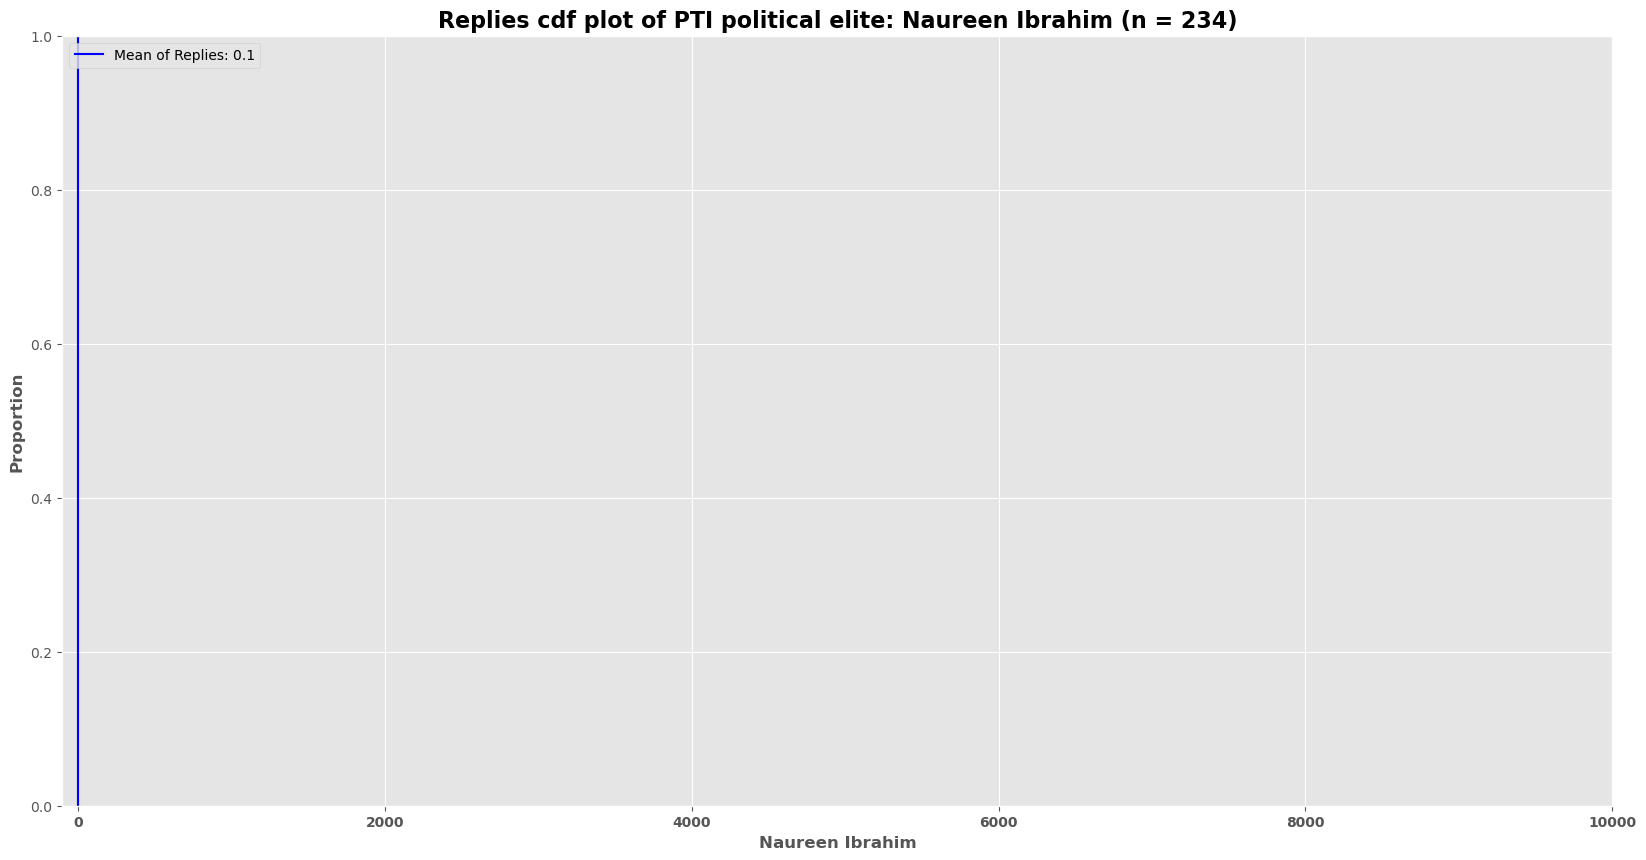

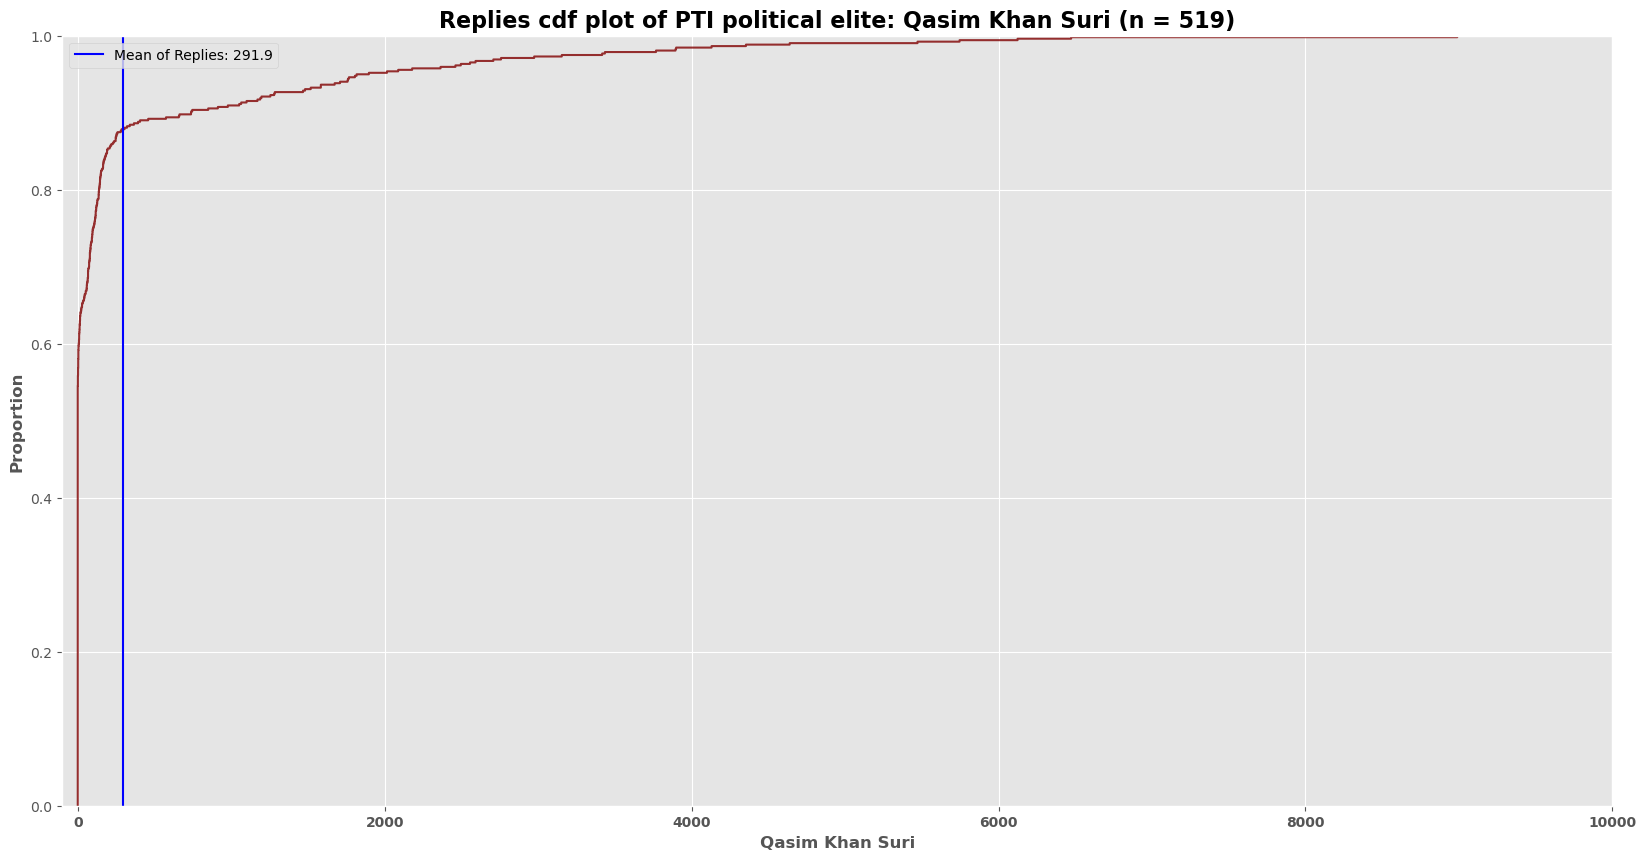

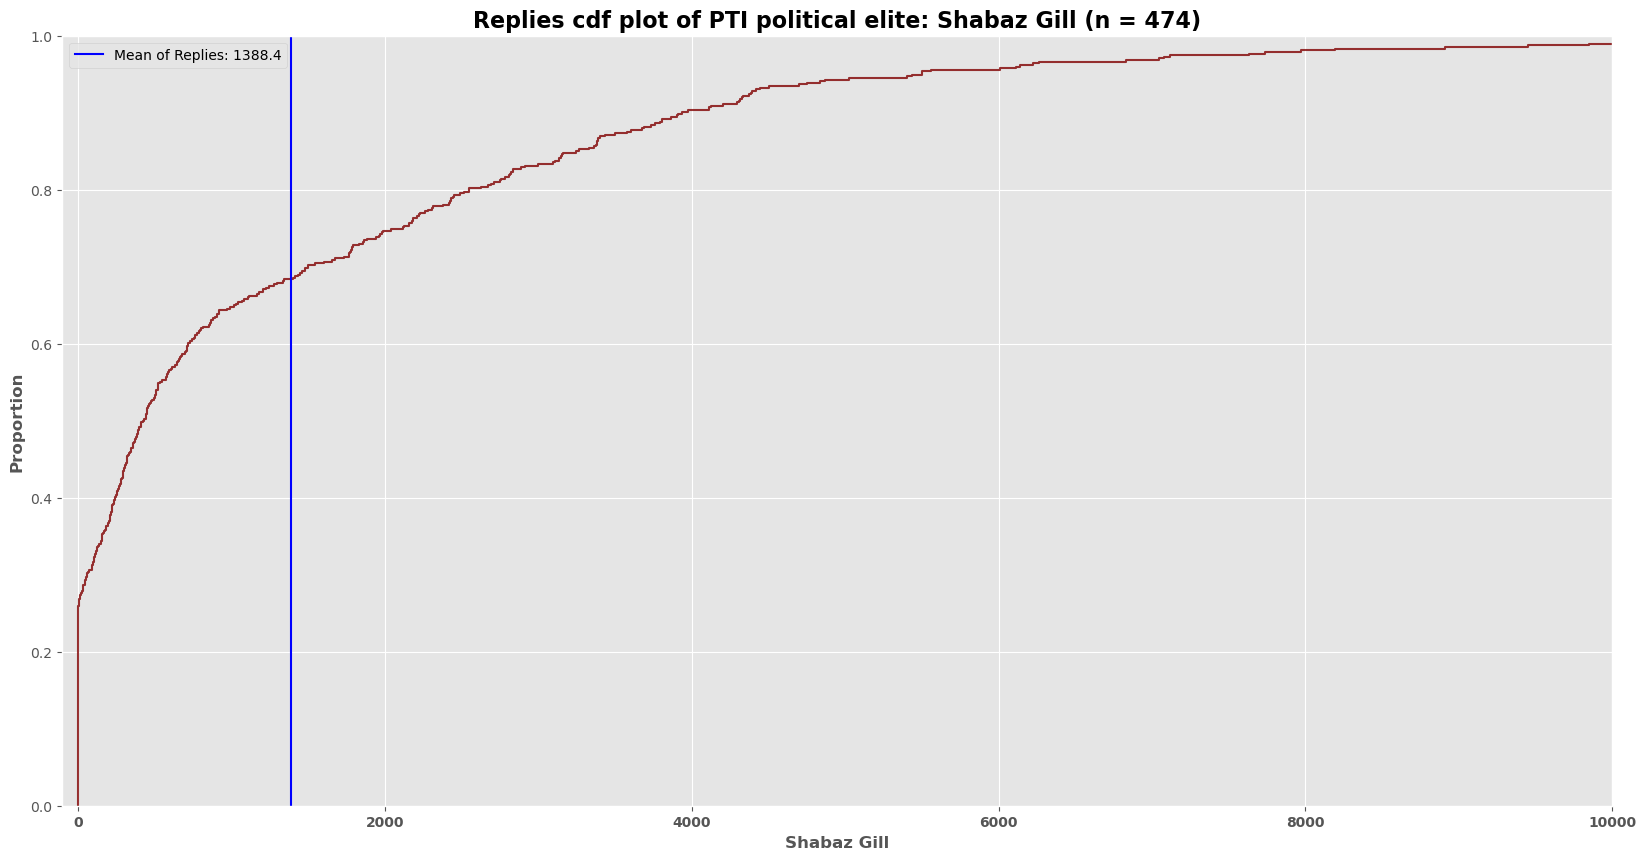

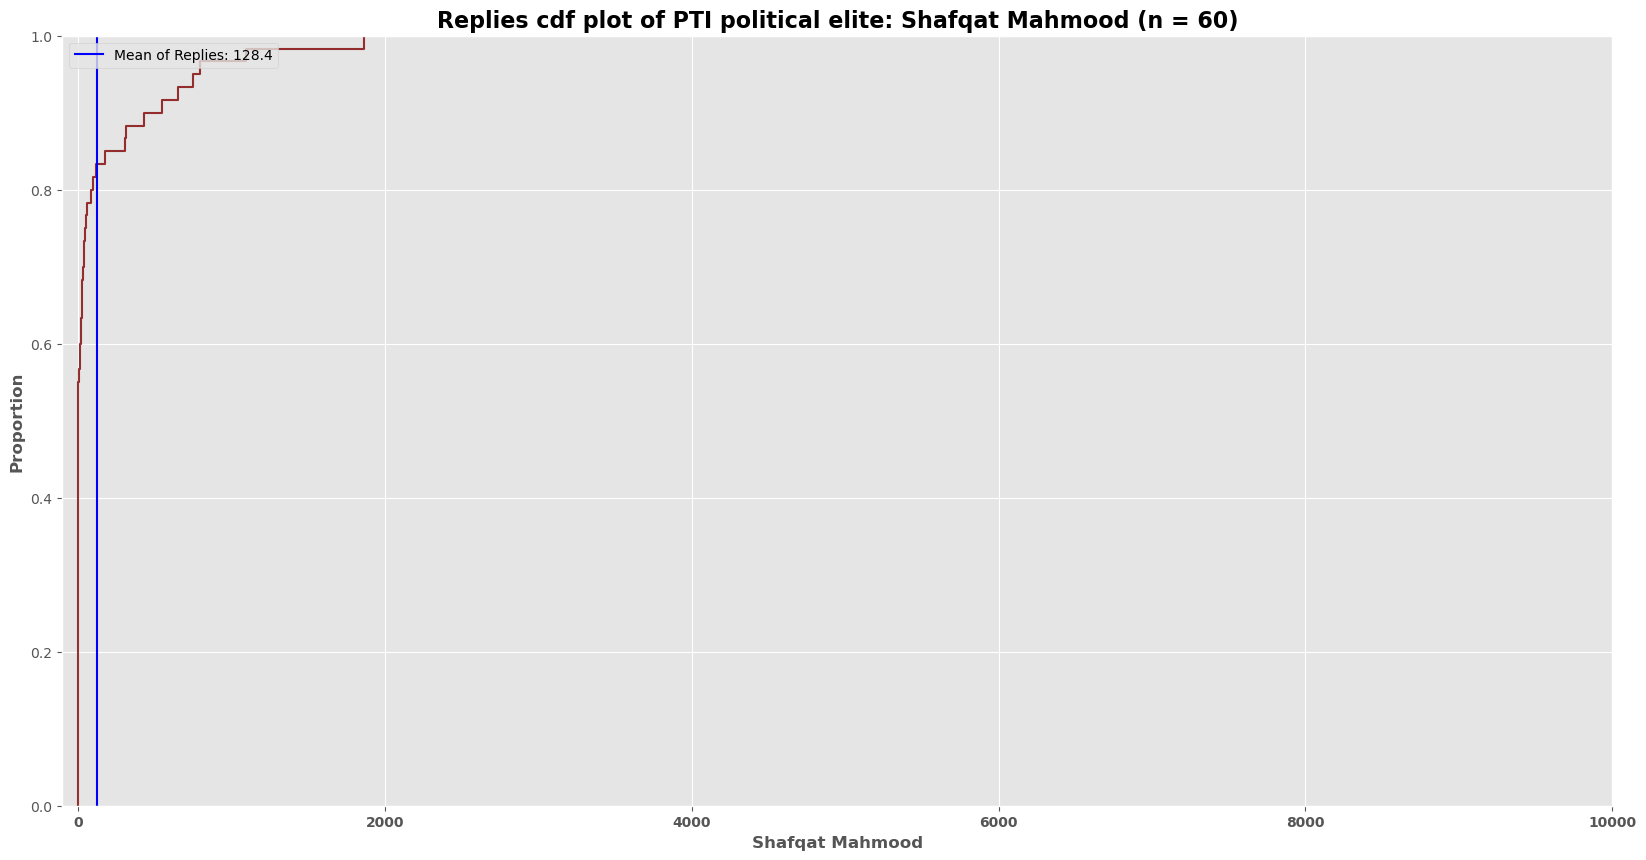

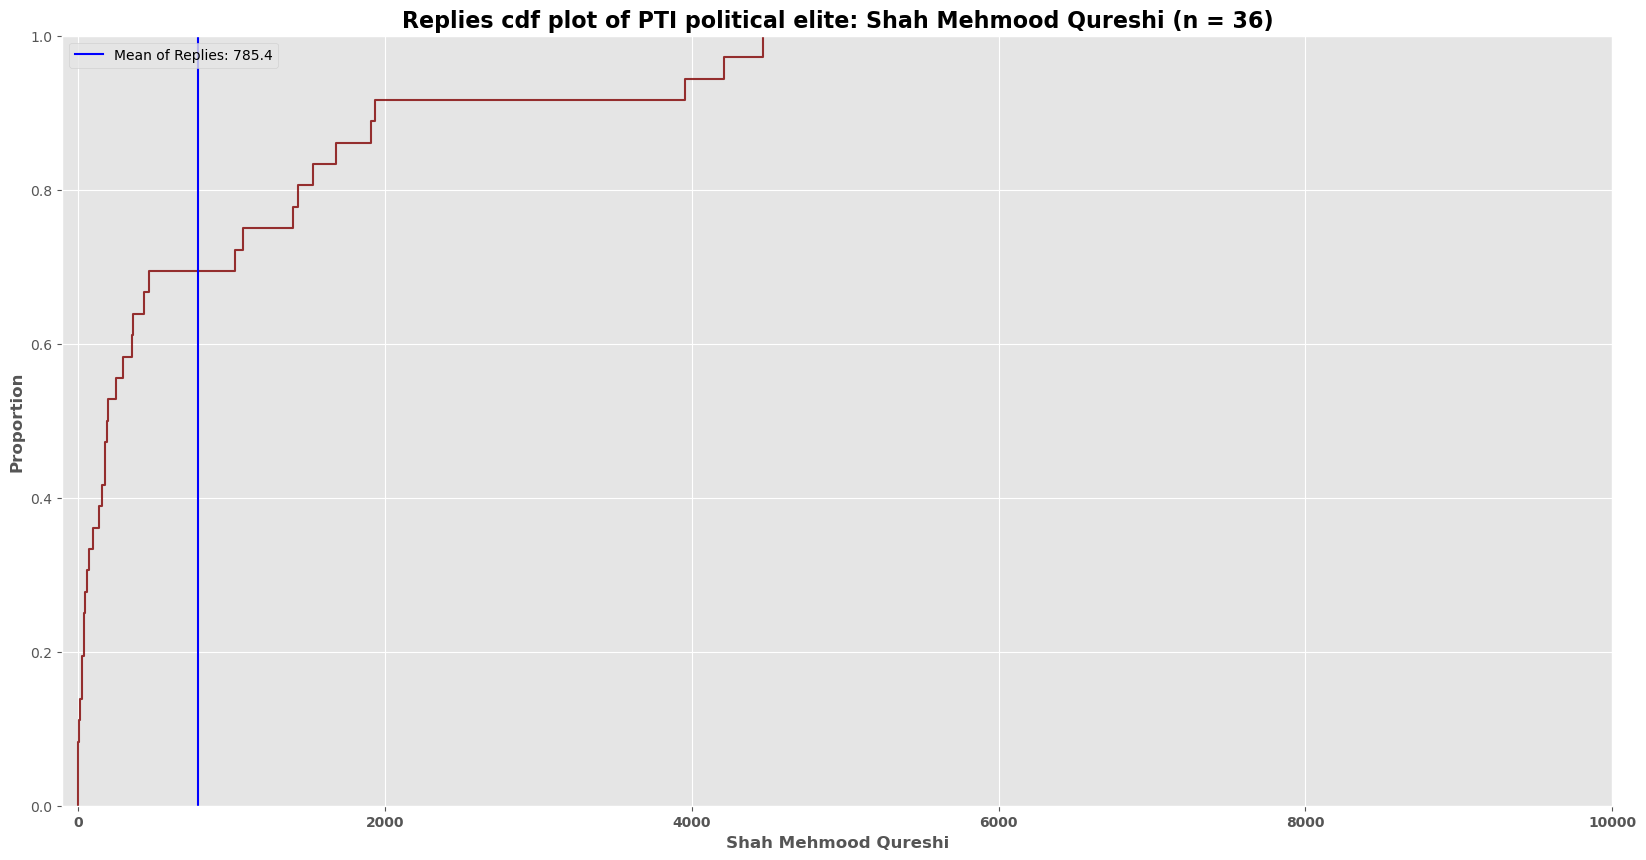

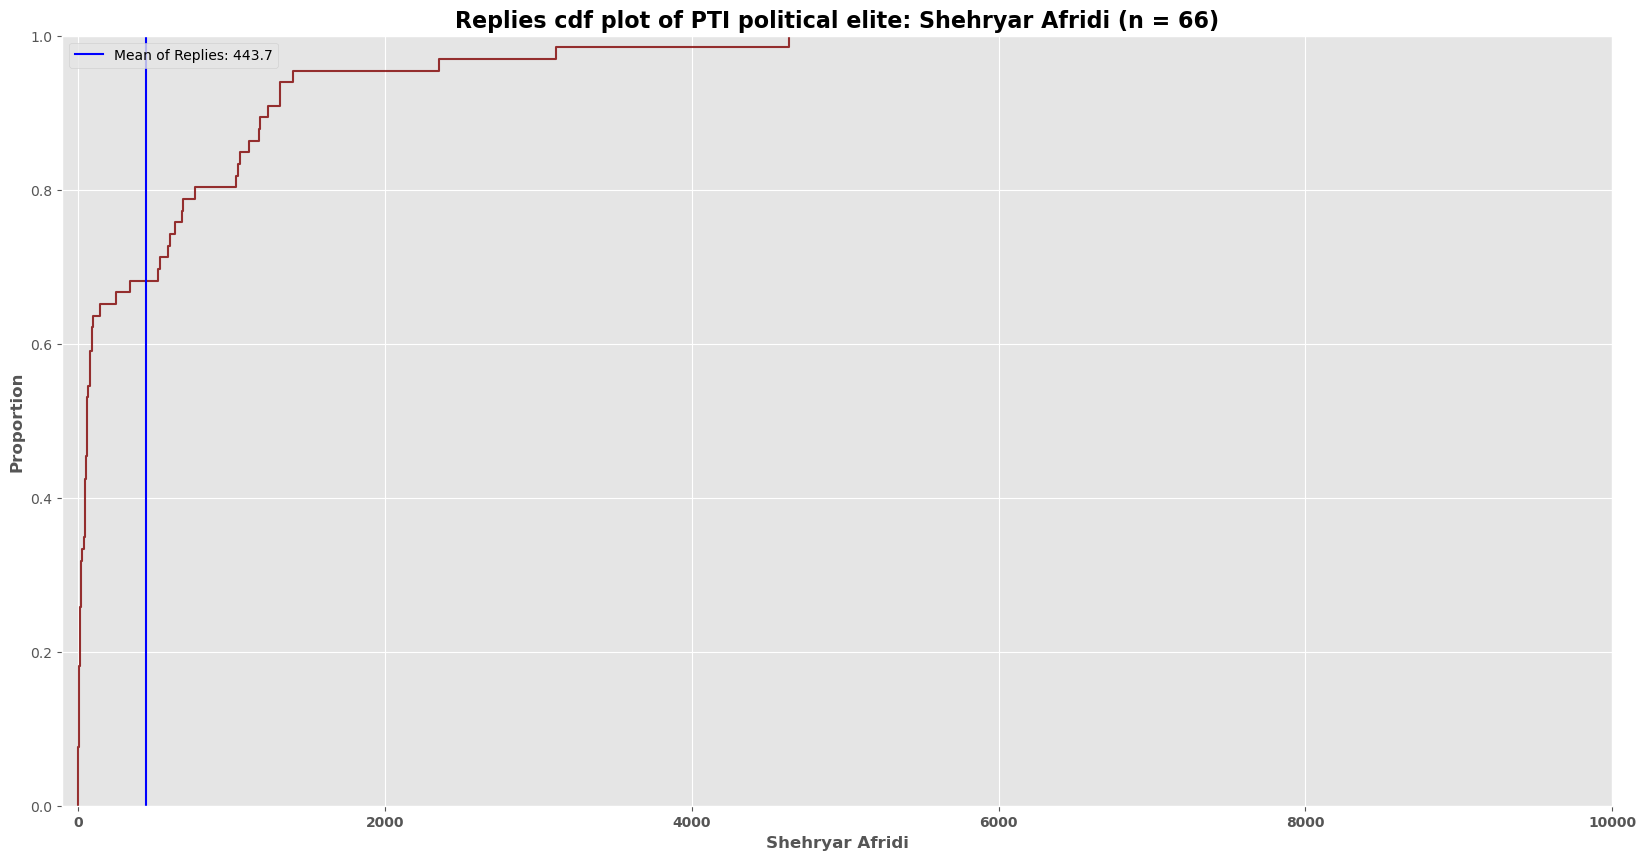

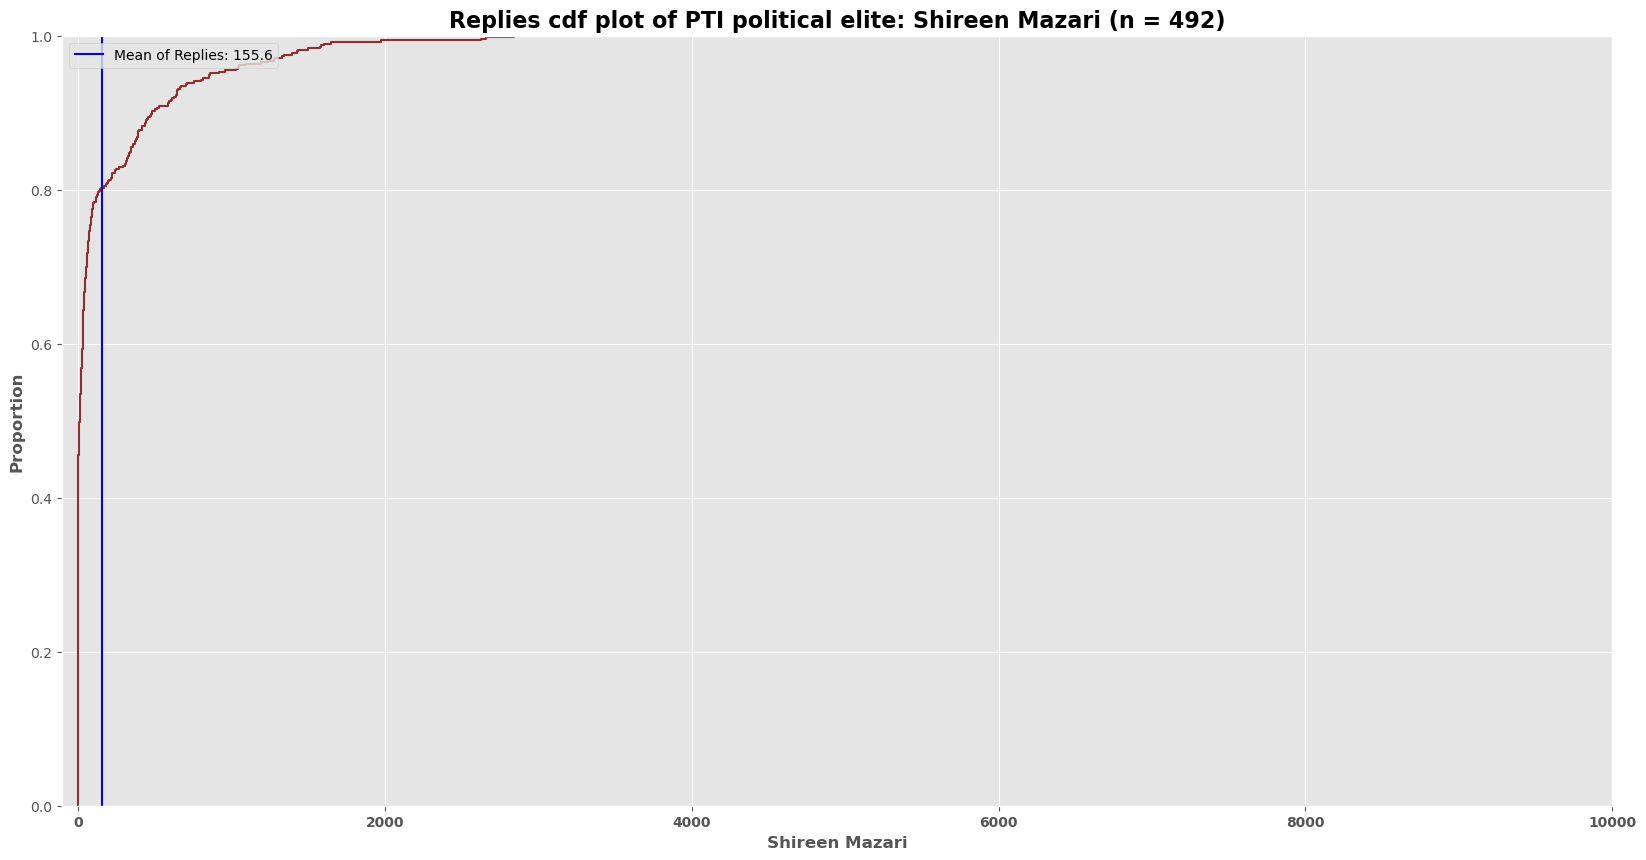

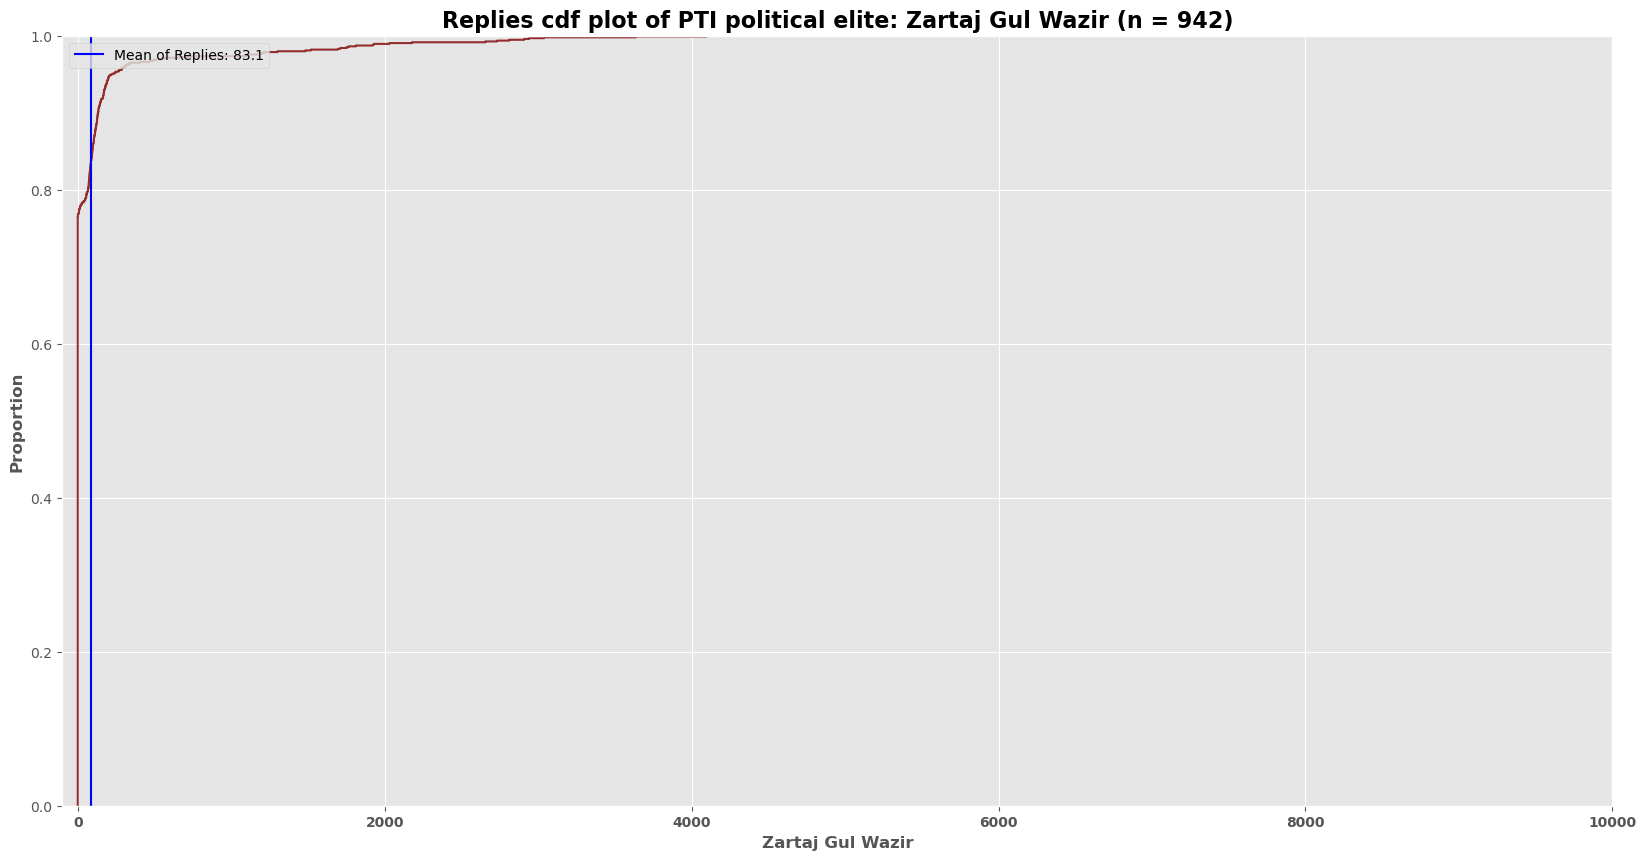

In [1913]:
j = 44
for i in range(len(PTI_temp_3)):
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.ecdfplot(data=PTI_temp_3['replies'][i], color='maroon', alpha=0.8, ax=ax)
    ax.axvline(x = mean(PTI_temp_3['replies'][i]), color = 'b', label = 'Mean of Replies: '+str(round(mean(PTI_temp_3['replies'][i]),1)))
    ax.set_title('Replies cdf plot of PTI political elite: ' + PTI_temp_3.index[i]+ ' (n = '+str(len(PTI_temp_3['replies'][i]))+')'  , fontsize=16, fontweight='bold')
    ax.set_xlabel(PTI_temp_3.index[i], fontsize=12, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=12, fontweight='bold')
    labels = ax.get_xticklabels() 
    [label.set_fontweight('bold') for label in labels]
    ax.set_xlim(-100, 10000)
    ax.legend(loc='upper left')
    plt.savefig(str(j)+'.png', bbox_inches='tight')
    j +=1
plt.show()

In [1914]:
PMLN_temp_3 = PMLN.groupby(by=PMLN['politician']).agg(list)
PMLN_temp_3['likes']

politician
Ahsan Iqbal              [0, 26846, 16749, 0, 14644, 9625, 14810, 8433,...
Aisha Ghaus Pasha                                                [0, 0, 0]
Ayaz Sadiq                                          [0, 5887, 0, 0, 0, 68]
Ayesha Rajab Ali         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Hamza Shehbaz Sharif     [15210, 11810, 9428, 11347, 10611, 11022, 1222...
Hina Parvez Butt         [0, 0, 0, 0, 19889, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Khawaja Muhammad Asif    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Khawaja Saad Rafique     [0, 15973, 0, 17334, 17196, 10222, 0, 10564, 0...
Marriyum Aurangzeb       [0, 0, 23414, 0, 14233, 0, 0, 0, 13386, 9298, ...
Maryam Nawaz Sharif      [0, 0, 0, 0, 29184, 0, 56447, 0, 21399, 0, 0, ...
Miftah Ismail            [0, 21315, 9996, 10117, 0, 0, 7439, 8810, 0, 7...
Nawaz Sharif                                         [33116, 22103, 24346]
Rana Sanaullah           [29325, 16633, 15192, 15686, 19350, 11392, 168...
Shahid Khaqan 

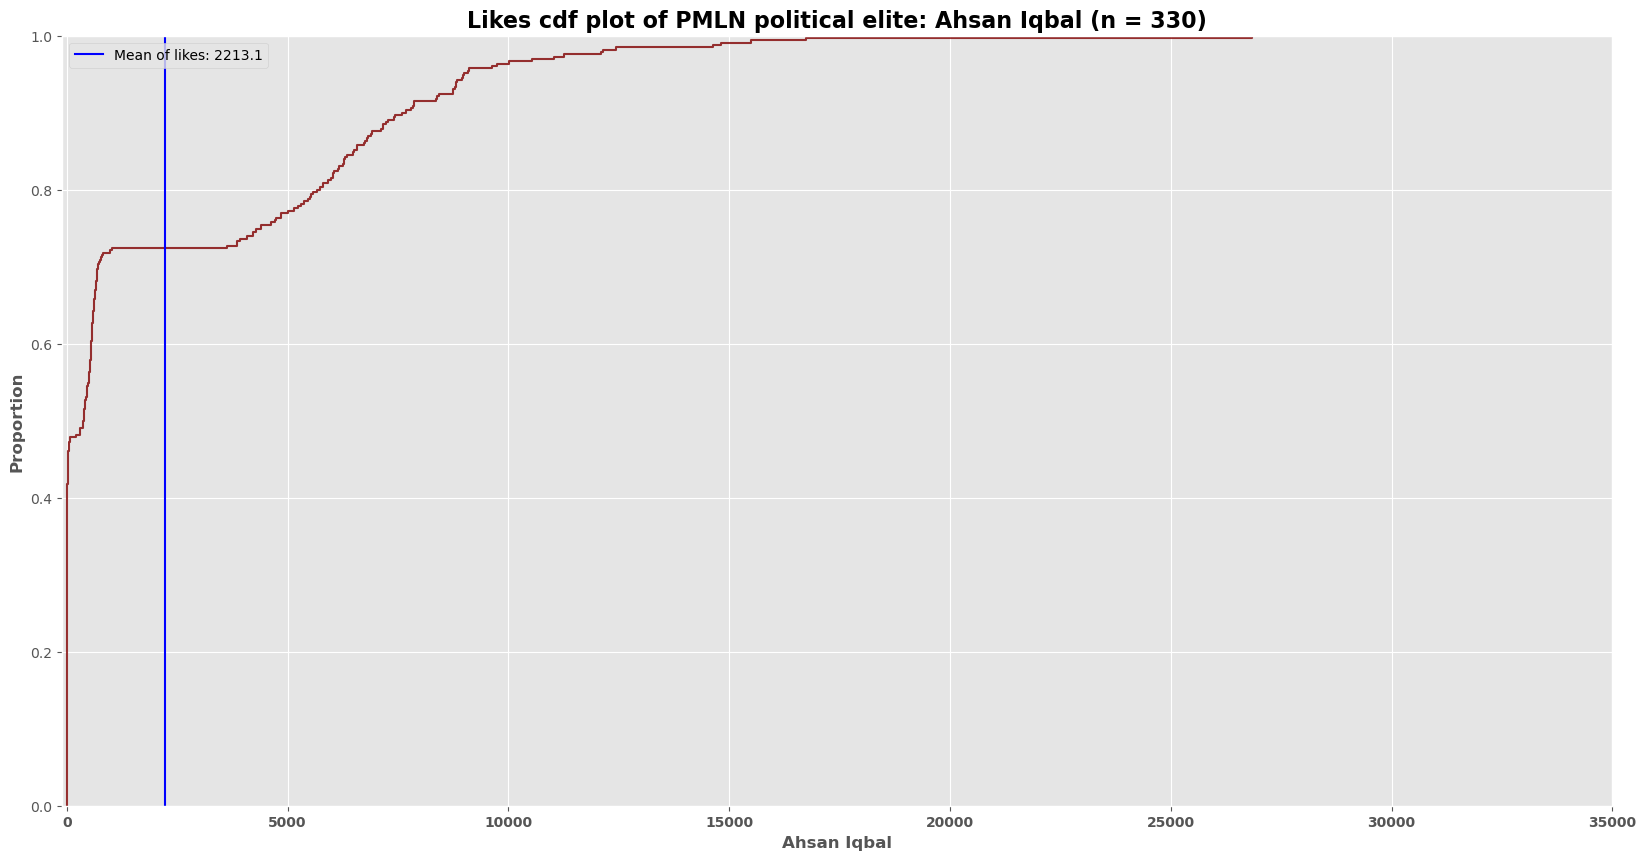

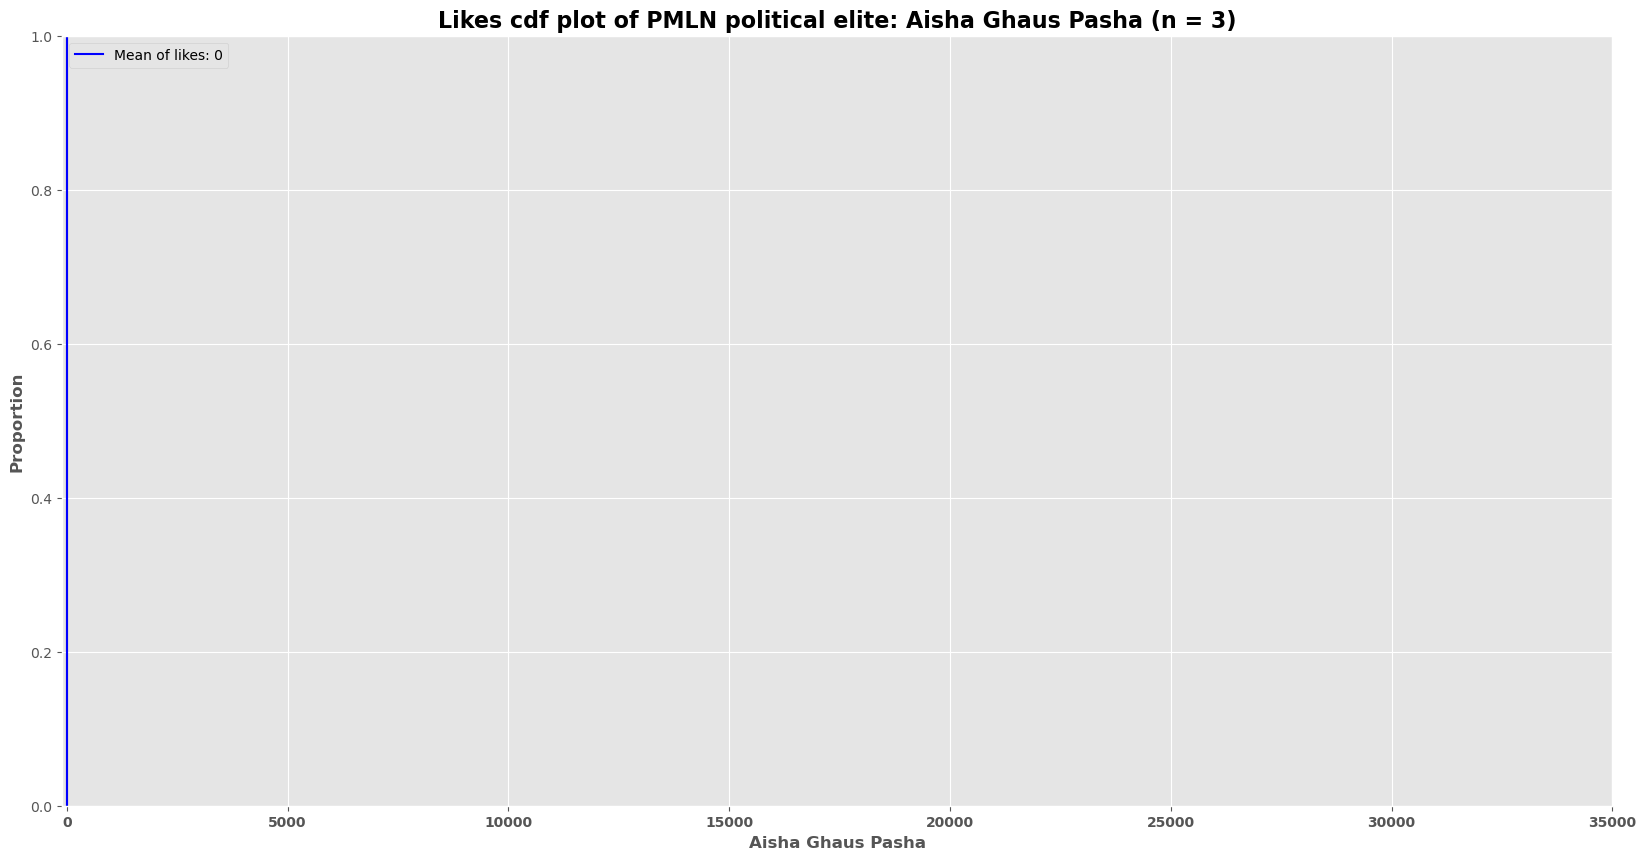

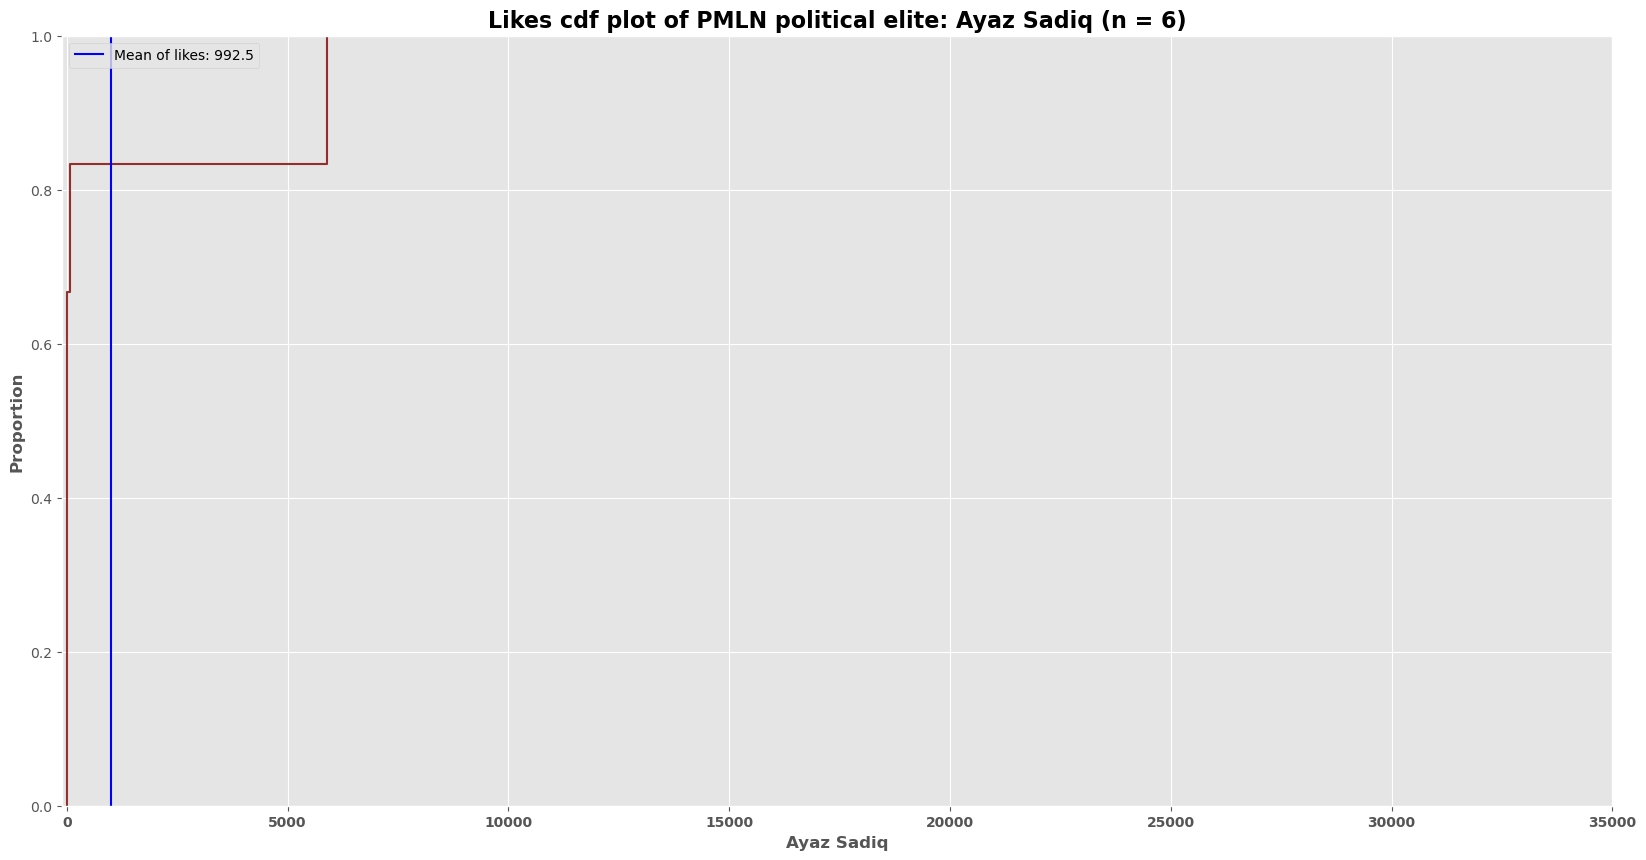

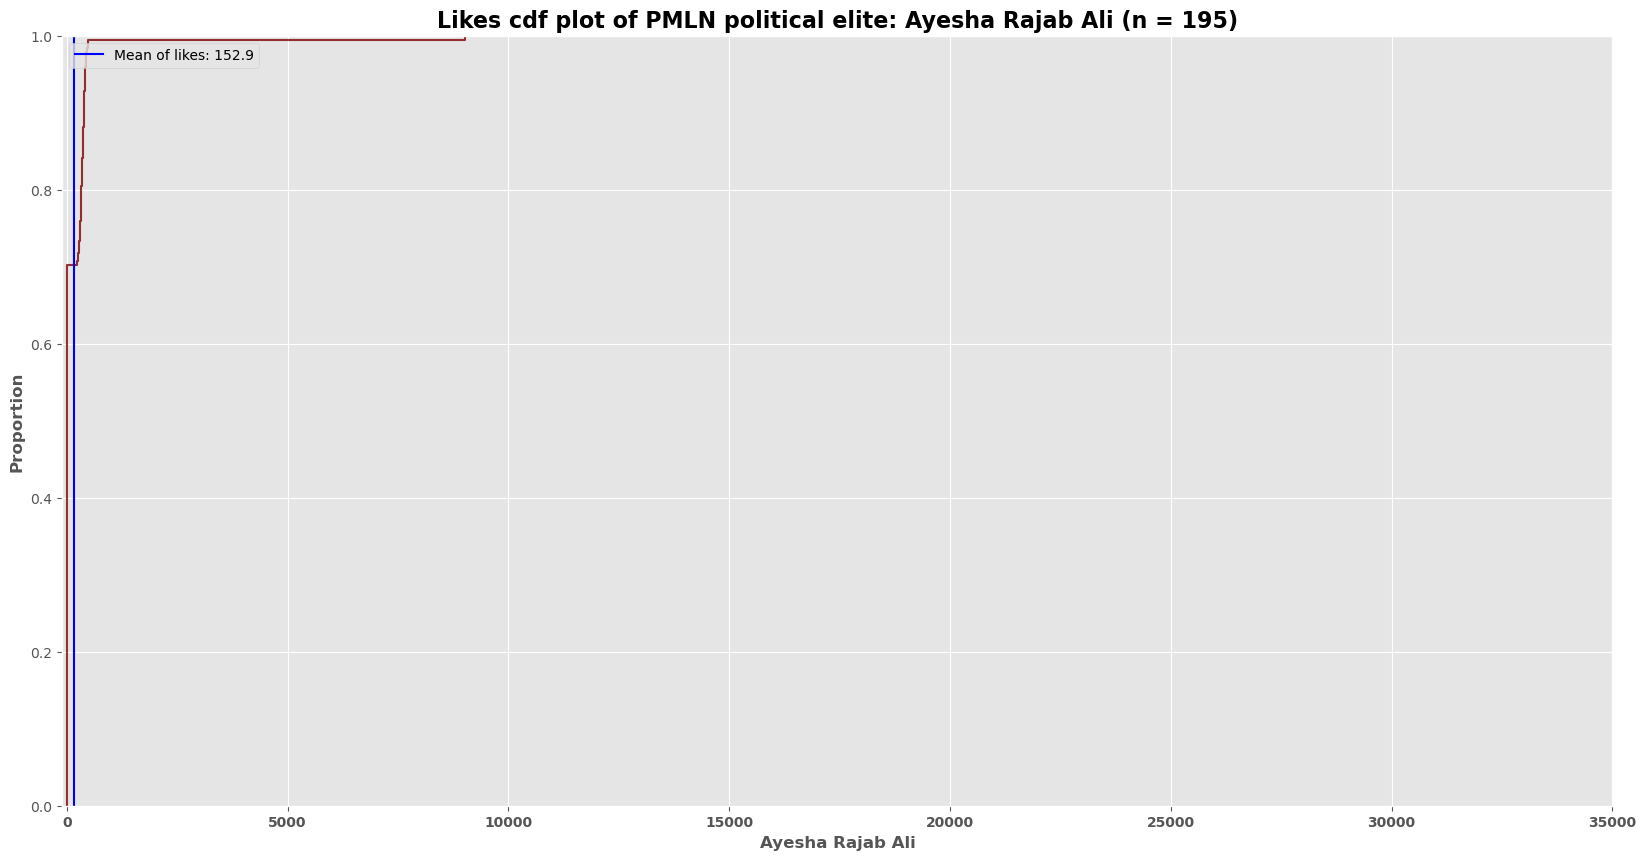

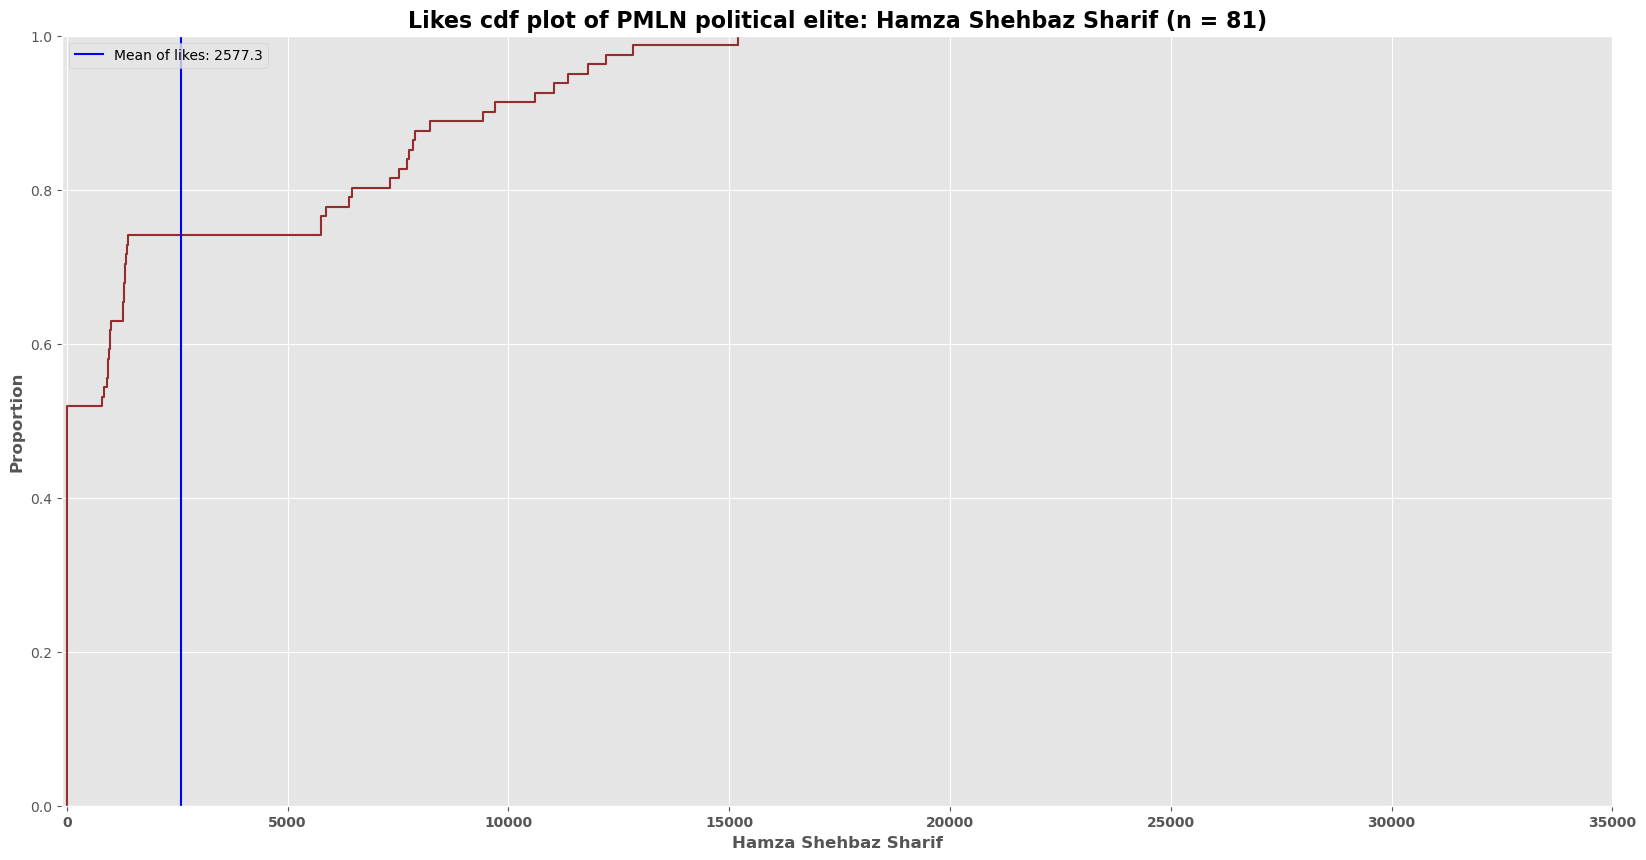

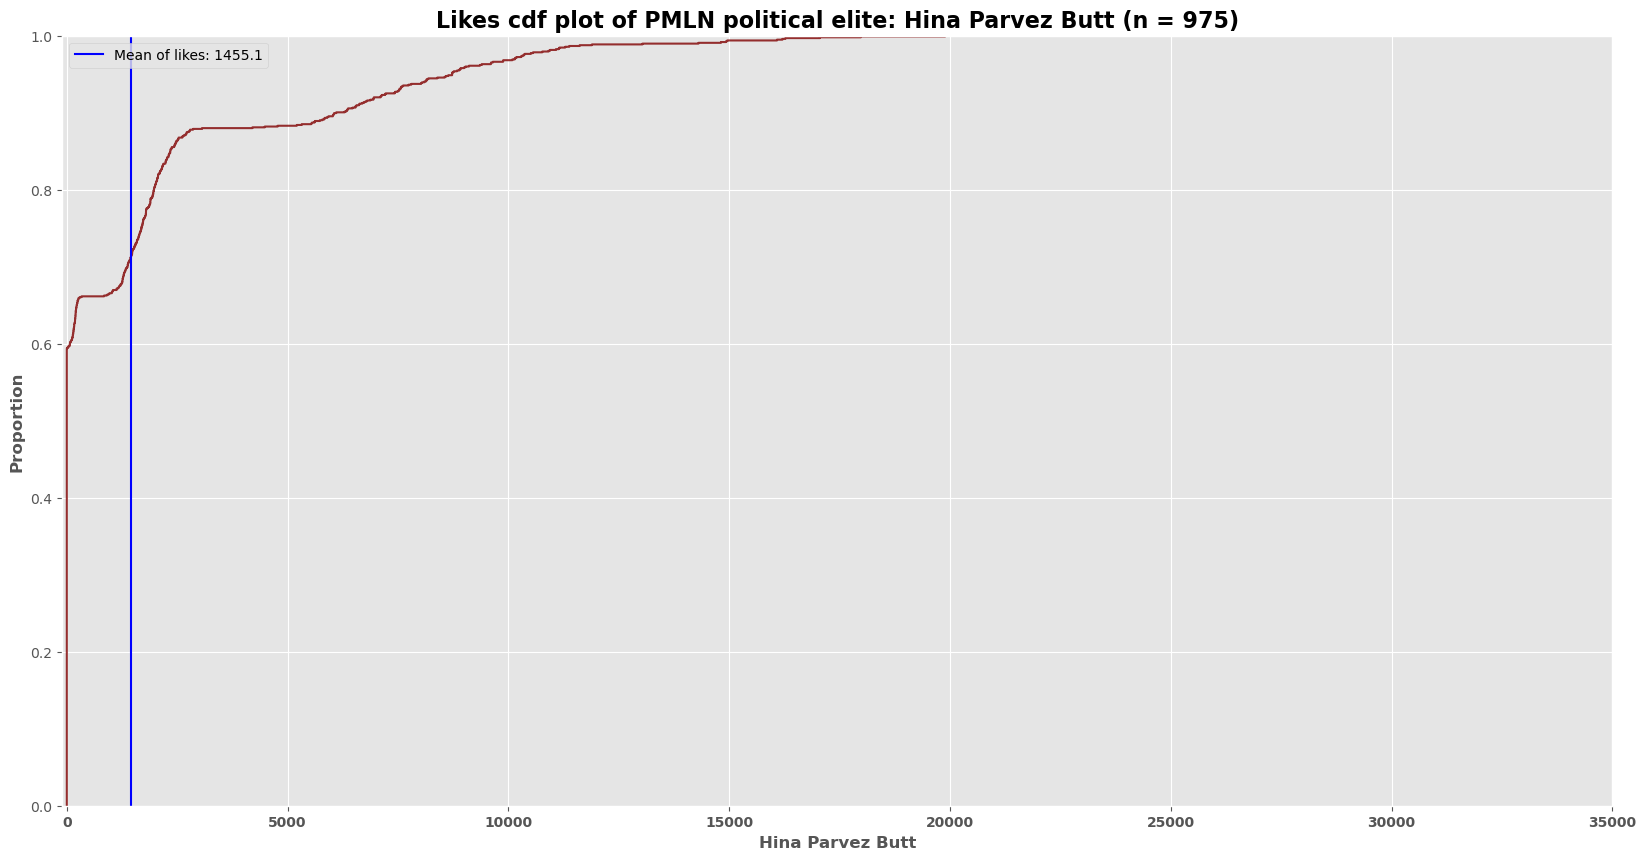

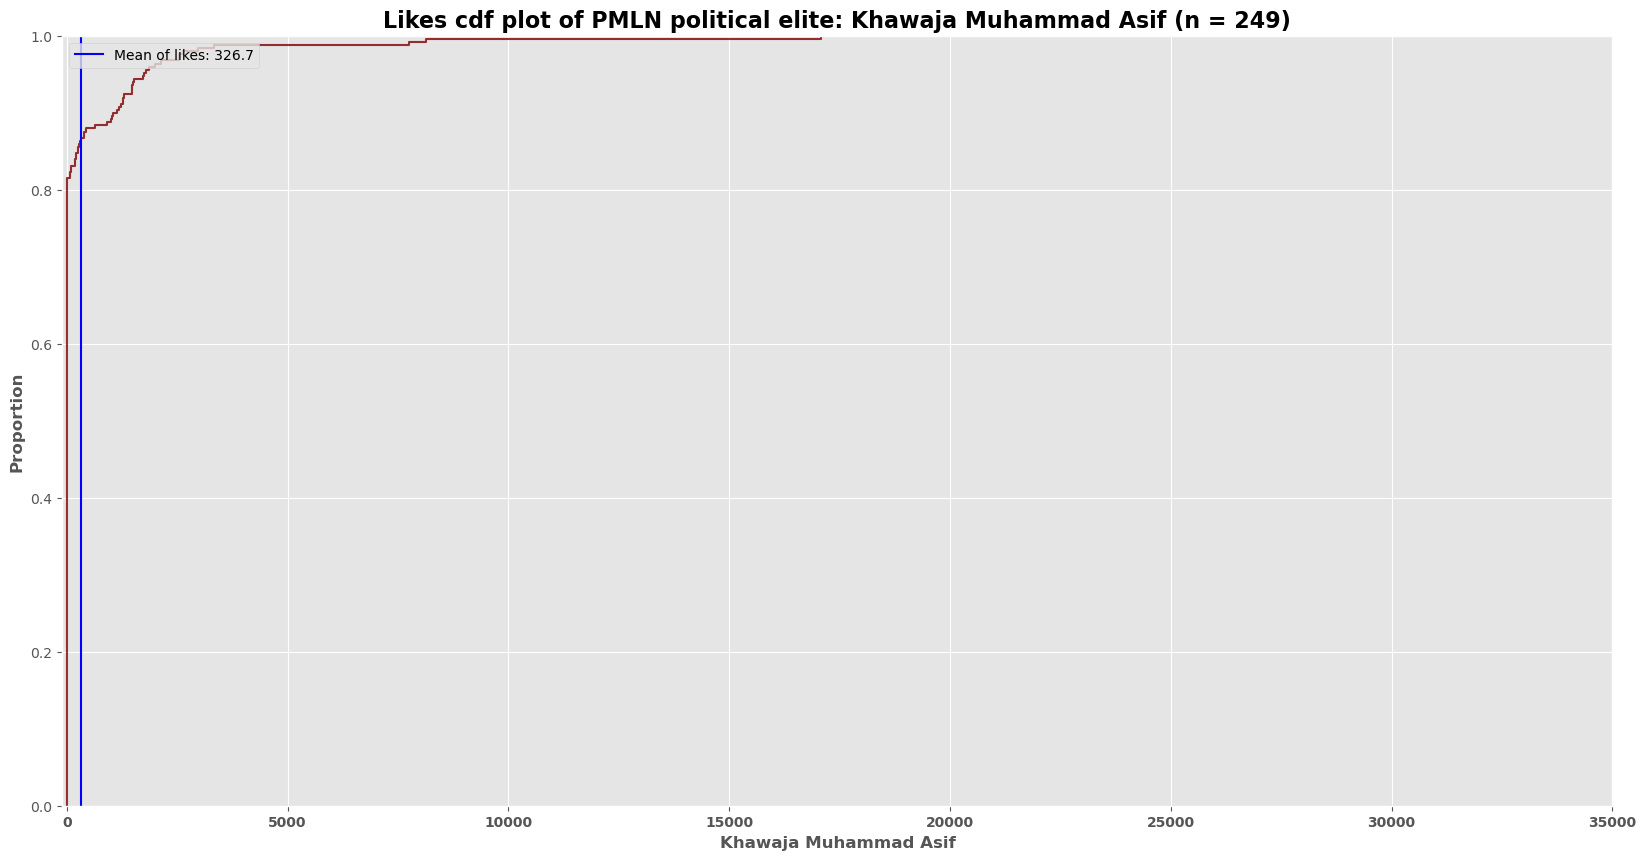

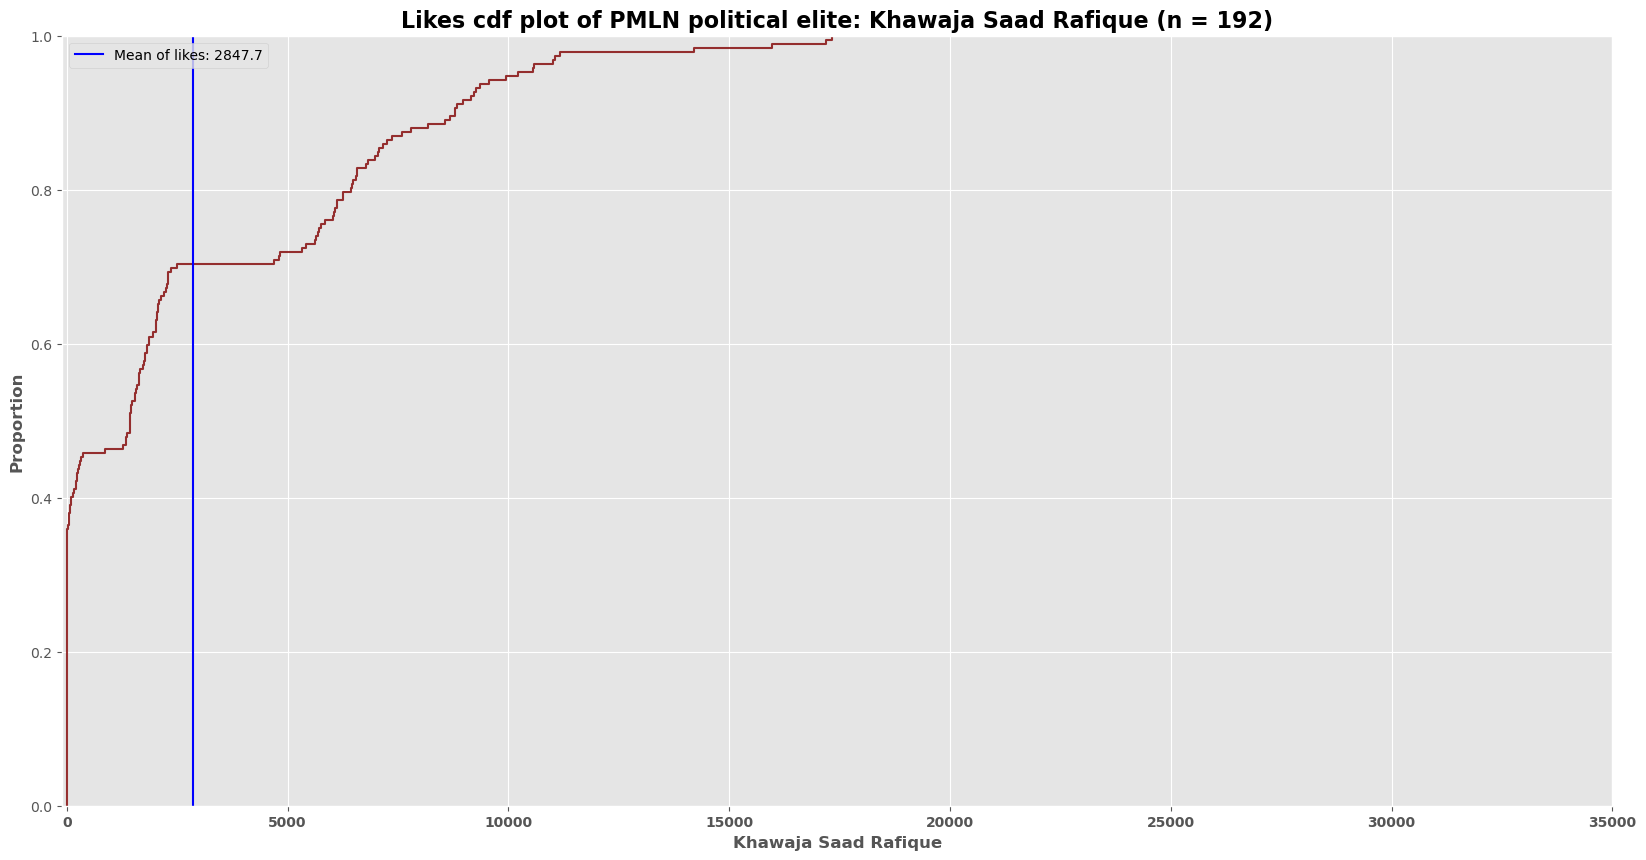

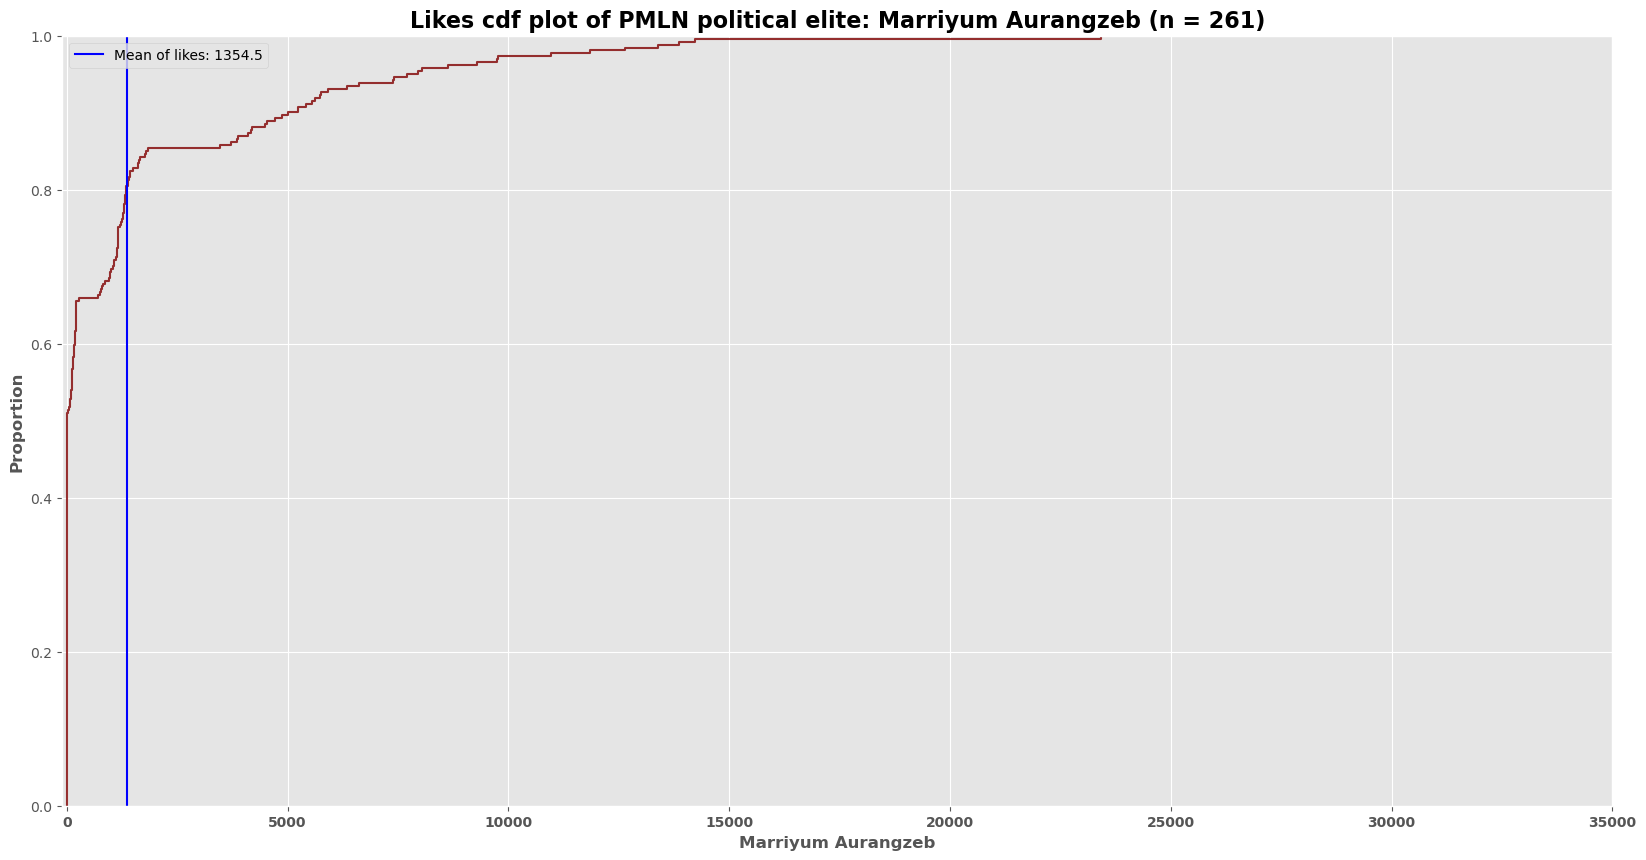

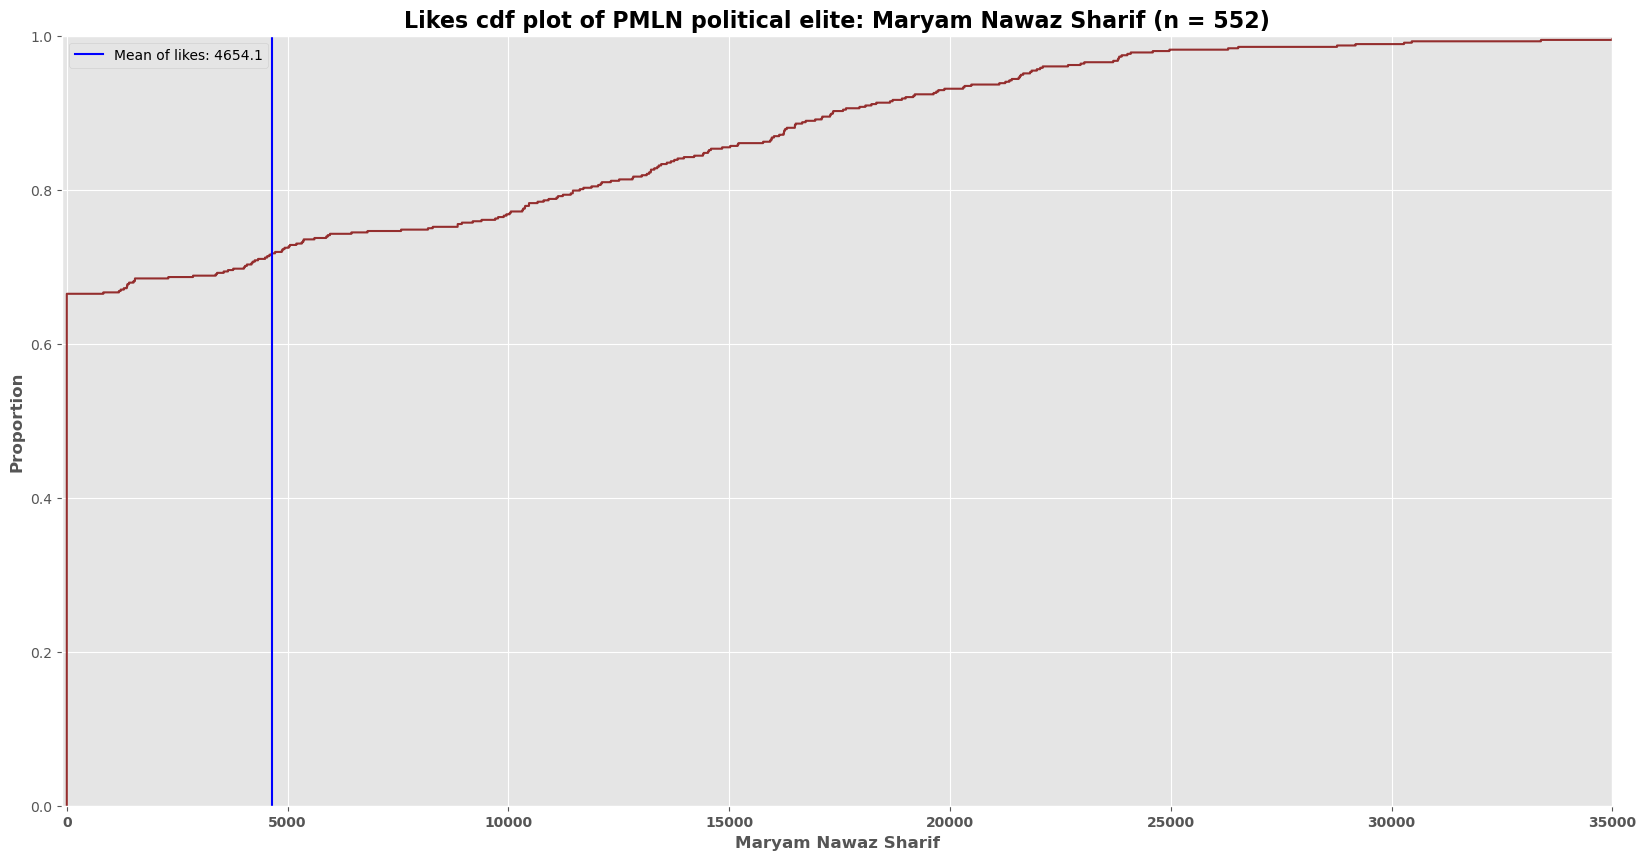

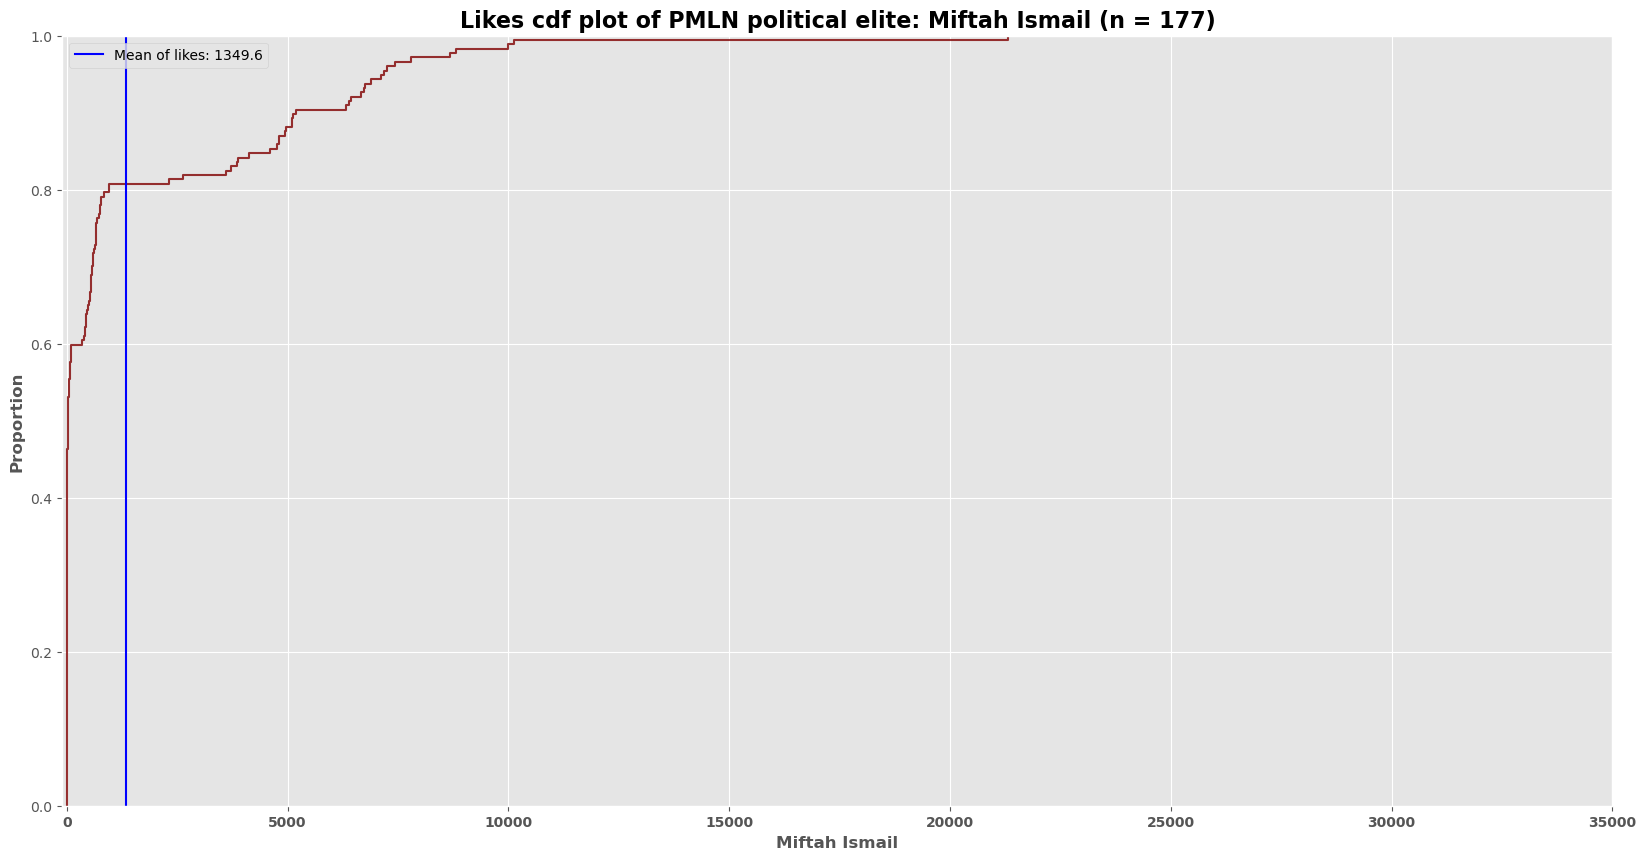

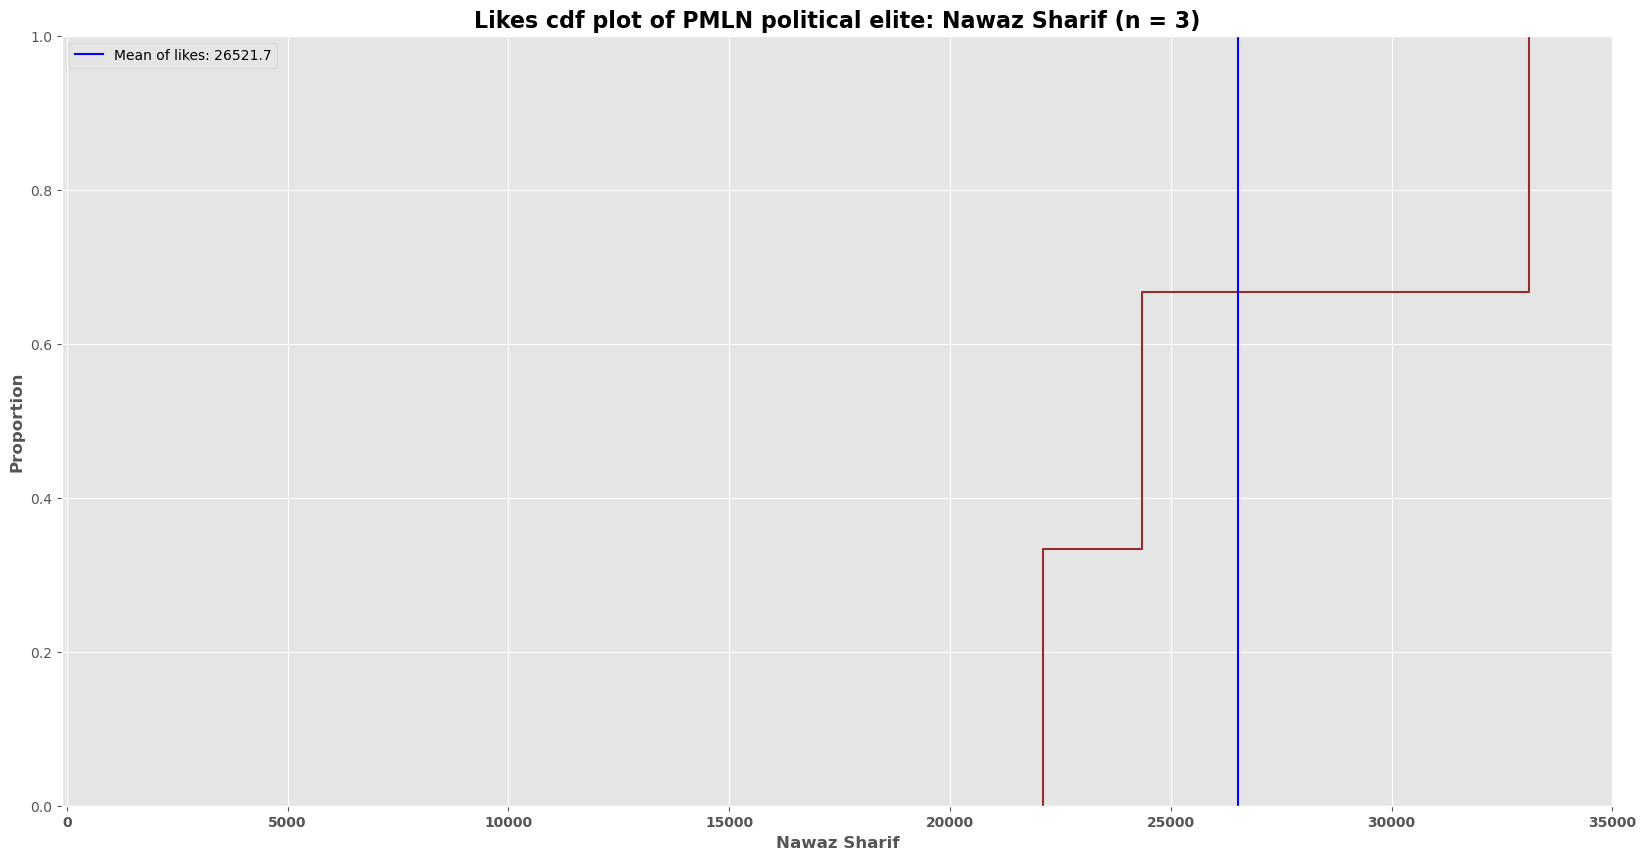

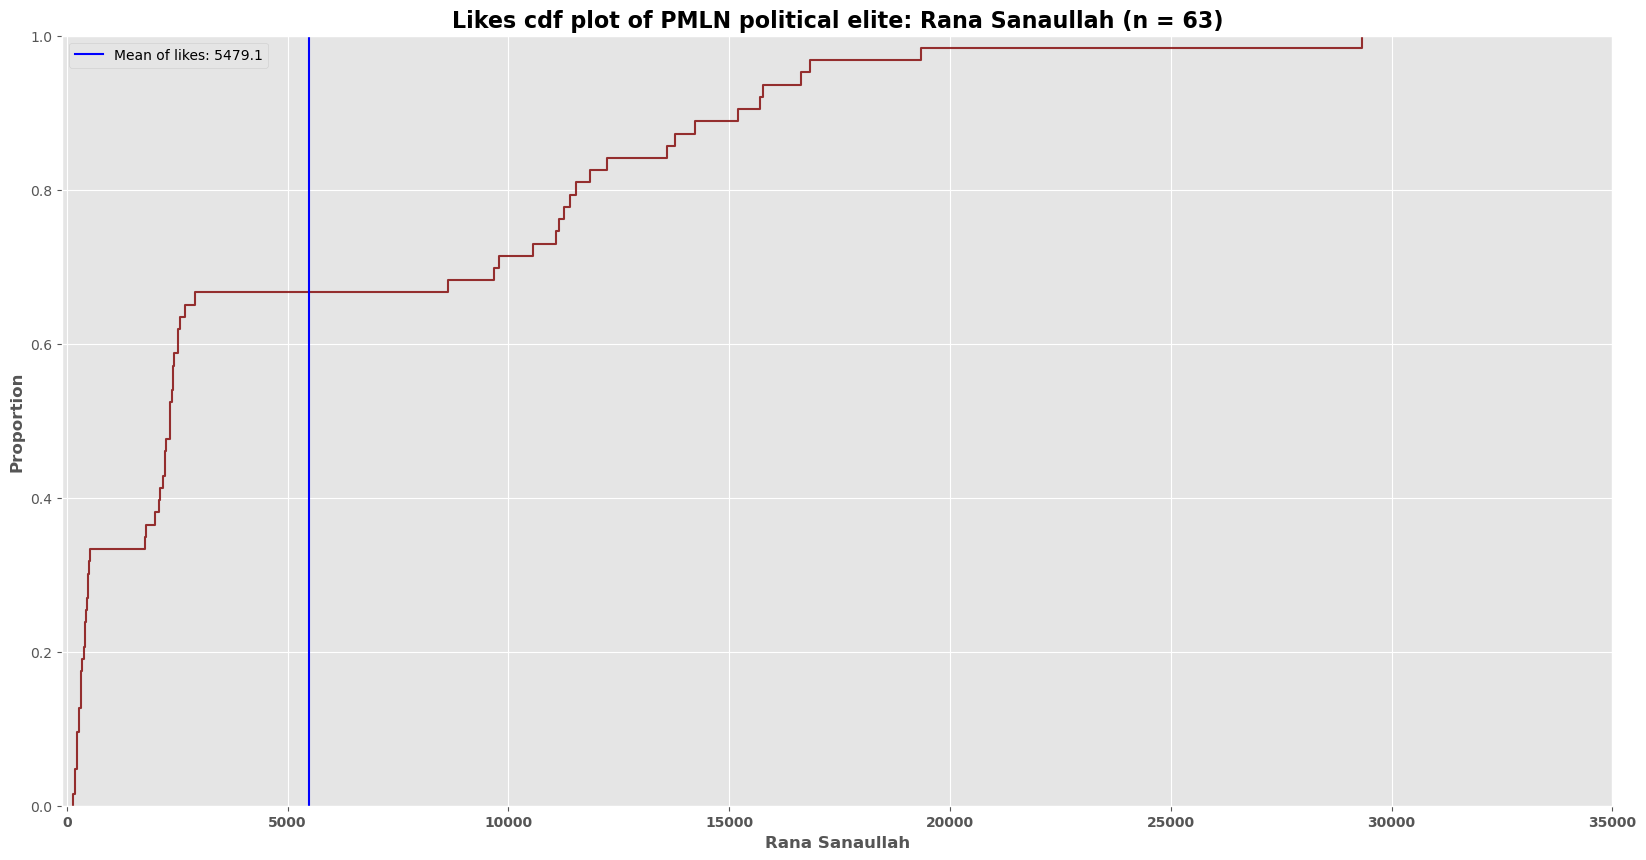

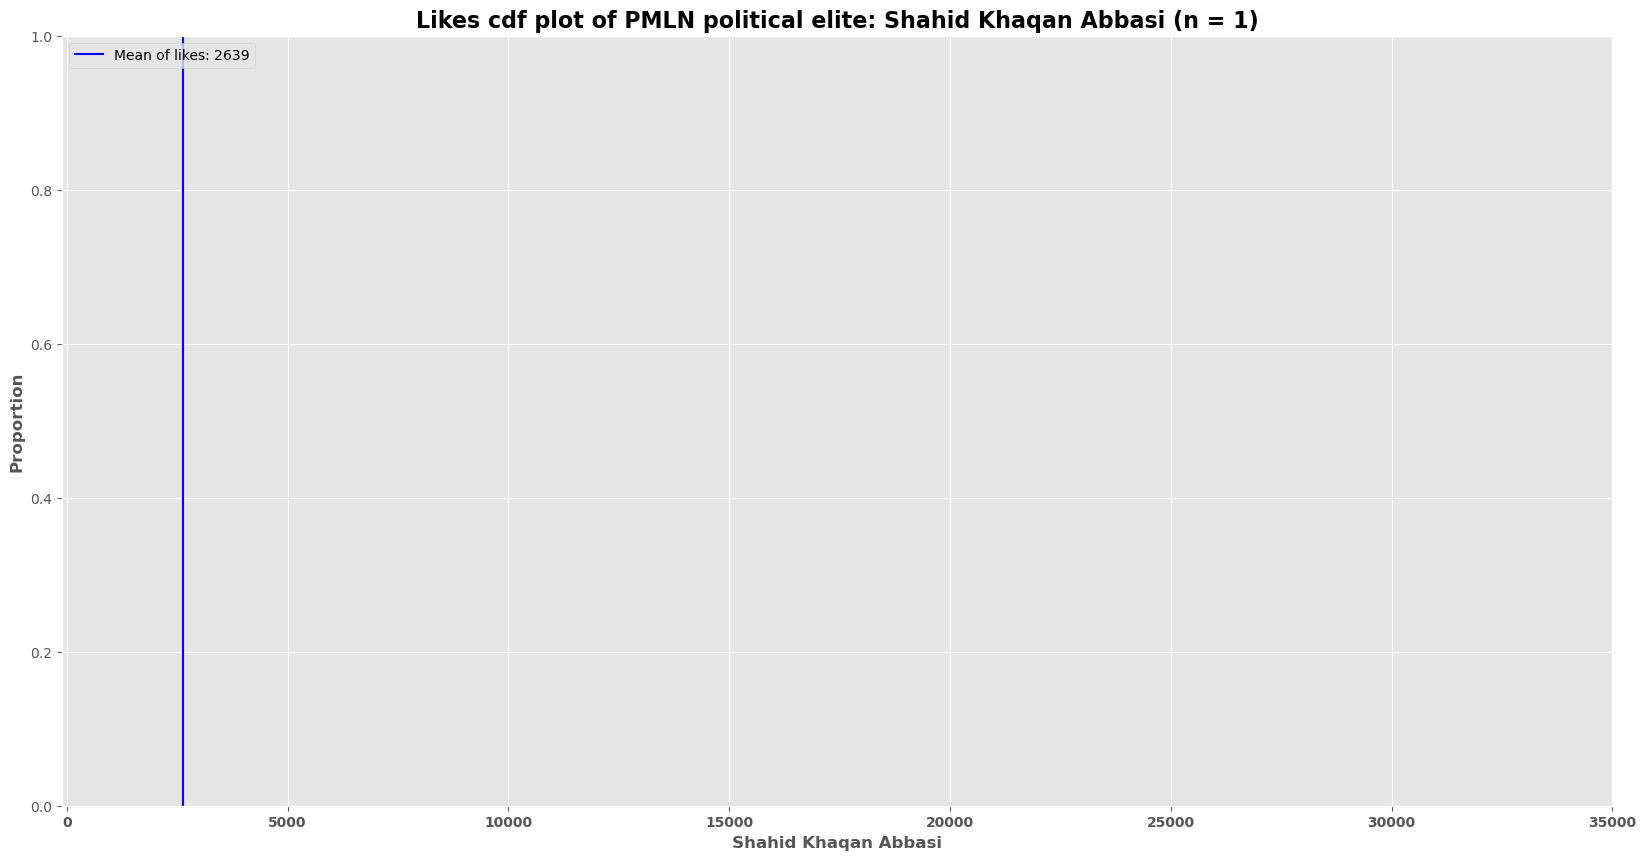

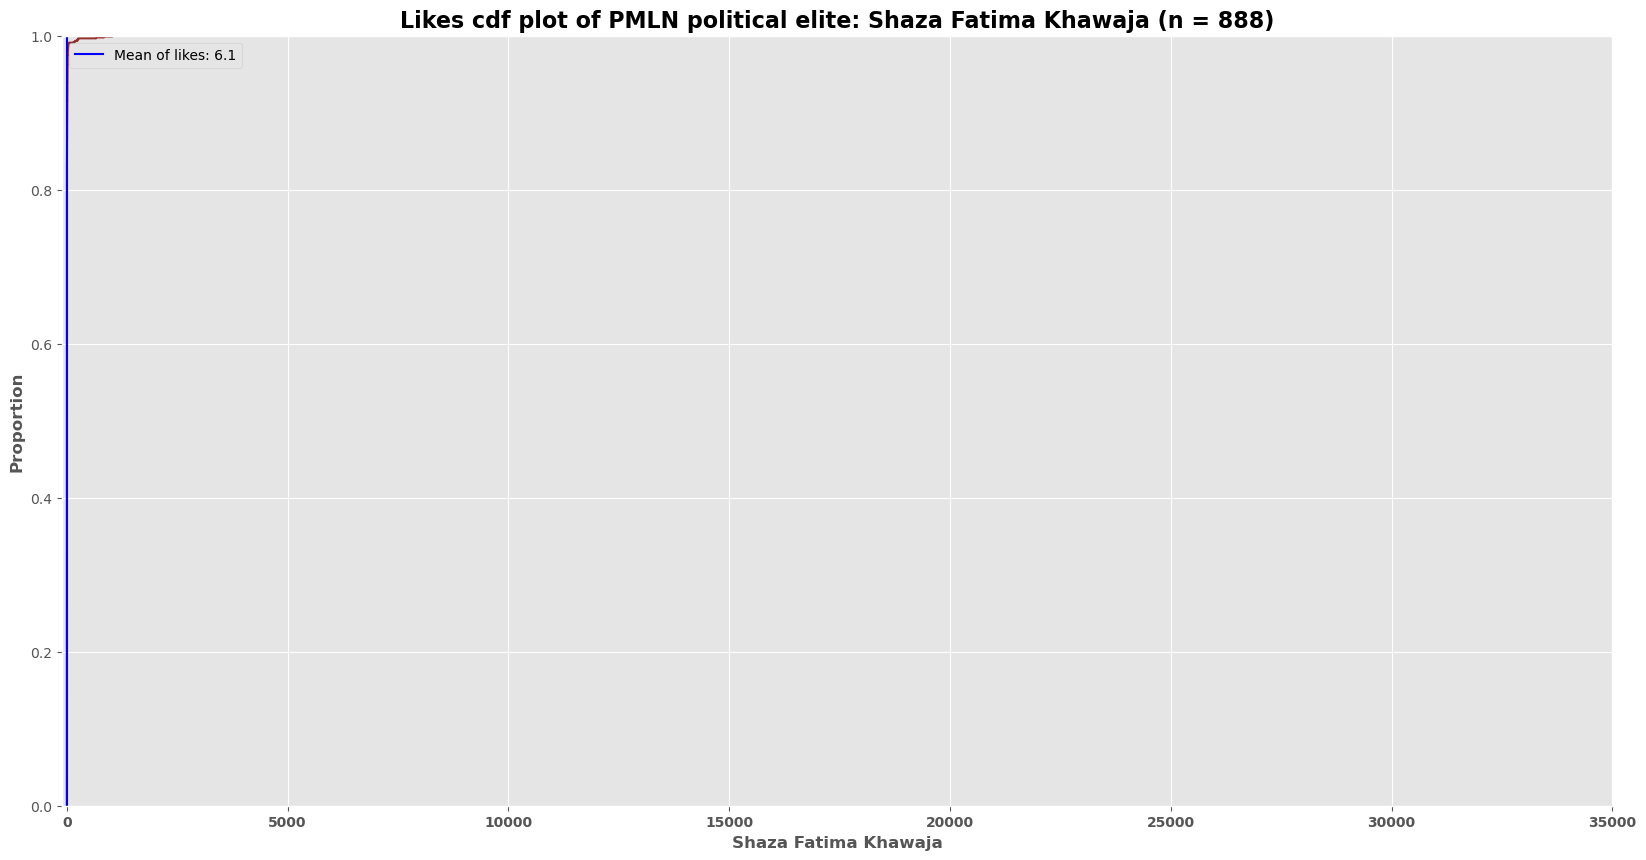

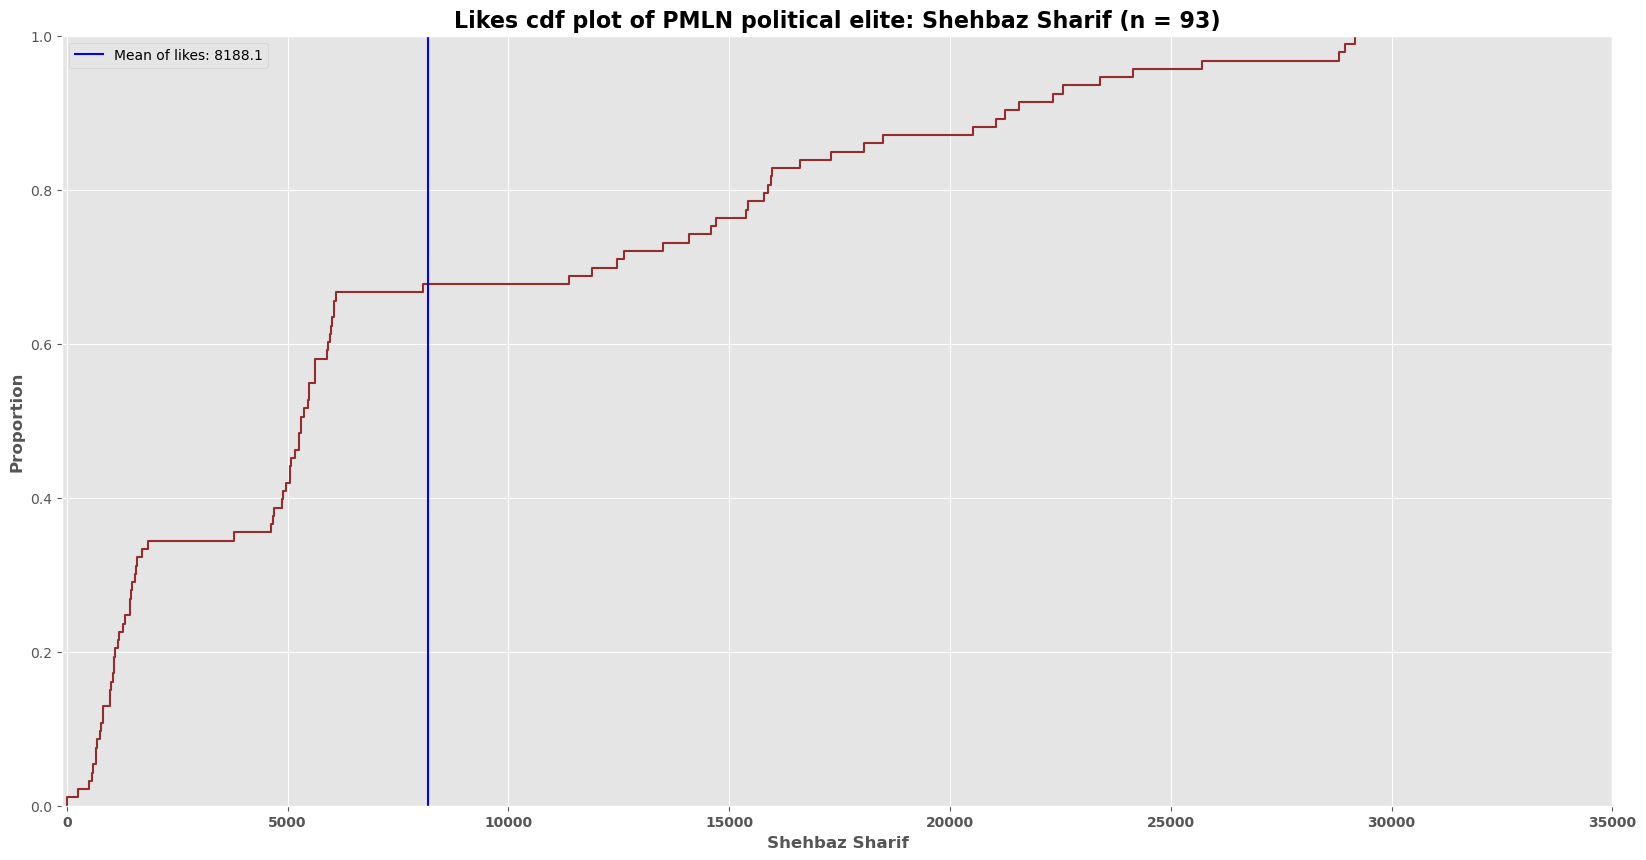

In [1915]:
j = 60
for i in range(len(PMLN_temp_3)):
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.ecdfplot(data=PMLN_temp_3['likes'][i], color='maroon', alpha=0.8, ax=ax)
    ax.axvline(x = mean(PMLN_temp_3['likes'][i]), color = 'b', label = 'Mean of likes: '+str(round(mean(PMLN_temp_3['likes'][i]),1)))
    ax.set_title('Likes cdf plot of PMLN political elite: ' + PMLN_temp_3.index[i]+ ' (n = '+str(len(PMLN_temp_3['likes'][i]))+')' , fontsize=16, fontweight='bold')
    ax.set_xlabel(PMLN_temp_3.index[i], fontsize=12, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=12, fontweight='bold')
    labels = ax.get_xticklabels() 
    [label.set_fontweight('bold') for label in labels]
    ax.set_xlim(-100, 35000)
    ax.legend(loc='upper left')
    plt.savefig(str(j)+'.png', bbox_inches='tight')
    j += 1
plt.show()

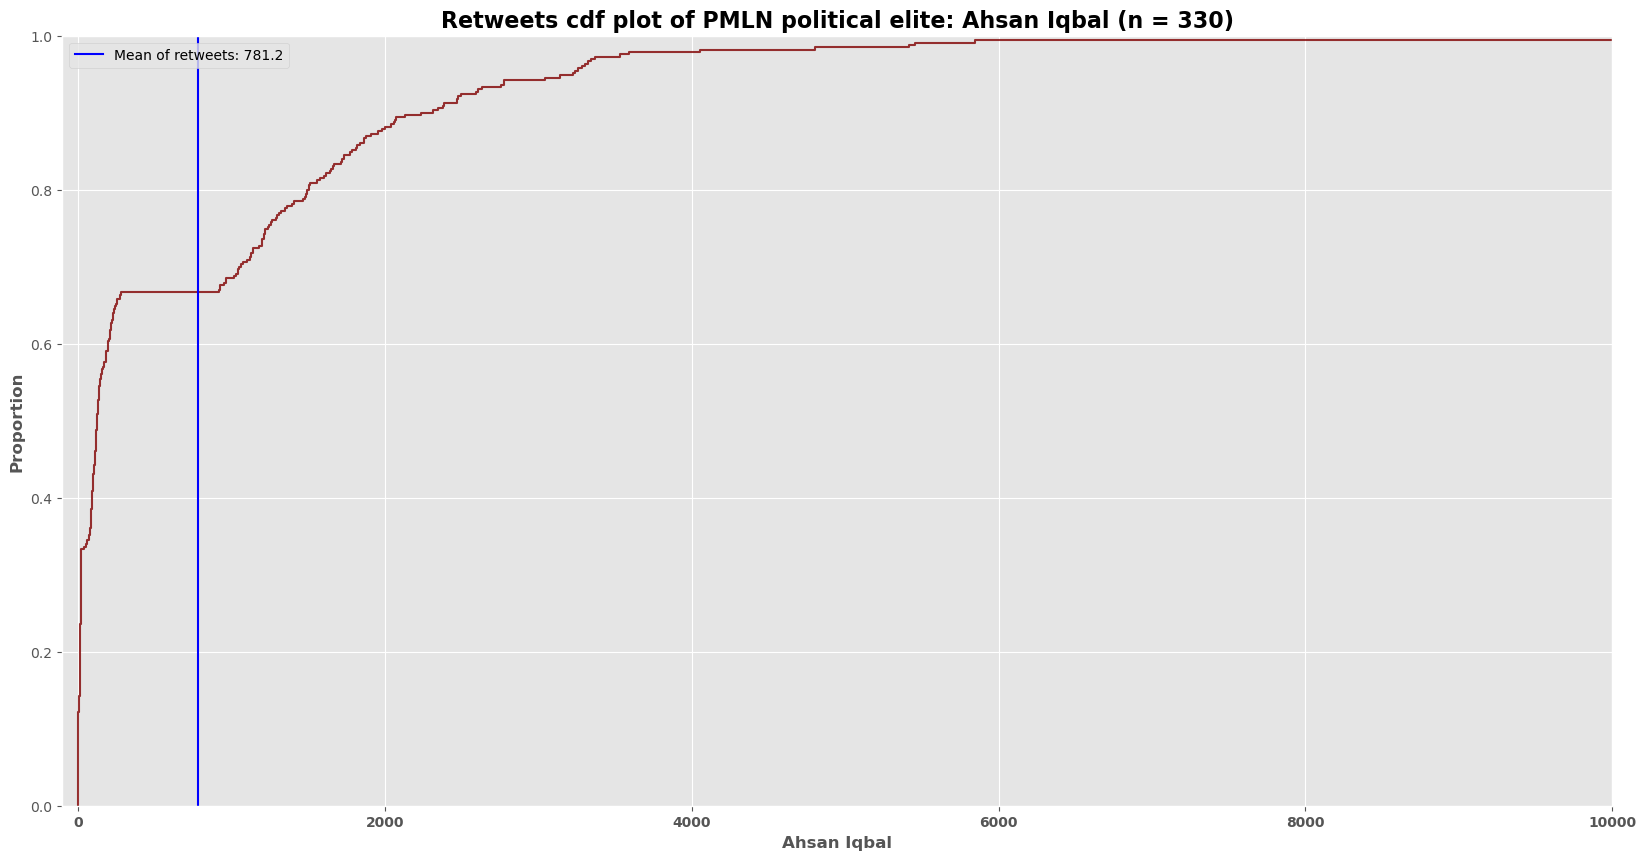

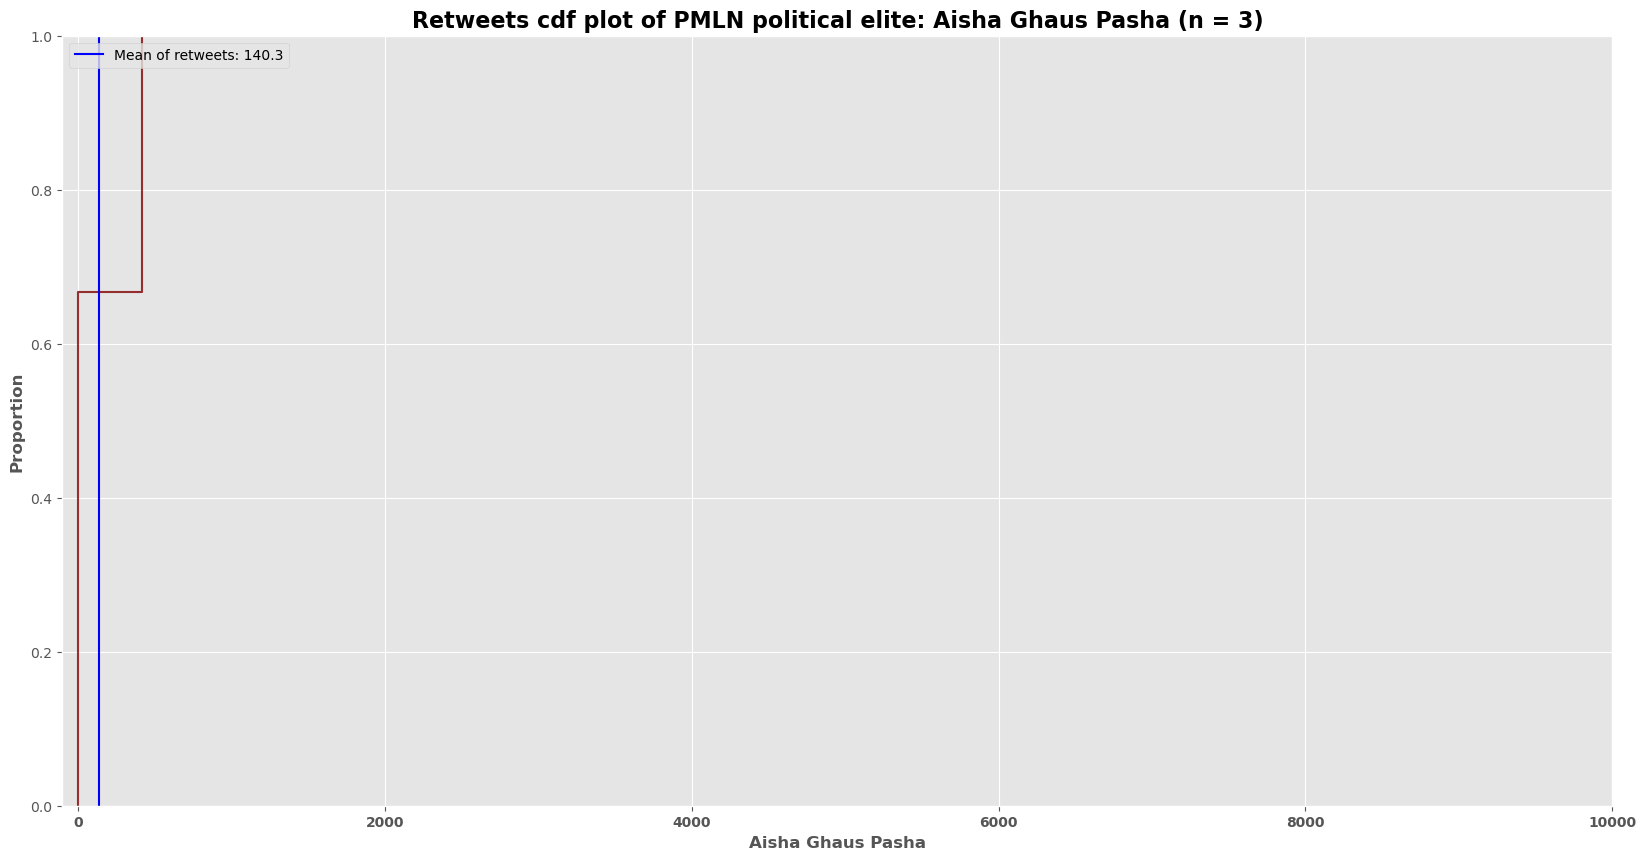

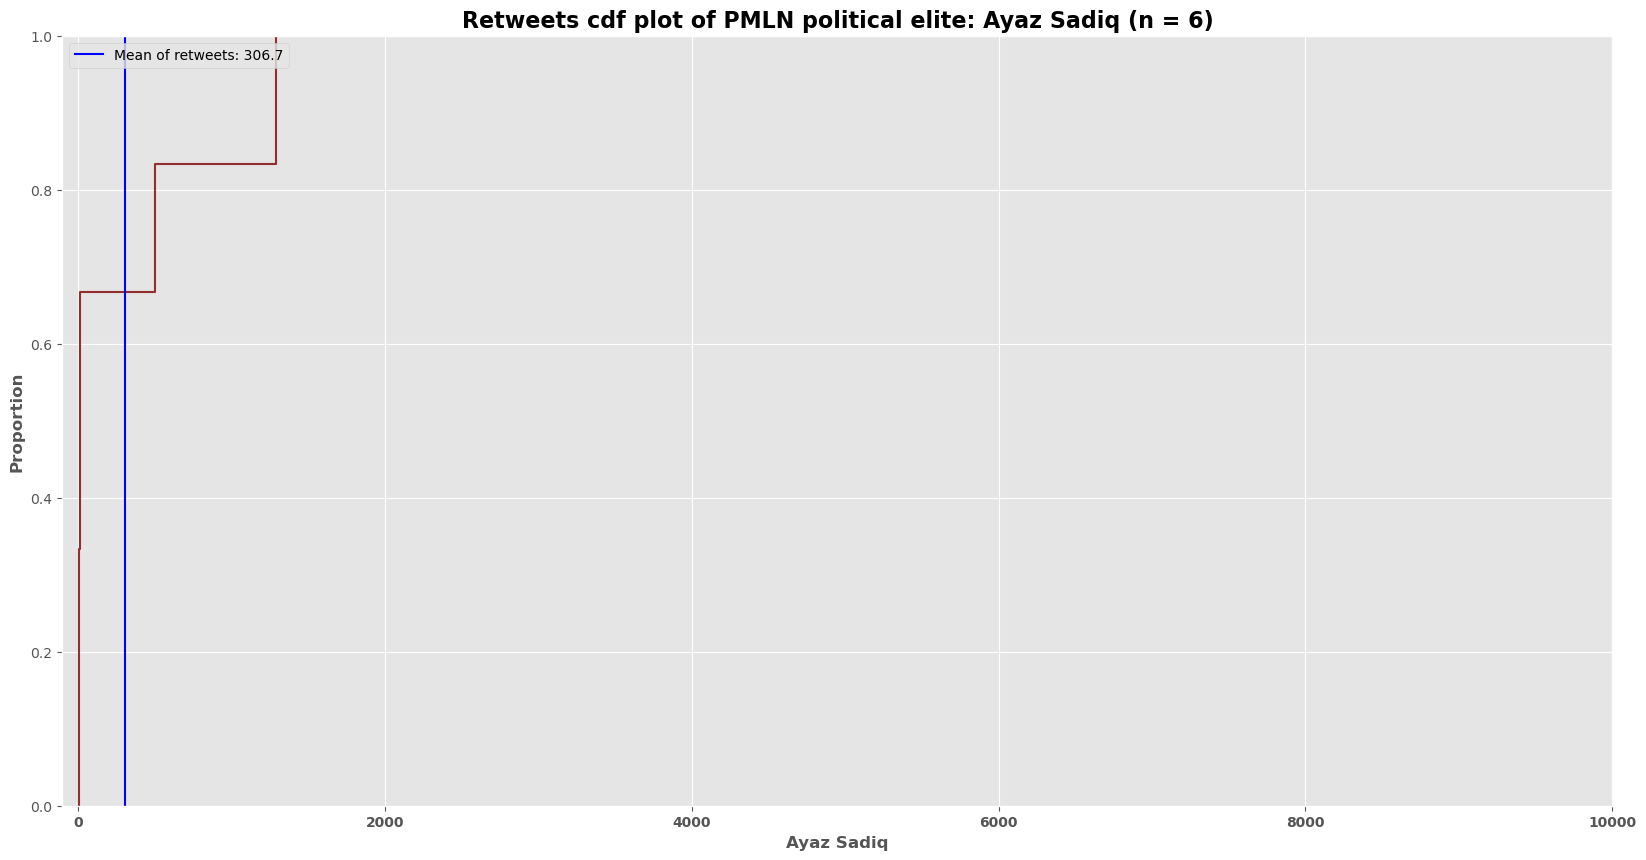

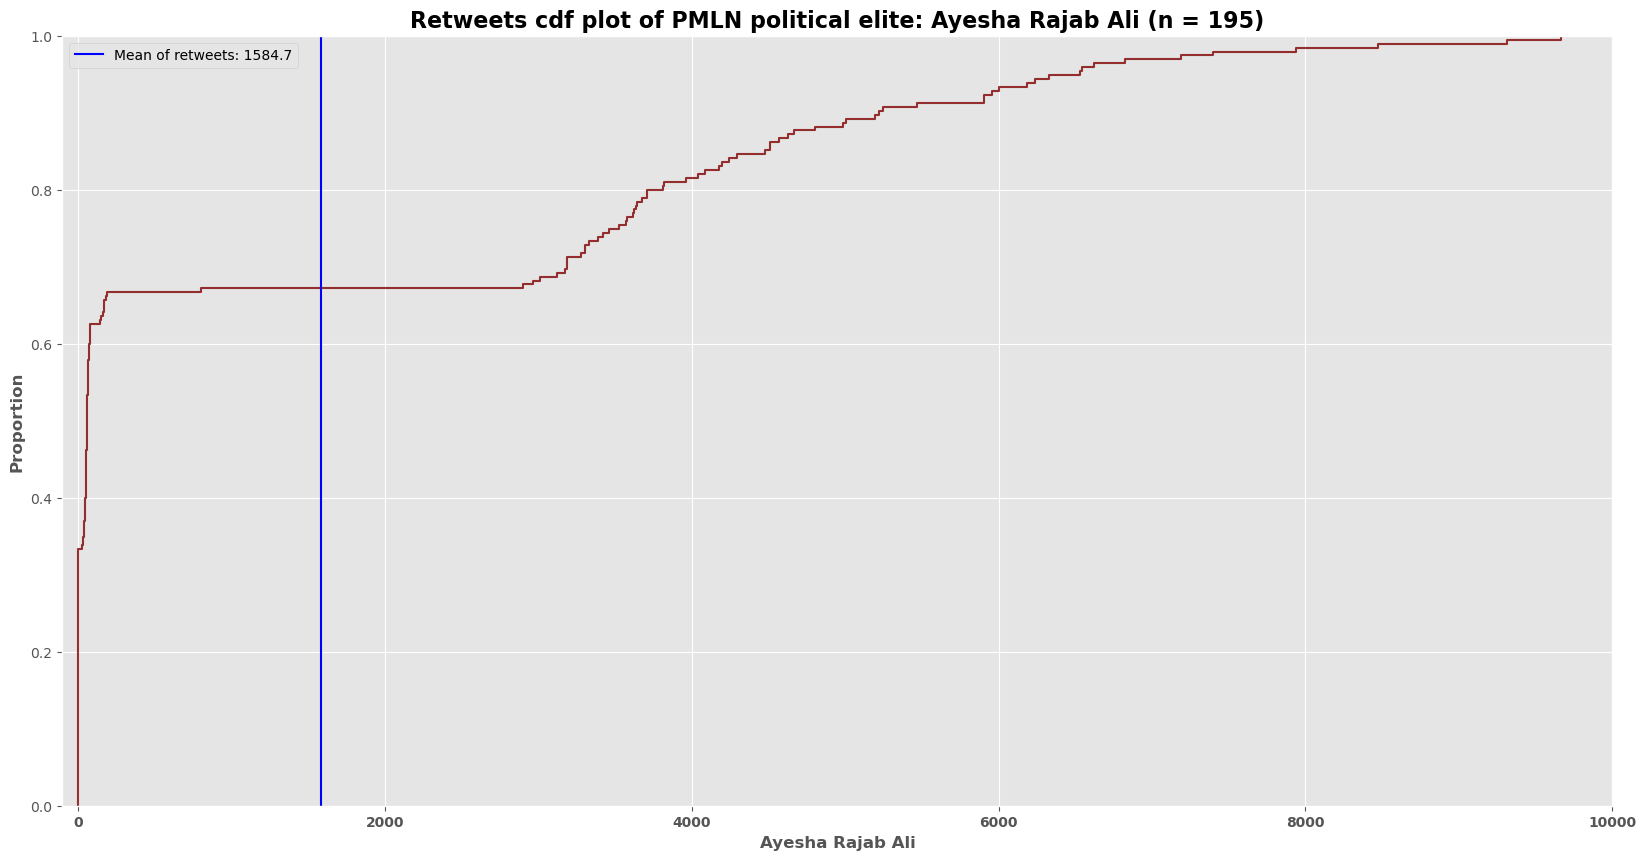

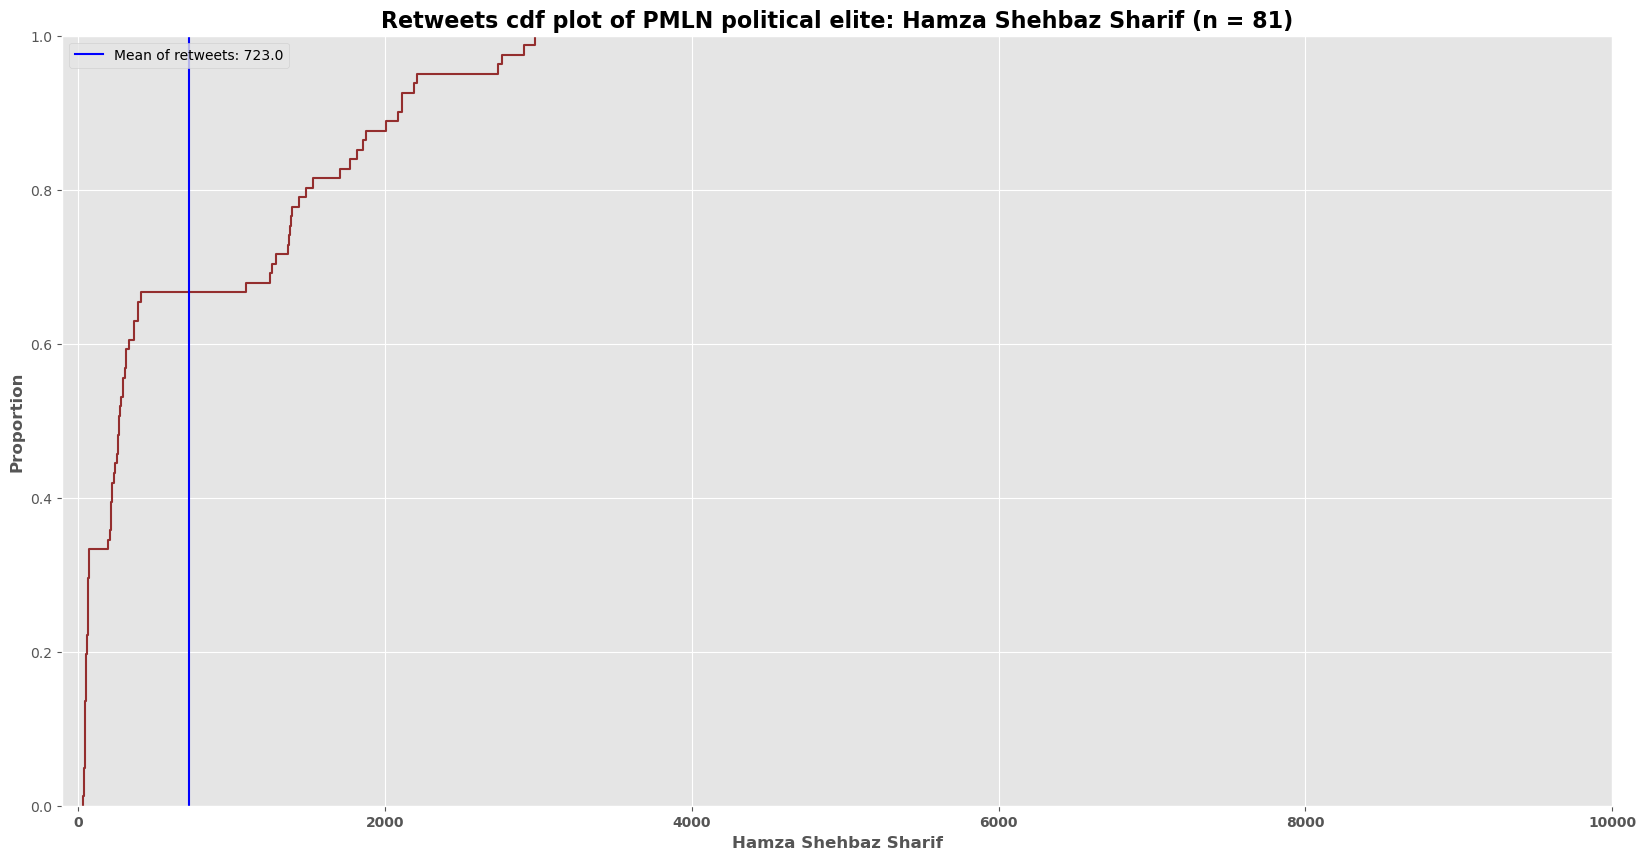

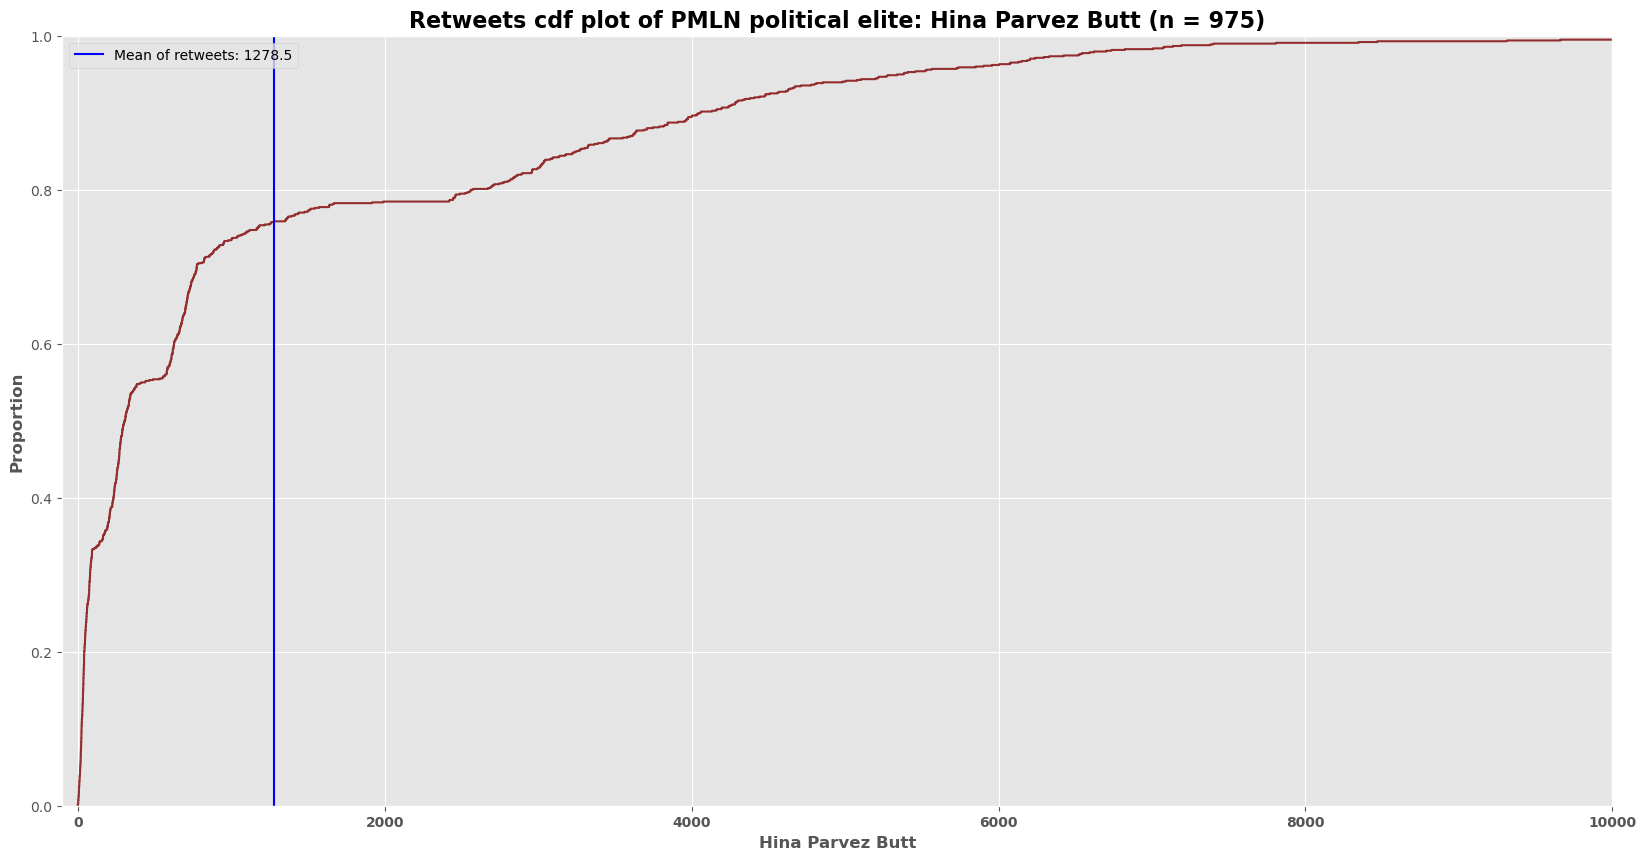

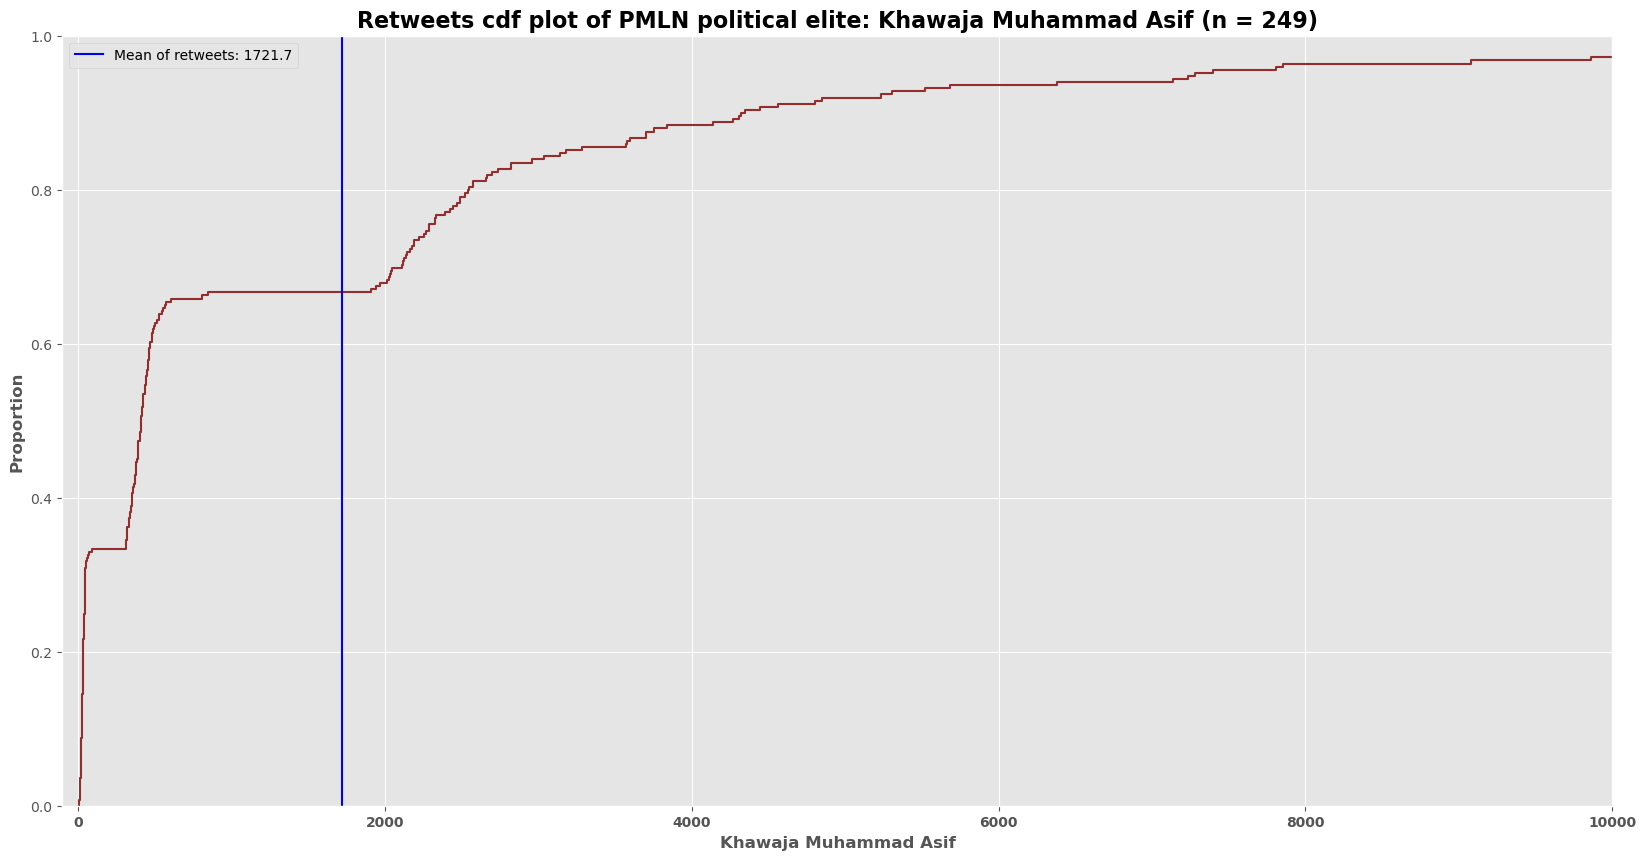

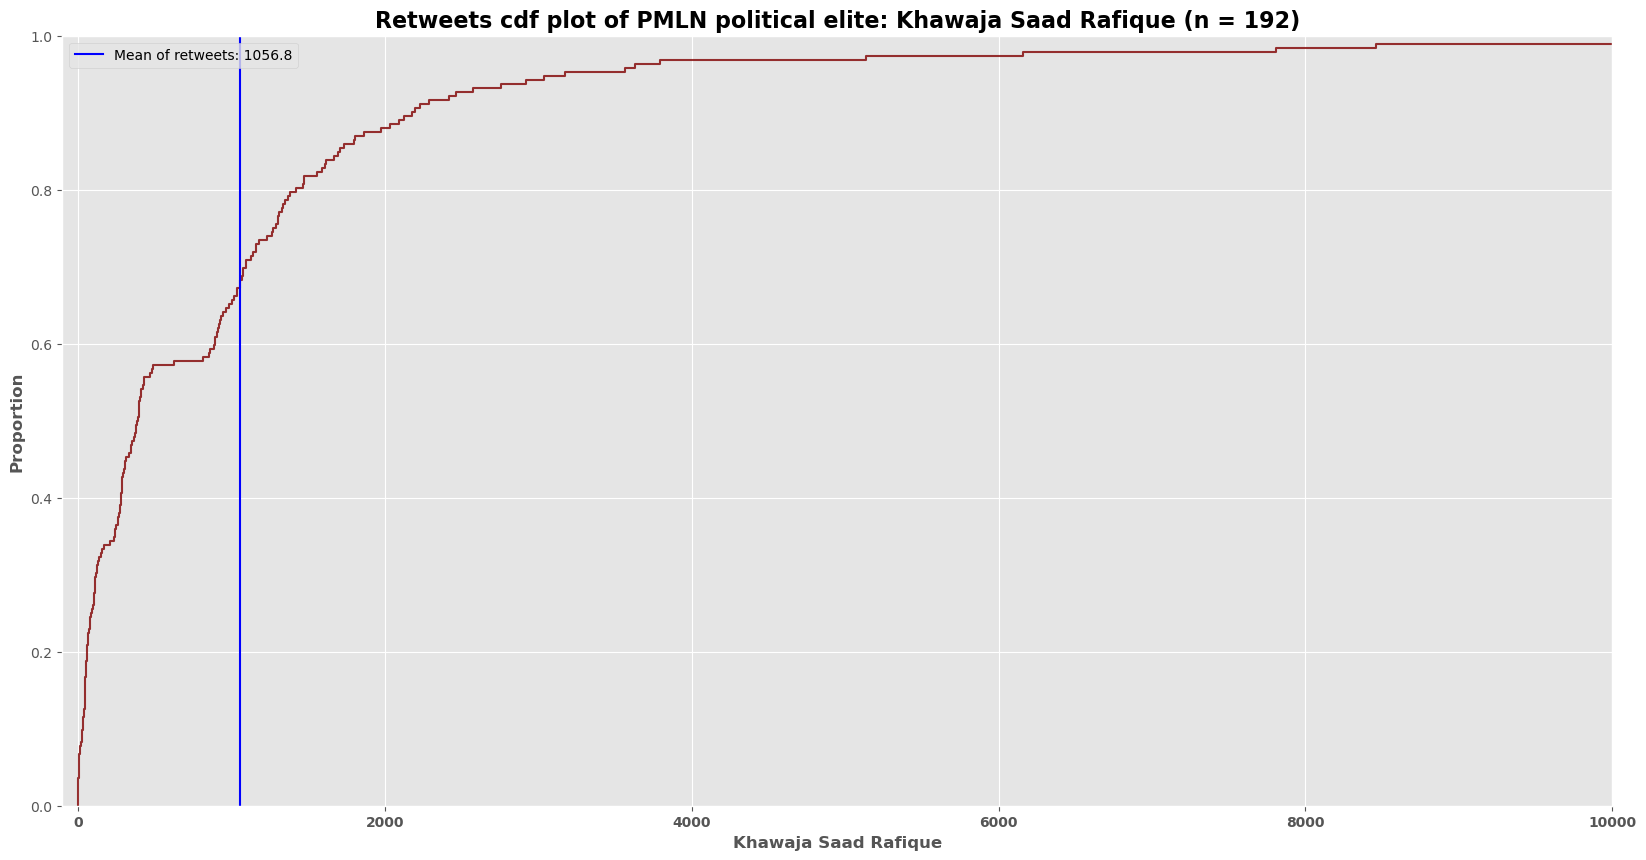

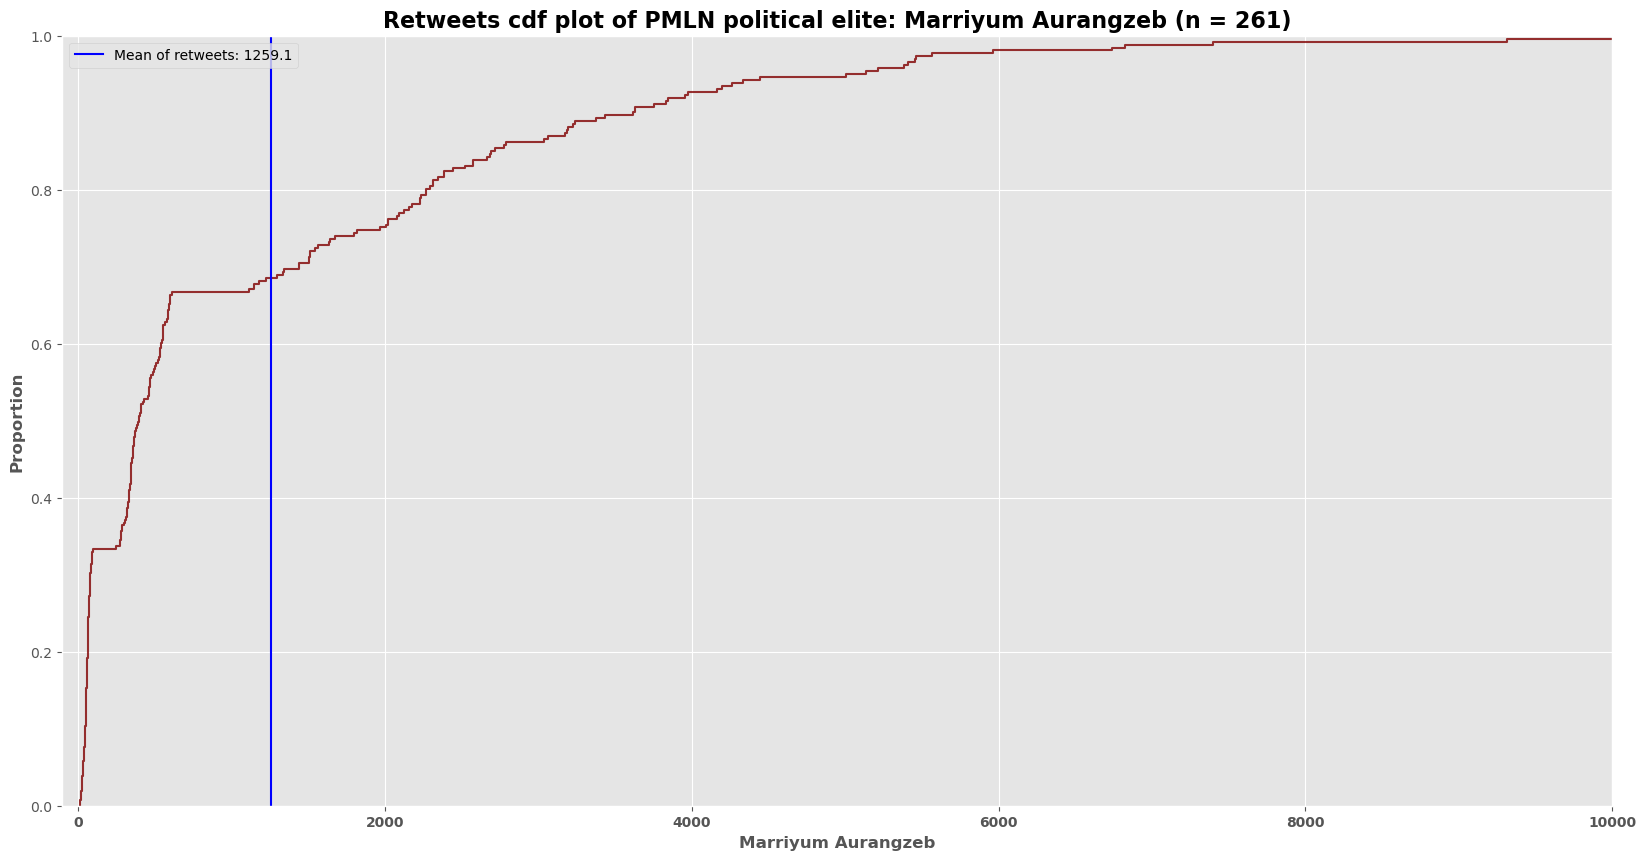

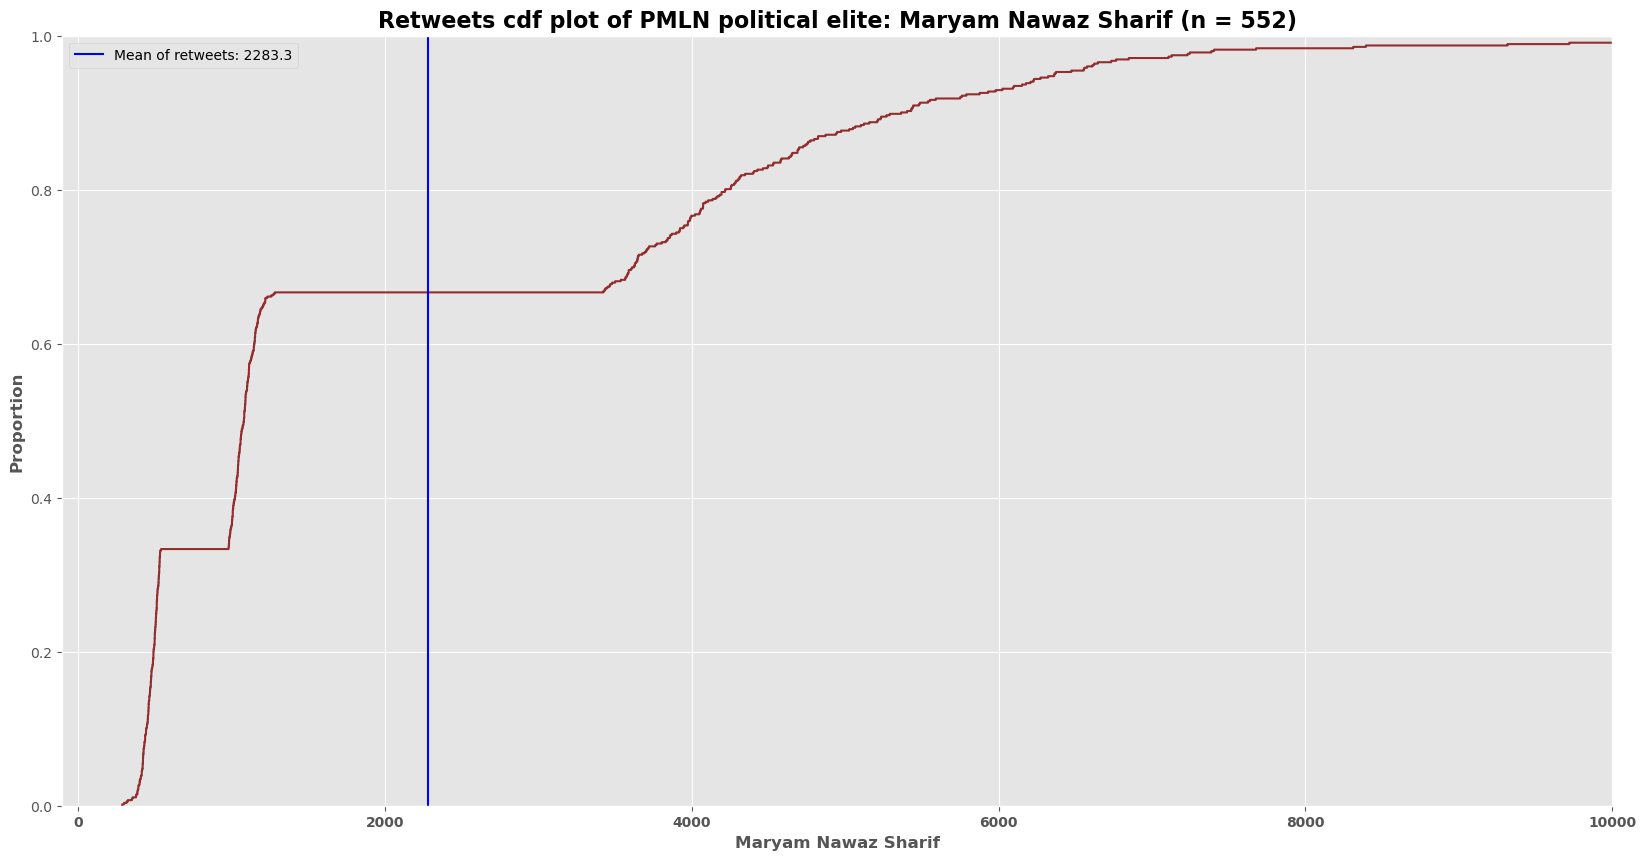

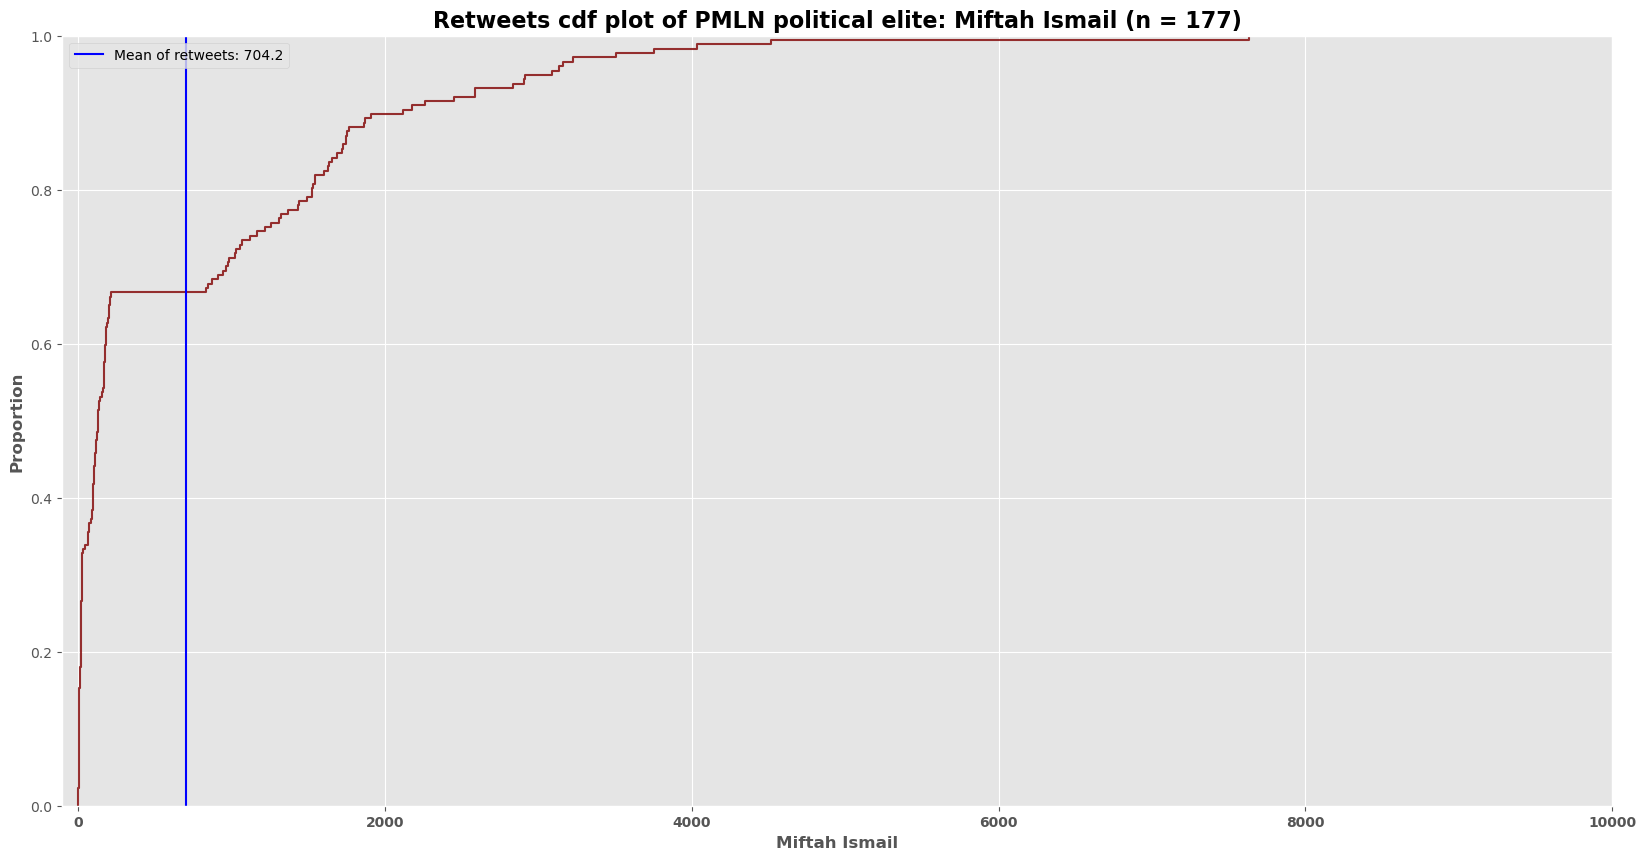

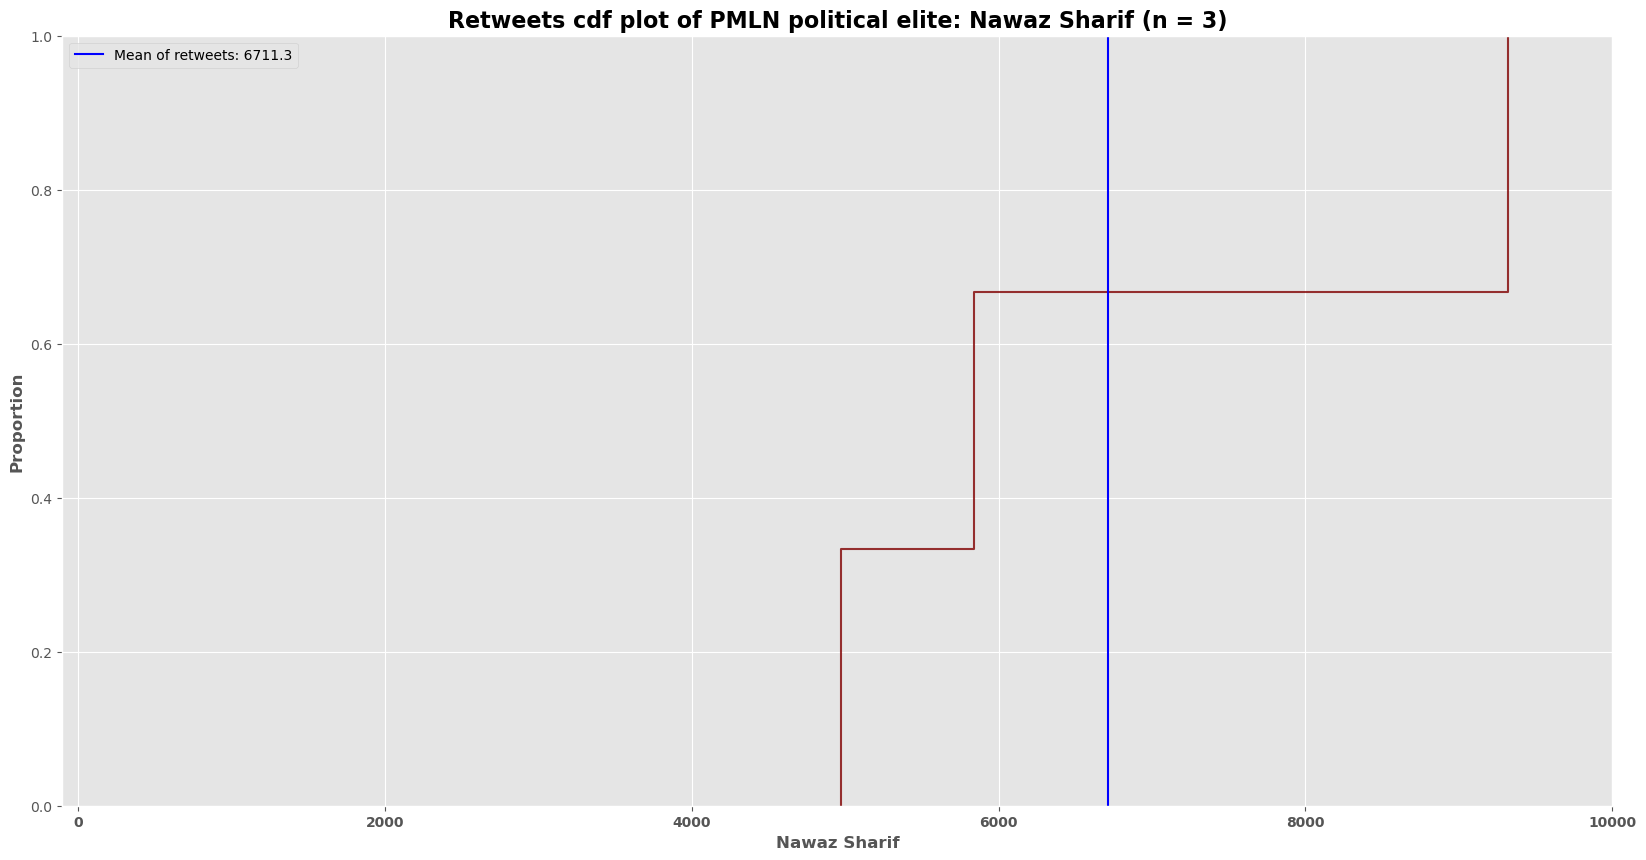

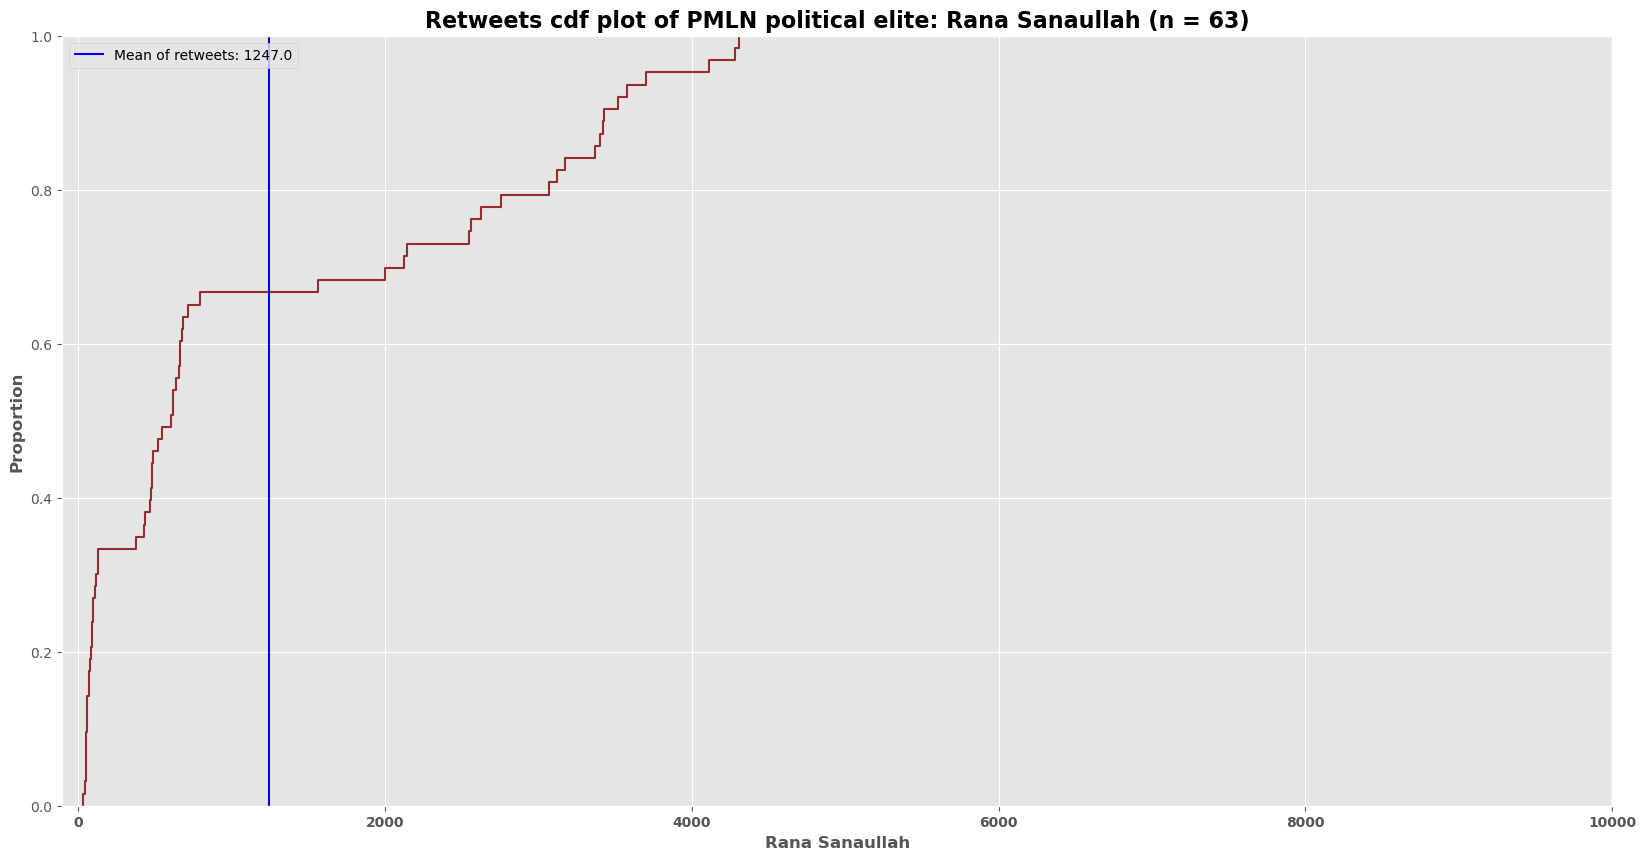

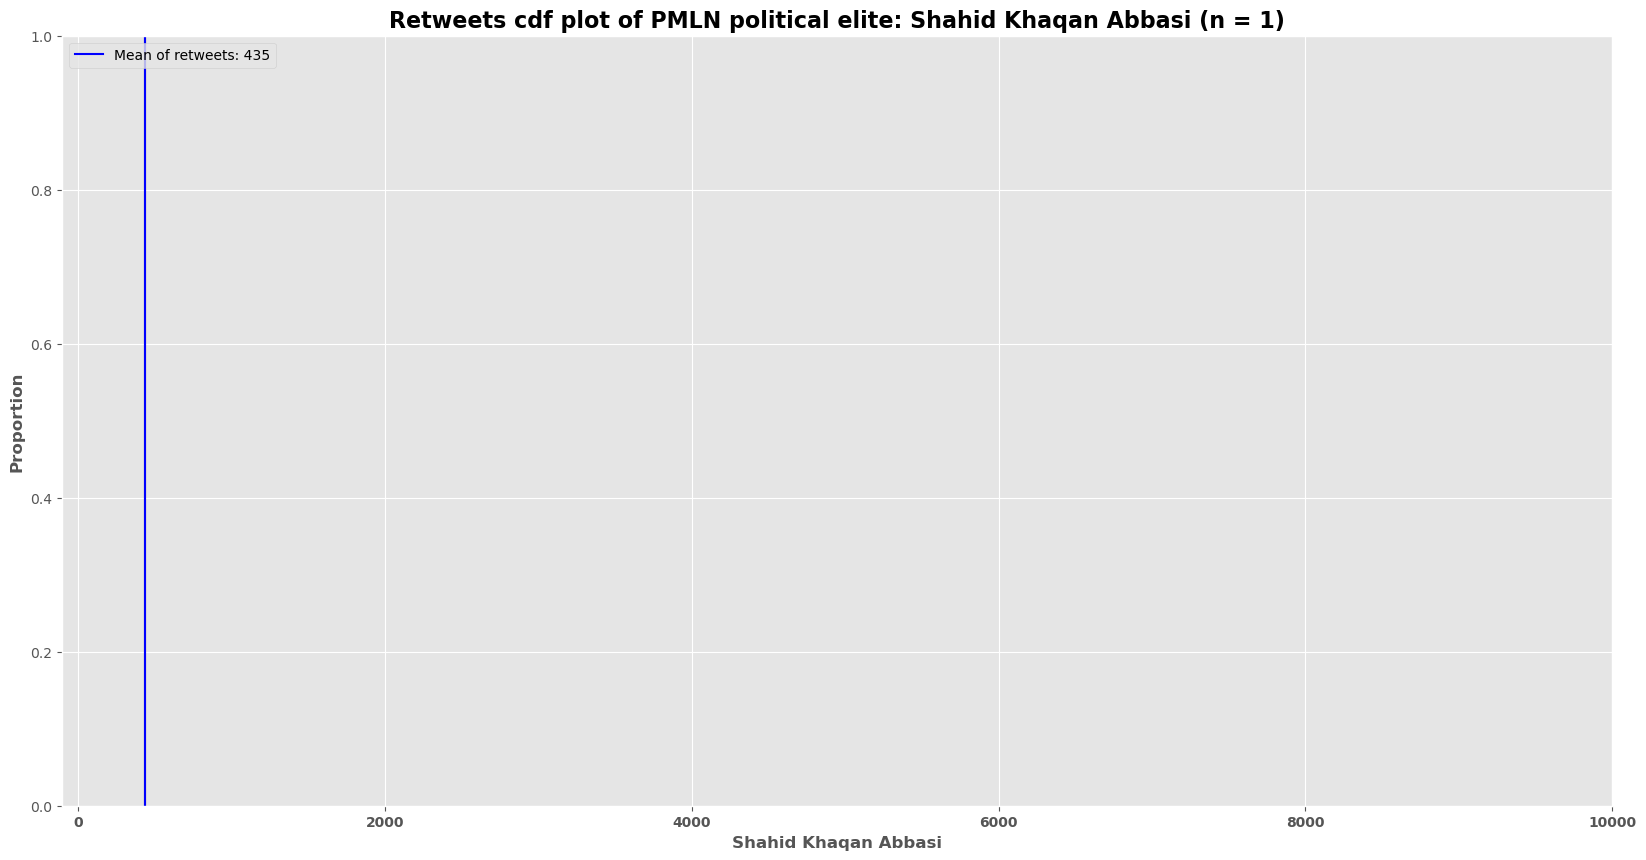

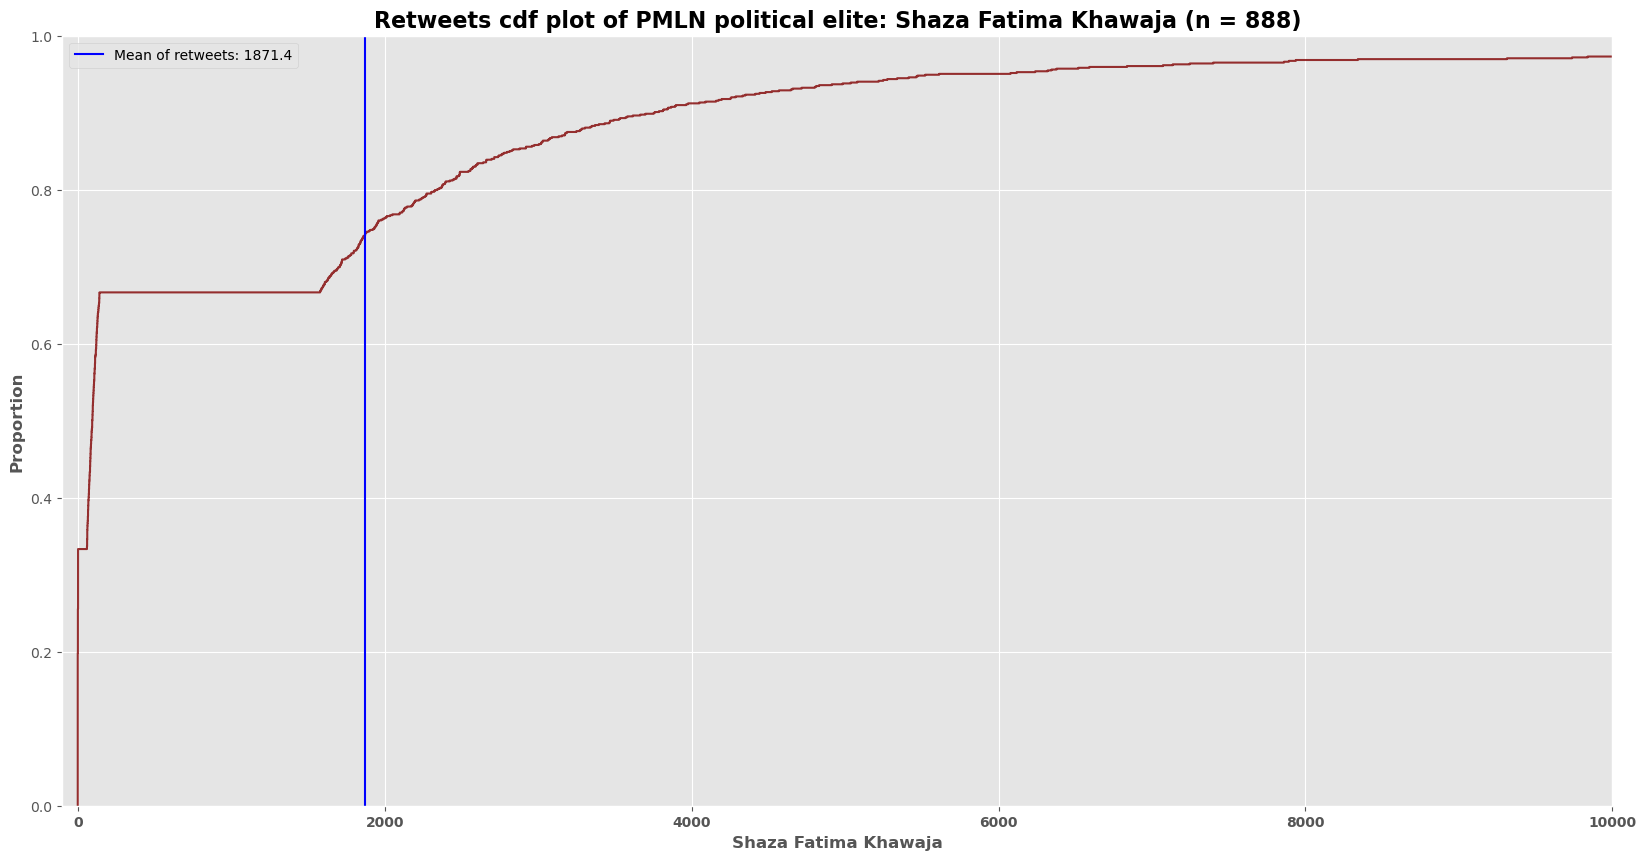

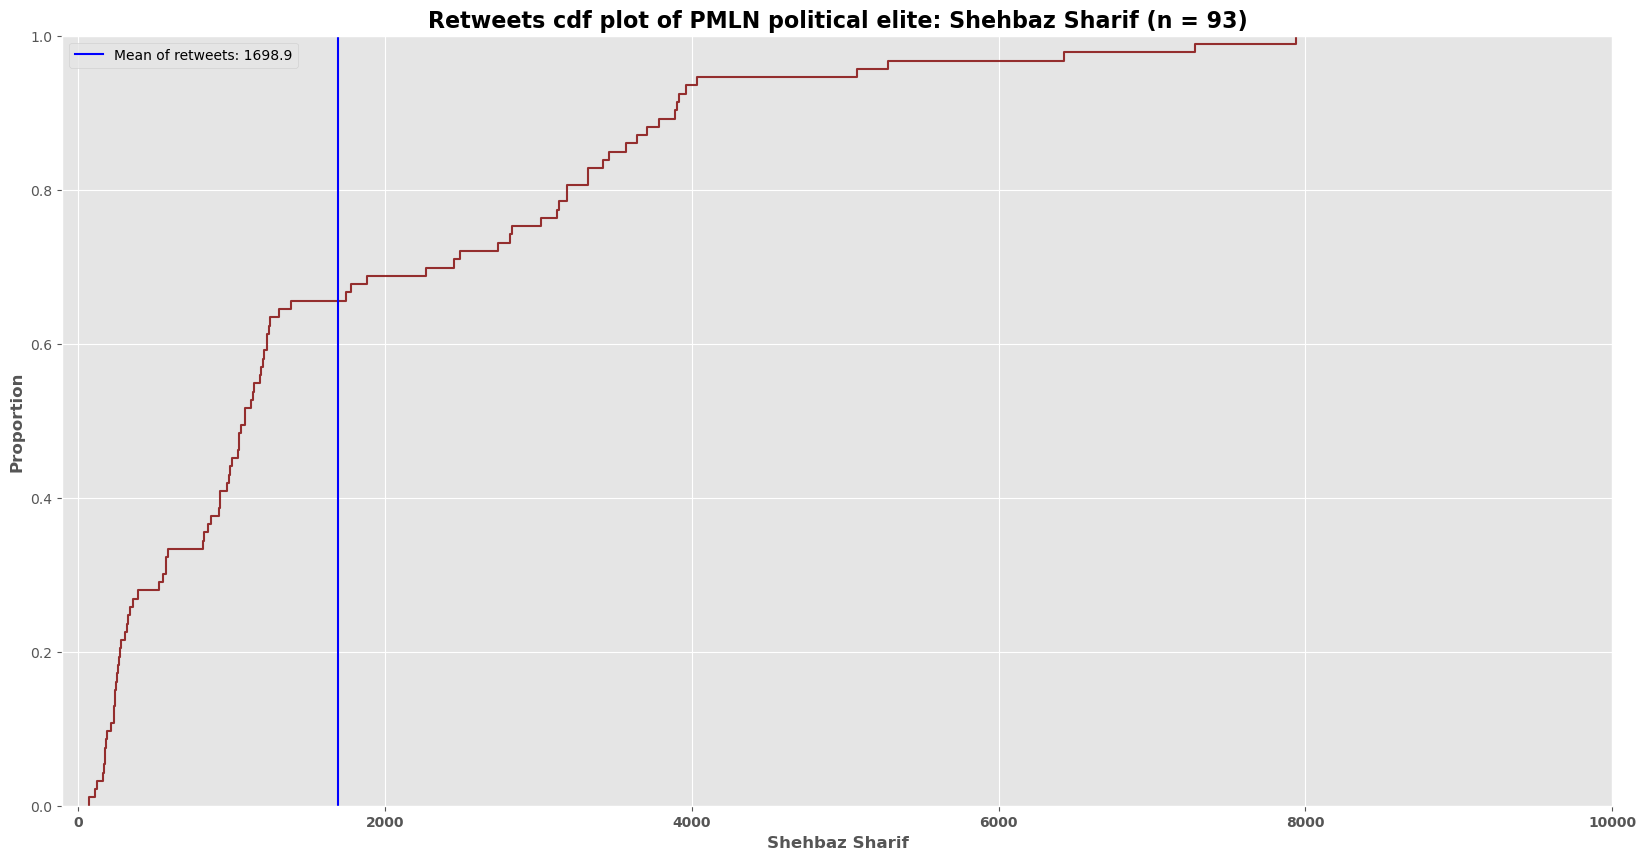

In [1916]:
j = 76
for i in range(len(PMLN_temp_3)):
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.ecdfplot(data=PMLN_temp_3['retweets'][i], color='maroon', alpha=0.8, ax=ax)
    ax.axvline(x = mean(PMLN_temp_3['retweets'][i]), color = 'b', label = 'Mean of retweets: '+str(round(mean(PMLN_temp_3['retweets'][i]),1)))
    ax.set_title('Retweets cdf plot of PMLN political elite: ' + PMLN_temp_3.index[i]+ ' (n = '+str(len(PMLN_temp_3['retweets'][i]))+')'  , fontsize=16, fontweight='bold')
    ax.set_xlabel(PMLN_temp_3.index[i], fontsize=12, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=12, fontweight='bold')
    labels = ax.get_xticklabels() 
    [label.set_fontweight('bold') for label in labels]
    ax.set_xlim(-100, 10000)
    ax.legend(loc='upper left')
    plt.savefig(str(j)+'.png', bbox_inches='tight')
    j += 1
plt.show()

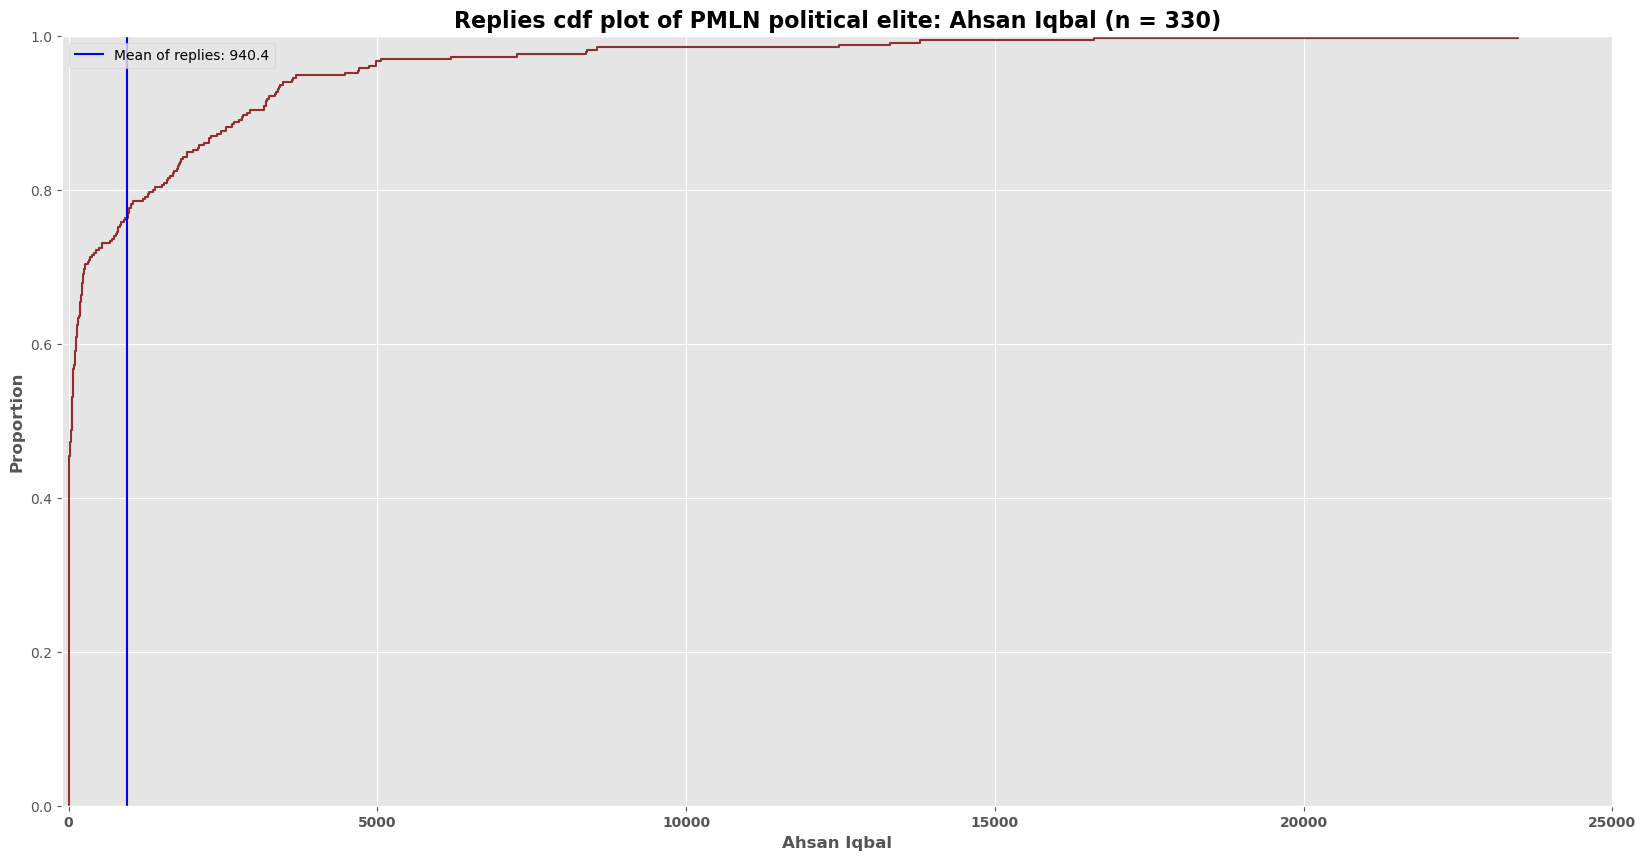

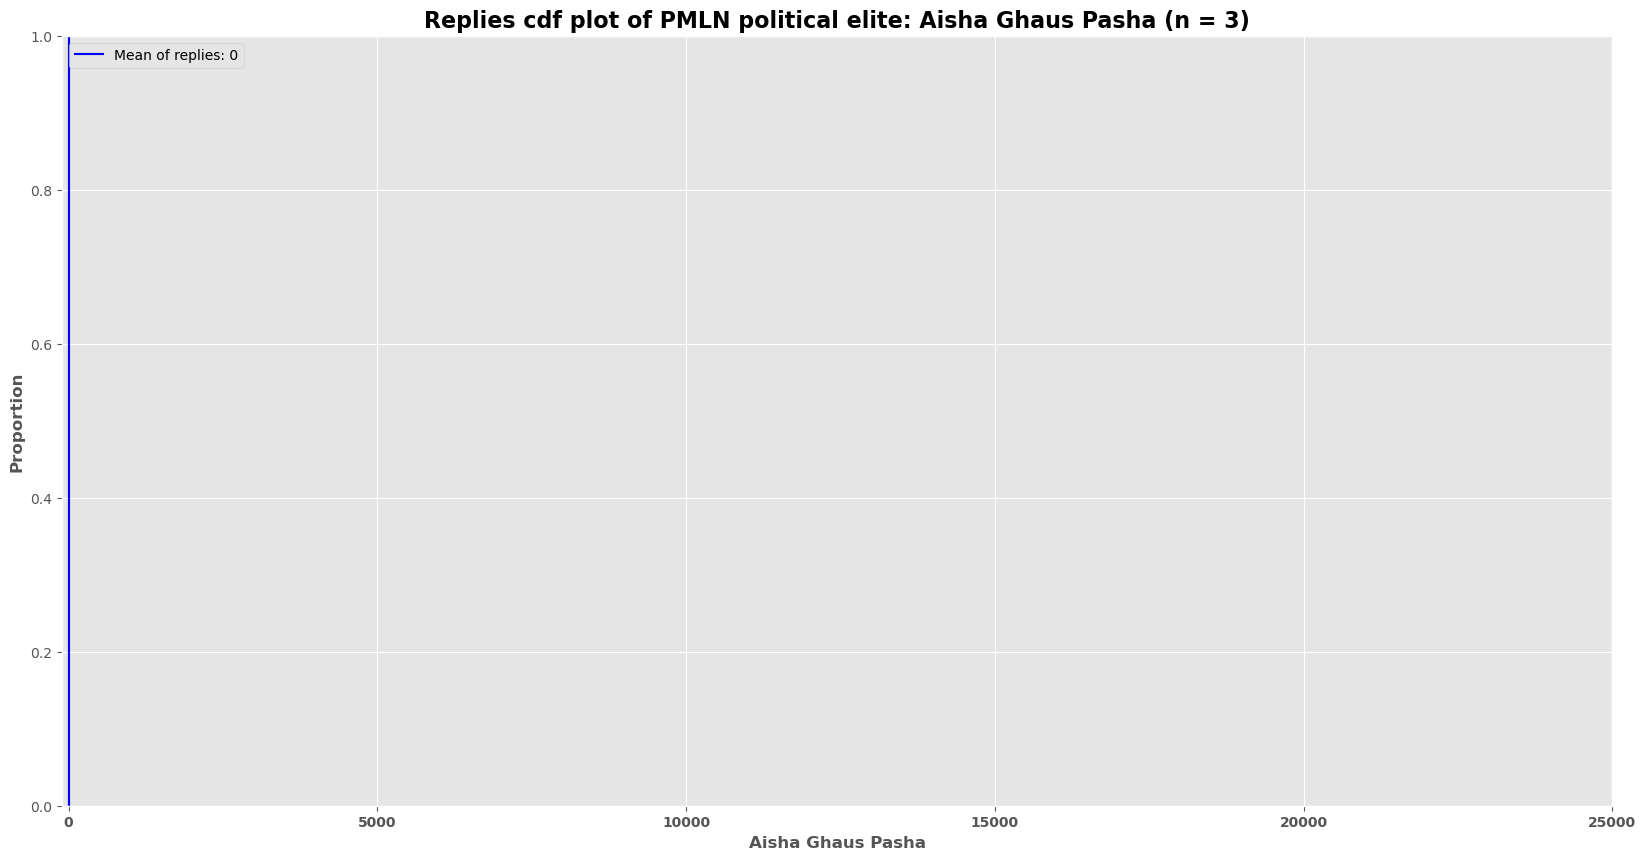

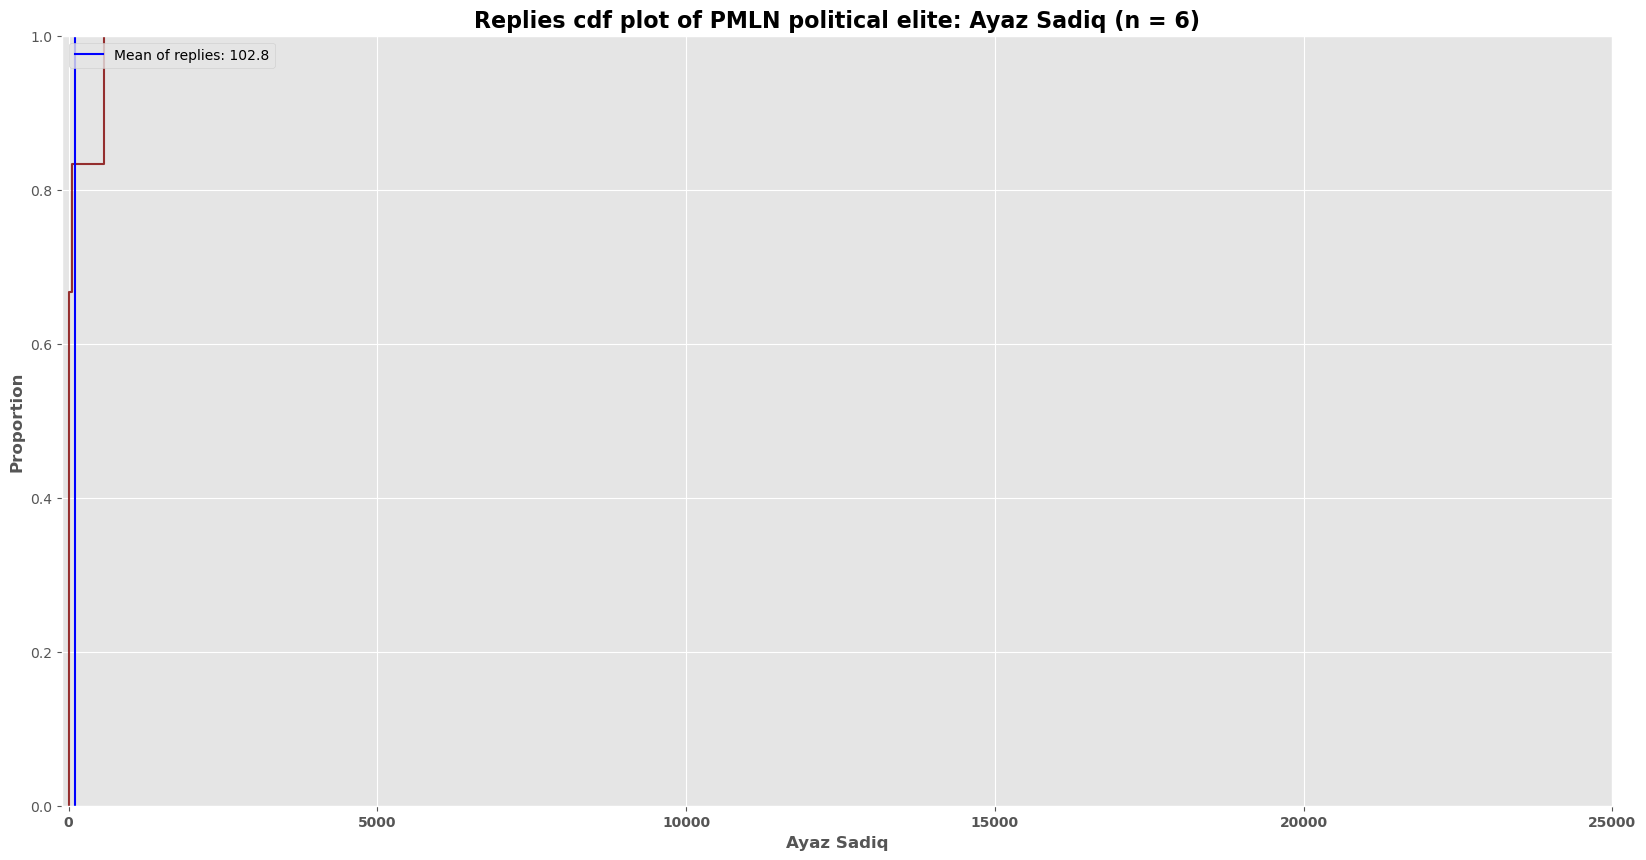

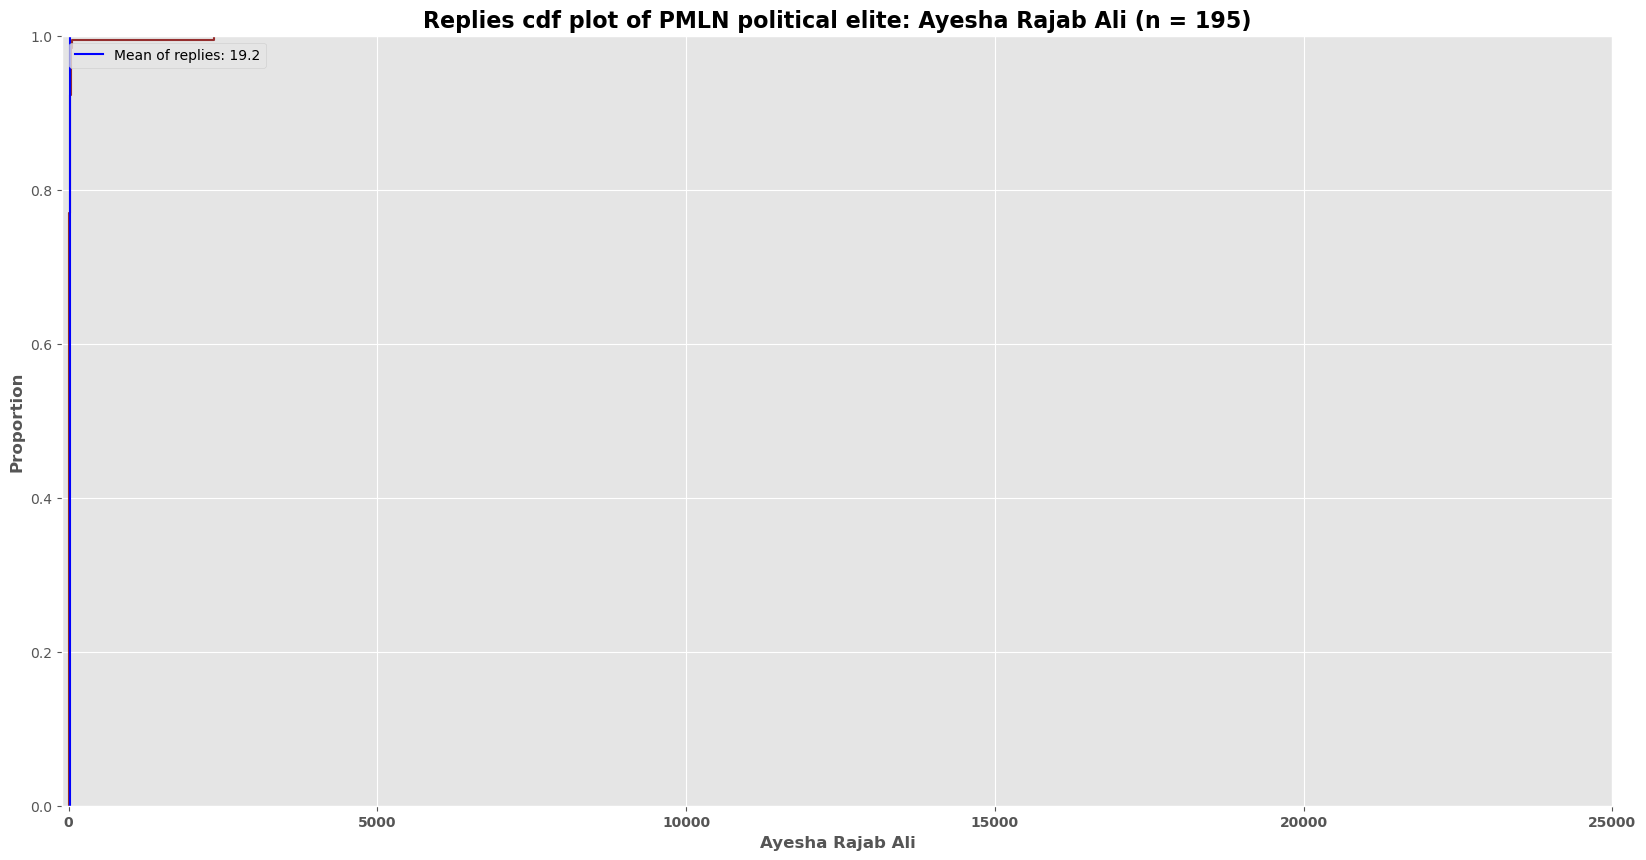

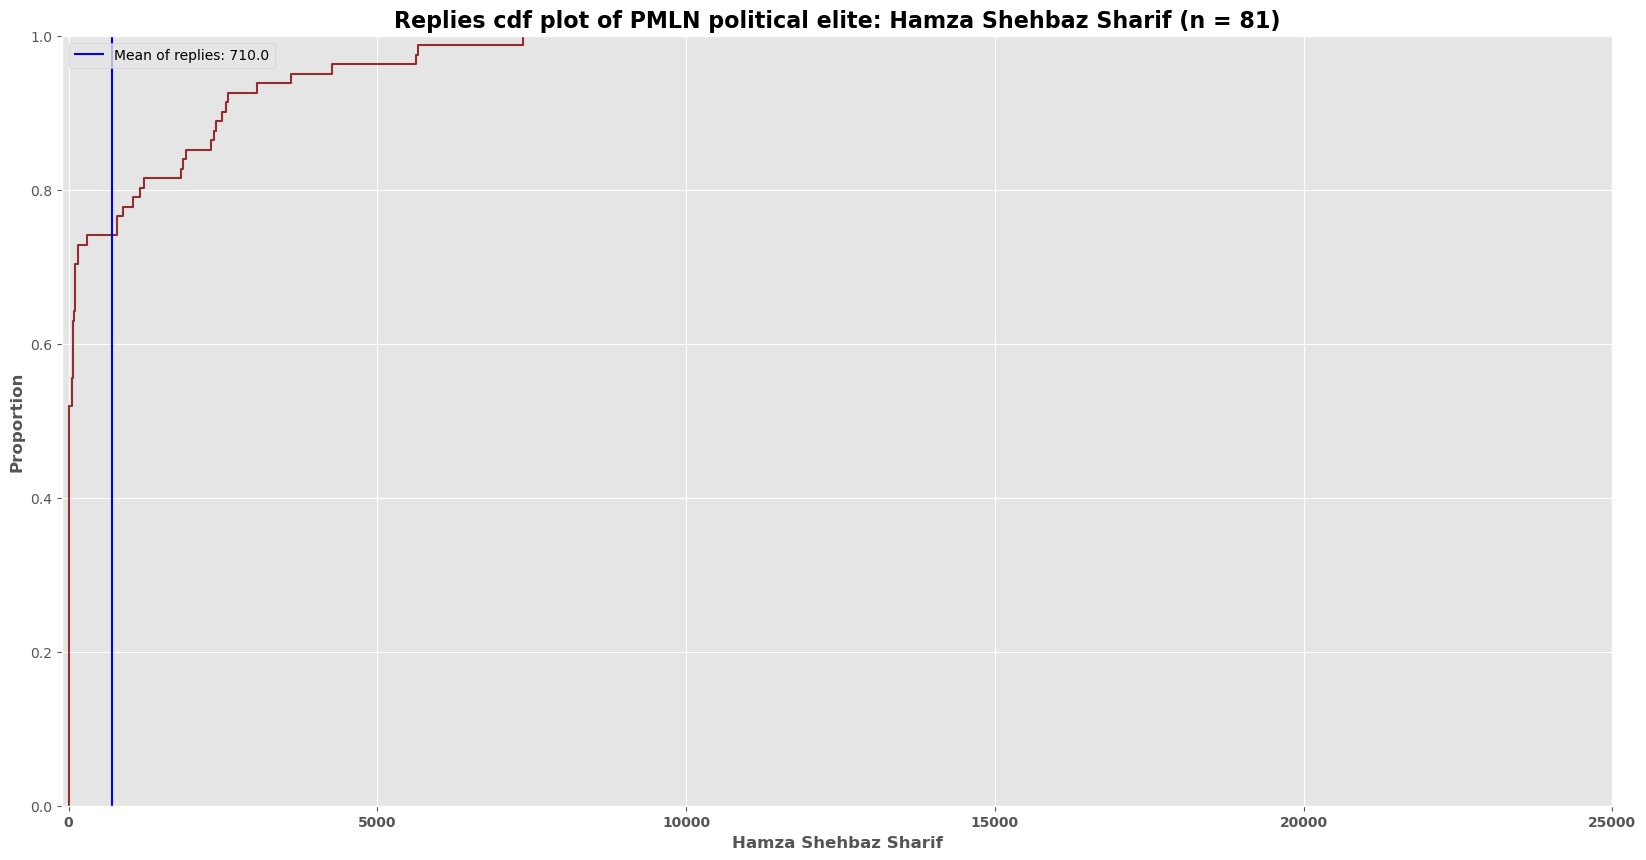

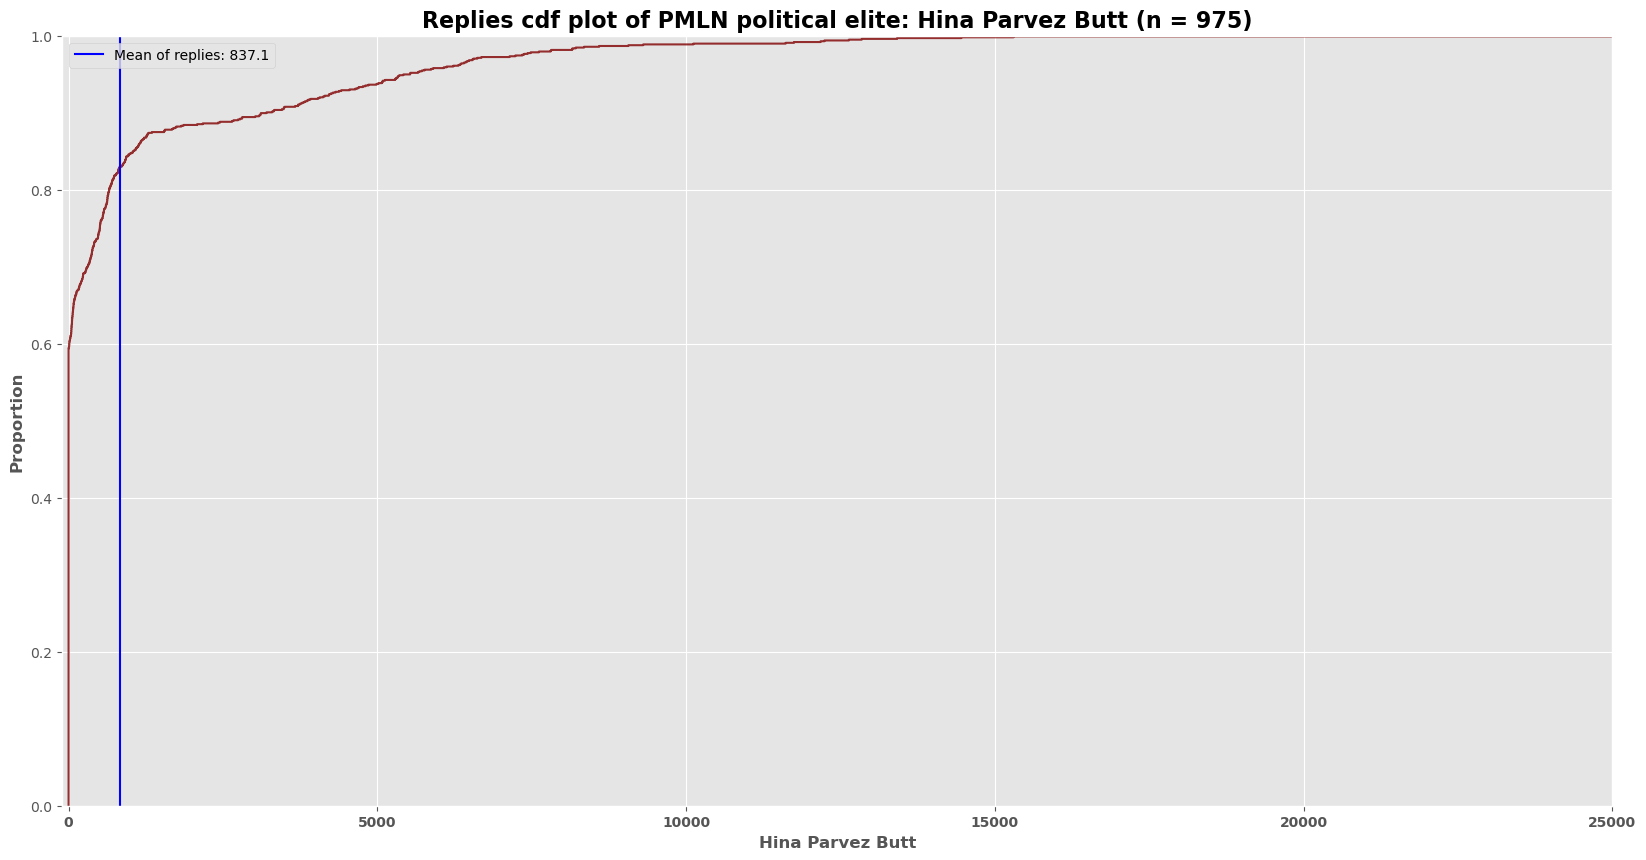

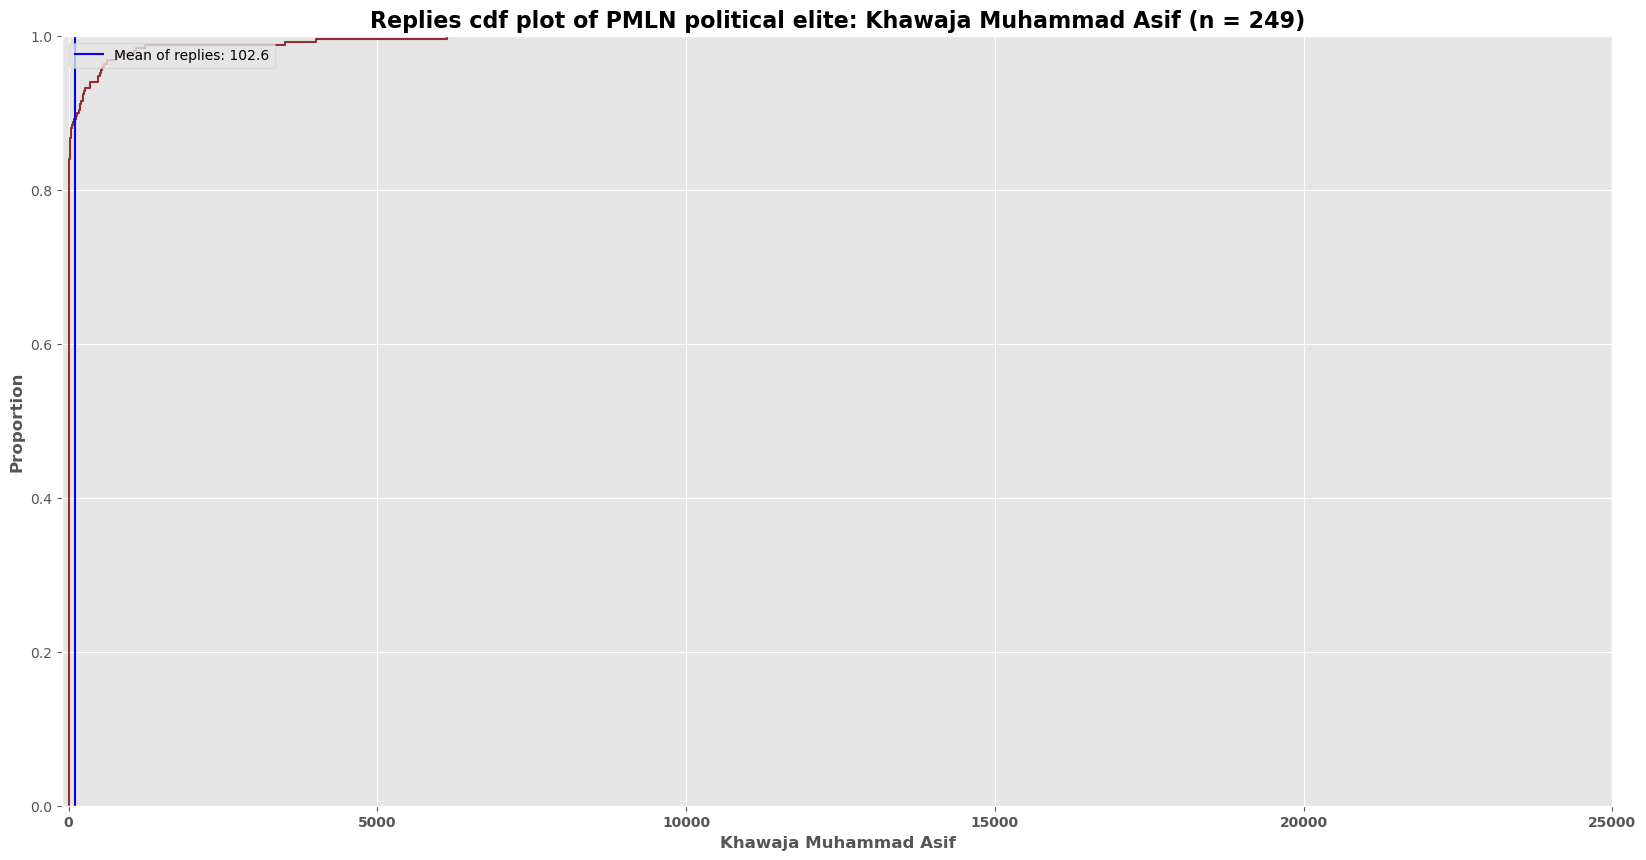

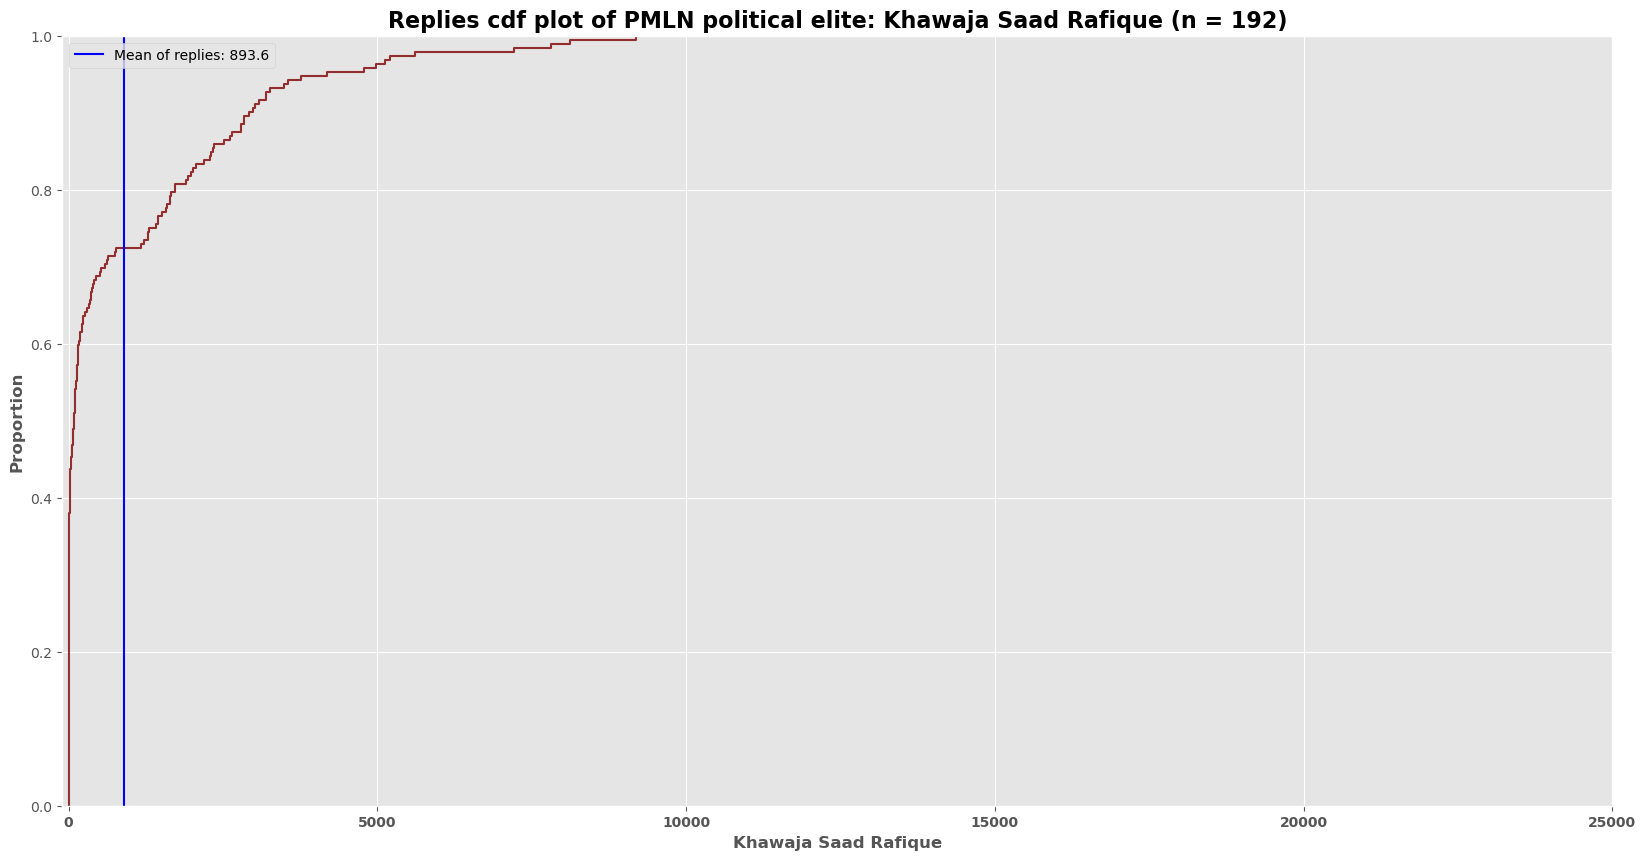

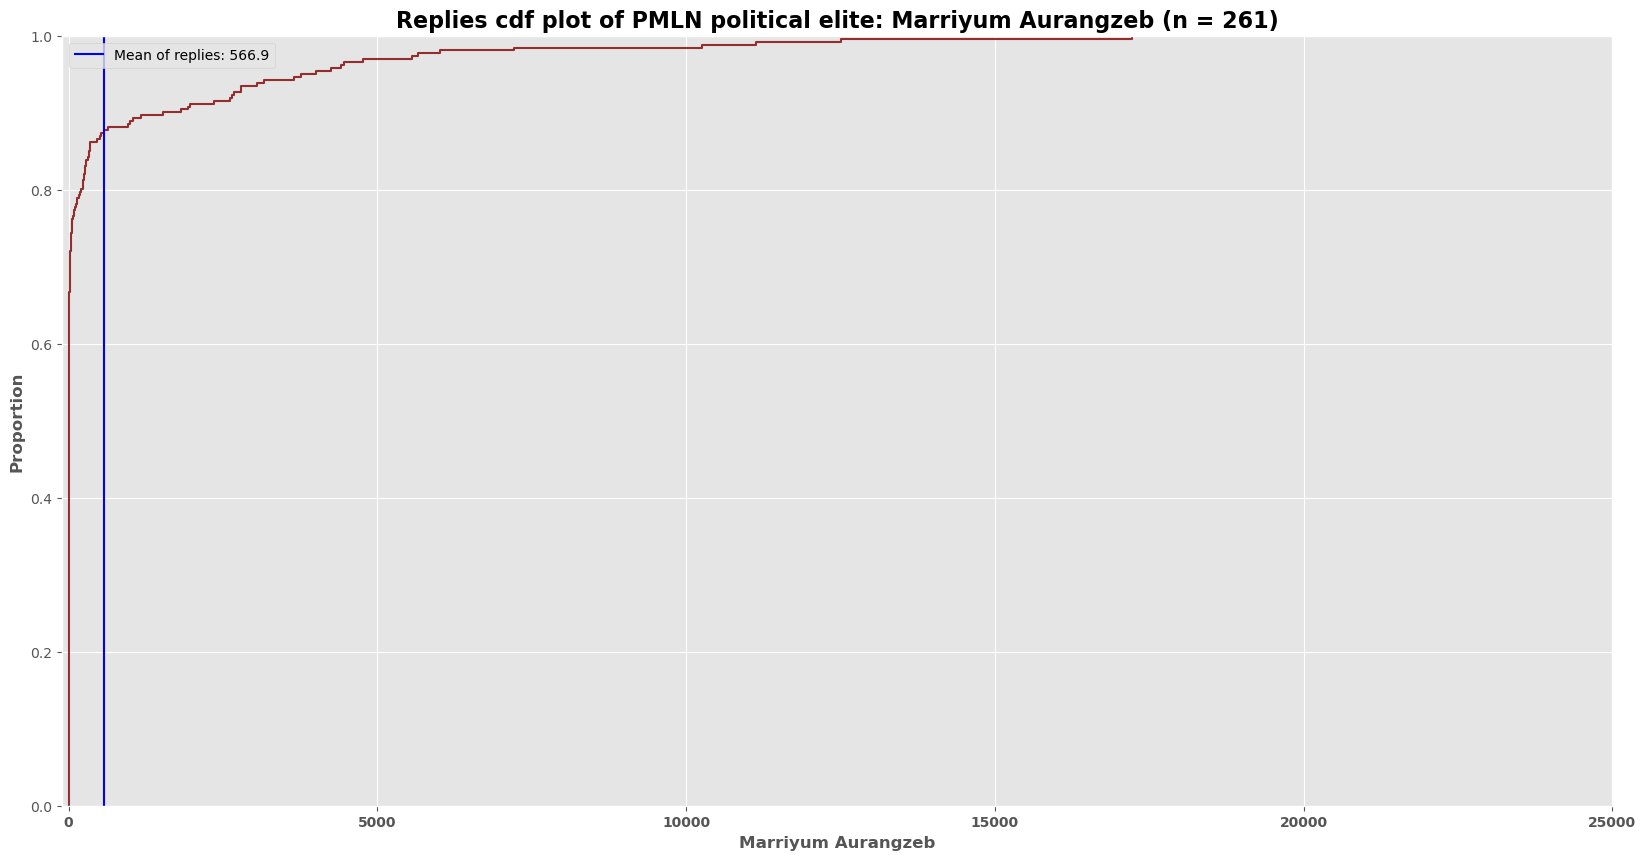

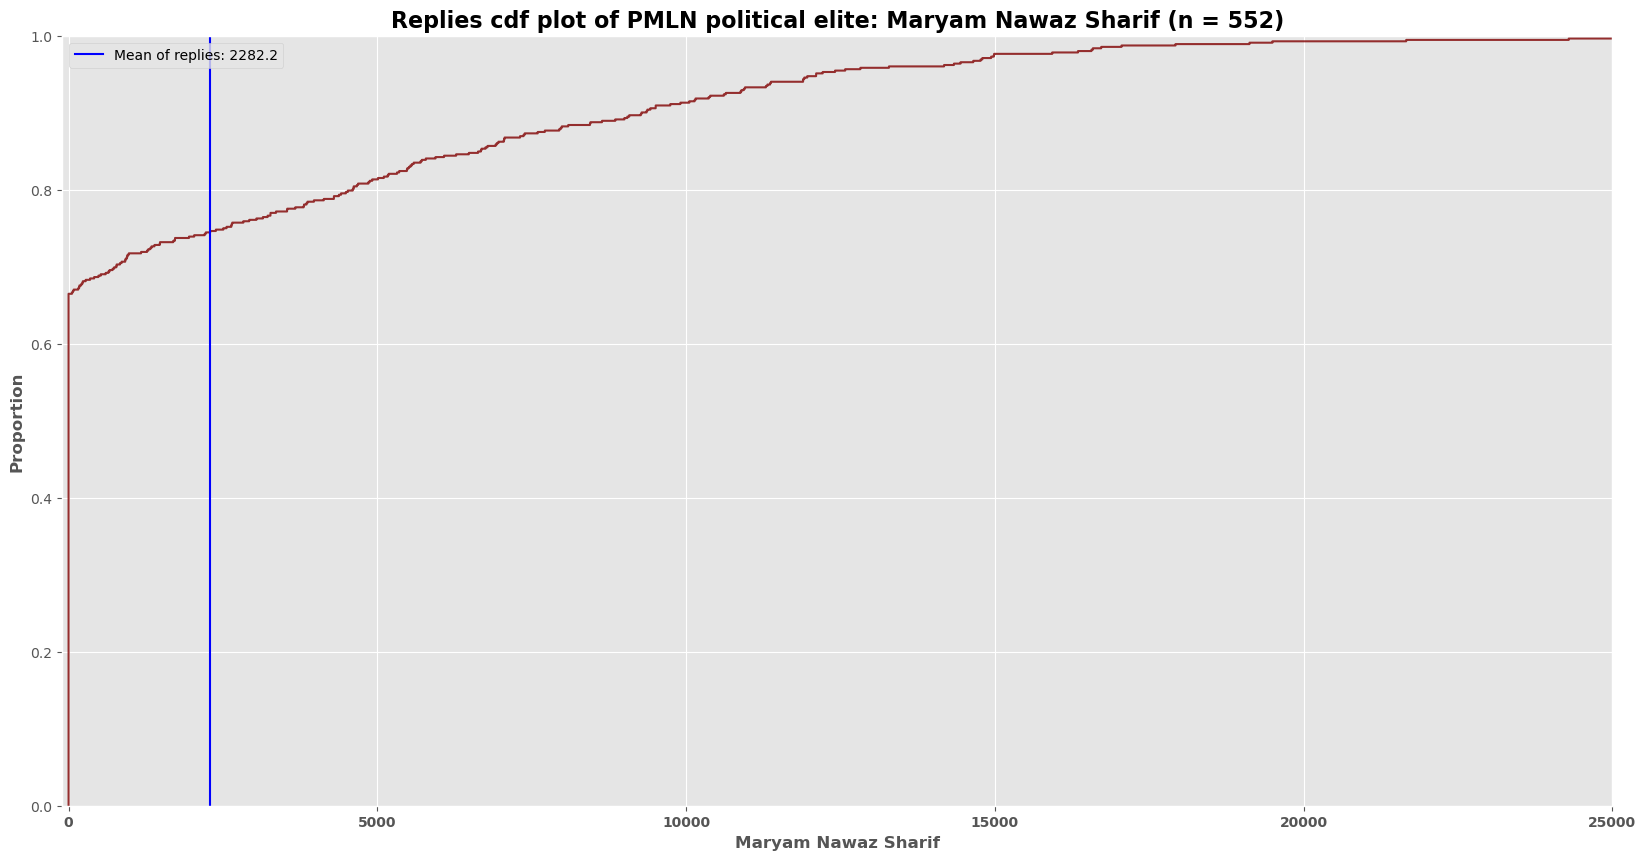

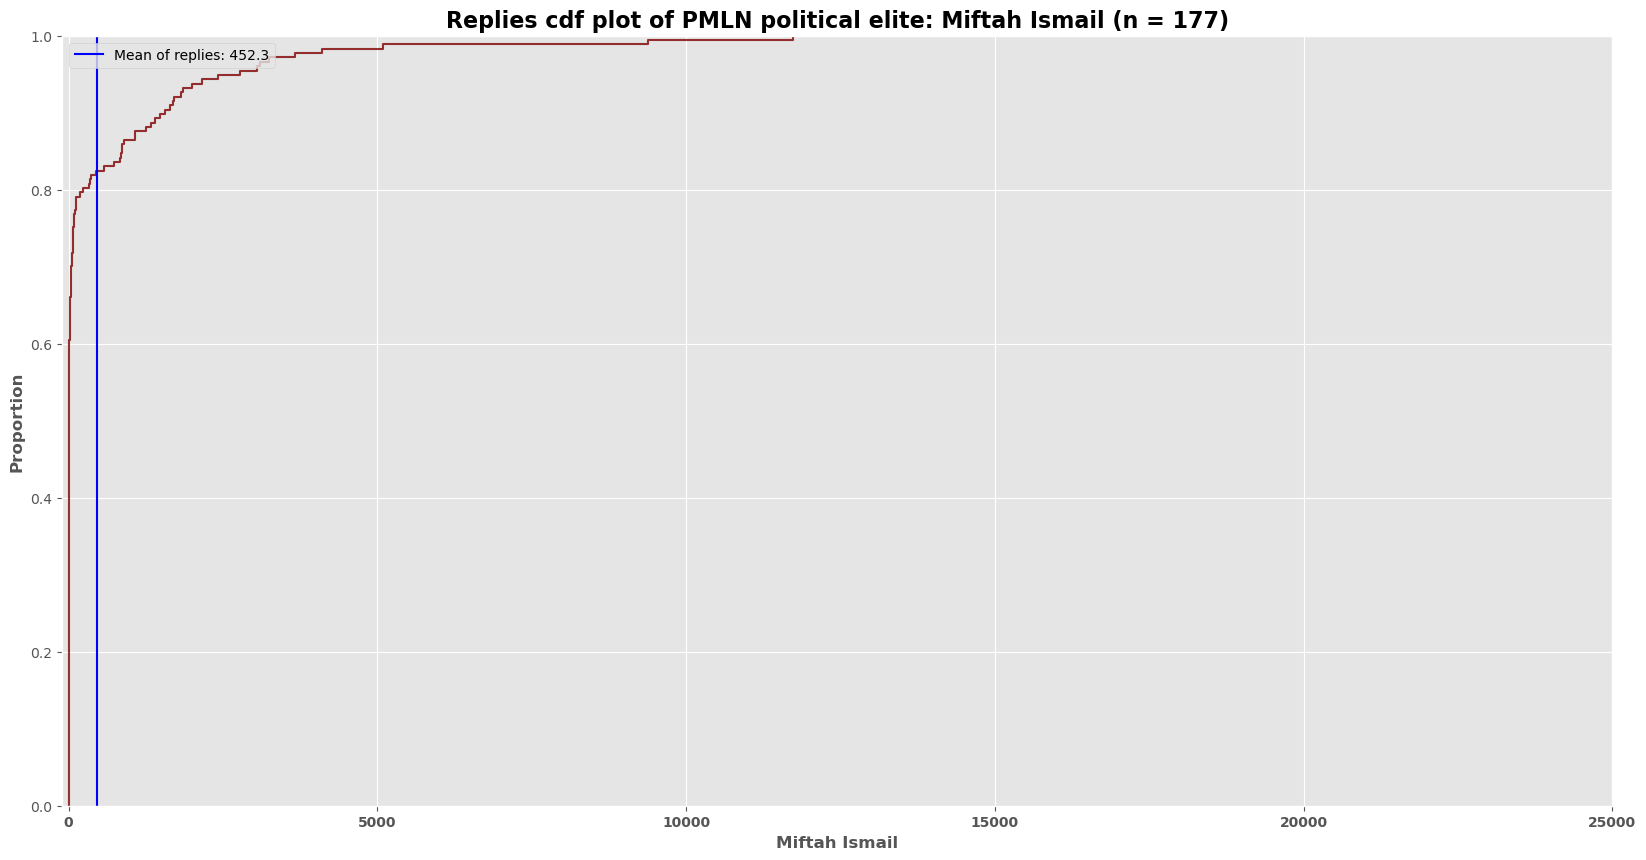

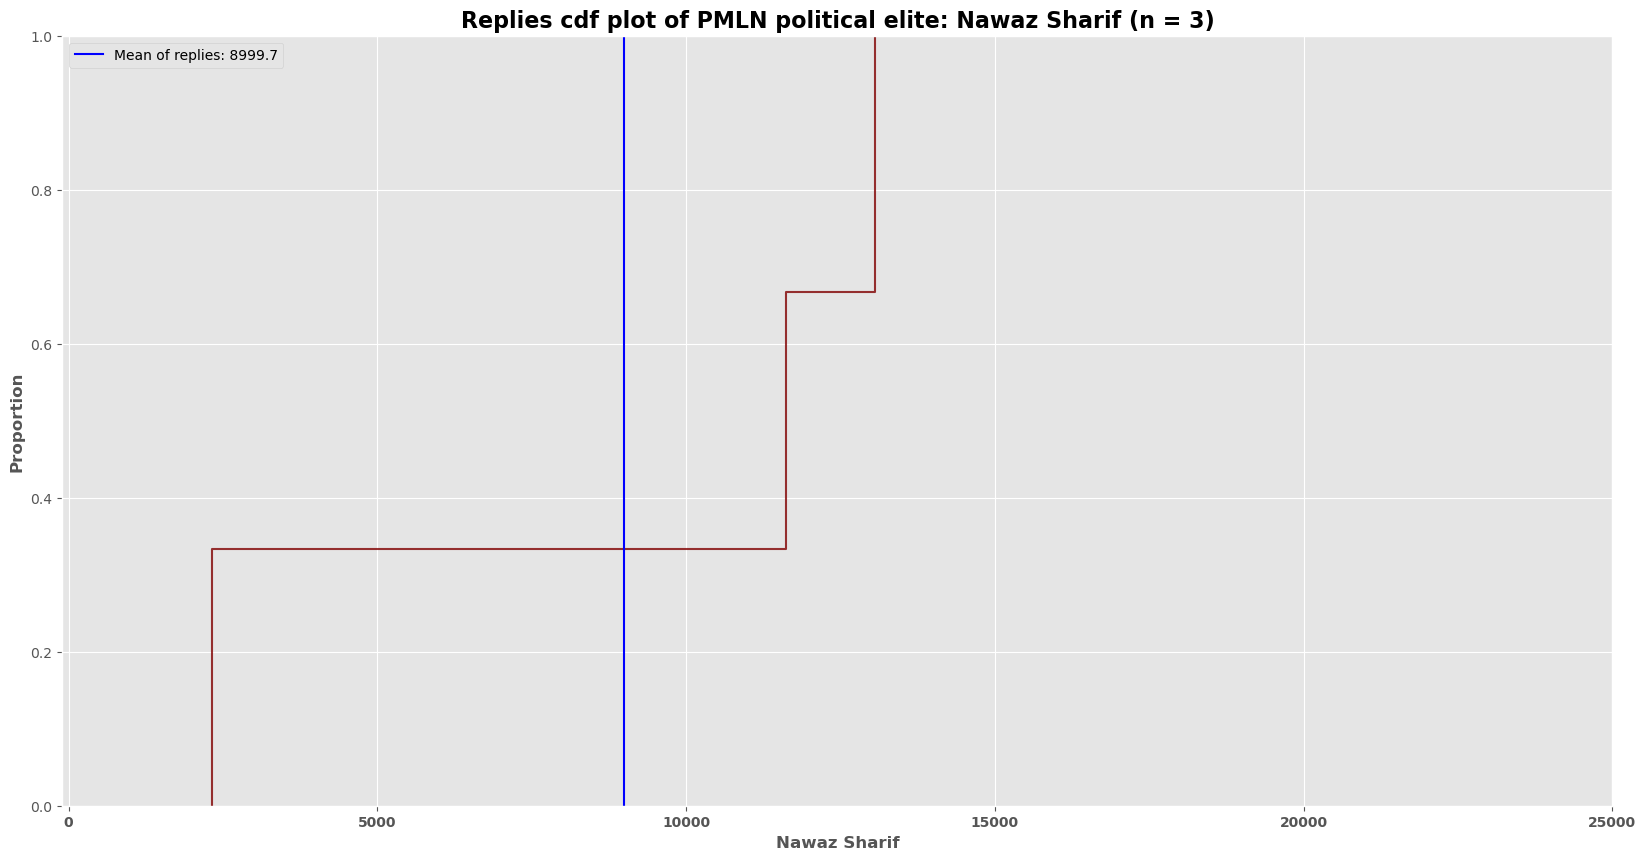

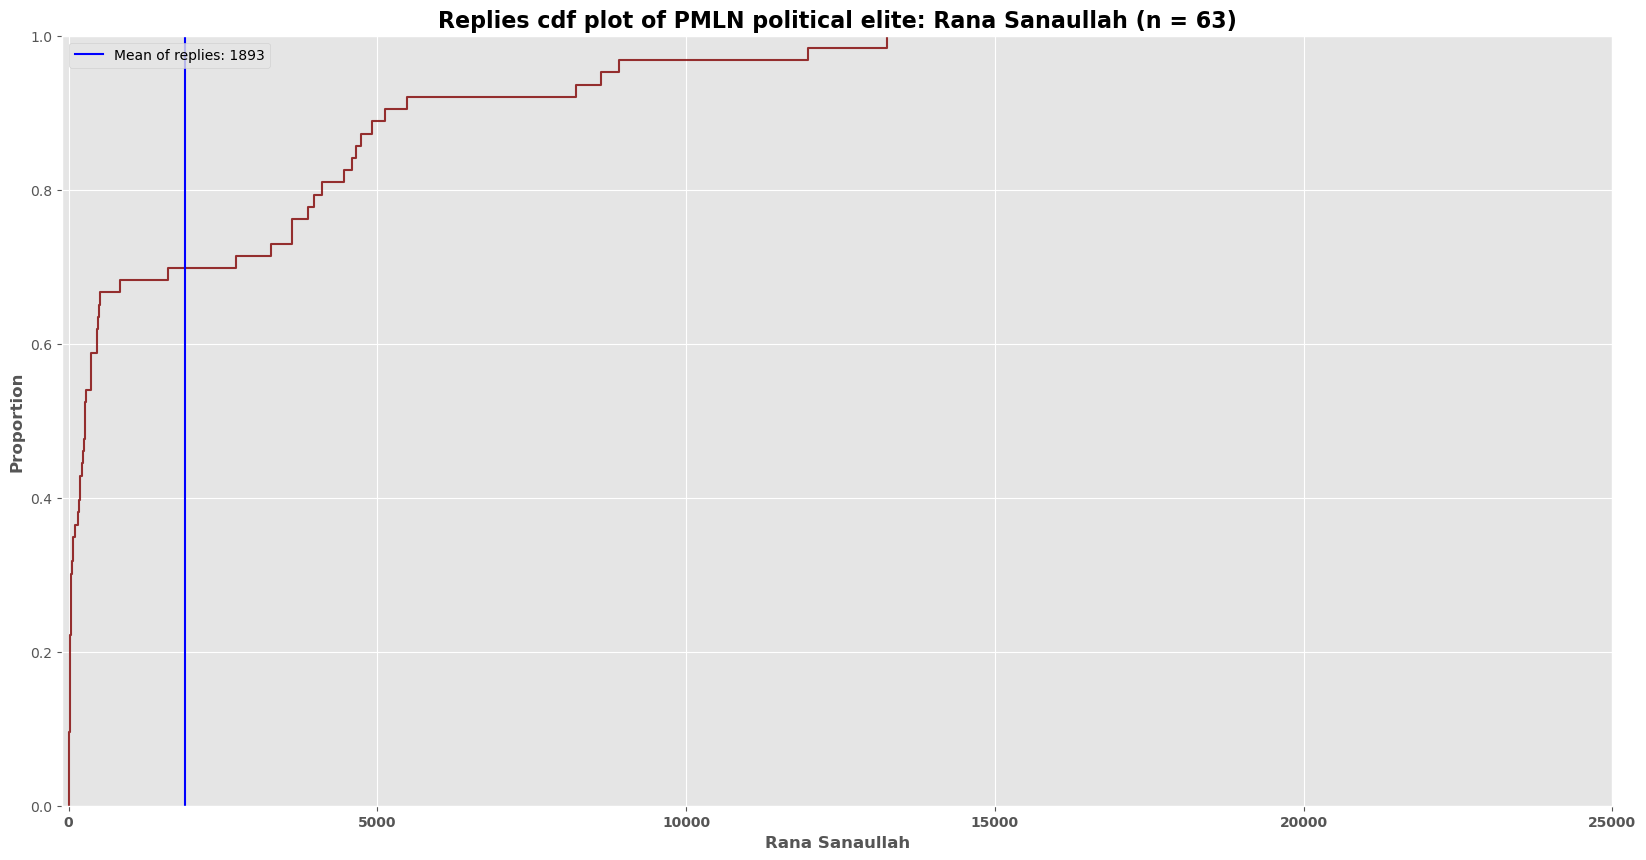

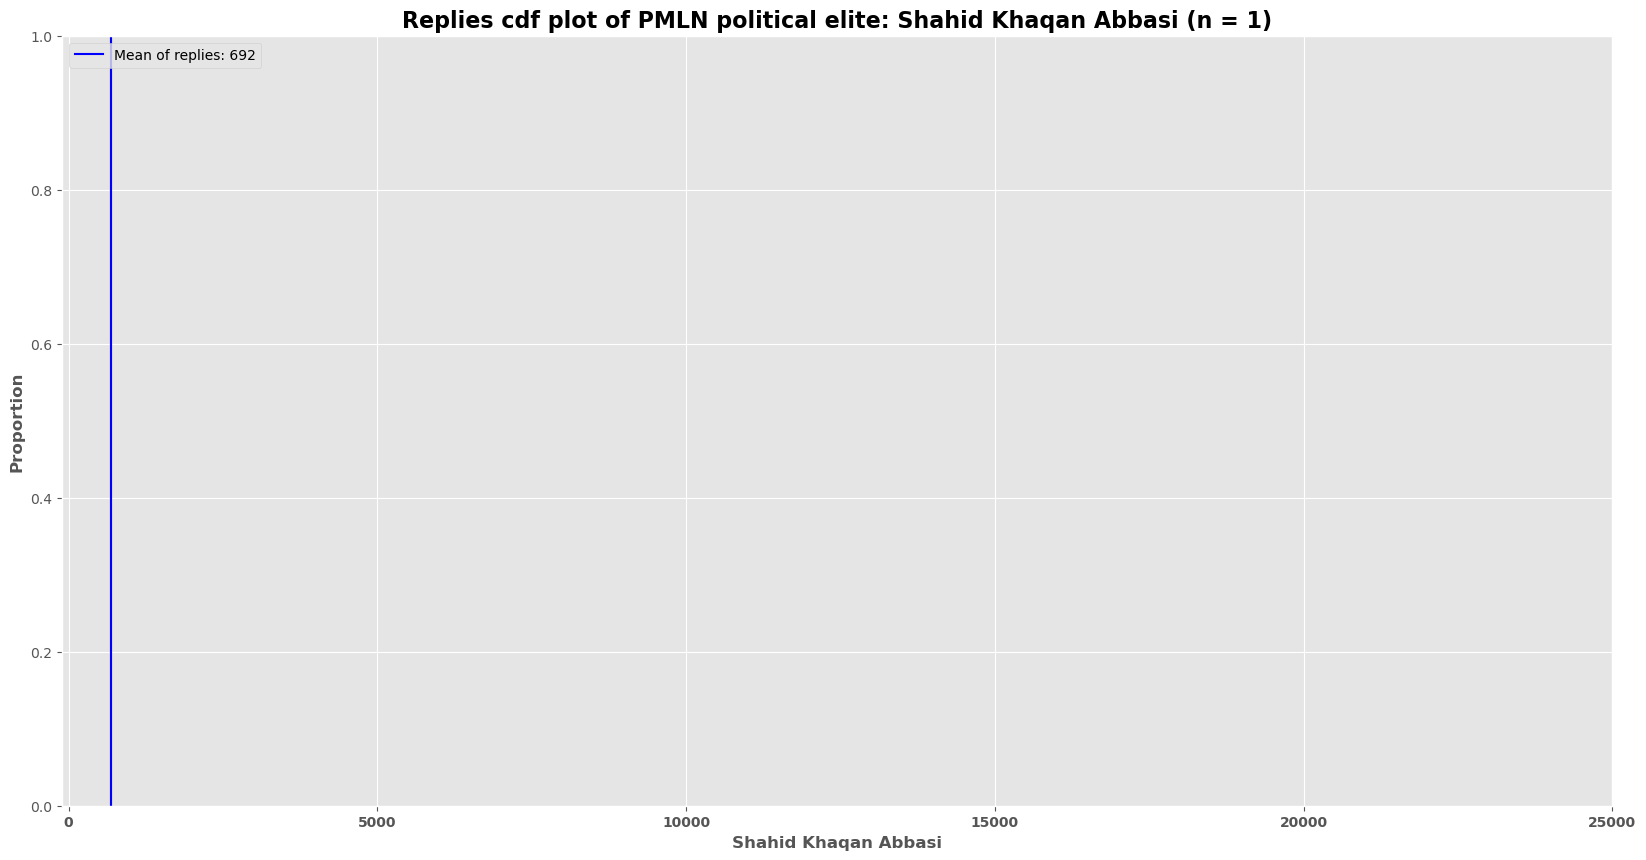

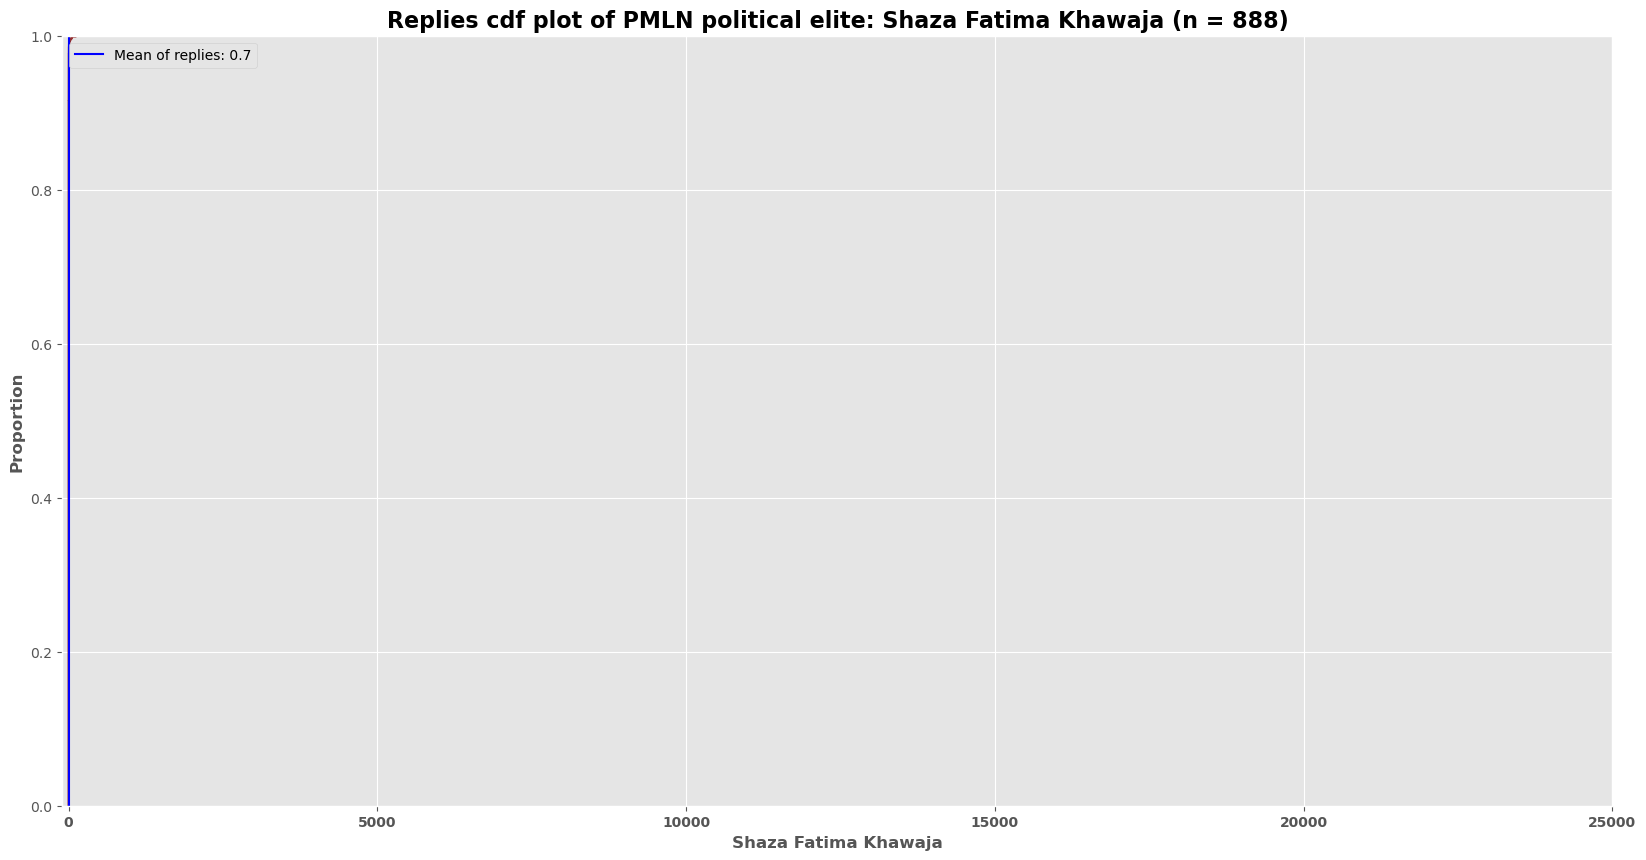

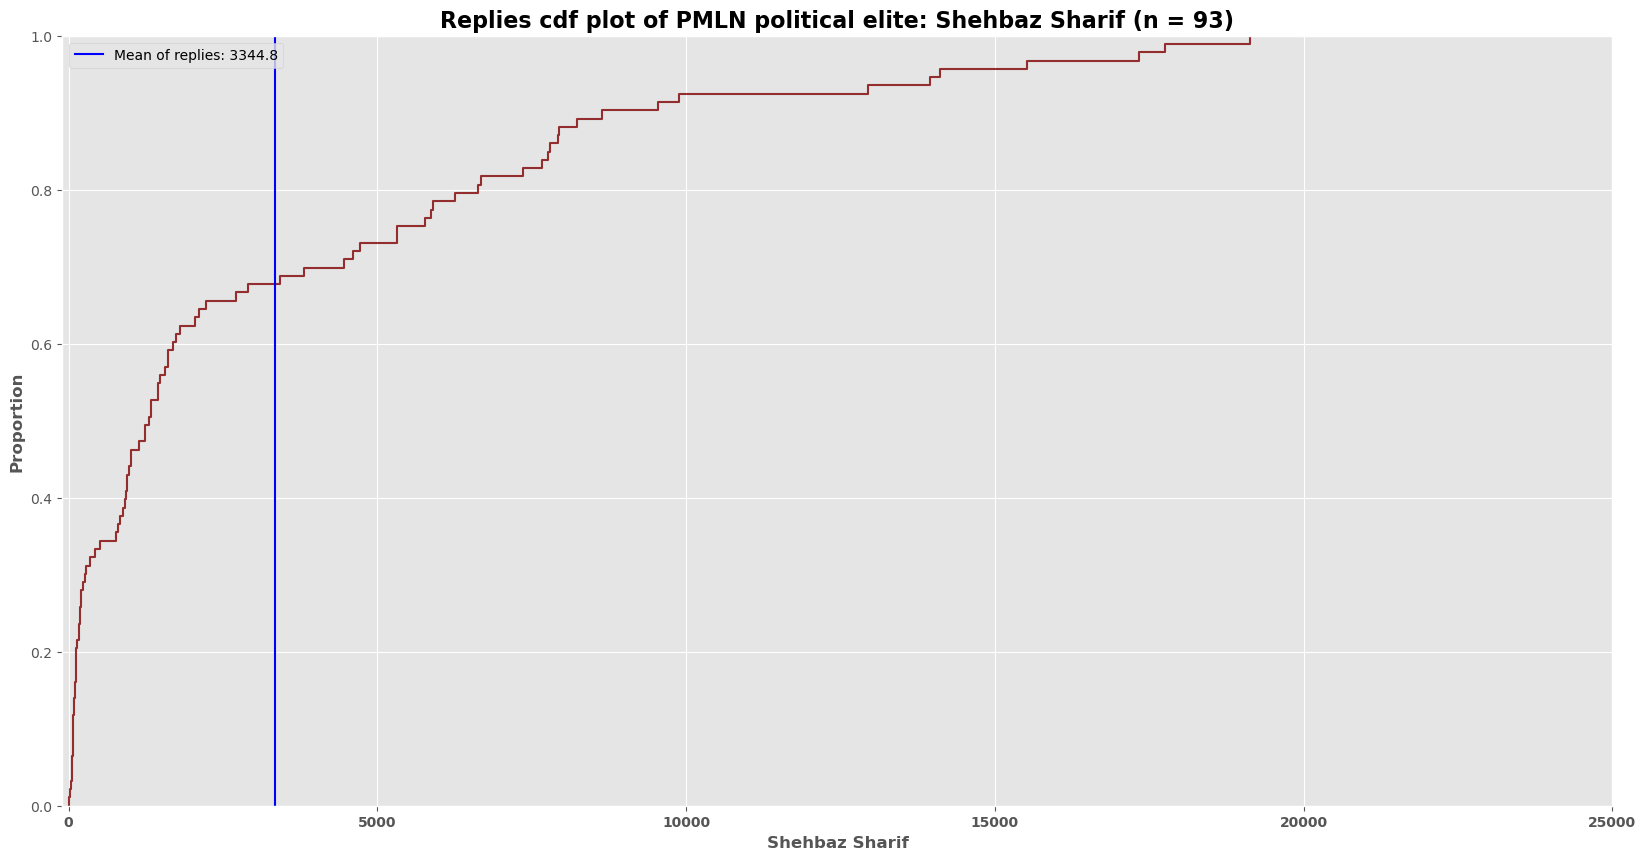

In [1917]:
j = 92
for i in range(len(PMLN_temp_3)):
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.ecdfplot(data=PMLN_temp_3['replies'][i], color='maroon', alpha=0.8, ax=ax)
    ax.axvline(x = mean(PMLN_temp_3['replies'][i]), color = 'b', label = 'Mean of replies: '+str(round(mean(PMLN_temp_3['replies'][i]),1)))
    ax.set_title('Replies cdf plot of PMLN political elite: ' + PMLN_temp_3.index[i]+ ' (n = '+str(len(PMLN_temp_3['replies'][i]))+')'  , fontsize=16, fontweight='bold')
    ax.set_xlabel(PMLN_temp_3.index[i], fontsize=12, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=12, fontweight='bold')
    labels = ax.get_xticklabels() 
    [label.set_fontweight('bold') for label in labels]
    ax.set_xlim(-100, 25000)
    ax.legend(loc='upper left')
    plt.savefig(str(j)+'.png', bbox_inches='tight')
    j += 1
    
plt.show()

#### Descriptive statistic 4: Links to news sources shared in tweets: mainstream media vs. others

In [1918]:
PTI['classification category'].unique()
PTI['classification category'] = PTI['classification category'].replace(['social media ', 'mainstream media ', 'unknown ', 'sports media ', 'unkown'], ['social media', 'mainstream media', 'unknown', 'sports media', 'unknown'])

In [1919]:
PTI['classification source'] = PTI['classification source'].replace(['24 news ', '24 news hd', 'Ary news','ary news ', 'capital tv ', 'comittee to protect journalists', 'dawn', 'dawn ', 'dawn news ', 'dunya, hum news ','dunya news ', 'express tribune ', 'gnn ', 'gnn', 'ptv national ', 'ptv parliment', 'siasat ', 'siasat', 'the news', 'the news international ', 'xinhaunet', 'nawaiwaqt group'], ['24 news', '24 news', 'ary news', 'ary news', 'capital tv', 'committee to protect journalists', 'dawn news', 'dawn news', 'dawn news', 'dunya news, hum news', 'dunya news', 'the express tribune', 'gnn news', 'gnn news', 'ptv national', 'ptv parliament', 'siasat pak', 'siasat pak', 'the news international', 'the news international', 'xinhuanet', 'nawaiwaqt epaper'])
PTI['classification source'] = PTI['classification source'].replace(['Tiktok', 'facebook ', 'tiktok ', 'twitter ', 'youtube '], ['tiktok', 'facebook', 'tiktok', 'twitter', 'youtube'])
PTI.loc[(PTI['classification source'] == 'ary news') | (PTI['classification source'] ==  'ary news, gnn, 92 news, bol news, hum news, dunya news') | (PTI['classification source'] == 'ptv parliament'), 'classification category'] = 'mainstream media'
PTI.loc[(PTI['classification source'] == 'ma') | (PTI['classification source'] ==  'no'), 'classification category'] = 'unknown'

In [1920]:
PTI.loc[PTI['classification category'] == "unknown", 'classification source'].unique()
PTI['classification source'] = PTI['classification source'].replace(['site can\'t be reached', 'site not opening', 'page does not exist', 'not available' ], ['url fails to open', 'url fails to open', 'url inaccessible', 'url inaccessible'])

In [1921]:
PTI['classification category'].unique()

array([nan, 'social media', 'mainstream media', 'unknown', 'sports media'],
      dtype=object)

In [1922]:
PTI['classification category'].value_counts()

social media        1091
mainstream media     431
unknown              226
sports media           3
Name: classification category, dtype: int64

In [1923]:
PMLN['classification category'].unique()
PMLN['classification category'] = PMLN['classification category'].replace(['social media ', 'socia media ', 'socia media'], ['social media', 'social media', 'social media'])

In [1924]:
PMLN['classification category'].unique()

array([nan, 'social media', 'mainstream media', 'unknown'], dtype=object)

In [1925]:
PMLN['classification source'] = PMLN['classification source'].replace(['24 urdu', 'abb tak news', 'arab news pakistan', 'app news', 'dawn', 'dunya, samaa news', 'dunya, samaa news ', 'gnn ', 'jang ', 'national press club islamabad', 'nawaiwaqt', 'naya daur urdu', 'neonetwork', 'siasat', 'express tribune', 'tribune', 'jang'], ['24 news', 'abb takk news', 'arab news', 'ap news', 'dawn news', 'dunya news, samaa news', 'dunya news, samaa news', 'gnn news', 'jang news', 'national press club pakistan', 'nawaiwaqt epaper', 'naya daur news', 'neo news', 'siasat pak', 'the express tribune', 'the express tribune', 'jang news'])
PMLN['classification source'] = PMLN['classification source'].replace(['ajuris avocates and corporate counsel', 'bloomberg', 'good things ', 'pmln ', 'pti ', 'propakistani', 'pmln ig tv', 'social digitally '],['ajuris advocates and corporate counsel', 'bloomberg terminal','good things','pmln', 'pti', 'pro pakistani', 'pmln', 'social digitally'])
PMLN.loc[(PMLN['classification source'] == 'govt of pakistan') | (PMLN['classification source'] ==  'govt saudi arabia') | (PMLN['classification source'] == 'social digitally') | (PMLN['classification source'] == 'national geographic'), 'classification category'] = 'social media'
PMLN.loc[(PMLN['classification source'] == '24 news') | (PMLN['classification source'] == 'arab 21 news') | (PMLN['classification source'] == 'ary news') | (PMLN['classification source'] == 'dawn news') | (PMLN['classification source'] == 'geo news') , 'classification category'] = 'mainstream media'

In [1926]:
PMLN.loc[PMLN['classification category'] == "unknown", 'classification source'].unique()
PMLN['classification source'] = PMLN['classification source'].replace(['mssing url', 'tweet deleted', 'page does not exist', 'no access to tweet'], ['missing url', 'url inaccessible', 'url fails to open', 'url fails to open'])


In [1927]:
PMLN['classification category'].value_counts()

social media        860
mainstream media    355
unknown             139
Name: classification category, dtype: int64

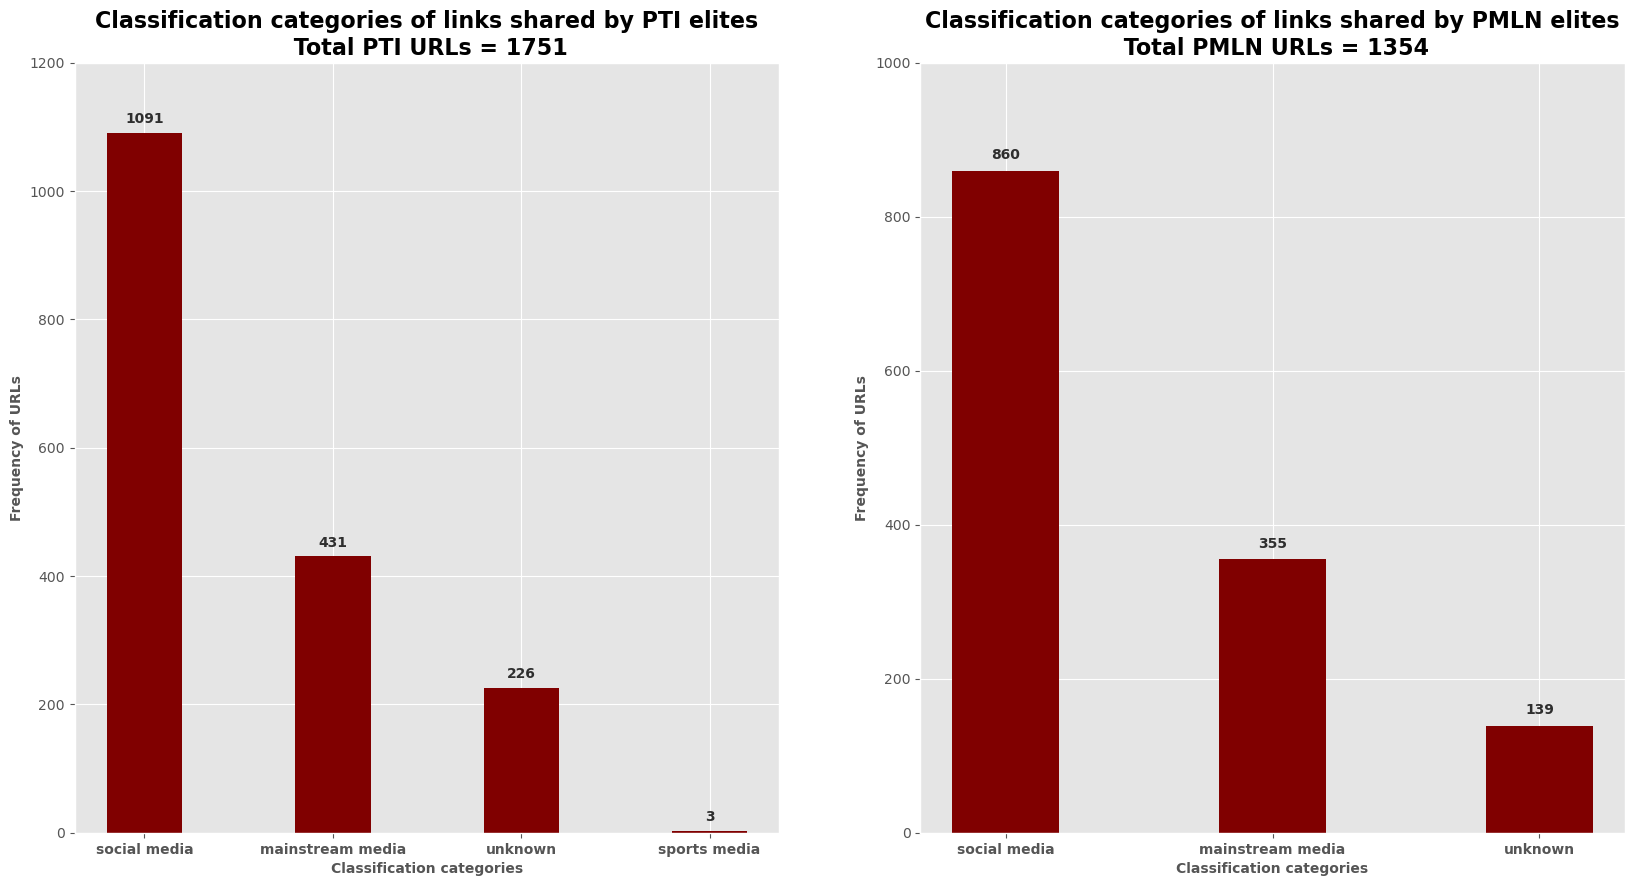

In [1928]:
plt.subplot(1,2, 1) # row 1, col 2 index 1

plt.bar(PTI['classification category'].value_counts().index,PTI['classification category'].value_counts(), color='maroon', width=0.4)
plt.xlabel('Classification categories', fontsize=10, fontweight='bold')
plt.ylabel('Frequency of URLs', fontsize=10, fontweight='bold')
plt.title('Classification categories of links shared by PTI elites\n Total PTI URLs = '+ str(PTI['links'].value_counts().sum()), fontsize=16, fontweight='bold')
addlabels(PTI['classification category'].value_counts().index,PTI['classification category'].value_counts())
ax = plt.gca()
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
ax.set_ylim(0, 1200)
fig = plt.gcf()
fig.set_size_inches(20, 10)


plt.subplot(1,2, 2) 
plt.bar(PMLN['classification category'].value_counts().index,PMLN['classification category'].value_counts(), color='maroon', width=0.4)
plt.xlabel('Classification categories', fontsize=10, fontweight='bold')
plt.ylabel('Frequency of URLs', fontsize=10, fontweight='bold')
plt.title('Classification categories of links shared by PMLN elites\n Total PMLN URLs = '+ str(PMLN['links'].value_counts().sum()), fontsize=16, fontweight='bold')
addlabels(PMLN['classification category'].value_counts().index,PMLN['classification category'].value_counts())
ax = plt.gca()
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
ax.set_ylim(0, 1000)
fig = plt.gcf()
fig.set_size_inches(20, 10)

plt.savefig('108.png', bbox_inches='tight')

plt.show()

In [1929]:
z = PTI.dropna()
PTI_temp_3 = z.groupby(by=z['politician']).agg(list)
data_PTI = PTI_temp_3['classification category']
data_PTI

politician
Ali Muhammad            [social media, social media, social media, soc...
Asad Qaiser             [mainstream media, social media, social media,...
Asad Umar               [social media, social media, mainstream media,...
Dr. Yasmin Rashid       [social media, social media, unknown, social m...
Fawad Chaudhry          [unknown, social media, mainstream media, main...
Hammad Azhar            [social media, social media, social media, soc...
Imran Khan              [social media, social media, social media, soc...
Murad Saeed             [mainstream media, social media, social media,...
Naureen Ibrahim         [unknown, mainstream media, social media, unkn...
Qasim Khan Suri         [social media, social media, mainstream media,...
Shabaz Gill             [social media, social media, social media, soc...
Shafqat Mahmood         [social media, social media, unknown, unknown,...
Shah Mehmood Qureshi    [social media, social media, mainstream media,...
Shehryar Afridi         [so

In [1930]:
for i in range(len(data_PTI)):
    counts = collections.Counter(PTI_temp_3['classification category'][i])
    names = counts.keys()
    values = counts.values()
    names = [x for _, x in sorted(zip(values, names), reverse=True)]
    values = sorted(values, reverse=True)
    print(counts, names,values)

Counter({'social media': 133, 'mainstream media': 27, 'unknown': 13}) ['social media', 'mainstream media', 'unknown'] [133, 27, 13]
Counter({'social media': 24, 'mainstream media': 2}) ['social media', 'mainstream media'] [24, 2]
Counter({'social media': 15, 'mainstream media': 7, 'unknown': 1}) ['social media', 'mainstream media', 'unknown'] [15, 7, 1]
Counter({'social media': 19, 'mainstream media': 14, 'unknown': 11}) ['social media', 'mainstream media', 'unknown'] [19, 14, 11]
Counter({'social media': 108, 'mainstream media': 76, 'unknown': 41, 'sports media': 3}) ['social media', 'mainstream media', 'unknown', 'sports media'] [108, 76, 41, 3]
Counter({'social media': 58, 'unknown': 23, 'mainstream media': 17}) ['social media', 'unknown', 'mainstream media'] [58, 23, 17]
Counter({'social media': 30, 'mainstream media': 4}) ['social media', 'mainstream media'] [30, 4]
Counter({'social media': 47, 'mainstream media': 26, 'unknown': 23}) ['social media', 'mainstream media', 'unknown']

In [1931]:
def addlabels_2(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.15,y[i],ha = 'center',color = "black", alpha=0.8, fontweight='bold')

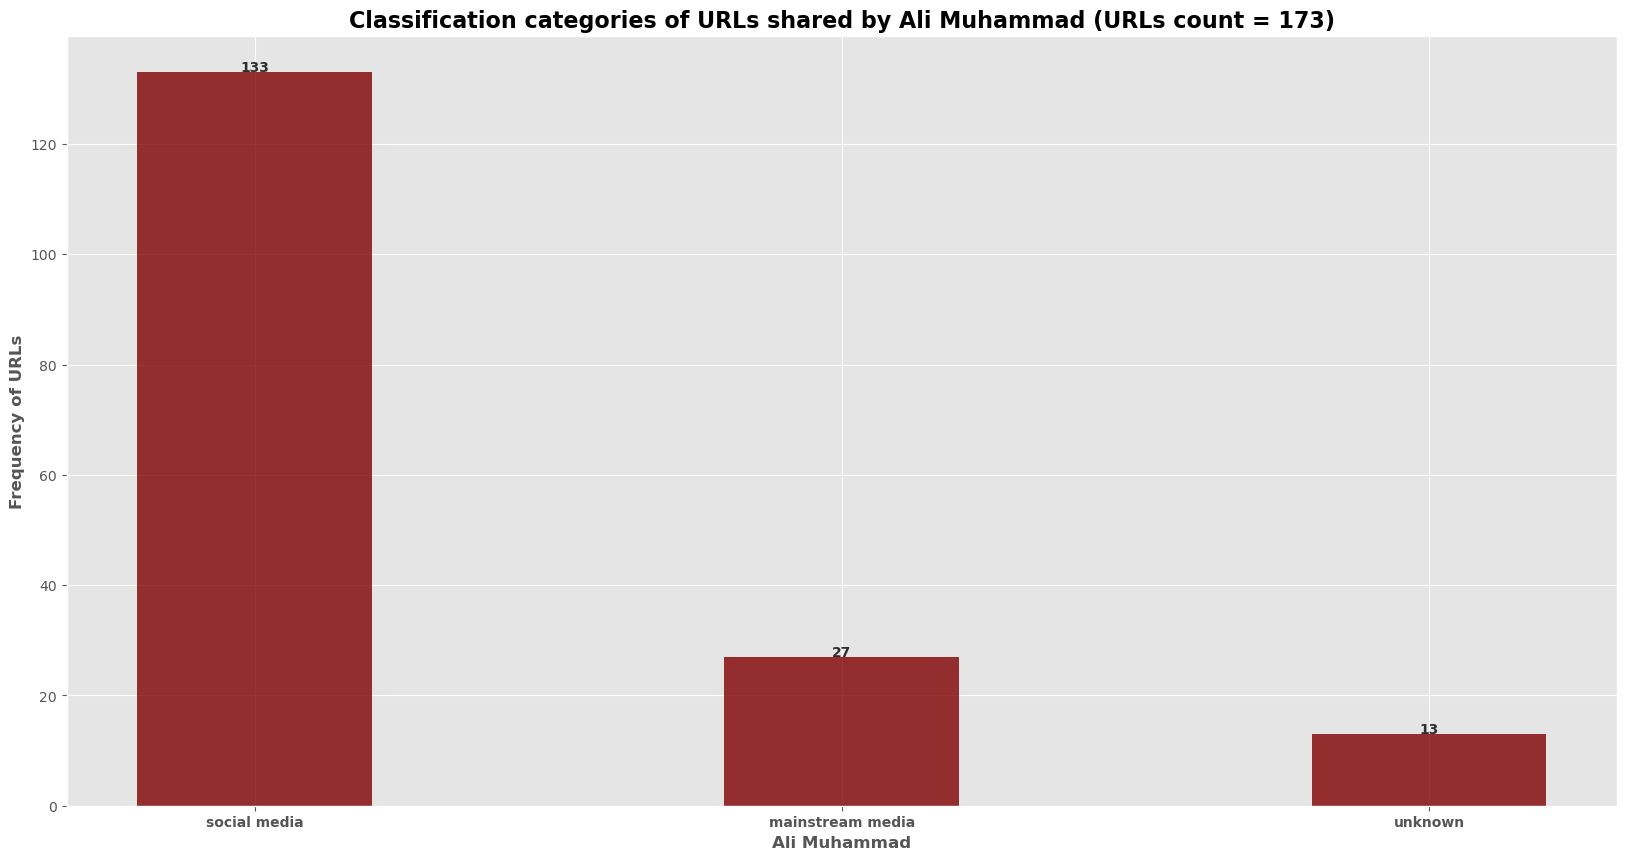

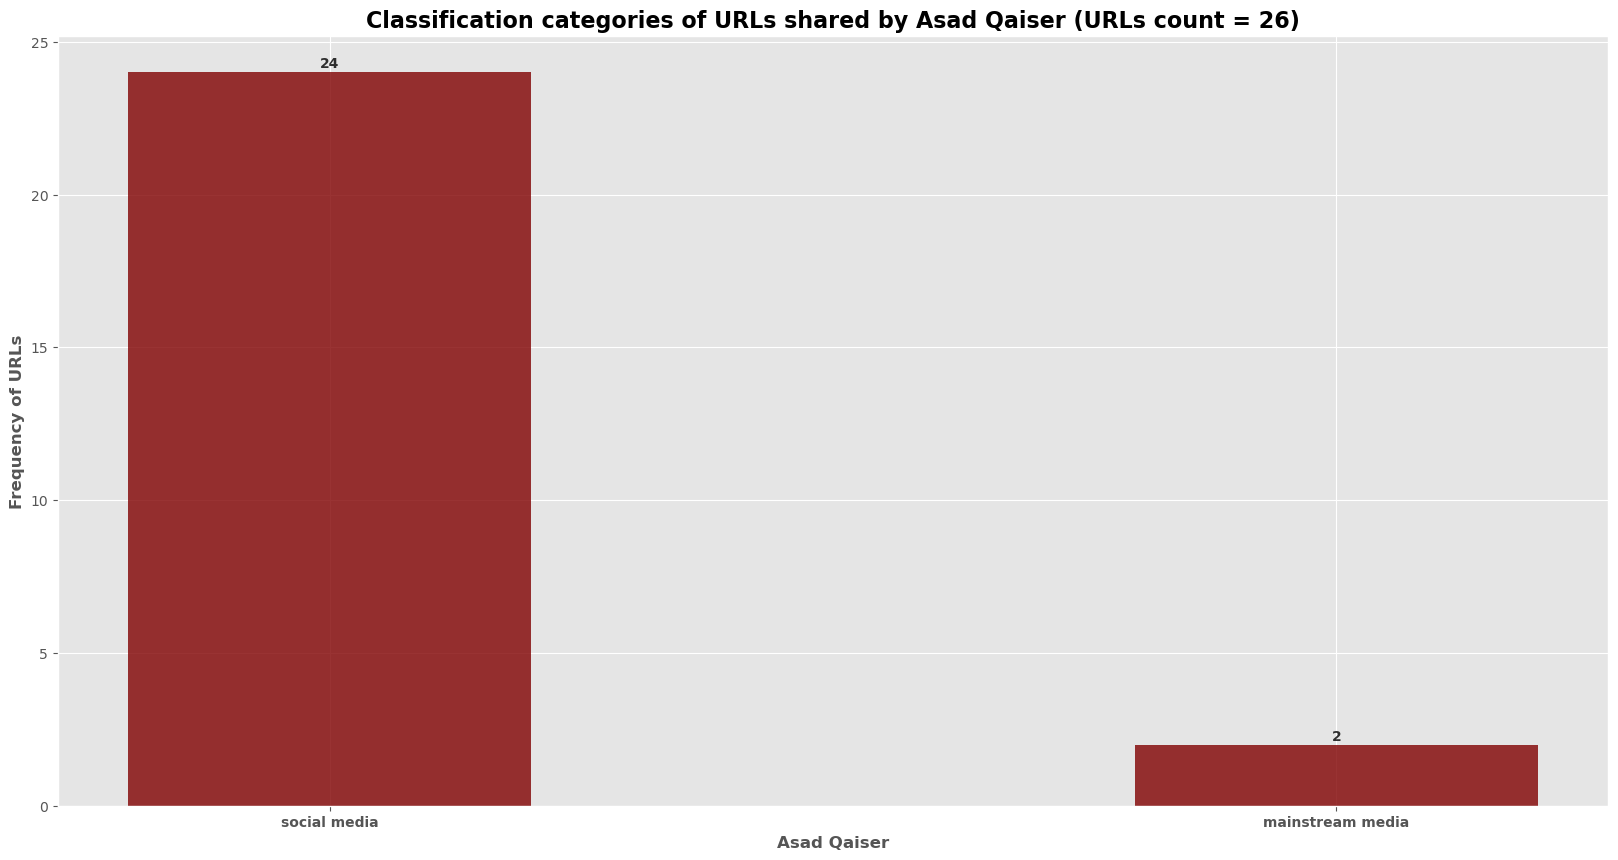

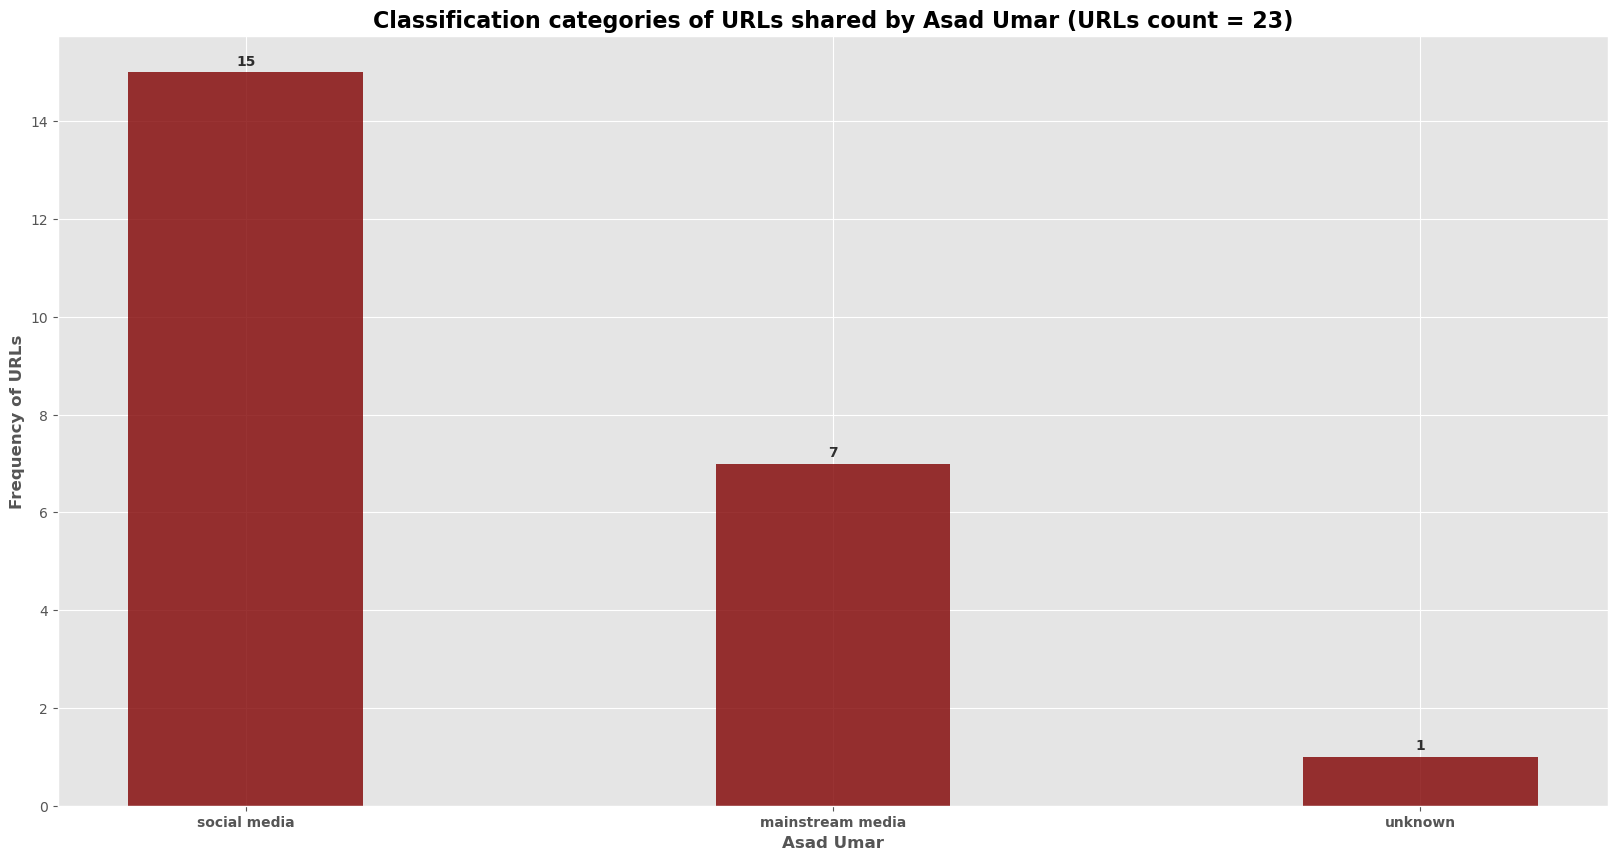

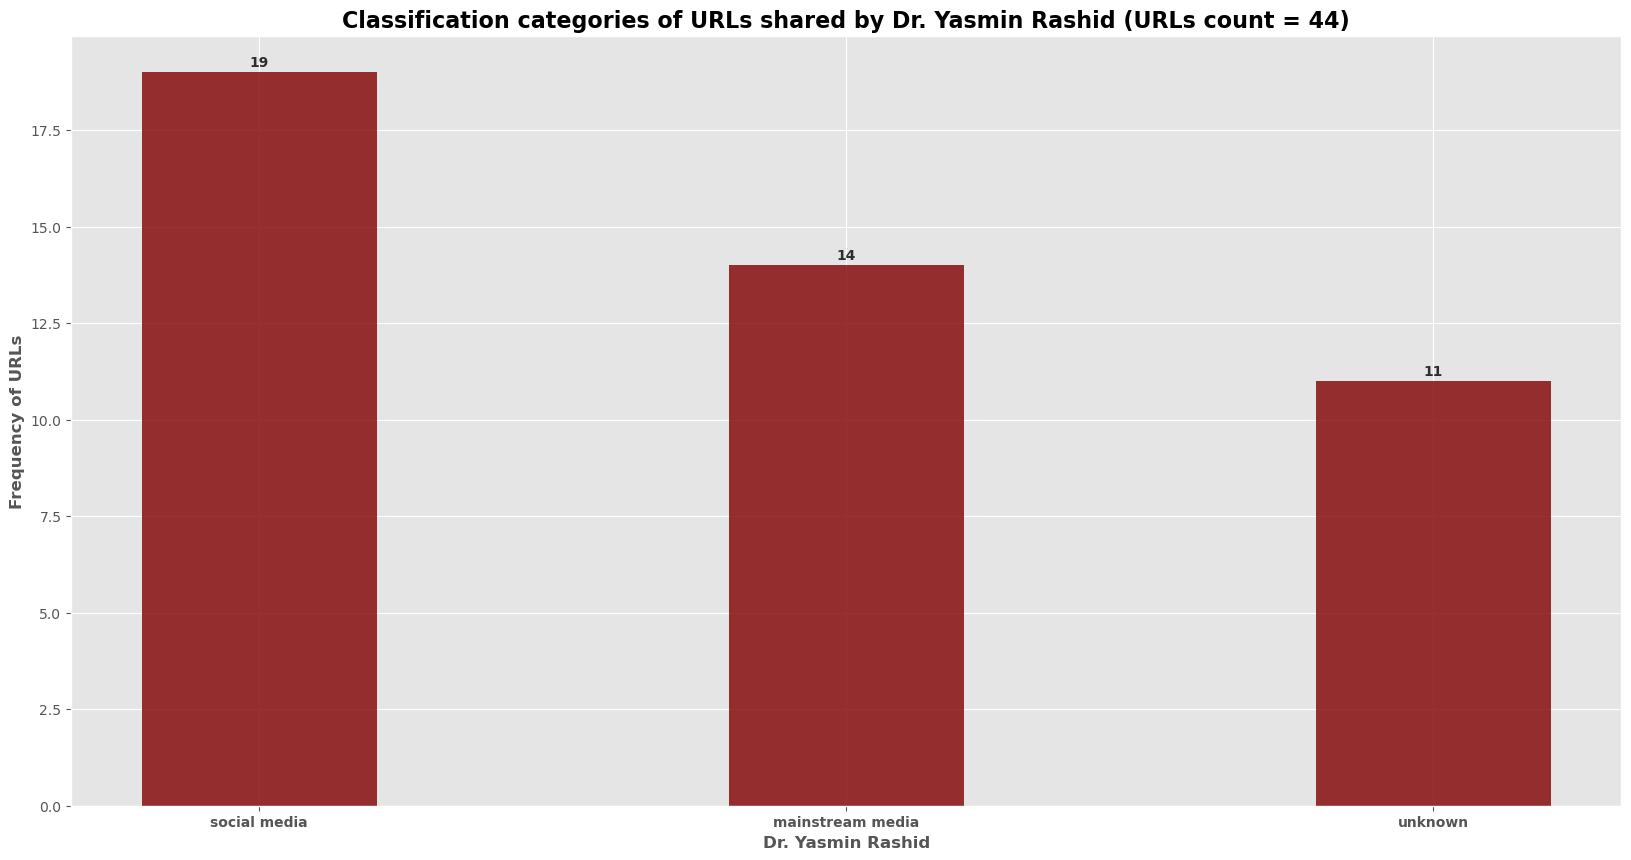

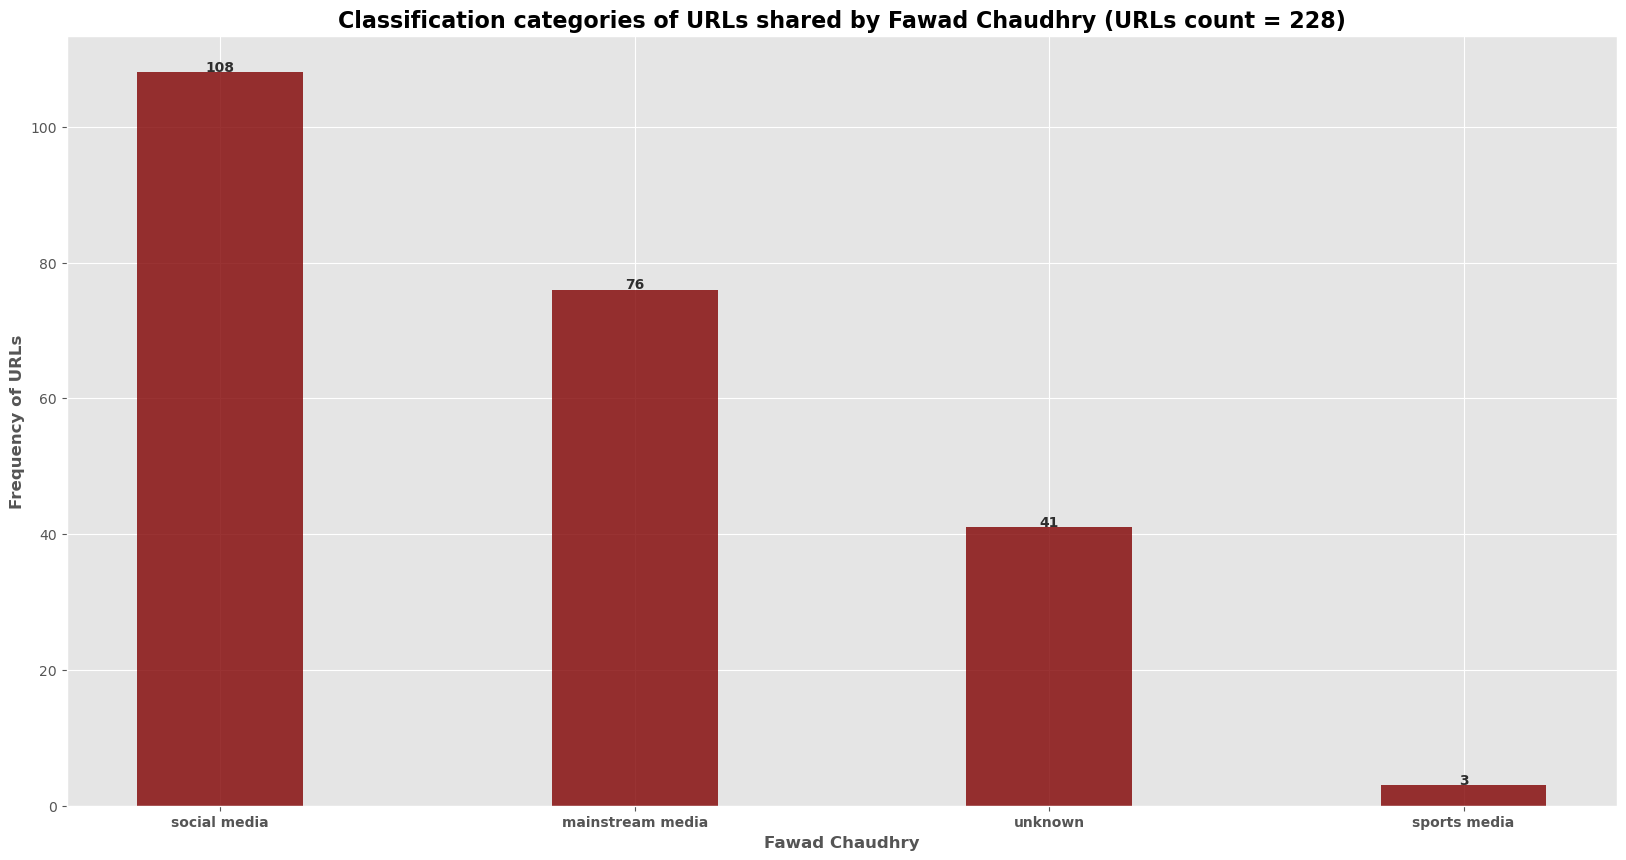

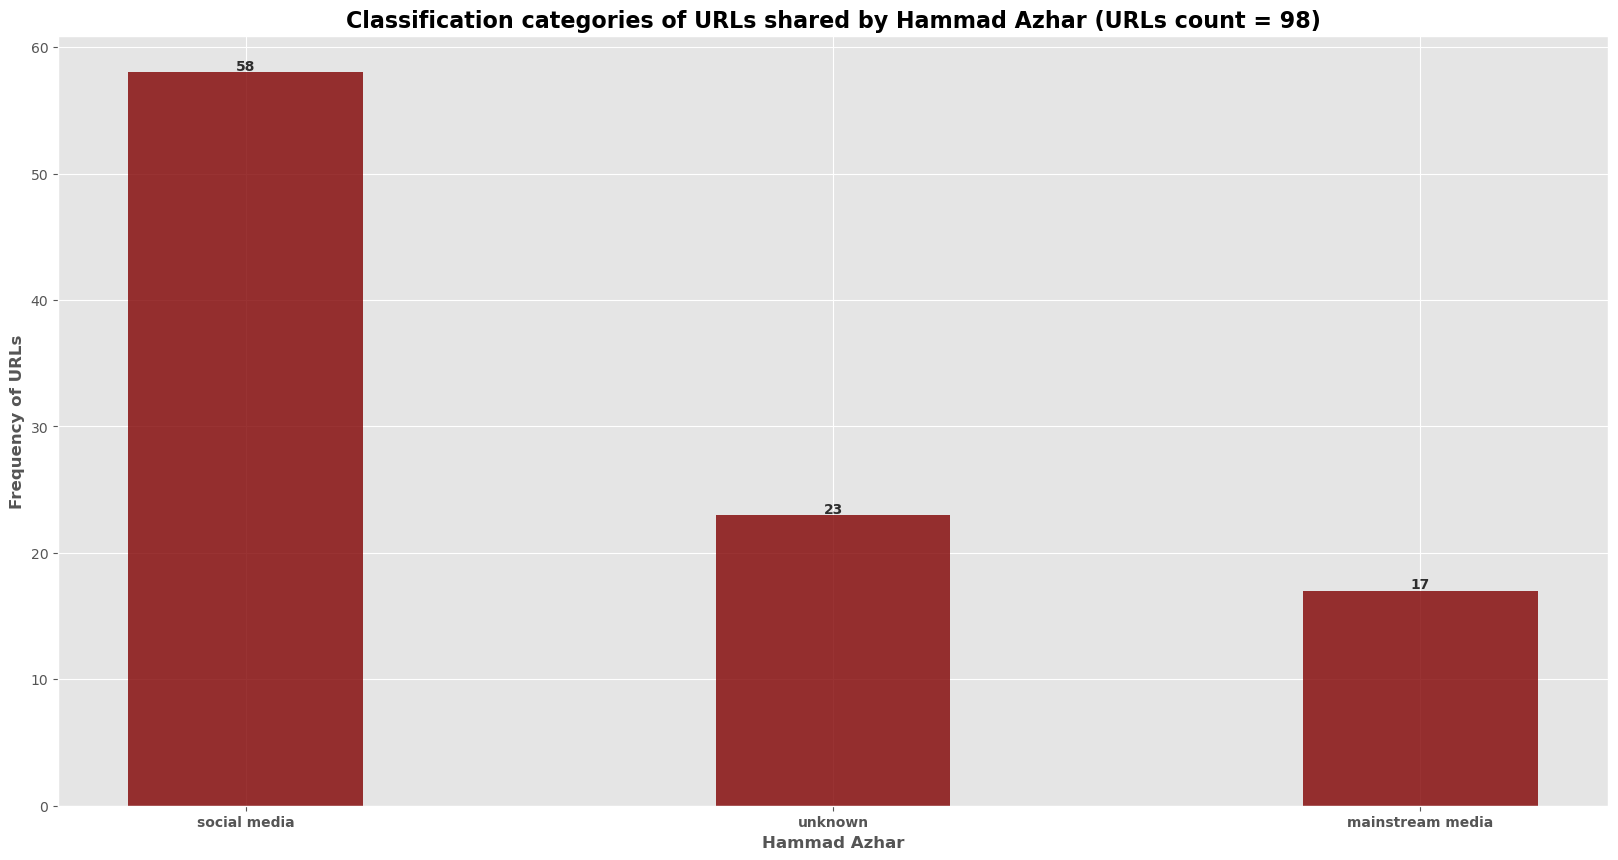

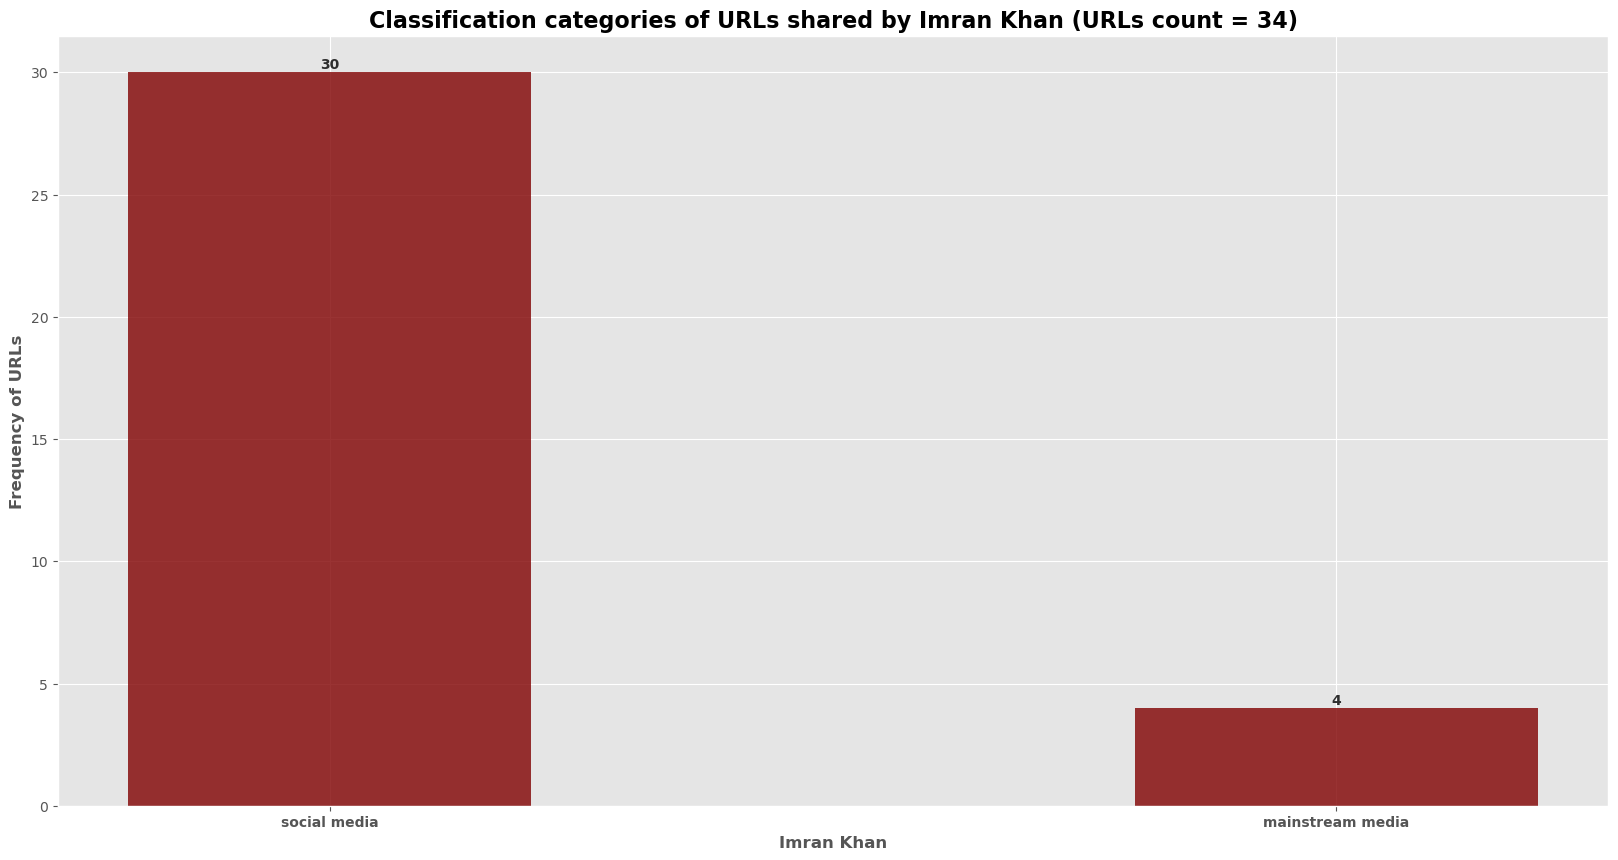

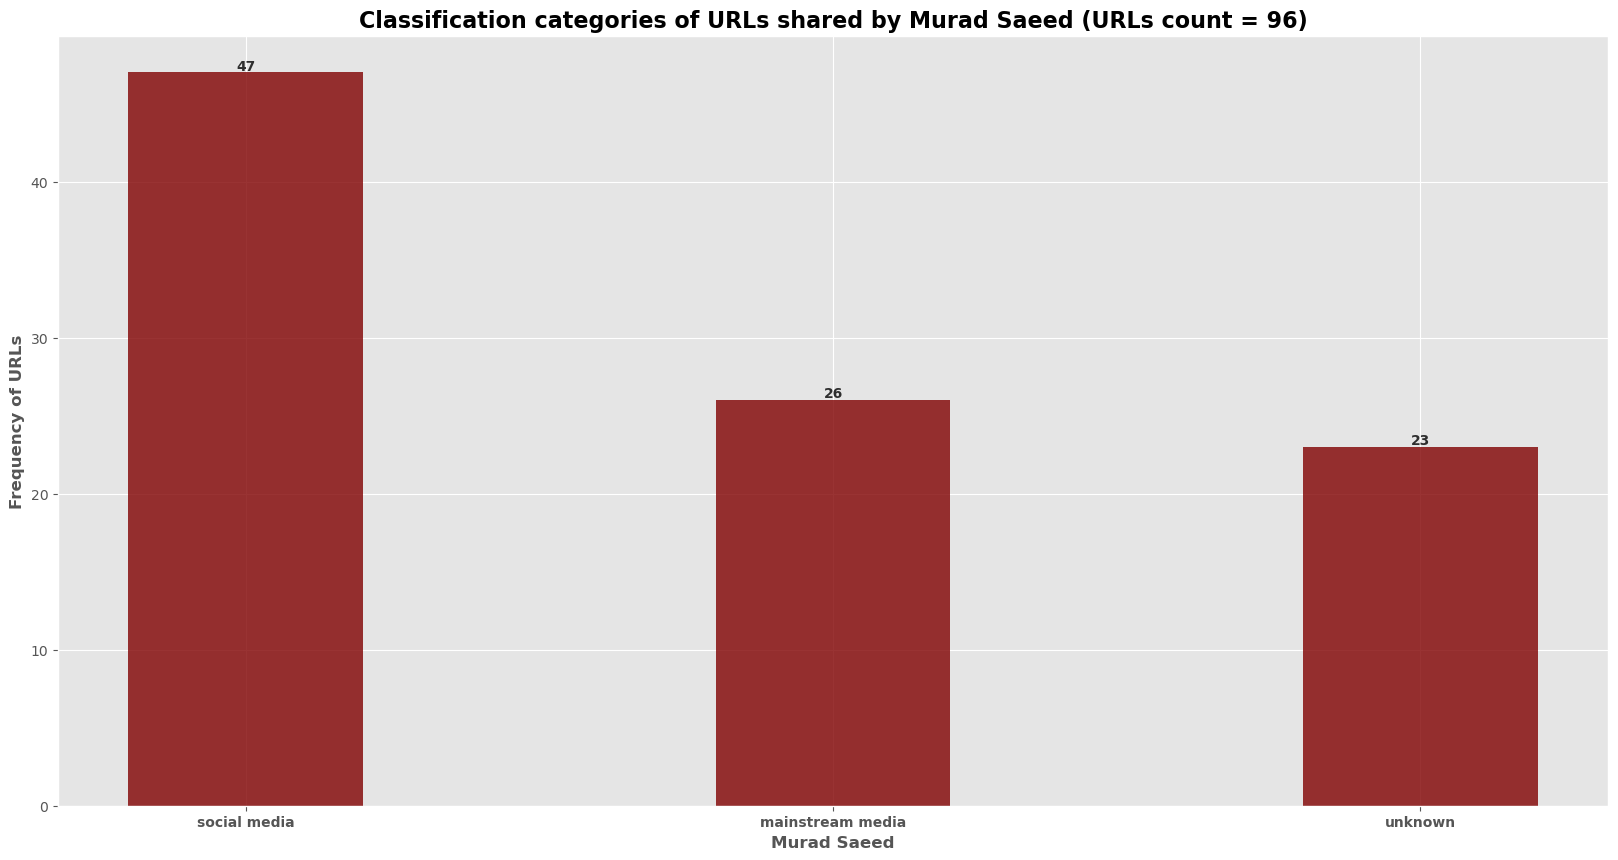

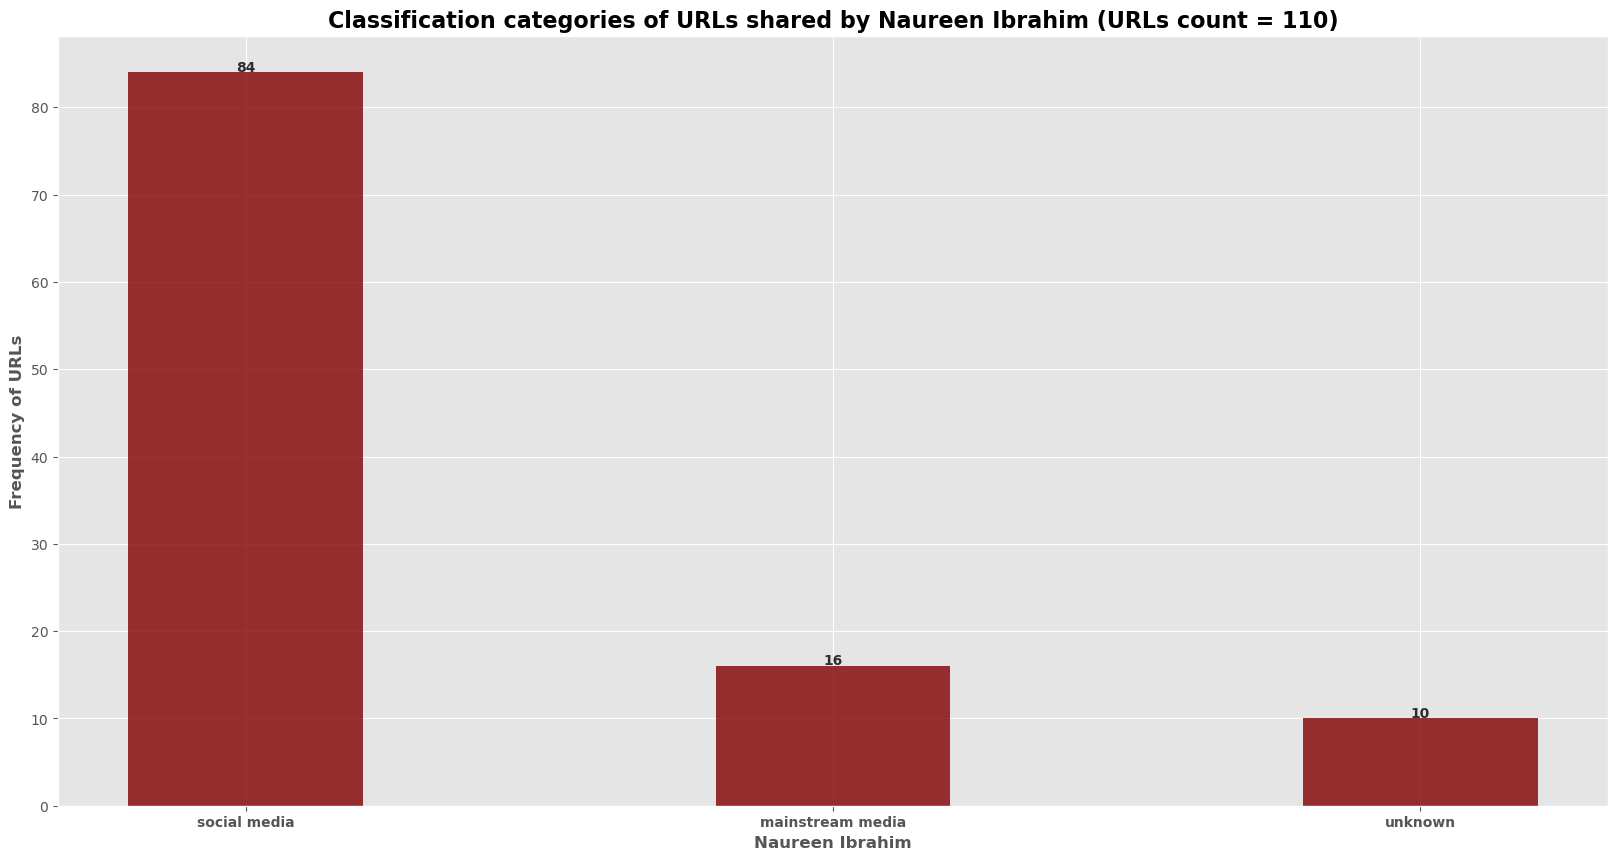

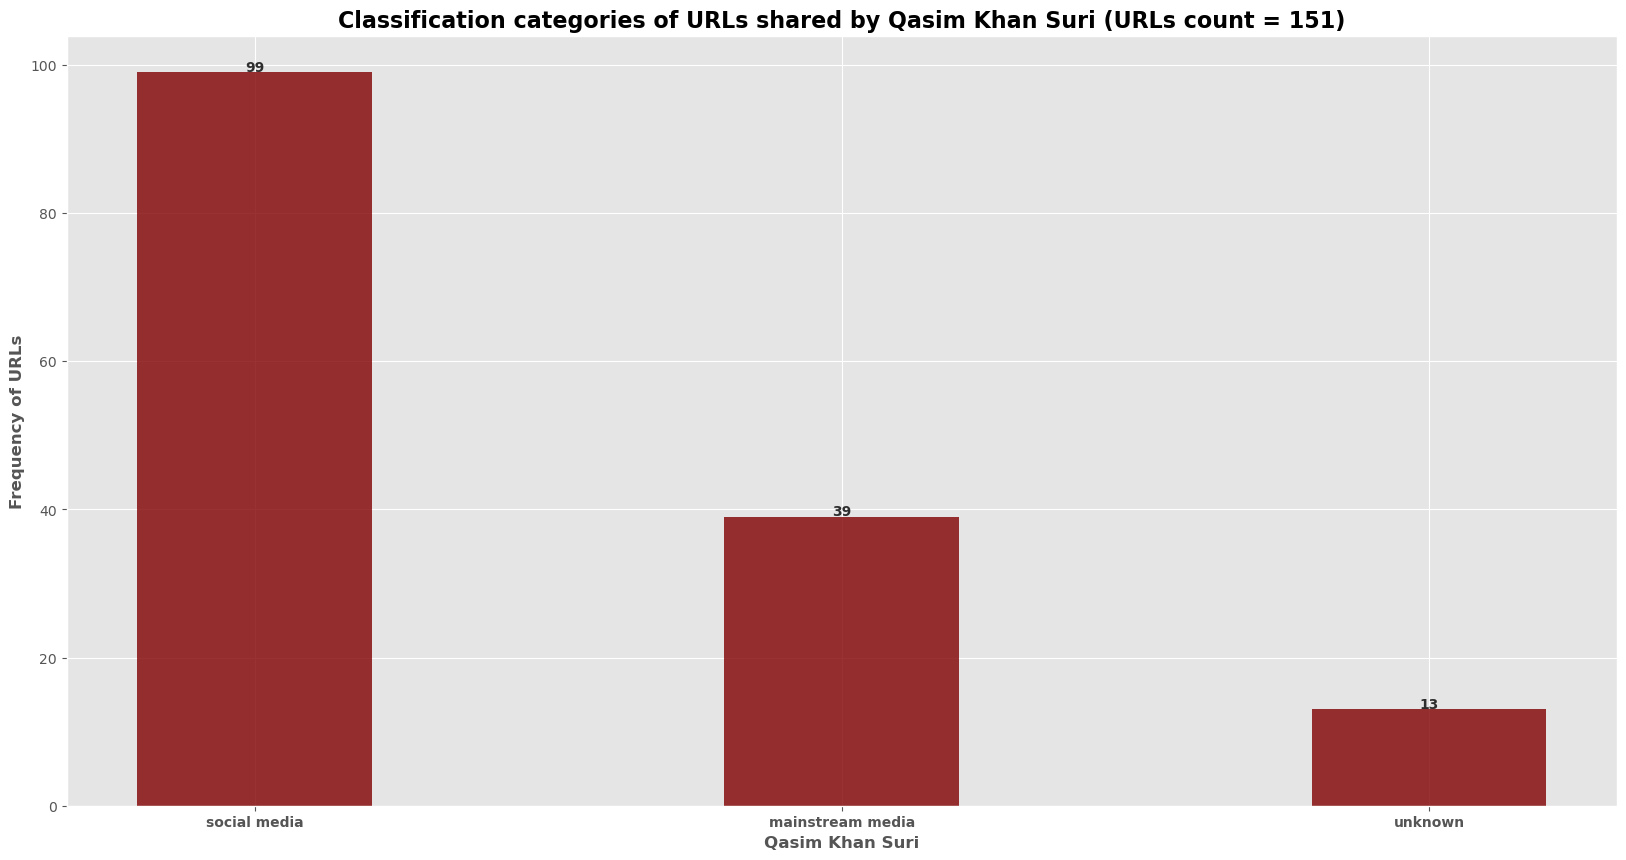

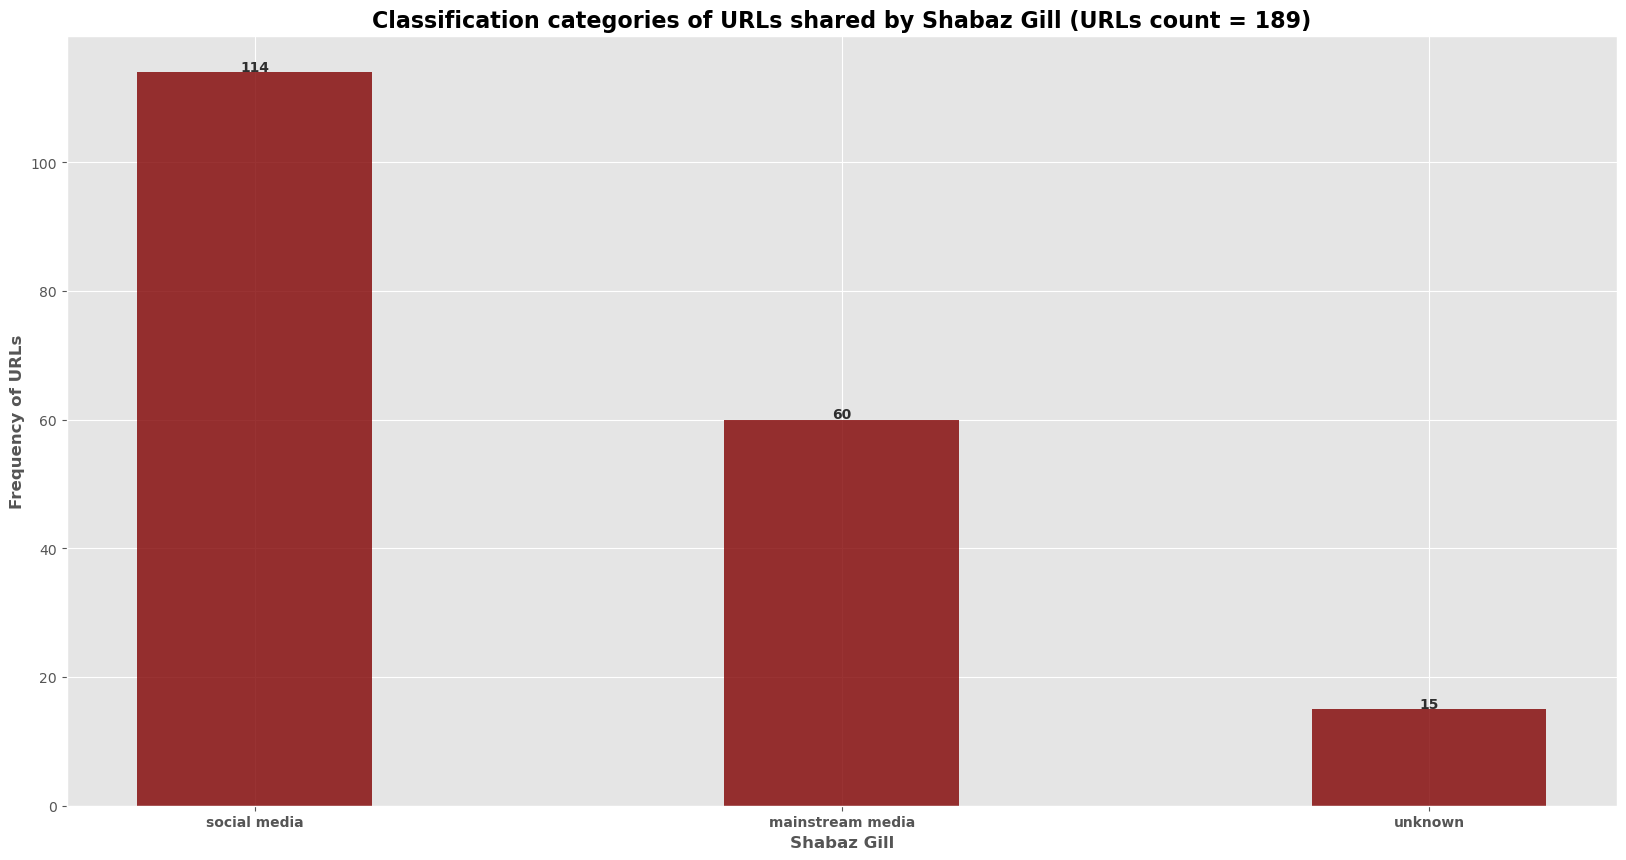

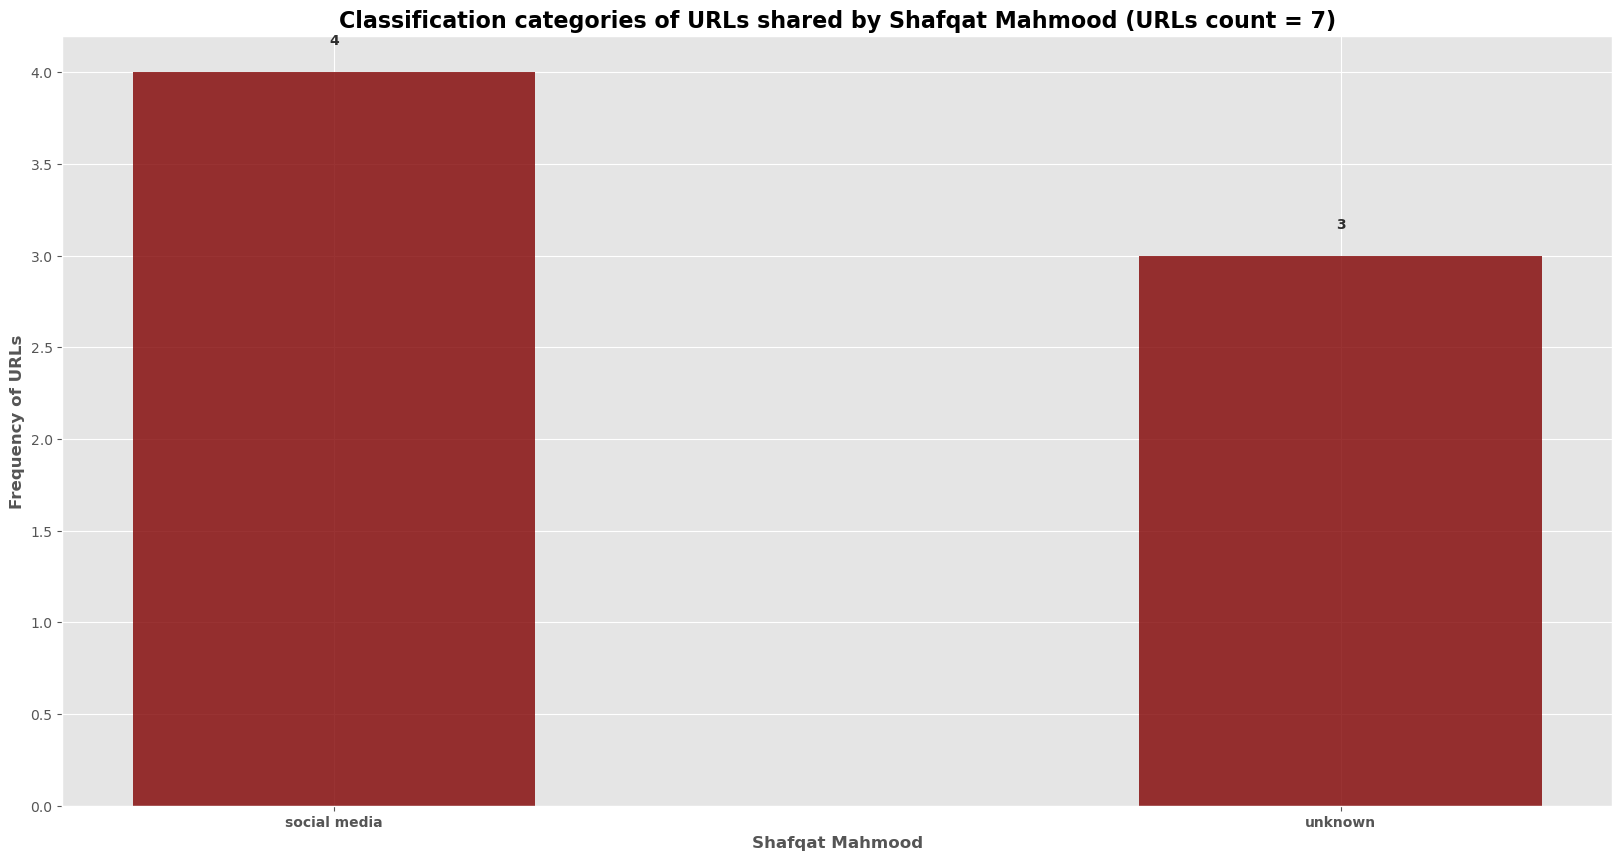

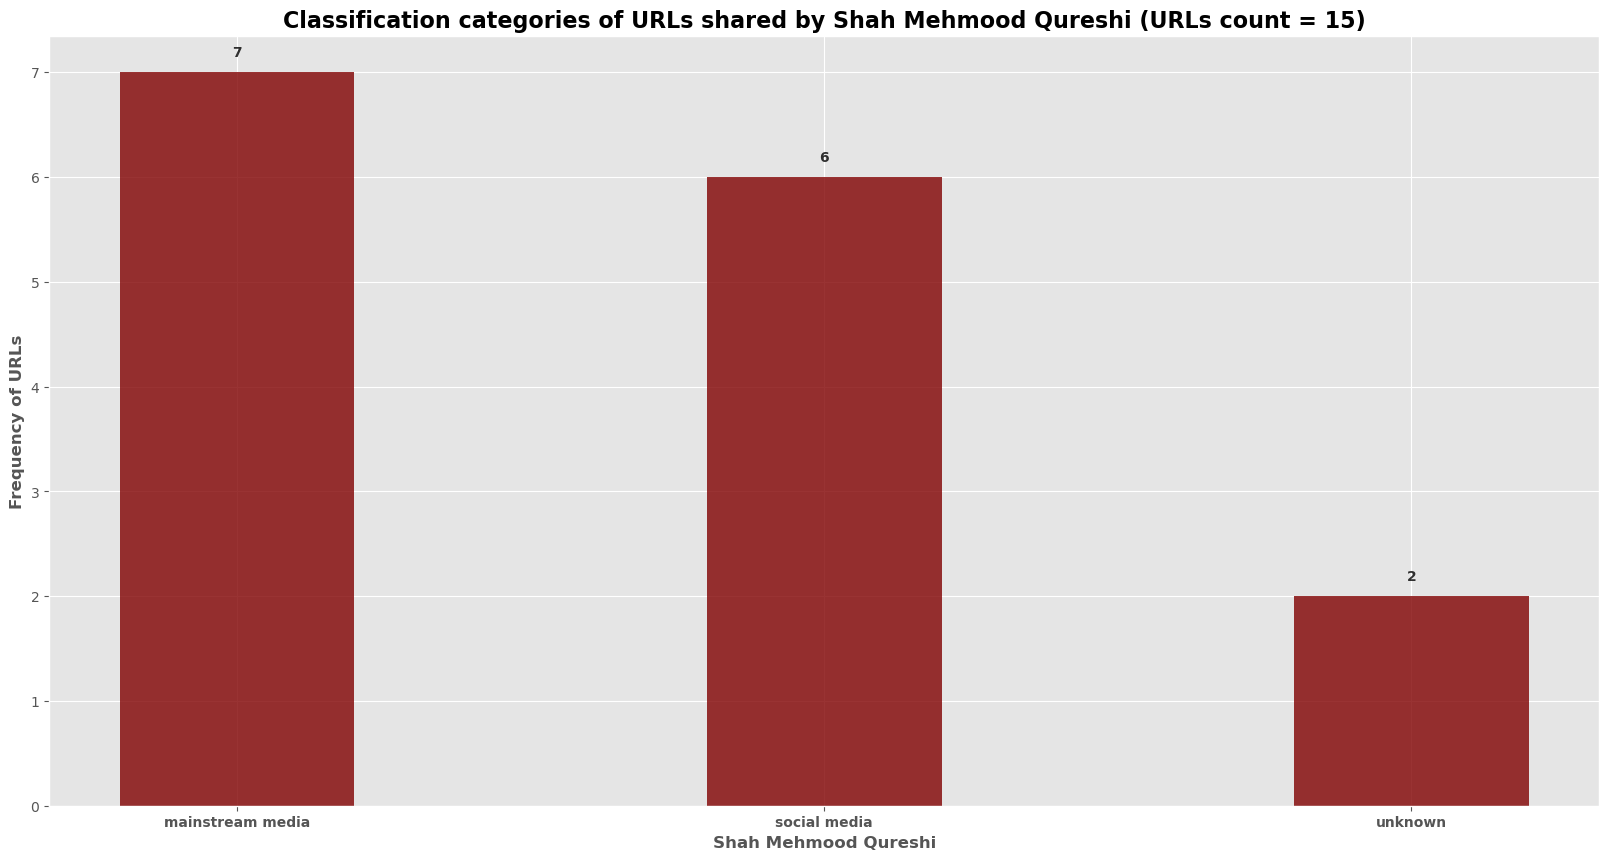

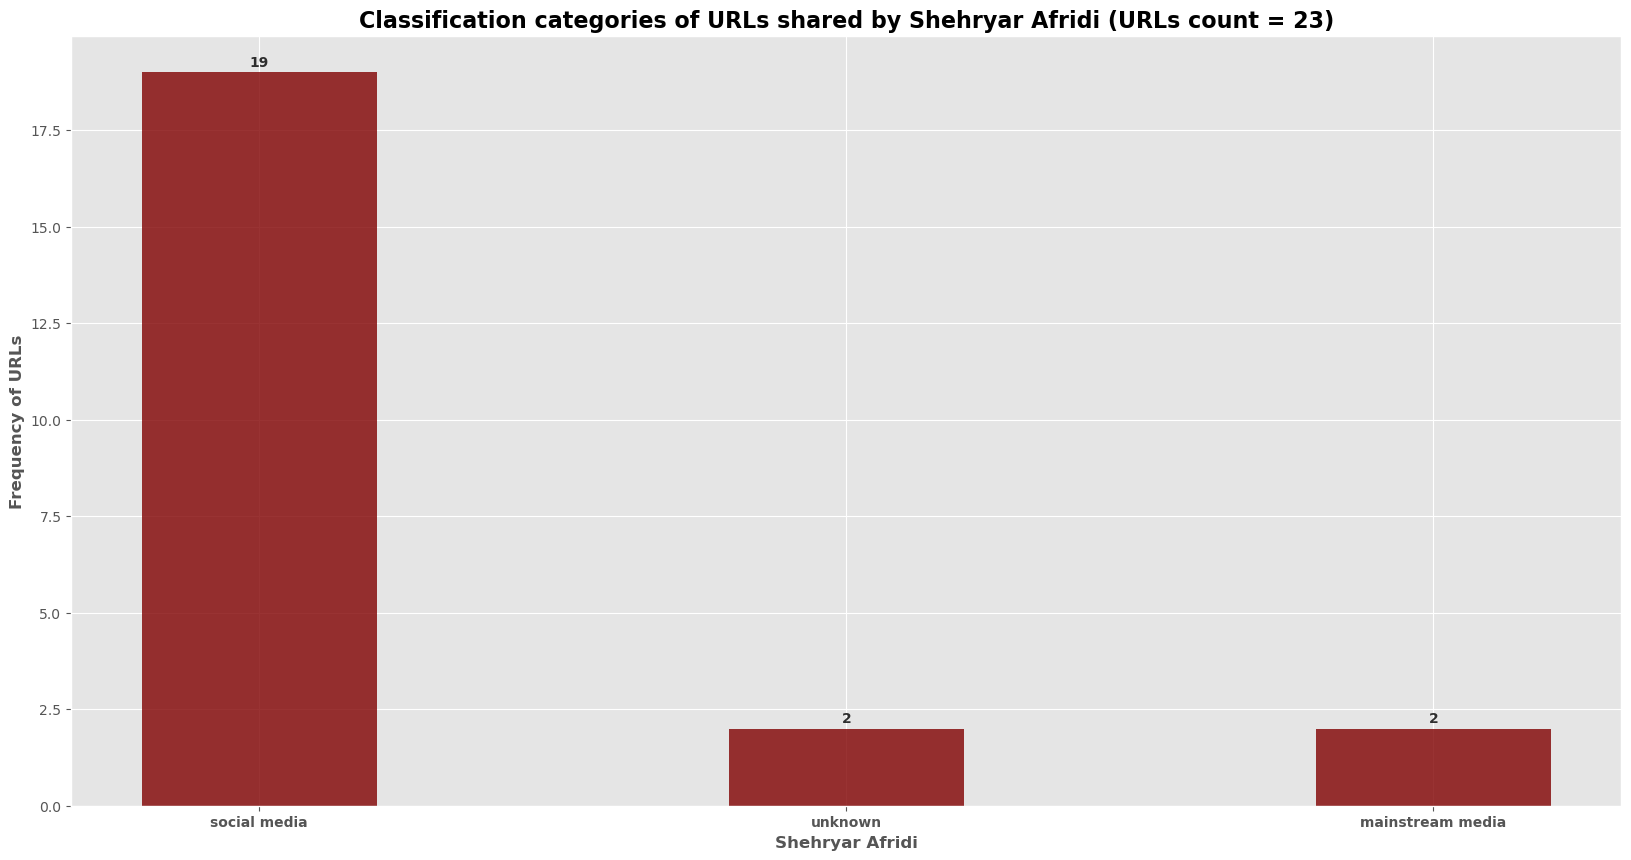

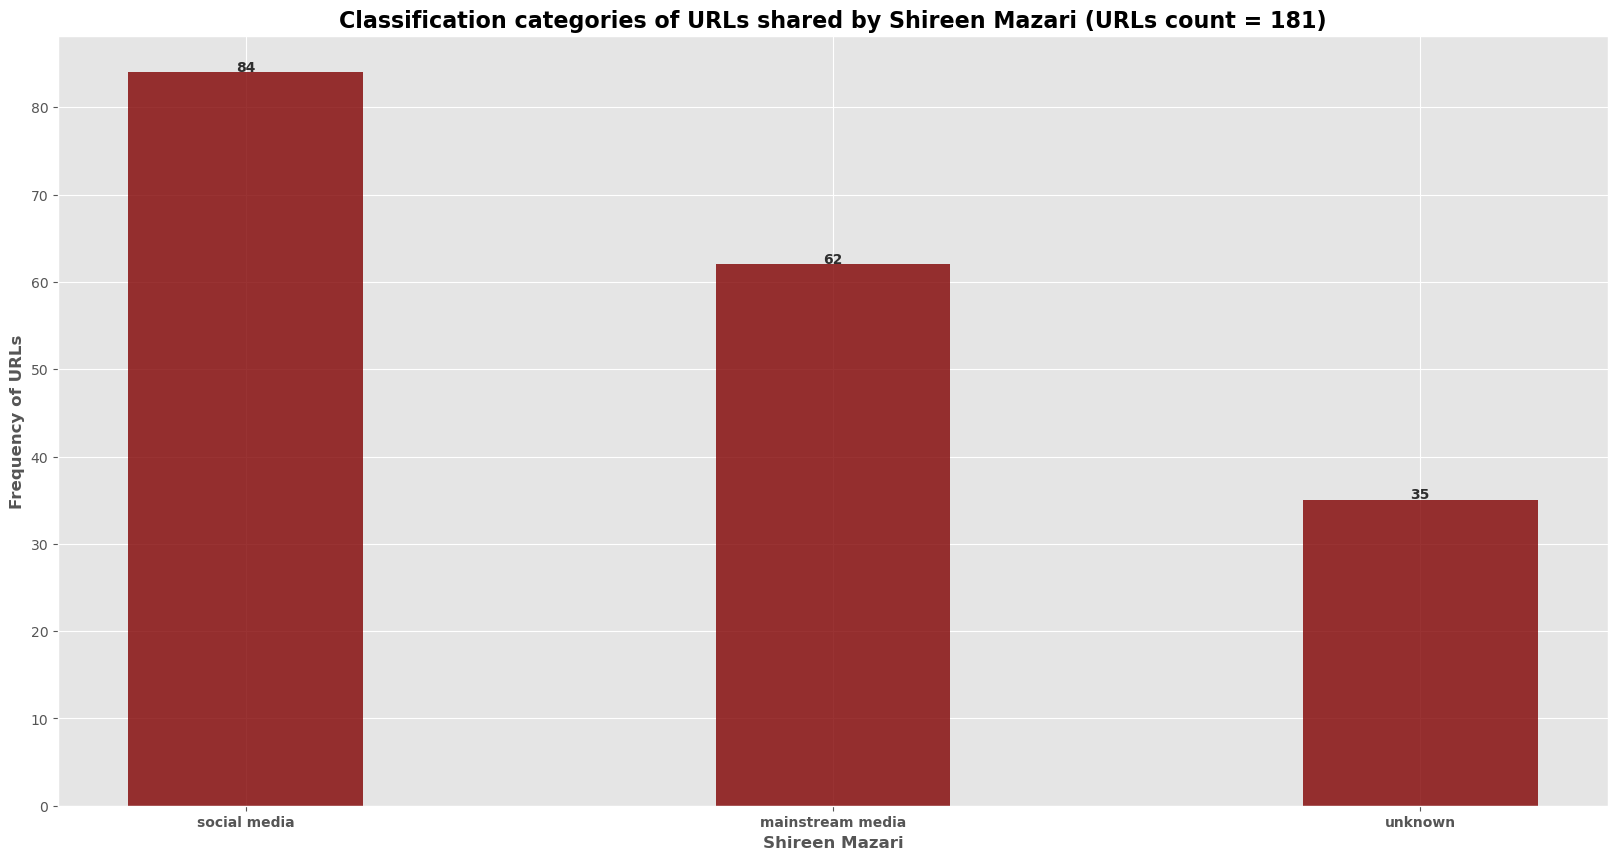

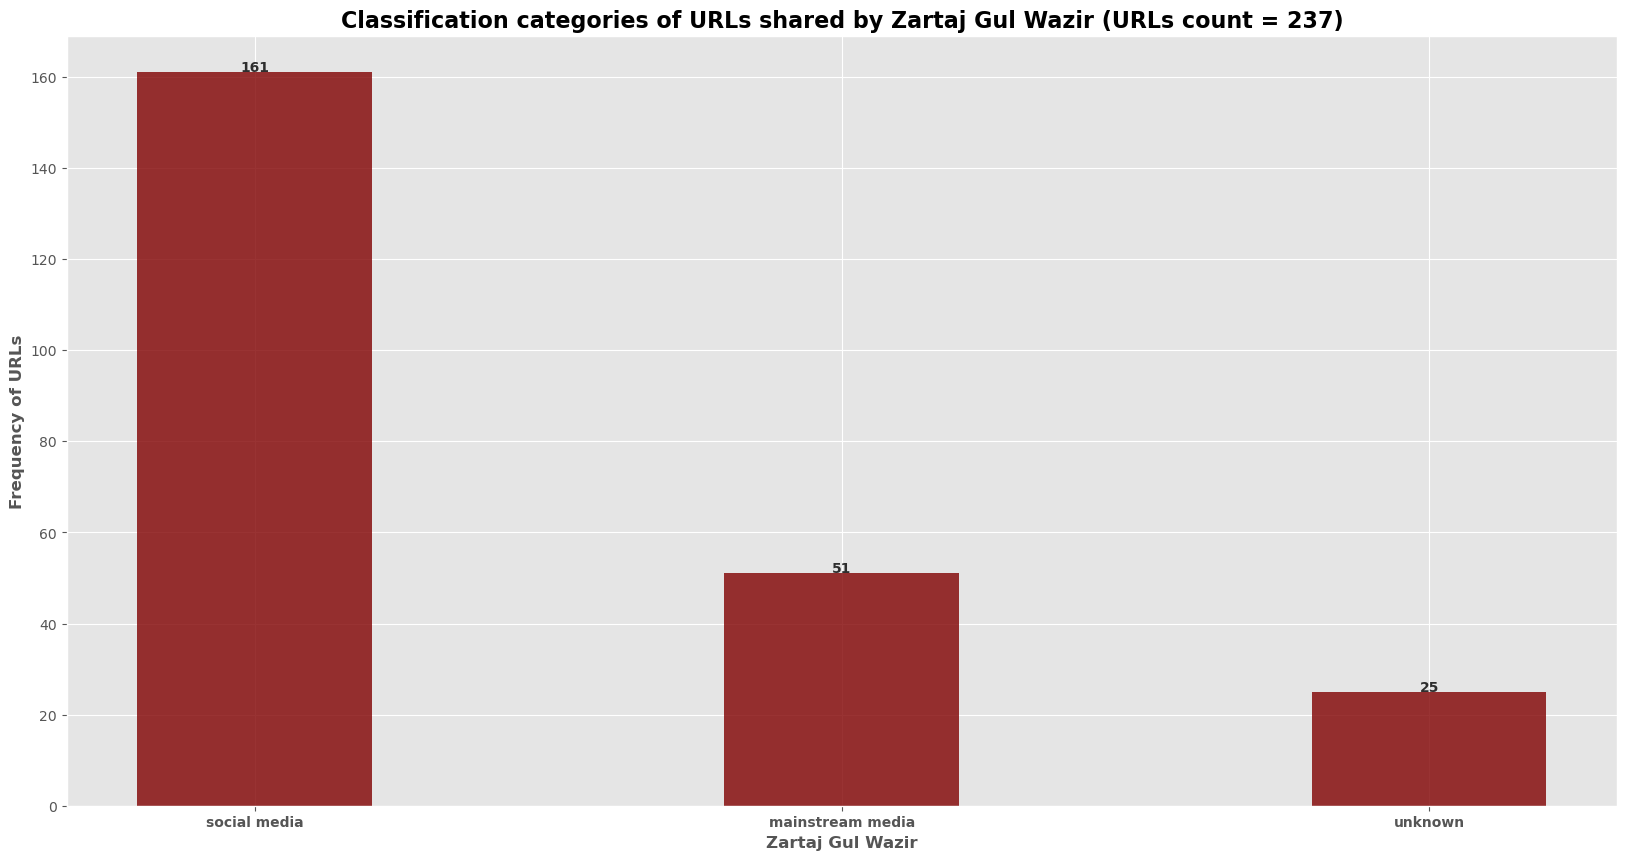

In [1932]:
j = 109
for i in range(len(data_PTI)):
    fig, ax = plt.subplots(figsize=(20,10))
    counts = collections.Counter(PTI_temp_3['classification category'][i])
    names = list(counts.keys())
    values = list(counts.values())
    names = [x for _, x in sorted(zip(values, names), reverse=True)]
    values = sorted(values, reverse=True)
    ax.bar(range(len(counts)), values, tick_label=names, color='maroon', width=0.4, alpha=0.8)
    ax.set_title('Classification categories of URLs shared by ' + data_PTI.index[i] + ' (URLs count = ' + str(sum(values)) + ')', fontsize=16, fontweight='bold')
    ax.set_xlabel(data_PTI.index[i], fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency of URLs', fontsize=12, fontweight='bold')
    addlabels_2(range(len(counts)), values)
    ax = plt.gca()
    labels = ax.get_xticklabels() 
    [label.set_fontweight('bold') for label in labels]
    plt.savefig(str(j)+'.png', bbox_inches='tight')
    j+=1
plt.show()

In [1933]:
m = PMLN.dropna()
PMLN_temp_3 = m.groupby(by=m['politician']).agg(list)
data_PMLN = PMLN_temp_3['classification category']
data_PMLN

politician
Ahsan Iqbal              [social media, social media, social media, mai...
Ayaz Sadiq                      [social media, social media, social media]
Ayesha Rajab Ali         [social media, social media, mainstream media,...
Hamza Shehbaz Sharif     [social media, social media, social media, soc...
Hina Parvez Butt         [mainstream media, social media, social media,...
Khawaja Muhammad Asif    [social media, social media, social media, unk...
Khawaja Saad Rafique     [social media, social media, social media, soc...
Marriyum Aurangzeb       [social media, unknown, social media, social m...
Maryam Nawaz Sharif      [social media, social media, mainstream media,...
Miftah Ismail            [social media, social media, mainstream media,...
Rana Sanaullah           [social media, social media, social media, soc...
Shaza Fatima Khawaja     [social media, social media, social media, soc...
Shehbaz Sharif           [unknown, social media, social media, social m...
Name: classifi

In [1934]:
for i in range(len(data_PMLN)):
    counts = collections.Counter(PMLN_temp_3['classification category'][i])
    names = counts.keys()
    values = counts.values()
    names = [x for _, x in sorted(zip(values, names), reverse=True)]
    values = sorted(values, reverse=True)
    print(counts, names,values)

Counter({'social media': 74, 'mainstream media': 24, 'unknown': 6}) ['social media', 'mainstream media', 'unknown'] [74, 24, 6]
Counter({'social media': 3}) ['social media'] [3]
Counter({'social media': 23, 'mainstream media': 10, 'unknown': 1}) ['social media', 'mainstream media', 'unknown'] [23, 10, 1]
Counter({'social media': 18, 'unknown': 3, 'mainstream media': 2}) ['social media', 'unknown', 'mainstream media'] [18, 3, 2]
Counter({'social media': 223, 'mainstream media': 124, 'unknown': 20}) ['social media', 'mainstream media', 'unknown'] [223, 124, 20]
Counter({'social media': 49, 'mainstream media': 16, 'unknown': 8}) ['social media', 'mainstream media', 'unknown'] [49, 16, 8]
Counter({'social media': 26, 'mainstream media': 13, 'unknown': 1}) ['social media', 'mainstream media', 'unknown'] [26, 13, 1]
Counter({'social media': 68, 'mainstream media': 19, 'unknown': 5}) ['social media', 'mainstream media', 'unknown'] [68, 19, 5]
Counter({'social media': 103, 'mainstream media': 

In [1935]:
def addlabels_3(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0,y[i],ha = 'center',color = "black", alpha=0.8, fontweight='bold')

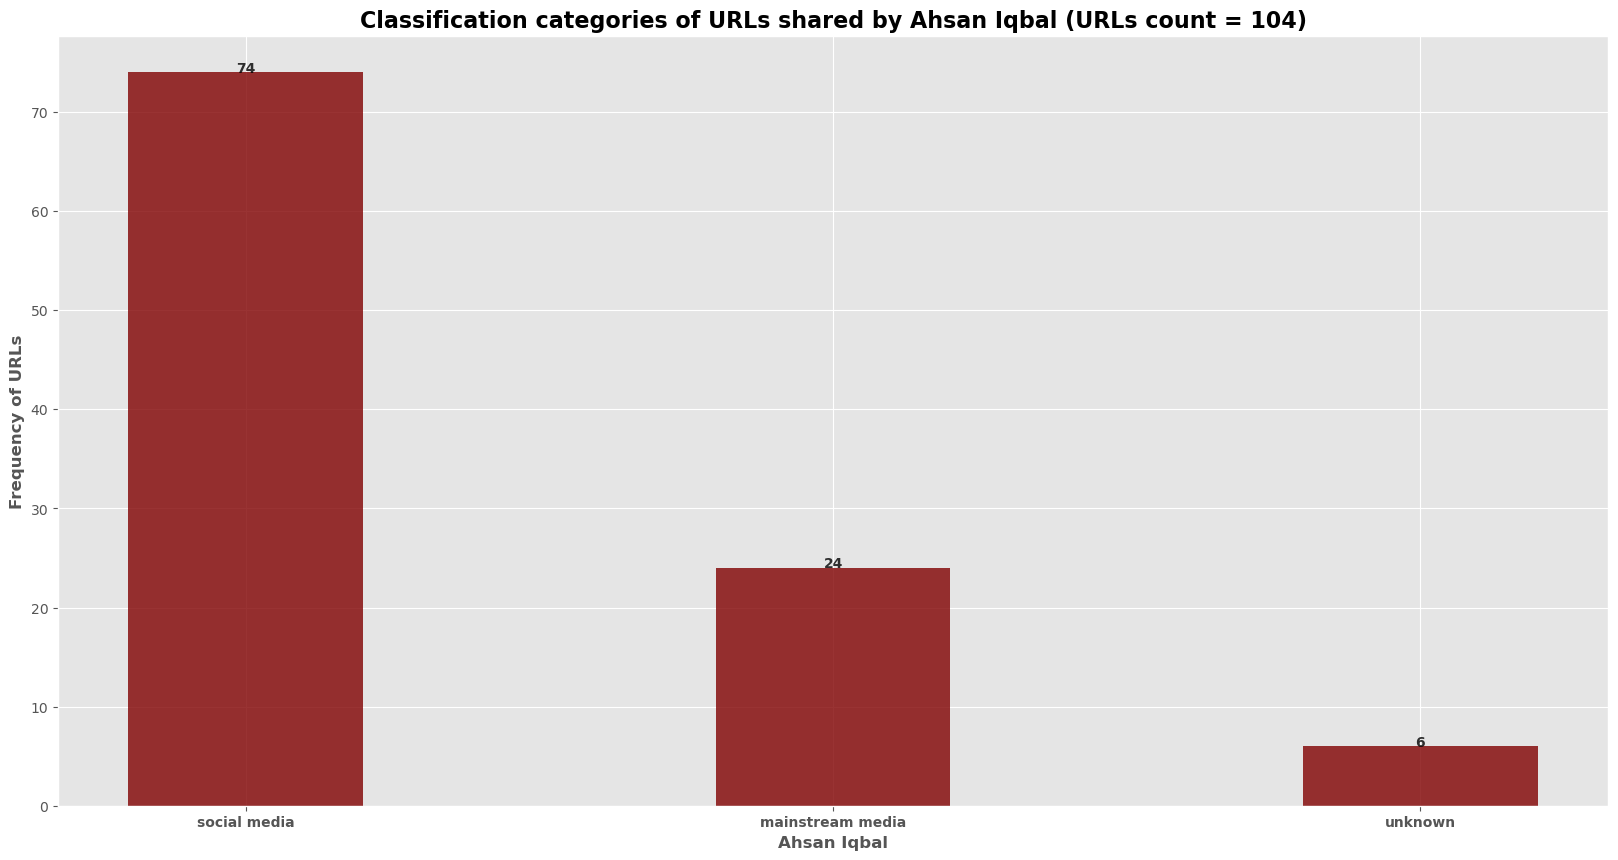

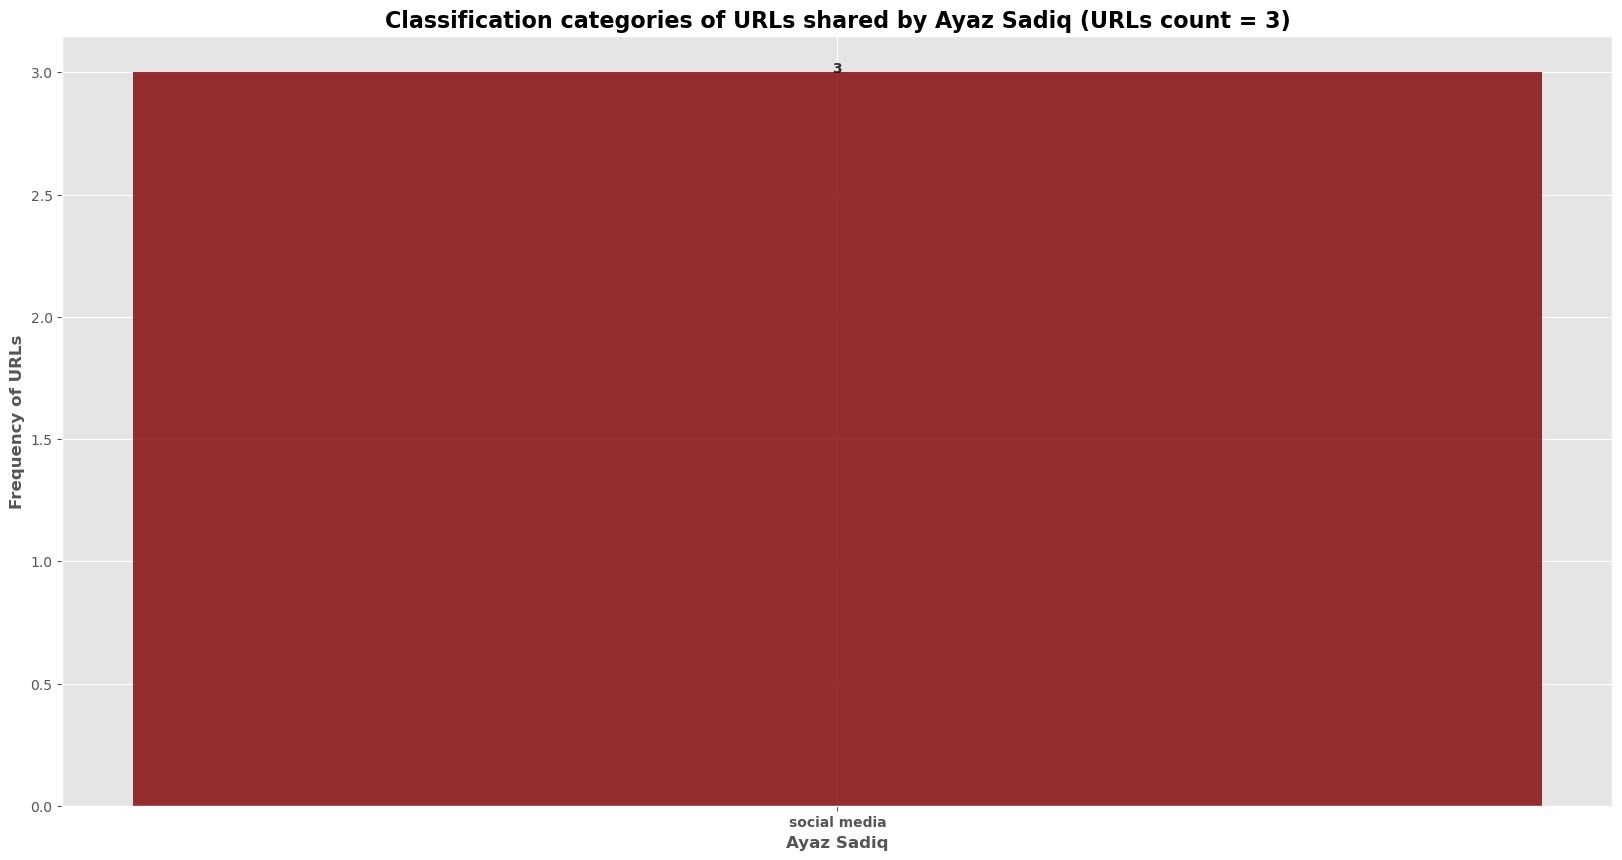

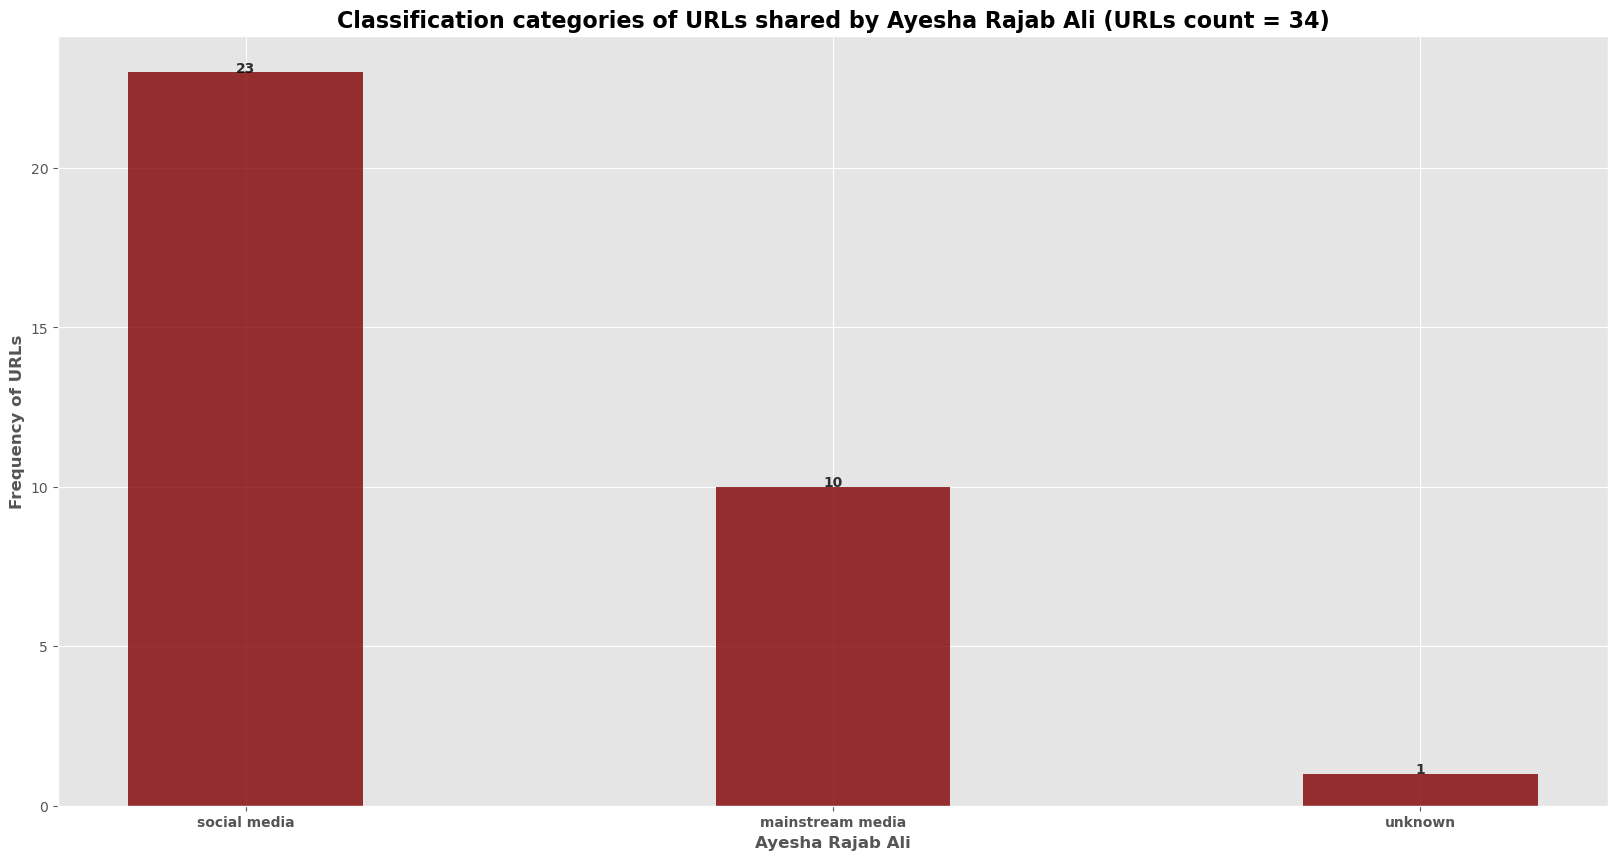

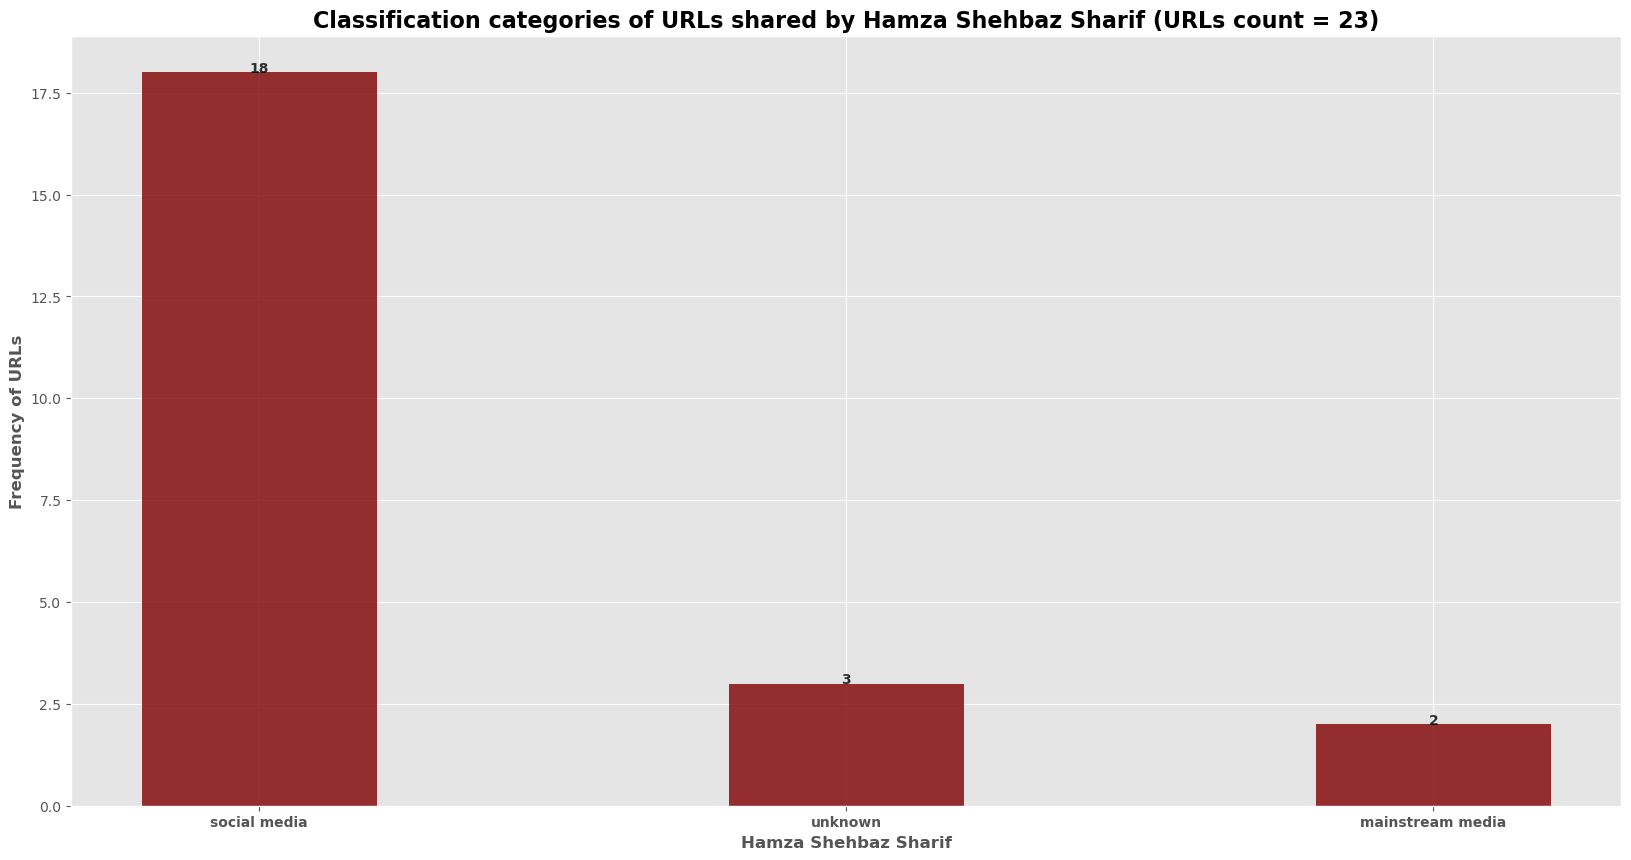

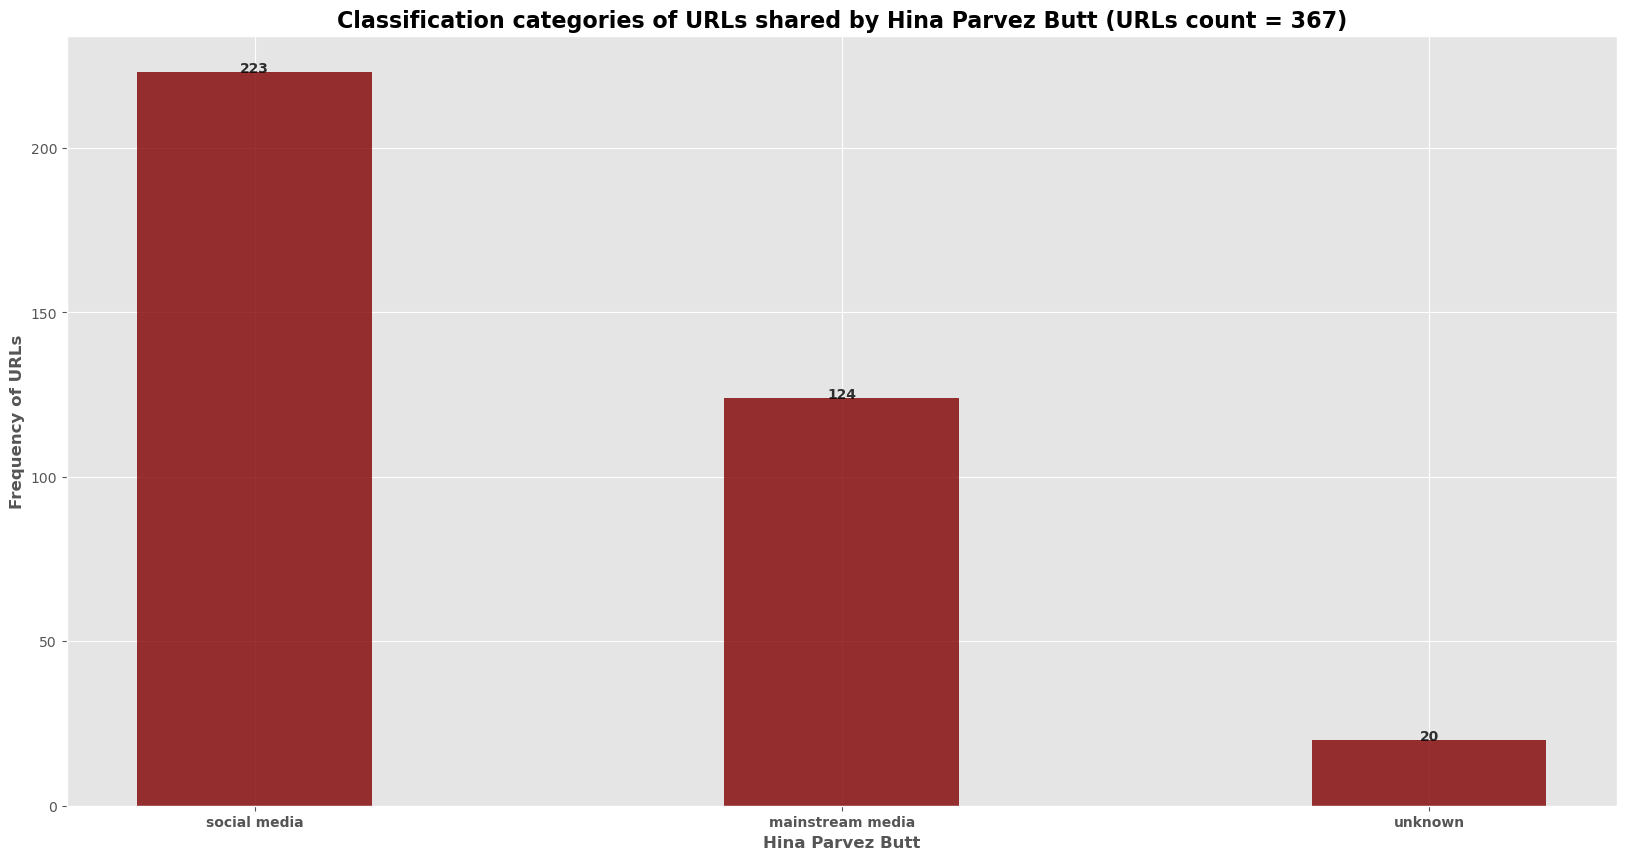

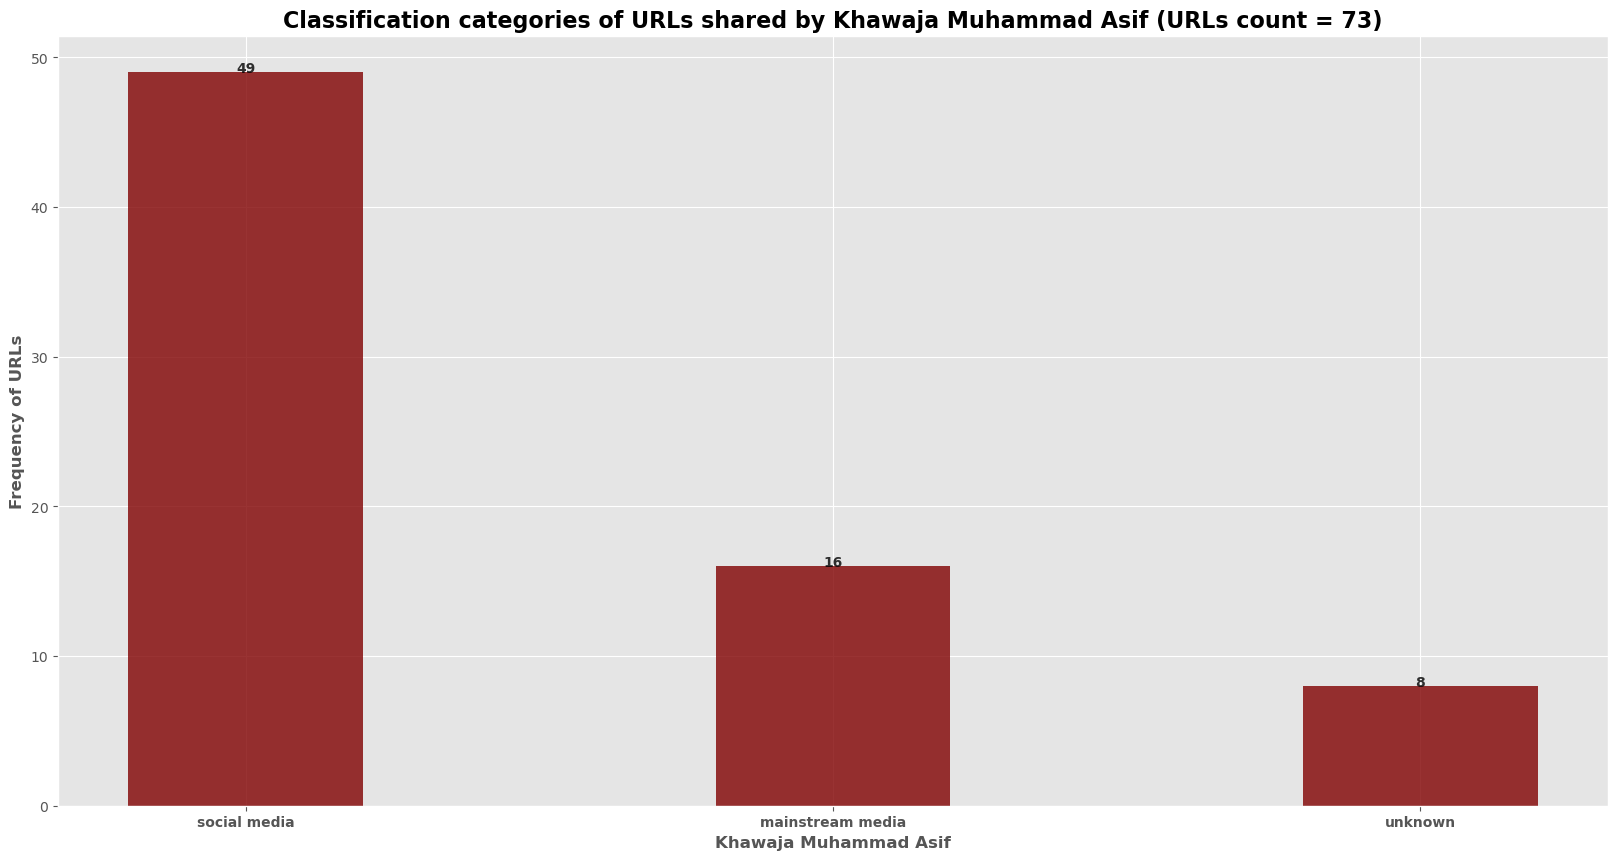

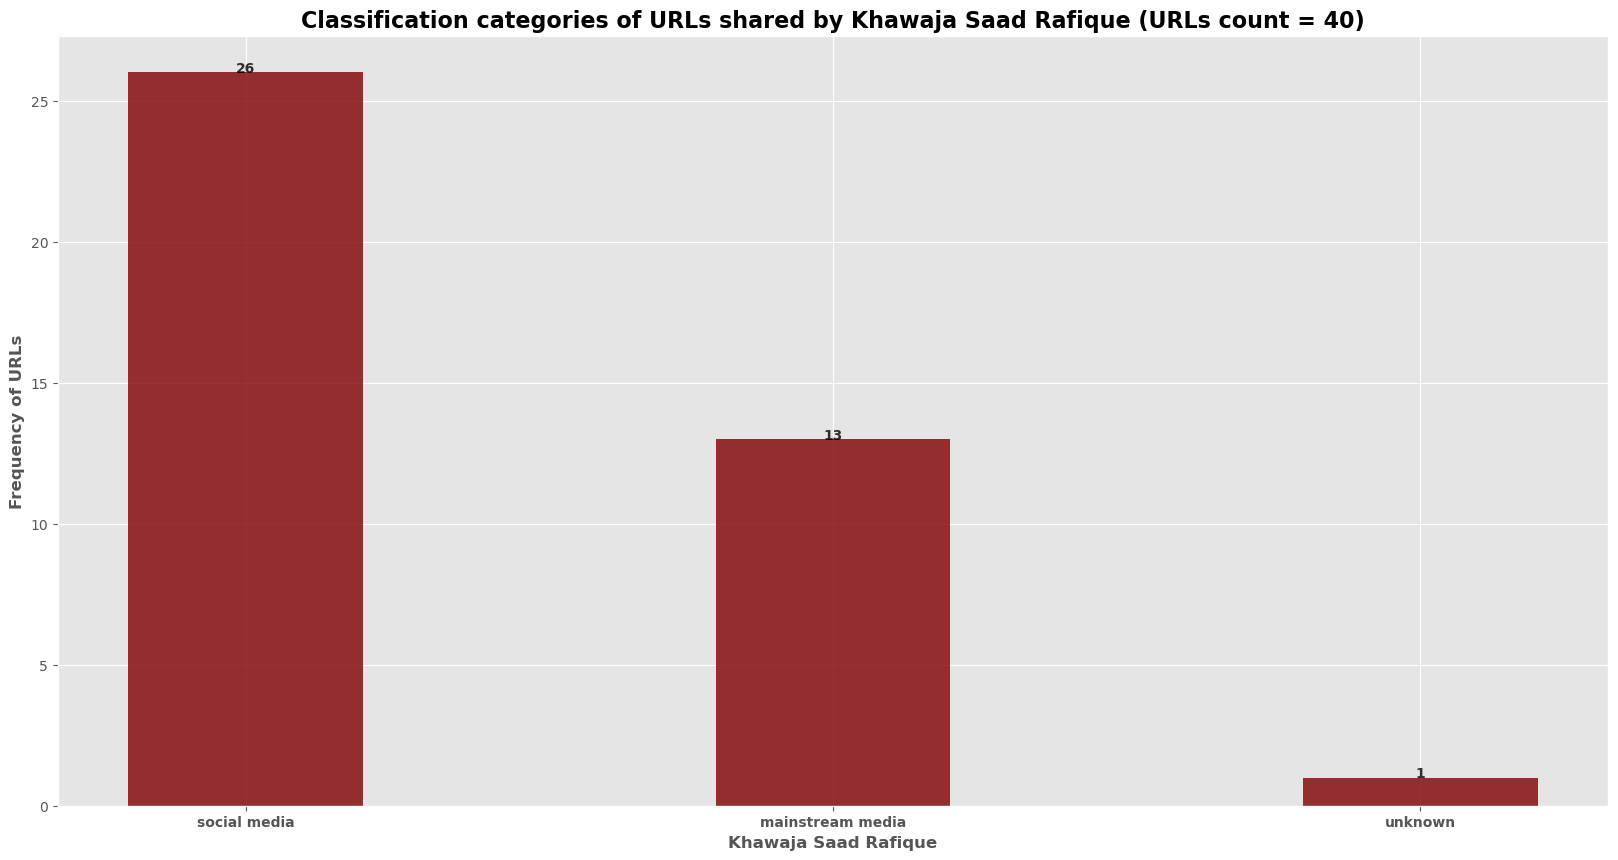

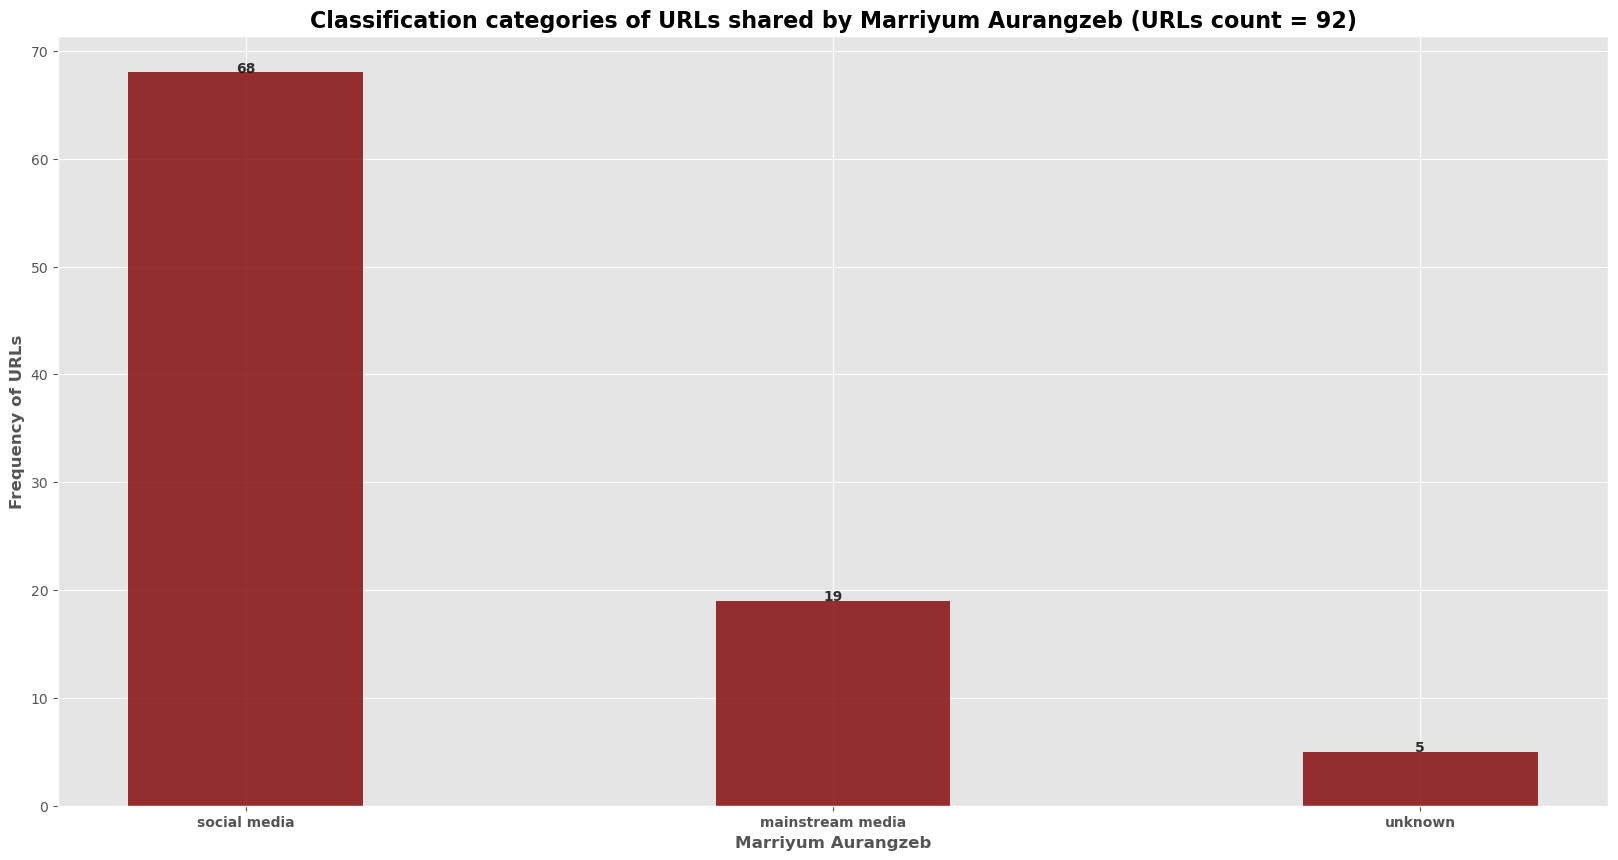

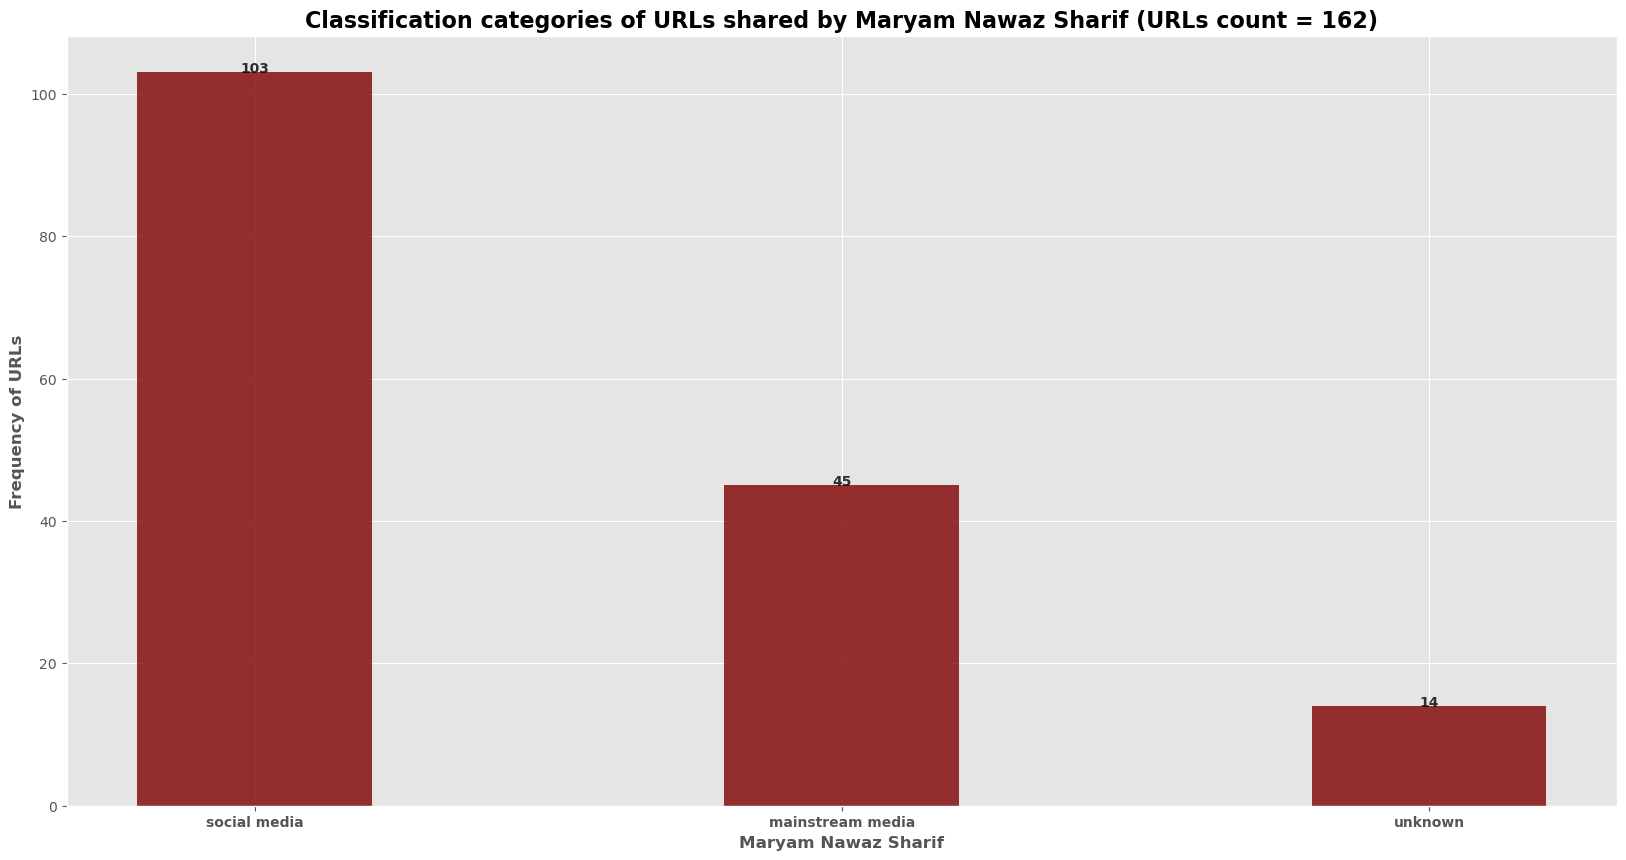

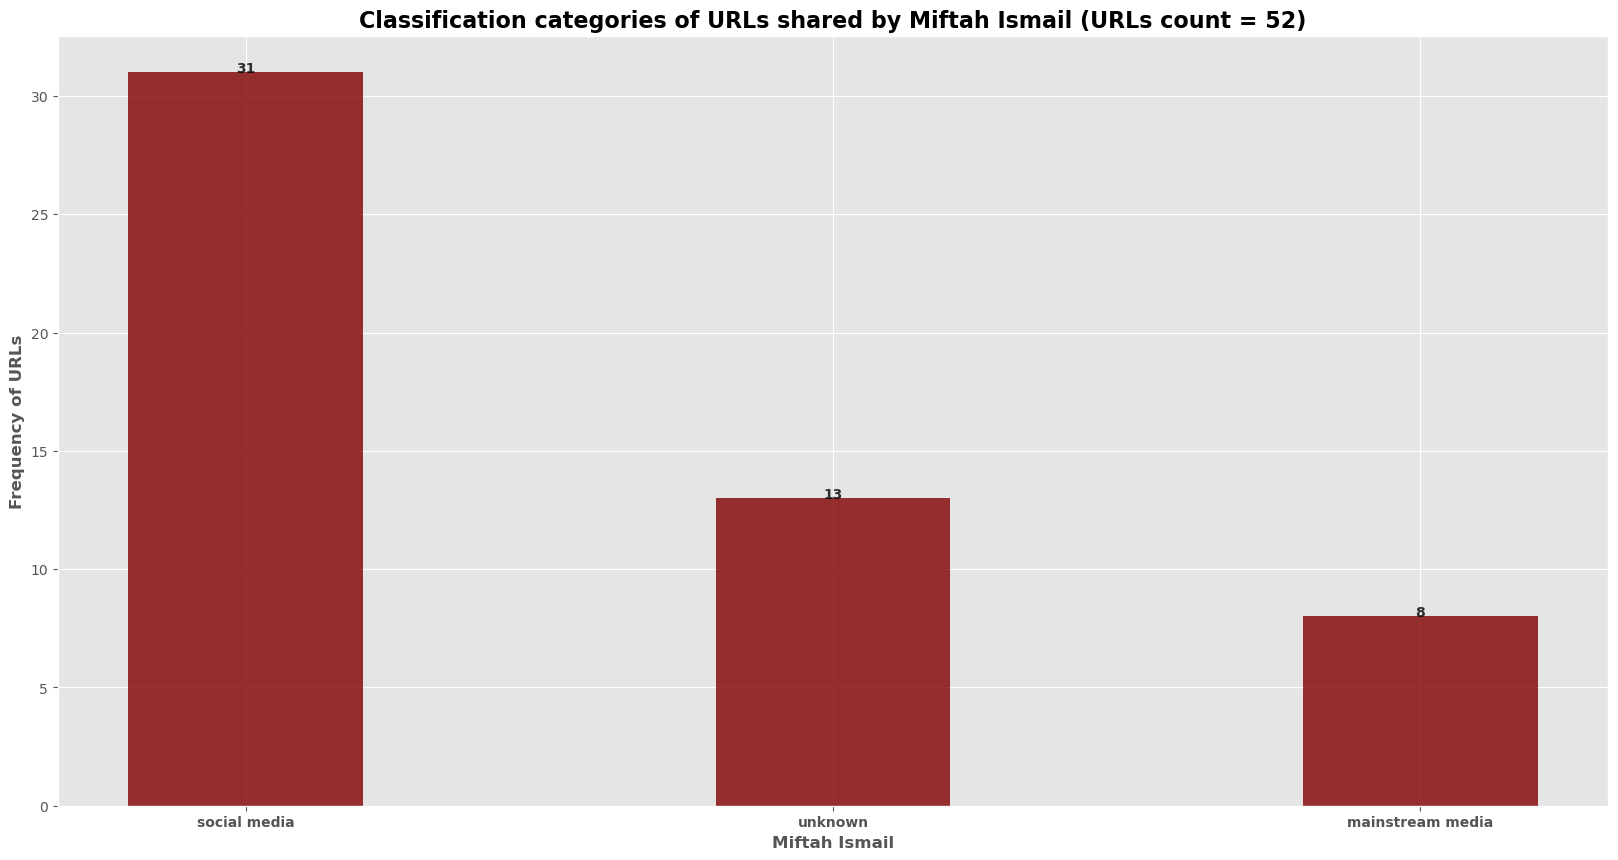

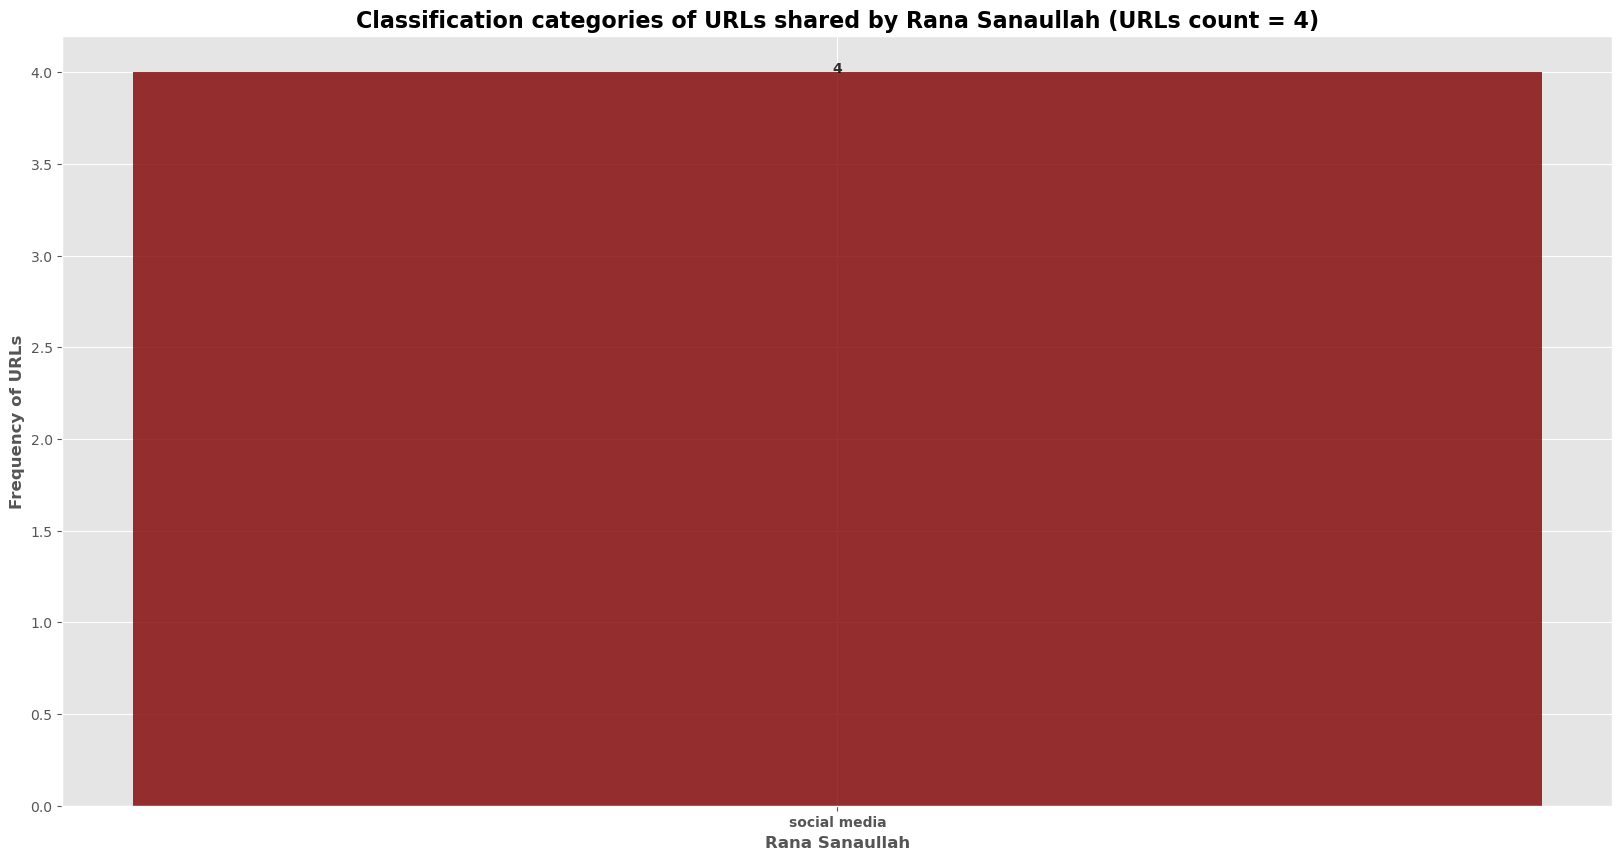

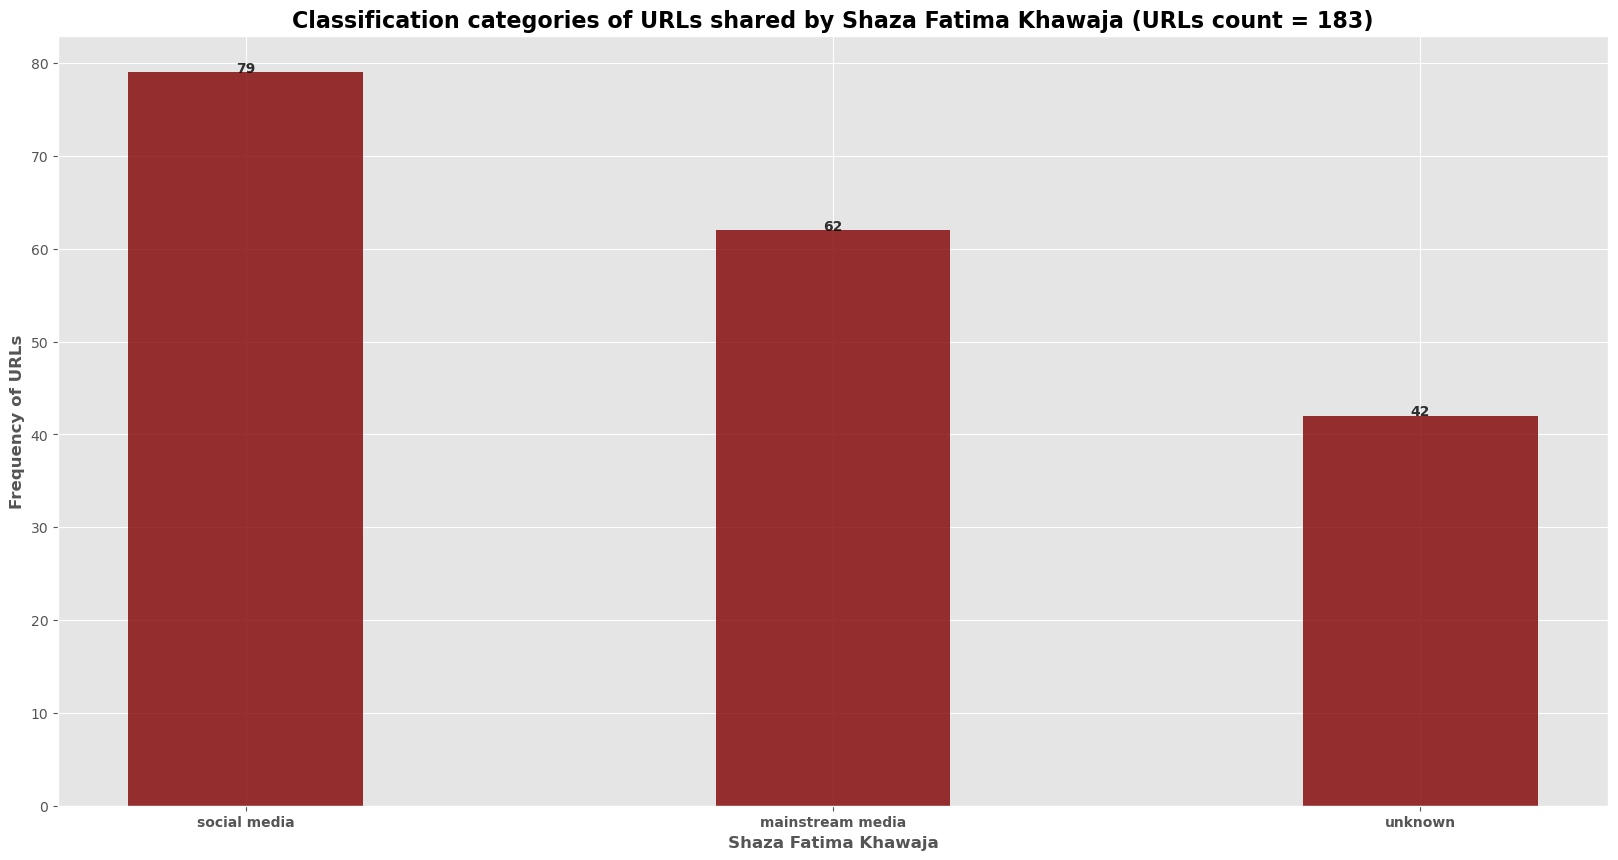

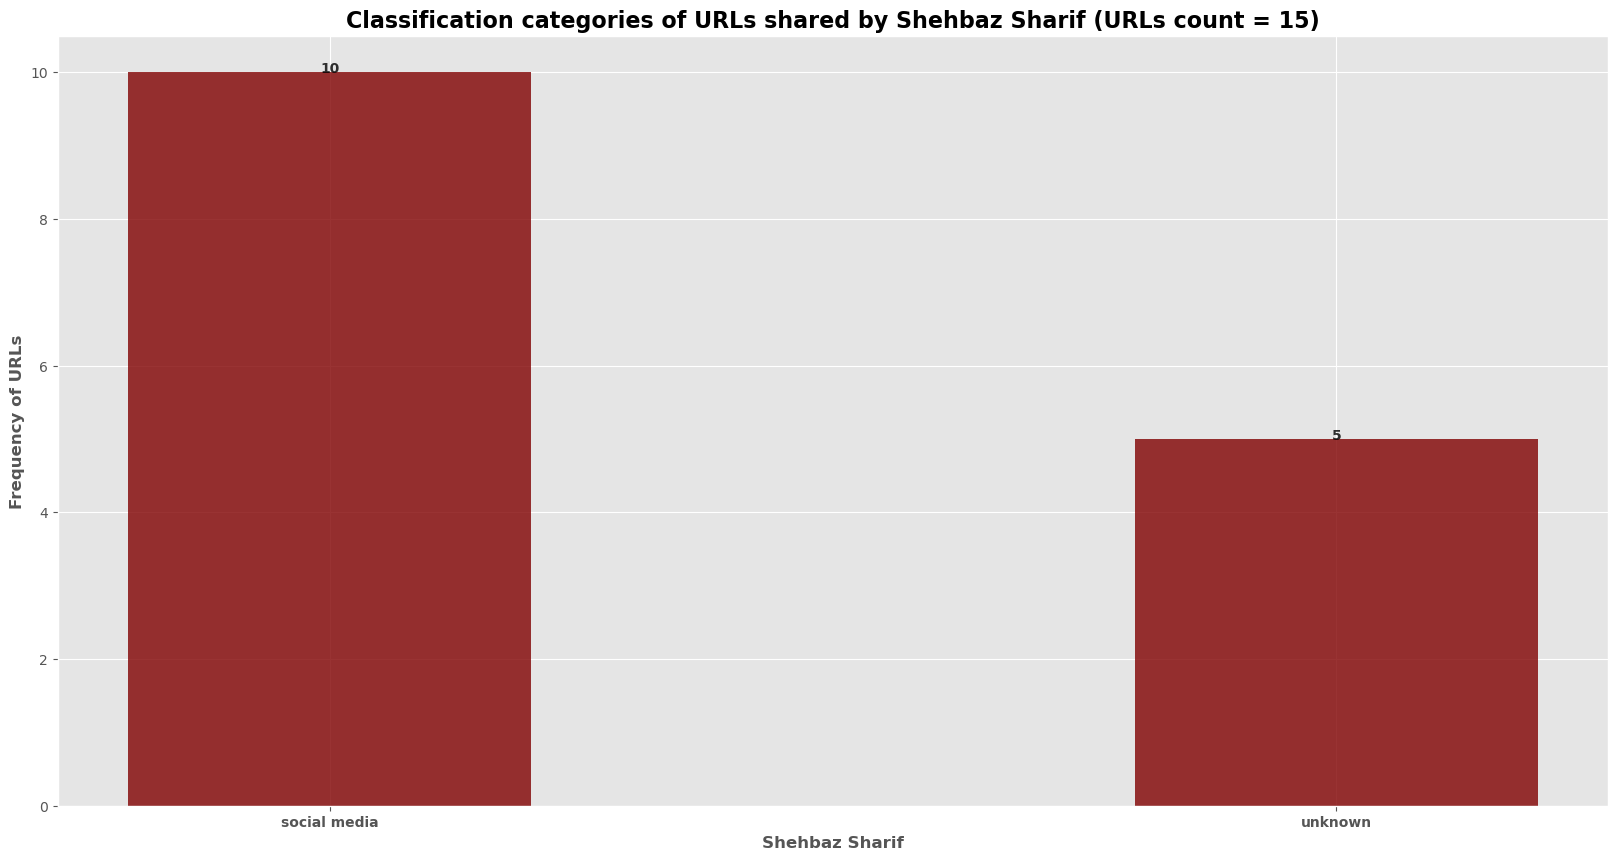

In [1936]:
j = 125

for i in range(len(data_PMLN)):
    fig, ax = plt.subplots(figsize=(20,10))
    counts = collections.Counter(PMLN_temp_3['classification category'][i])
    names = list(counts.keys())
    values = list(counts.values())
    names = [x for _, x in sorted(zip(values, names), reverse=True)]
    values = sorted(values, reverse=True)
    ax.bar(range(len(counts)), values, tick_label=names, color='maroon', width=0.4, alpha=0.8)
    ax.set_title('Classification categories of URLs shared by ' + data_PMLN.index[i] + ' (URLs count = ' + str(sum(values)) + ')', fontsize=16, fontweight='bold')
    ax.set_xlabel(data_PMLN.index[i], fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency of URLs', fontsize=12, fontweight='bold')
    addlabels_3(range(len(counts)), values)
    ax = plt.gca()
    labels = ax.get_xticklabels() 
    [label.set_fontweight('bold') for label in labels]
    plt.savefig(str(j)+'.png', bbox_inches='tight')
    j+=1
plt.show()

#### Question 1: Do elites from PTI and PML-N cite different sources? (e.g., mainstream vs. otherwise; ARY vs. Geo)

In [1937]:
PTI_temp_4 = z.groupby(by=z['classification category']).agg(list)
PTI_temp_4['classification source']

classification category
mainstream media    [fox news, samaa news, 24 news, fox news, dail...
social media        [twitter, twitter, twitter, twitter, twitter, ...
sports media        [england and wales cricket board, icc, england...
unknown             [incomplete url, incomplete url, incomplete ur...
Name: classification source, dtype: object

In [1938]:
data_PTI = PTI_temp_4['classification source']
for i in range(len(data_PTI)):
    counts = collections.Counter(PTI_temp_4['classification source'][i])
    names = counts.keys()
    values = counts.values()
    names = [x for _, x in sorted(zip(values, names), reverse=True)]
    values = sorted(values, reverse=True)
    print(names[:10],values[:10])
    print('\n')

['ary news', 'bol news', 'geo news', 'dunya news', 'samaa news', 'the express tribune', 'gnn news', 'hum news', 'dawn news', '24 news'] [104, 36, 32, 17, 14, 12, 12, 11, 11, 10]


['twitter', 'youtube', 'tiktok', 'facebook', 'pinterest', 'instagram', 'wikipedia', 'trendsmap', 'startup pakistan', 'snack video'] [905, 32, 29, 12, 4, 2, 1, 1, 1, 1]


['icc', 'england cricket', 'england and wales cricket board'] [1, 1, 1]


['incomplete url', 'missing url', 'url inaccessible', 'url fails to open', 'no', 'ma'] [99, 94, 20, 2, 1, 1]




In [1939]:
PMLN_temp_4 = m.groupby(by=m['classification category']).agg(list)
PMLN_temp_4['classification source']

classification category
mainstream media    [ary news, geo news, geo news, geo, dunya, 24,...
social media        [twitter, twitter, twitter, twitter, twitter, ...
unknown             [incomplete url, incomplete url, incomplete ur...
Name: classification source, dtype: object

In [1940]:
data_PMLN = PMLN_temp_4['classification source']
data_PMLN

classification category
mainstream media    [ary news, geo news, geo news, geo, dunya, 24,...
social media        [twitter, twitter, twitter, twitter, twitter, ...
unknown             [incomplete url, incomplete url, incomplete ur...
Name: classification source, dtype: object

In [1941]:
data_PMLN = PMLN_temp_4['classification source']
for i in range(len(data_PMLN)):
    counts = collections.Counter(PMLN_temp_4['classification source'][i])
    names = counts.keys()
    values = counts.values()
    names = [x for _, x in sorted(zip(values, names))]
    values = sorted(values)
    print(names[-10:],values[-10:])
    print('\n')

['hum news', 'dunya news', 'express news', '24 news', 'dawn news', 'the express tribune', 'ptv news', 'samaa news', 'ary news', 'geo news'] [9, 10, 10, 11, 11, 12, 14, 17, 22, 122]


['pro pakistani', 'utiltiy stores', 'pmln', 'govt of punjab', 'tiktok', 'pakistan international airlines', 'social digitally', 'youtube', 'govt of pakistan', 'twitter'] [2, 2, 3, 4, 4, 5, 6, 7, 15, 631]


['luxmea', 'url fails to open', 'url inaccessible', 'incomplete url', 'missing url'] [1, 3, 8, 49, 57]




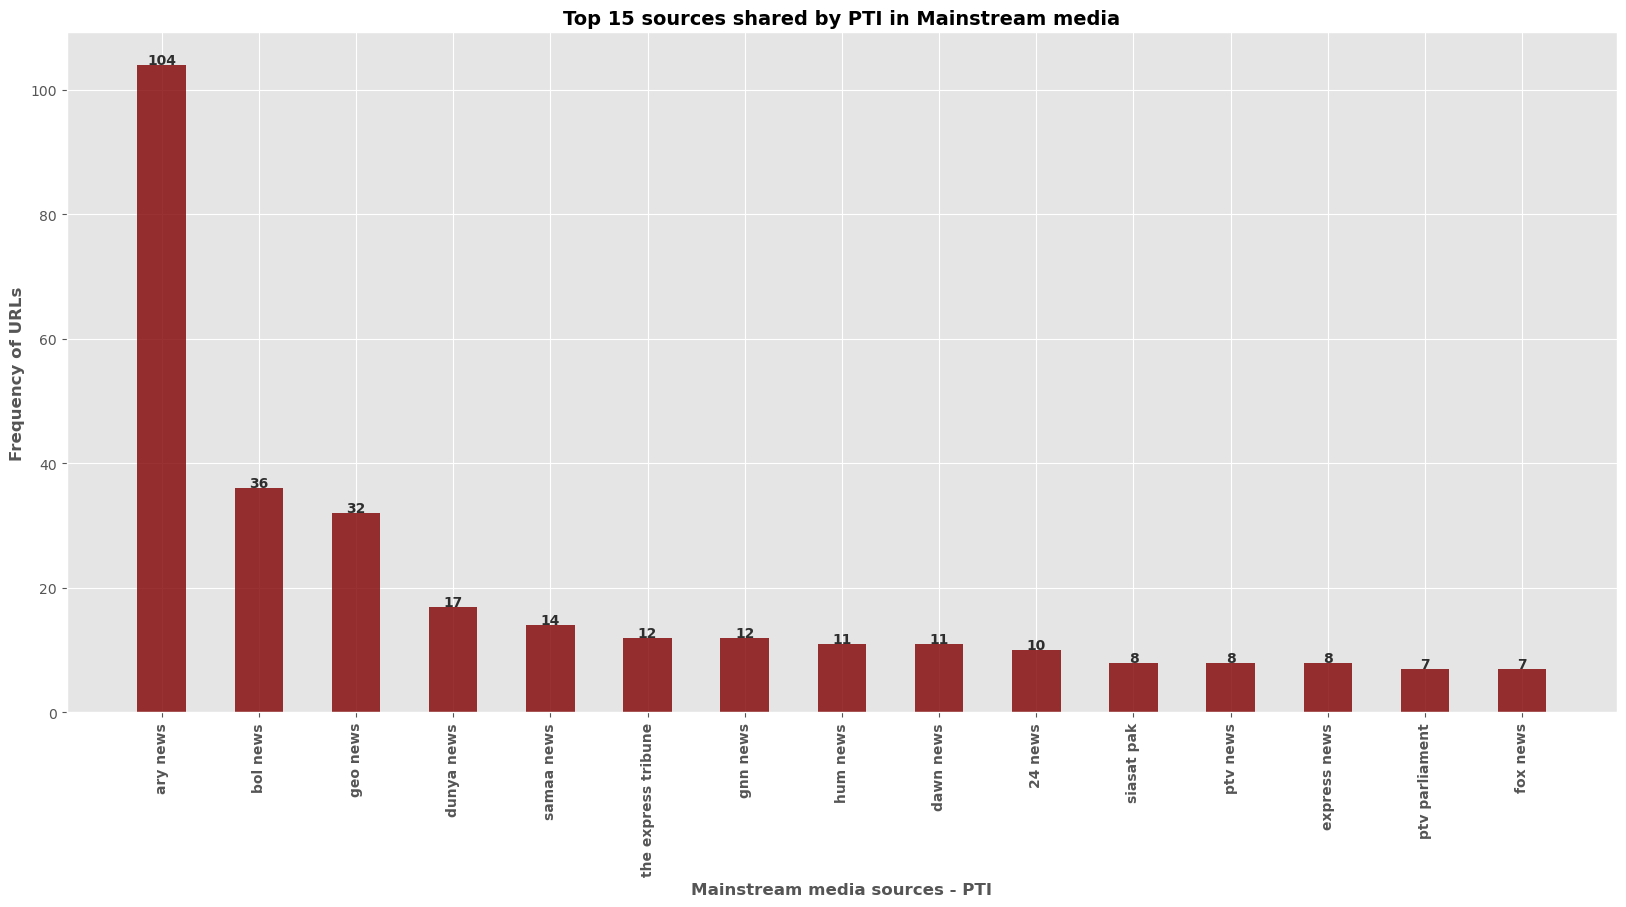

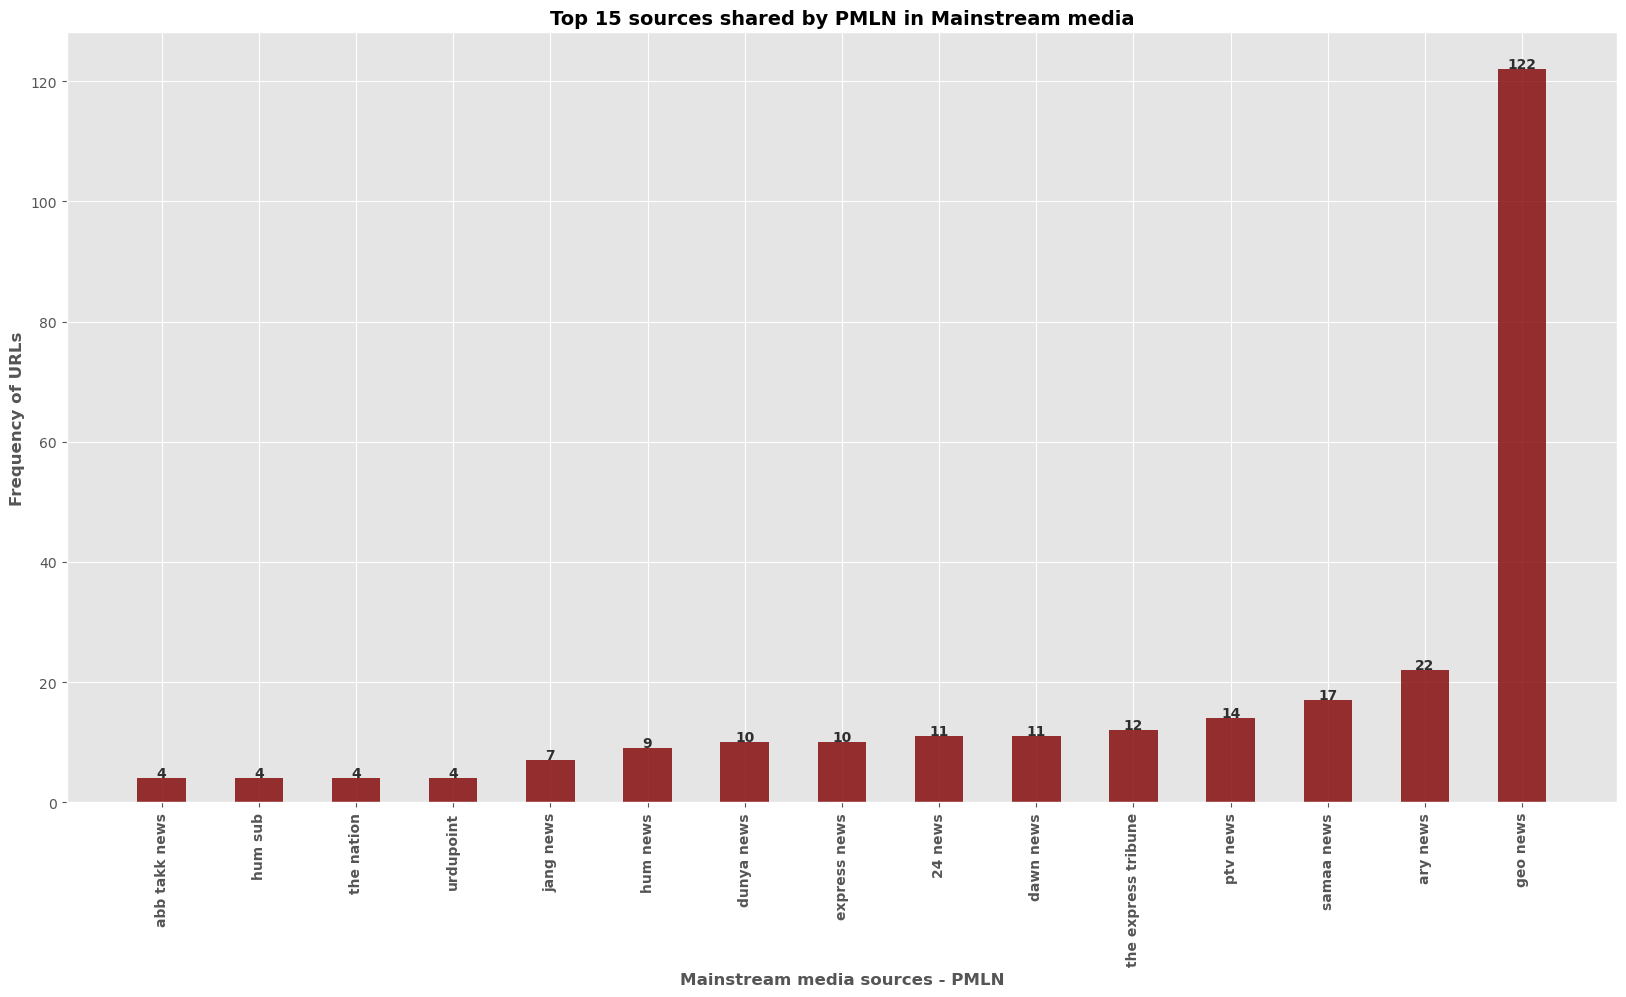

In [1942]:
j = 138
for i in range(2):
    fig, ax = plt.subplots(figsize=(20,10))
    if i==0:
        counts = collections.Counter(PTI_temp_4['classification source'][0])
        names = counts.keys()
        values = counts.values()
        names = [x for _, x in sorted(zip(values, names), reverse=True)]
        values = sorted(values, reverse=True)
        plt.bar(range(len(values[:15])), values[:15], tick_label=names[:15], color='maroon', width=0.5, alpha=0.8)
        plt.xlabel('Mainstream media sources - PTI', fontsize=12, fontweight='bold')
        plt.ylabel('Frequency of URLs', fontsize=12, fontweight='bold')
        plt.title('Top 15 sources shared by PTI in Mainstream media', fontsize=14, fontweight='bold')
        addlabels_2(range(len(values[:15])), values[:15])
        ax = plt.gca()
        labels = ax.get_xticklabels() 
        [label.set_fontweight('bold') for label in ax.get_xticklabels()]
        fig.autofmt_xdate(rotation=90, ha='center')

    else:
        counts = collections.Counter(PMLN_temp_4['classification source'][0])
        names = counts.keys()
        values = counts.values()
        names = [x for _, x in sorted(zip(values, names))]
        values = sorted(values)
        plt.bar(range(len(values[-15:])), values[-15:], tick_label=names[-15:], color='maroon', width=0.5, alpha=0.8)
        plt.xlabel('Mainstream media sources - PMLN', fontsize=12, fontweight='bold')
        plt.ylabel('Frequency of URLs', fontsize=12, fontweight='bold')
        plt.title('Top 15 sources shared by PMLN in Mainstream media', fontsize=14, fontweight='bold')
        addlabels_2(range(len(values[-15:])), values[-15:])
        ax = plt.gca()
        labels = ax.get_xticklabels() 
        [label.set_fontweight('bold') for label in labels]
        ax.tick_params(axis='x', rotation=90)
    plt.savefig(str(j)+'.png', bbox_inches='tight')
    j+=1
plt.show()

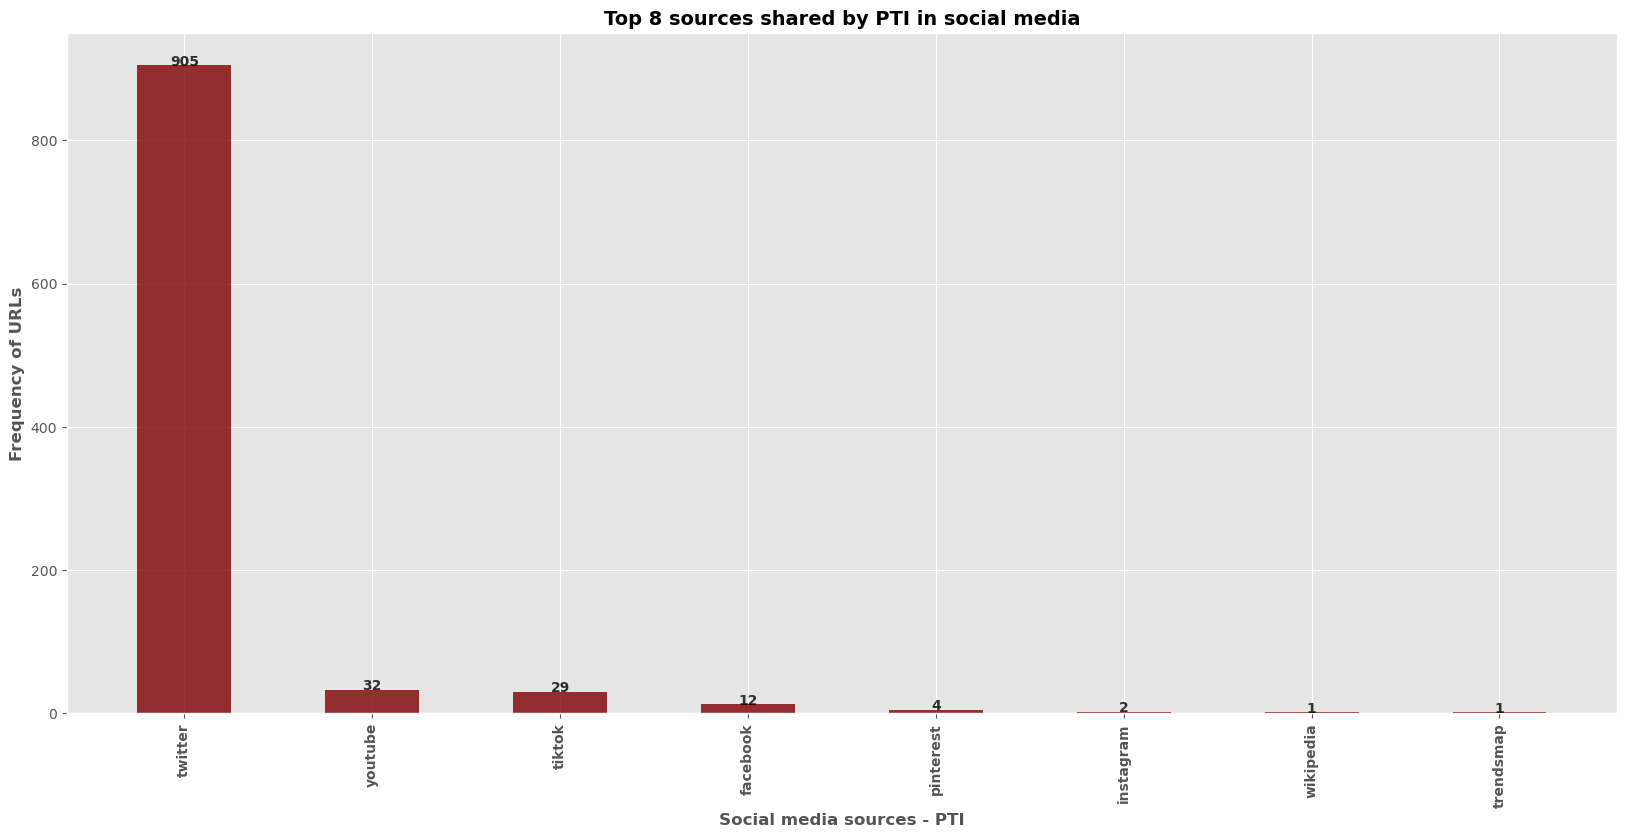

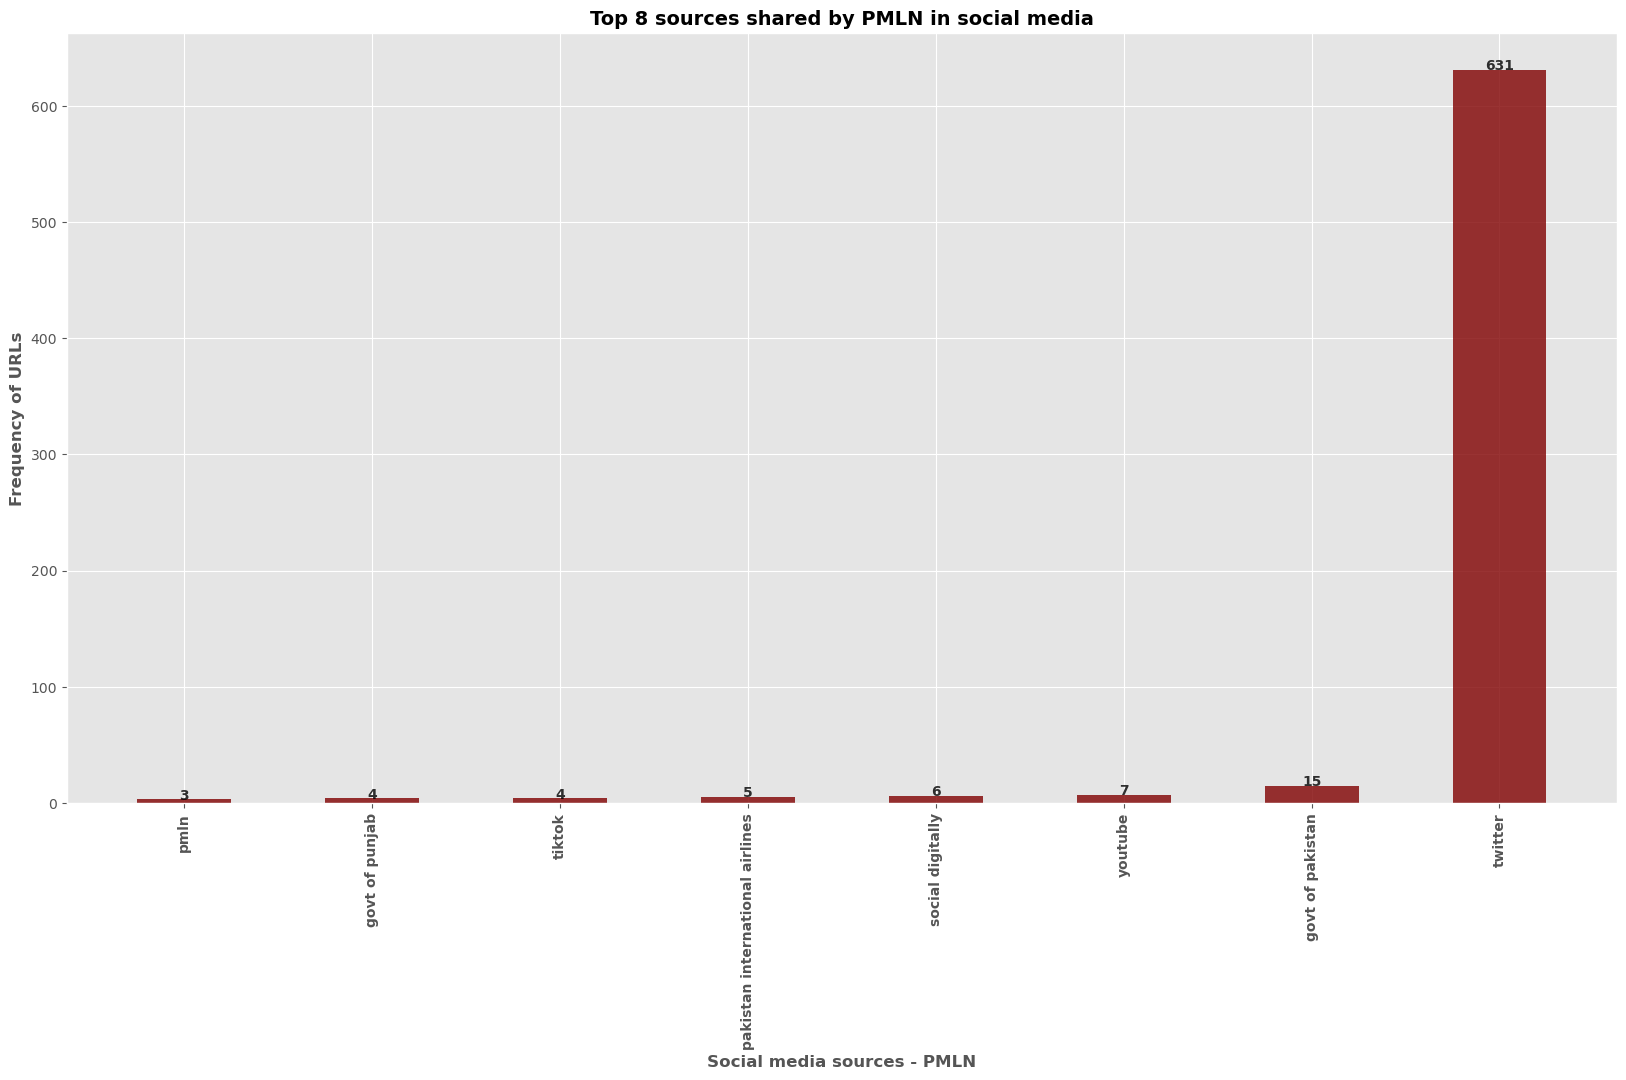

In [1944]:
j = 140
for i in range(2):
    fig, ax = plt.subplots(figsize=(20,10))
    if i==0:
        counts = collections.Counter(PTI_temp_4['classification source'][1])
        names = counts.keys()
        values = counts.values()
        names = [x for _, x in sorted(zip(values, names), reverse=True)]
        values = sorted(values, reverse=True)
        plt.bar(range(len(values[:8])), values[:8], tick_label=names[:8], color='maroon', width=0.5, alpha=0.8)
        plt.xlabel('Social media sources - PTI', fontsize=12, fontweight='bold')
        plt.ylabel('Frequency of URLs', fontsize=12, fontweight='bold')
        plt.title('Top 8 sources shared by PTI in social media', fontsize=14, fontweight='bold')
        addlabels_2(range(len(values[:8])), values[:8])
        ax = plt.gca()
        labels = ax.get_xticklabels() 
        [label.set_fontweight('bold') for label in ax.get_xticklabels()]
        fig.autofmt_xdate(rotation=90, ha='center')

    else:
        counts = collections.Counter(PMLN_temp_4['classification source'][1])
        names = counts.keys()
        values = counts.values()
        names = [x for _, x in sorted(zip(values, names))]
        values = sorted(values)
        plt.bar(range(len(values[-8:])), values[-8:], tick_label=names[-8:], color='maroon', width=0.5, alpha=0.8)
        plt.xlabel('Social media sources - PMLN', fontsize=12, fontweight='bold')
        plt.ylabel('Frequency of URLs', fontsize=12, fontweight='bold')
        plt.title('Top 8 sources shared by PMLN in social media', fontsize=14, fontweight='bold')
        addlabels_2(range(len(values[-8:])), values[-8:])
        ax = plt.gca()
        labels = ax.get_xticklabels() 
        [label.set_fontweight('bold') for label in labels]
        ax.tick_params(axis='x', rotation=90)
    plt.savefig(str(j)+'.png', bbox_inches='tight')
    j+=1
plt.show()

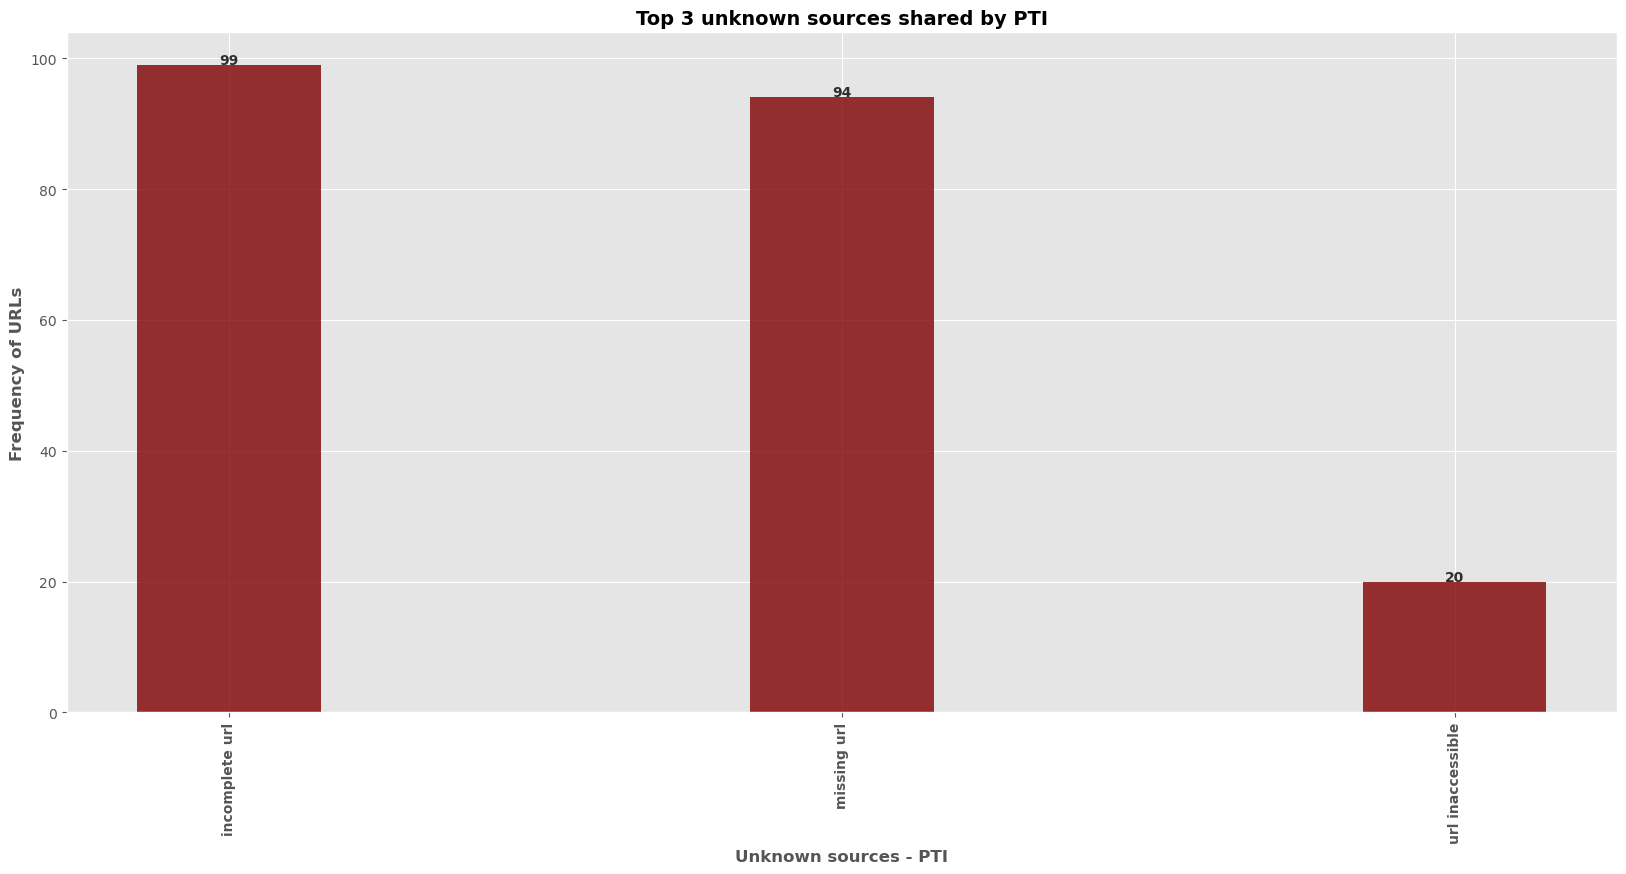

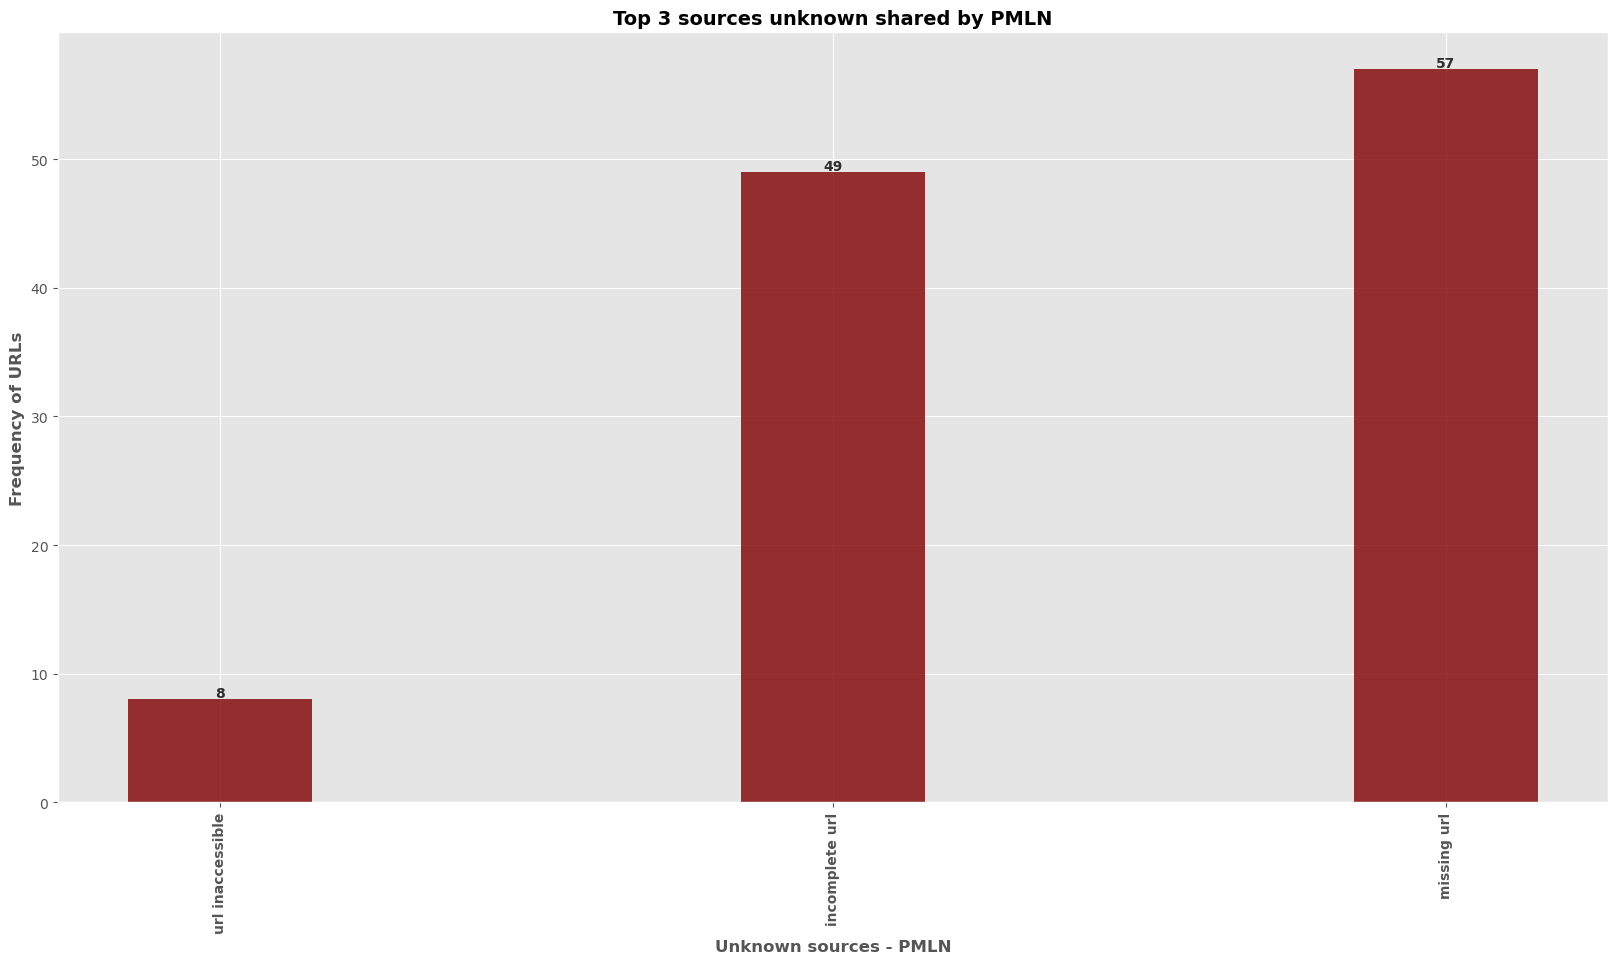

In [1945]:
j = 142
for i in range(2):
    fig, ax = plt.subplots(figsize=(20,10))
    if i==0:
        counts = collections.Counter(PTI_temp_4['classification source'][3])
        names = counts.keys()
        values = counts.values()
        names = [x for _, x in sorted(zip(values, names), reverse=True)]
        values = sorted(values, reverse=True)
        plt.bar(range(len(values[:3])), values[:3], tick_label=names[:3], color='maroon', width=0.3, alpha=0.8)
        plt.xlabel('Unknown sources - PTI', fontsize=12, fontweight='bold')
        plt.ylabel('Frequency of URLs', fontsize=12, fontweight='bold')
        plt.title('Top 3 unknown sources shared by PTI', fontsize=14, fontweight='bold')
        addlabels_2(range(len(values[:3])), values[:3])
        ax = plt.gca()
        labels = ax.get_xticklabels() 
        [label.set_fontweight('bold') for label in ax.get_xticklabels()]
        fig.autofmt_xdate(rotation=90, ha='center')

    else:
        counts = collections.Counter(PMLN_temp_4['classification source'][2])
        names = counts.keys()
        values = counts.values()
        names = [x for _, x in sorted(zip(values, names))]
        values = sorted(values)
        plt.bar(range(len(values[-3:])), values[-3:], tick_label=names[-3:], color='maroon', width=0.3, alpha=0.8)
        plt.xlabel('Unknown sources - PMLN', fontsize=12, fontweight='bold')
        plt.ylabel('Frequency of URLs', fontsize=12, fontweight='bold')
        plt.title('Top 3 sources unknown shared by PMLN', fontsize=14, fontweight='bold')
        addlabels_2(range(len(values[-3:])), values[-3:])
        ax = plt.gca()
        labels = ax.get_xticklabels() 
        [label.set_fontweight('bold') for label in labels]
        ax.tick_params(axis='x', rotation=90)
    plt.savefig(str(j)+'.png', bbox_inches='tight')
    j+=1
plt.show()

##### Descriptive statistic 5: Using Perspective API toxicity and inflammatory classifiers

In [1946]:
print('Average toxicity score in PTI = ', PTI['toxicity score'].agg(np.mean))
print('Average inflammatory in PTI = ', PTI['inflammatory score'].agg(np.mean))

print('Average toxicity score in PMLN = ', PMLN['toxicity score'].agg(np.mean))
print('Average inflammatory in PMLN = ', PMLN['inflammatory score'].agg(np.mean))

Average toxicity score in PTI =  0.10952606979463565
Average inflammatory in PTI =  0.33767540186420647
Average toxicity score in PMLN =  0.11323389003504401
Average inflammatory in PMLN =  0.3444009082479786


In [1947]:
a = ("PTI", "PMLN")
b = {'Average toxicity score':(PTI['toxicity score'].agg(np.mean), PMLN['toxicity score'].agg(np.mean)),
    'Average inflammatory score': (PTI['inflammatory score'].agg(np.mean), PMLN['inflammatory score'].agg(np.mean)),
    }

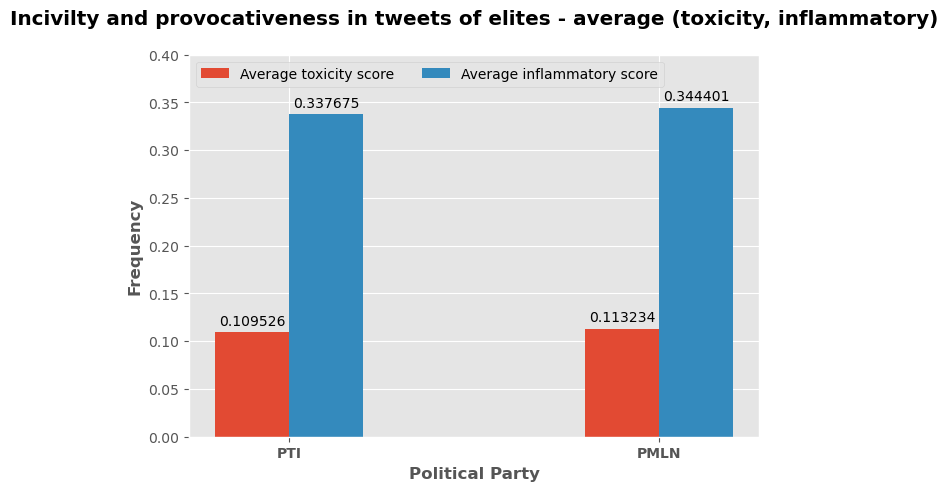

In [1948]:
x = np.arange(len(a))
width = 0.2  # the width of the bars
multiplier = 1
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in b.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_xlabel('Political Party', fontweight='bold')
ax.set_title('Incivilty and provocativeness in tweets of elites - average (toxicity, inflammatory)\n', fontweight='bold')
ax.set_xticks(x + 1.5*width, a)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.4)
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]

plt.savefig('144.png', bbox_inches='tight')
plt.show()

In [1949]:
PTI_temp_5 = PTI.groupby(by=PTI['politician'])
mean = PTI_temp_5.mean(numeric_only=True)
toxicity = mean['toxicity score'].sort_values(ascending=False)
toxicity

politician
Shireen Mazari          0.137481
Naureen Ibrahim         0.132389
Shabaz Gill             0.126132
Imran Khan              0.125309
Shehryar Afridi         0.121885
Zartaj Gul Wazir        0.115496
Qasim Khan Suri         0.115342
Shah Mehmood Qureshi    0.108700
Fawad Chaudhry          0.102184
Dr. Yasmin Rashid       0.100354
Murad Saeed             0.094296
Shafqat Mahmood         0.091370
Ali Muhammad            0.089934
Asad Umar               0.088209
Hammad Azhar            0.079895
Asad Qaiser             0.063047
Name: toxicity score, dtype: float64

In [1950]:
inflammatory = mean['inflammatory score'].sort_values(ascending=False)
inflammatory

politician
Imran Khan              0.409005
Shafqat Mahmood         0.371945
Asad Qaiser             0.367442
Shehryar Afridi         0.365337
Shireen Mazari          0.362915
Naureen Ibrahim         0.360569
Shabaz Gill             0.358337
Shah Mehmood Qureshi    0.355299
Zartaj Gul Wazir        0.349574
Qasim Khan Suri         0.341718
Dr. Yasmin Rashid       0.341464
Asad Umar               0.333142
Murad Saeed             0.320149
Ali Muhammad            0.318722
Fawad Chaudhry          0.318052
Hammad Azhar            0.270864
Name: inflammatory score, dtype: float64

In [1951]:
temp = inflammatory.to_frame().join(toxicity)
temp = temp.sort_values(by=['inflammatory score'],ascending=False)
temp

inflammatory score  toxicity score
politician                                              
Imran Khan                      0.409005        0.125309
Shafqat Mahmood                 0.371945        0.091370
Asad Qaiser                     0.367442        0.063047
Shehryar Afridi                 0.365337        0.121885
Shireen Mazari                  0.362915        0.137481
Naureen Ibrahim                 0.360569        0.132389
Shabaz Gill                     0.358337        0.126132
Shah Mehmood Qureshi            0.355299        0.108700
Zartaj Gul Wazir                0.349574        0.115496
Qasim Khan Suri                 0.341718        0.115342
Dr. Yasmin Rashid               0.341464        0.100354
Asad Umar                       0.333142        0.088209
Murad Saeed                     0.320149        0.094296
Ali Muhammad                    0.318722        0.089934
Fawad Chaudhry                  0.318052        0.102184
Hammad Azhar                    0.270864        0.079895

In [1952]:
a = temp.index
b = {'Average inflammatory score': round(temp['inflammatory score'],2),
     'Average toxicity score':round(temp['toxicity score'],2),
    }

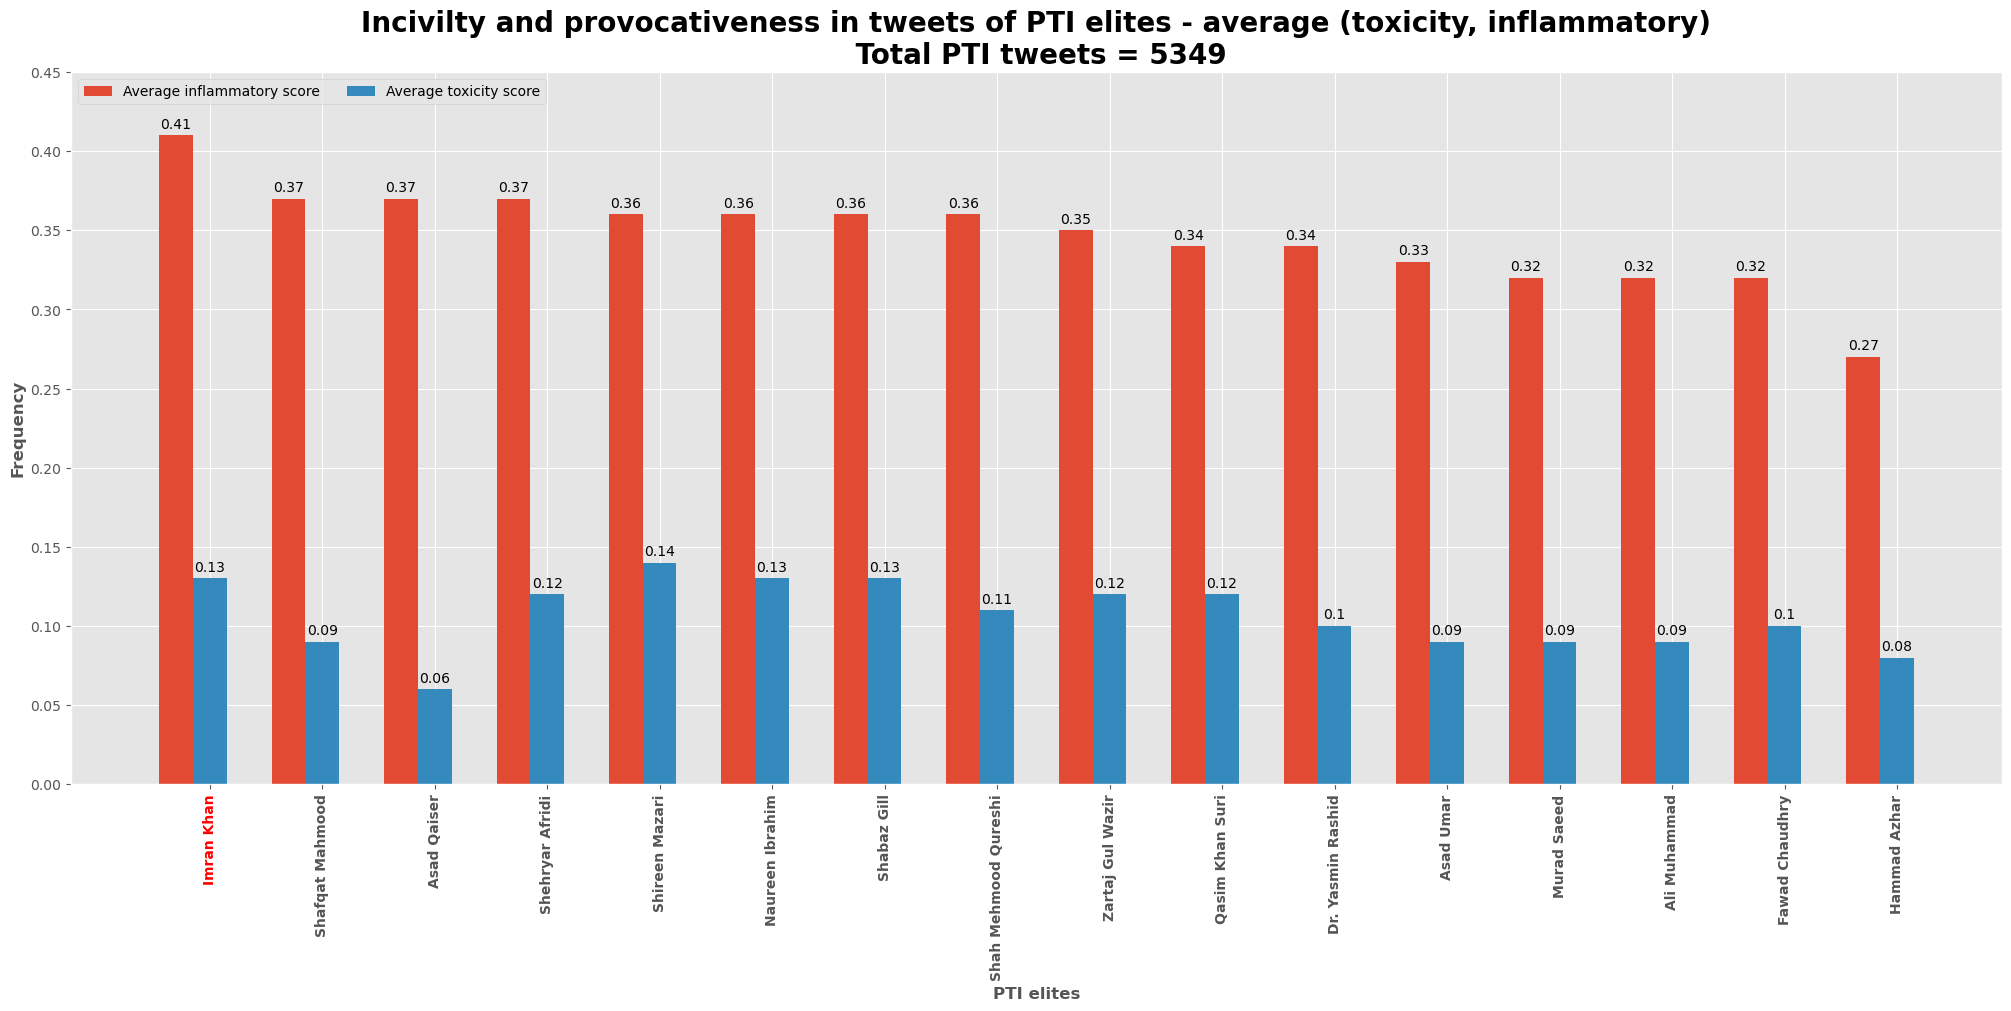

In [1953]:
x = np.arange(len(a))
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in b.items():
    offset = width * multiplier 
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_xlabel('PTI elites', fontweight='bold')
ax.set_title('Incivilty and provocativeness in tweets of PTI elites - average (toxicity, inflammatory)\n Total PTI tweets = ' + str(sum(tweets_by_PTI_elites)), fontsize=20, fontweight='bold')
ax.set_xticks(x + width, a)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.45)
plt.xticks(rotation=90)
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
plt.gca().get_xticklabels()[0].set_color('red') 

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.savefig('145.png', bbox_inches='tight')
plt.show()

In [1954]:
PMLN_temp_5 = PMLN.groupby(by=PMLN['politician'])
mean = PMLN_temp_5.mean(numeric_only=True)
toxicity = mean['toxicity score'].sort_values(ascending=False)
toxicity

politician
Khawaja Saad Rafique     0.144680
Maryam Nawaz Sharif      0.130013
Hina Parvez Butt         0.128650
Ahsan Iqbal              0.112030
Shaza Fatima Khawaja     0.109454
Khawaja Muhammad Asif    0.107938
Rana Sanaullah           0.102677
Nawaz Sharif             0.102135
Marriyum Aurangzeb       0.101086
Ayesha Rajab Ali         0.082282
Hamza Shehbaz Sharif     0.082188
Miftah Ismail            0.072032
Shehbaz Sharif           0.067335
Ayaz Sadiq               0.017507
Shahid Khaqan Abbasi     0.013760
Aisha Ghaus Pasha        0.011456
Name: toxicity score, dtype: float64

In [1955]:
inflammatory = mean['inflammatory score'].sort_values(ascending=False)
inflammatory

politician
Nawaz Sharif             0.768470
Khawaja Saad Rafique     0.377919
Khawaja Muhammad Asif    0.370328
Maryam Nawaz Sharif      0.362553
Hina Parvez Butt         0.360290
Ayesha Rajab Ali         0.345681
Rana Sanaullah           0.344593
Hamza Shehbaz Sharif     0.339849
Ahsan Iqbal              0.337291
Marriyum Aurangzeb       0.332525
Shaza Fatima Khawaja     0.330747
Shahid Khaqan Abbasi     0.298670
Shehbaz Sharif           0.296168
Ayaz Sadiq               0.278006
Miftah Ismail            0.260660
Aisha Ghaus Pasha        0.090842
Name: inflammatory score, dtype: float64

In [1956]:
temp_1 = inflammatory.to_frame().join(toxicity)
temp_1 = temp_1.sort_values(by=['inflammatory score'],ascending=False)
temp_1

inflammatory score  toxicity score
politician                                               
Nawaz Sharif                     0.768470        0.102135
Khawaja Saad Rafique             0.377919        0.144680
Khawaja Muhammad Asif            0.370328        0.107938
Maryam Nawaz Sharif              0.362553        0.130013
Hina Parvez Butt                 0.360290        0.128650
Ayesha Rajab Ali                 0.345681        0.082282
Rana Sanaullah                   0.344593        0.102677
Hamza Shehbaz Sharif             0.339849        0.082188
Ahsan Iqbal                      0.337291        0.112030
Marriyum Aurangzeb               0.332525        0.101086
Shaza Fatima Khawaja             0.330747        0.109454
Shahid Khaqan Abbasi             0.298670        0.013760
Shehbaz Sharif                   0.296168        0.067335
Ayaz Sadiq                       0.278006        0.017507
Miftah Ismail                    0.260660        0.072032
Aisha Ghaus Pasha                0.090842        0.011456

In [1957]:
a = temp_1.index
b = {'Average inflammatory score': round(temp_1['inflammatory score'],2),
     'Average toxicity score':round(temp_1['toxicity score'],2),
    }

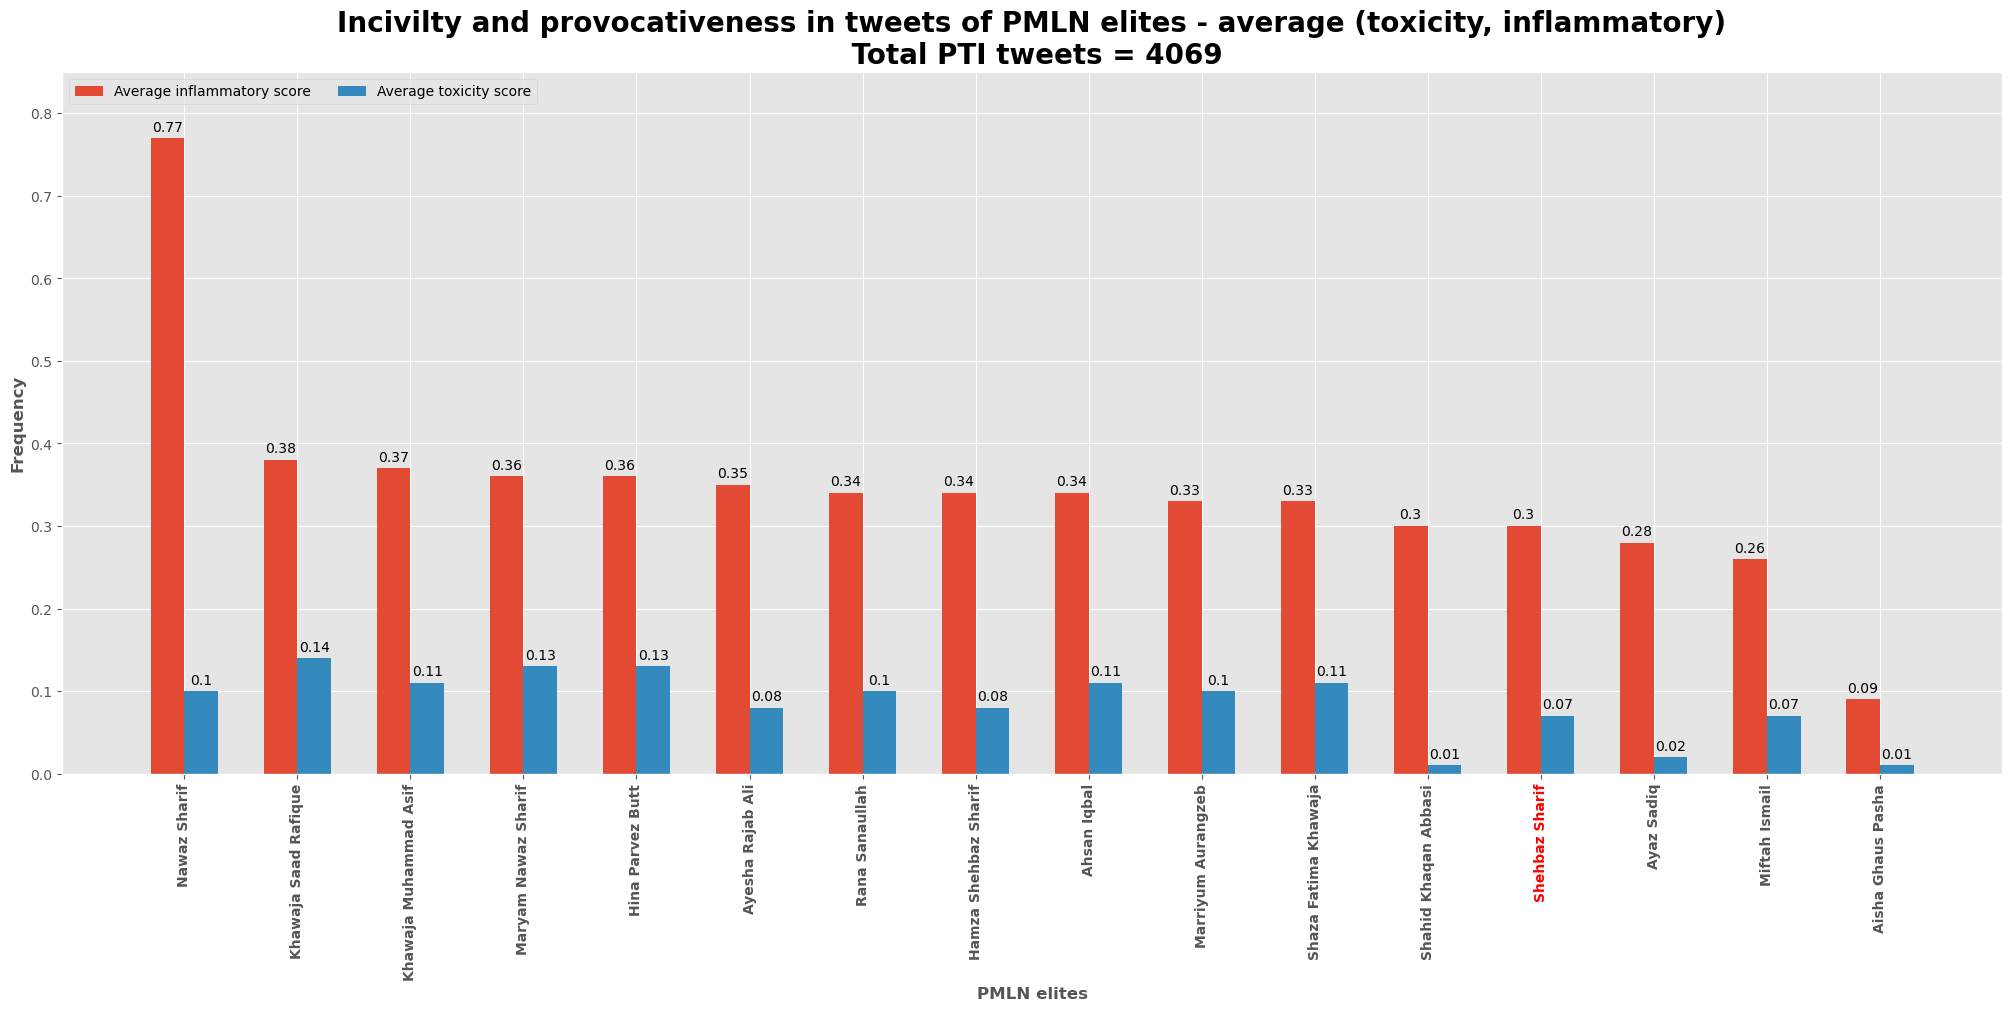

In [1958]:
x = np.arange(len(a))
width = 0.3 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in b.items():
    offset = width * multiplier 
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_xlabel('PMLN elites', fontweight='bold')
ax.set_title('Incivilty and provocativeness in tweets of PMLN elites - average (toxicity, inflammatory)\n Total PTI tweets = ' + str(sum(tweets_by_PMLN_elites)), fontsize=20, fontweight='bold')
ax.set_xticks(x + 0.5*width, a)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.85)
plt.xticks(rotation=90)
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
plt.gca().get_xticklabels()[12].set_color('red') 

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.savefig('146.png', bbox_inches='tight')

plt.show()

In [1959]:
temp = temp.sort_values(by=['toxicity score'],ascending=False)
temp_1 = temp_1.sort_values(by=['toxicity score'],ascending=False)

In [1960]:
temp['toxicity score'] = round(temp['toxicity score'],3)
temp['inflammatory score'] = round(temp['inflammatory score'],3)

temp_1['toxicity score'] = round(temp_1['toxicity score'],3)
temp_1['inflammatory score'] = round(temp_1['inflammatory score'],3)

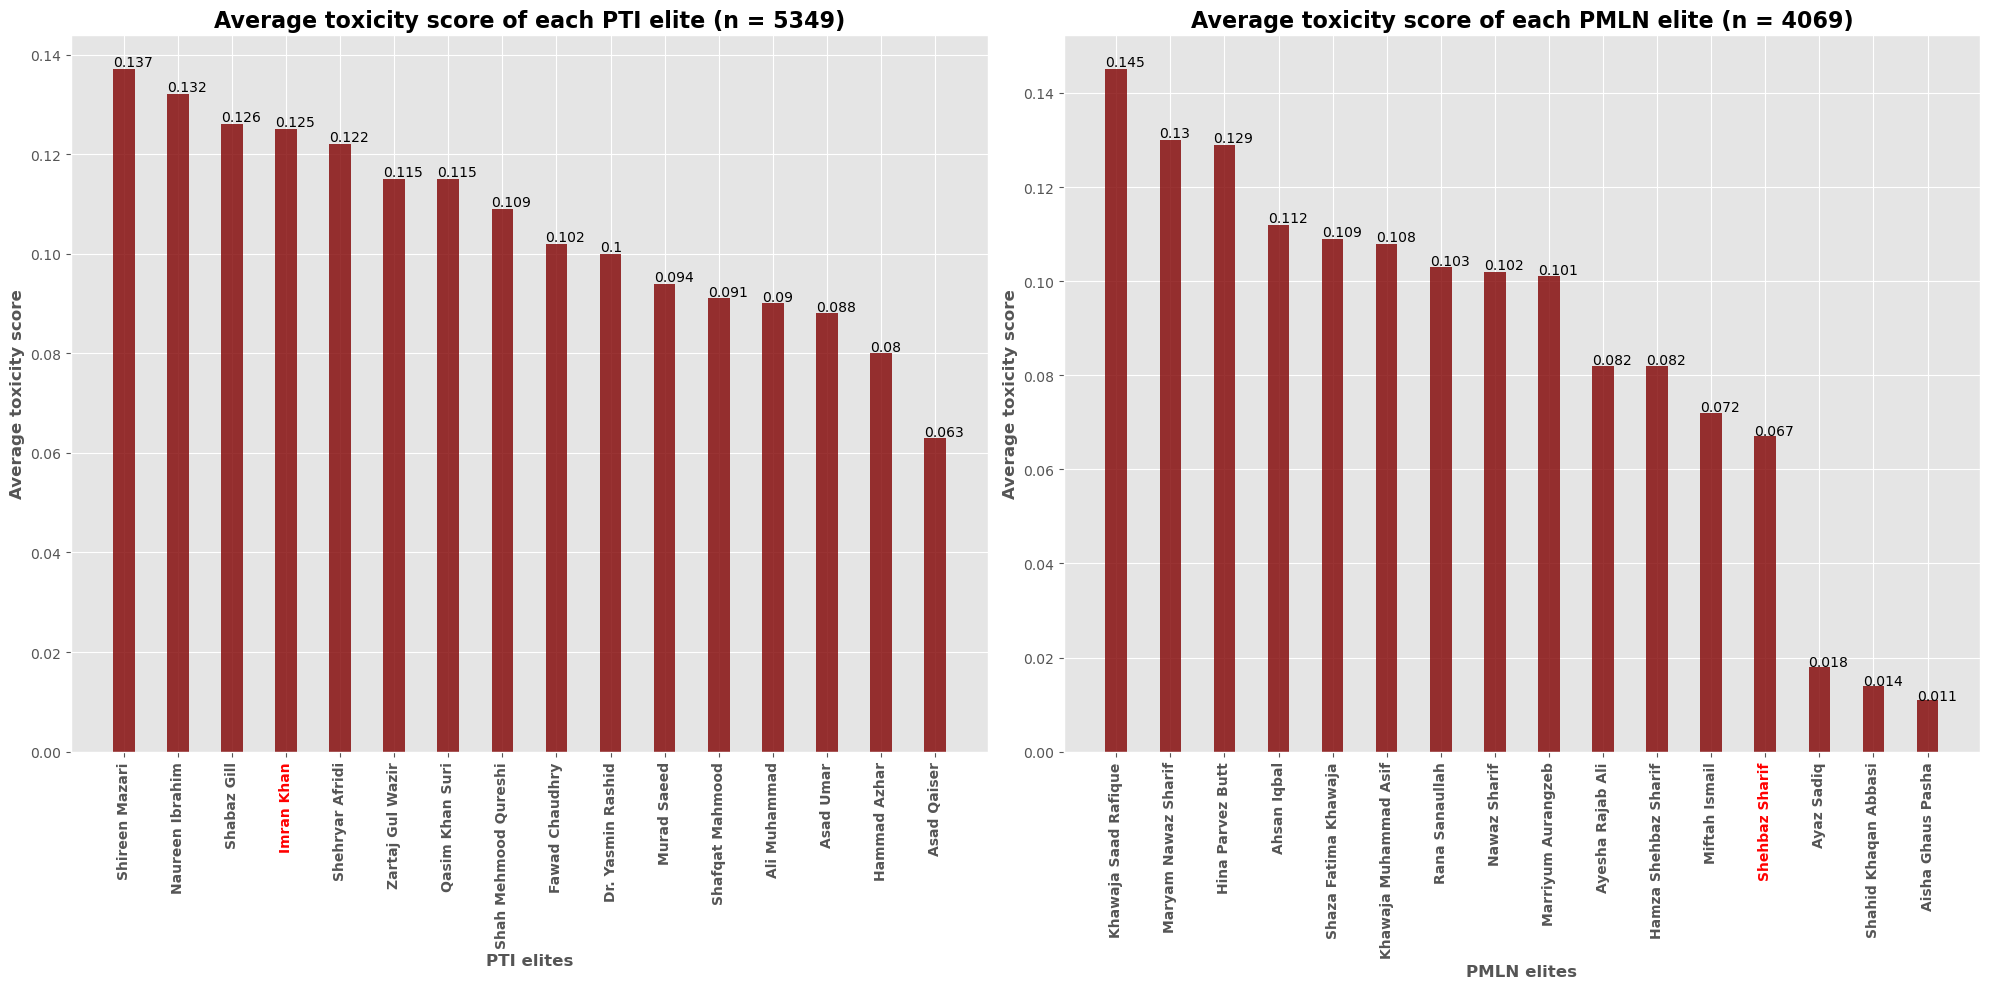

In [1961]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.bar(temp.index,temp['toxicity score'], color='maroon', width=0.4, alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('PTI elites', fontweight='bold')
plt.ylabel('Average toxicity score', fontweight='bold')
plt.title("Average toxicity score of each PTI elite (n = " + str(sum(tweets_by_PTI_elites))+')', fontsize=16, fontweight='bold')
plt.gca().get_xticklabels()[3].set_color('red') 
fig = plt.gcf()
plt.xticks(rotation=90)
ax = plt.gca()
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.000, p.get_height() * 1.005))
fig.set_size_inches(20, 10)

plt.subplot(1, 2, 2) # index 2
plt.bar(temp_1.index,temp_1['toxicity score'], color='maroon', width=0.4, alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('PMLN elites', fontweight='bold')
plt.ylabel('Average toxicity score', fontweight='bold')
plt.title("Average toxicity score of each PMLN elite (n = "+ str(sum(tweets_by_PMLN_elites))+')', fontsize=16, fontweight='bold')
plt.gca().get_xticklabels()[12].set_color('red') 
fig = plt.gcf()
plt.xticks(rotation=90)
ax = plt.gca()
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.000, p.get_height() * 1.005))
fig.set_size_inches(20, 10)
fig.tight_layout()

plt.savefig('147.png', bbox_inches='tight')

plt.show()

In [1962]:
temp = temp.sort_values(by=['inflammatory score'],ascending=False)
temp_1 = temp_1.sort_values(by=['inflammatory score'],ascending=False)

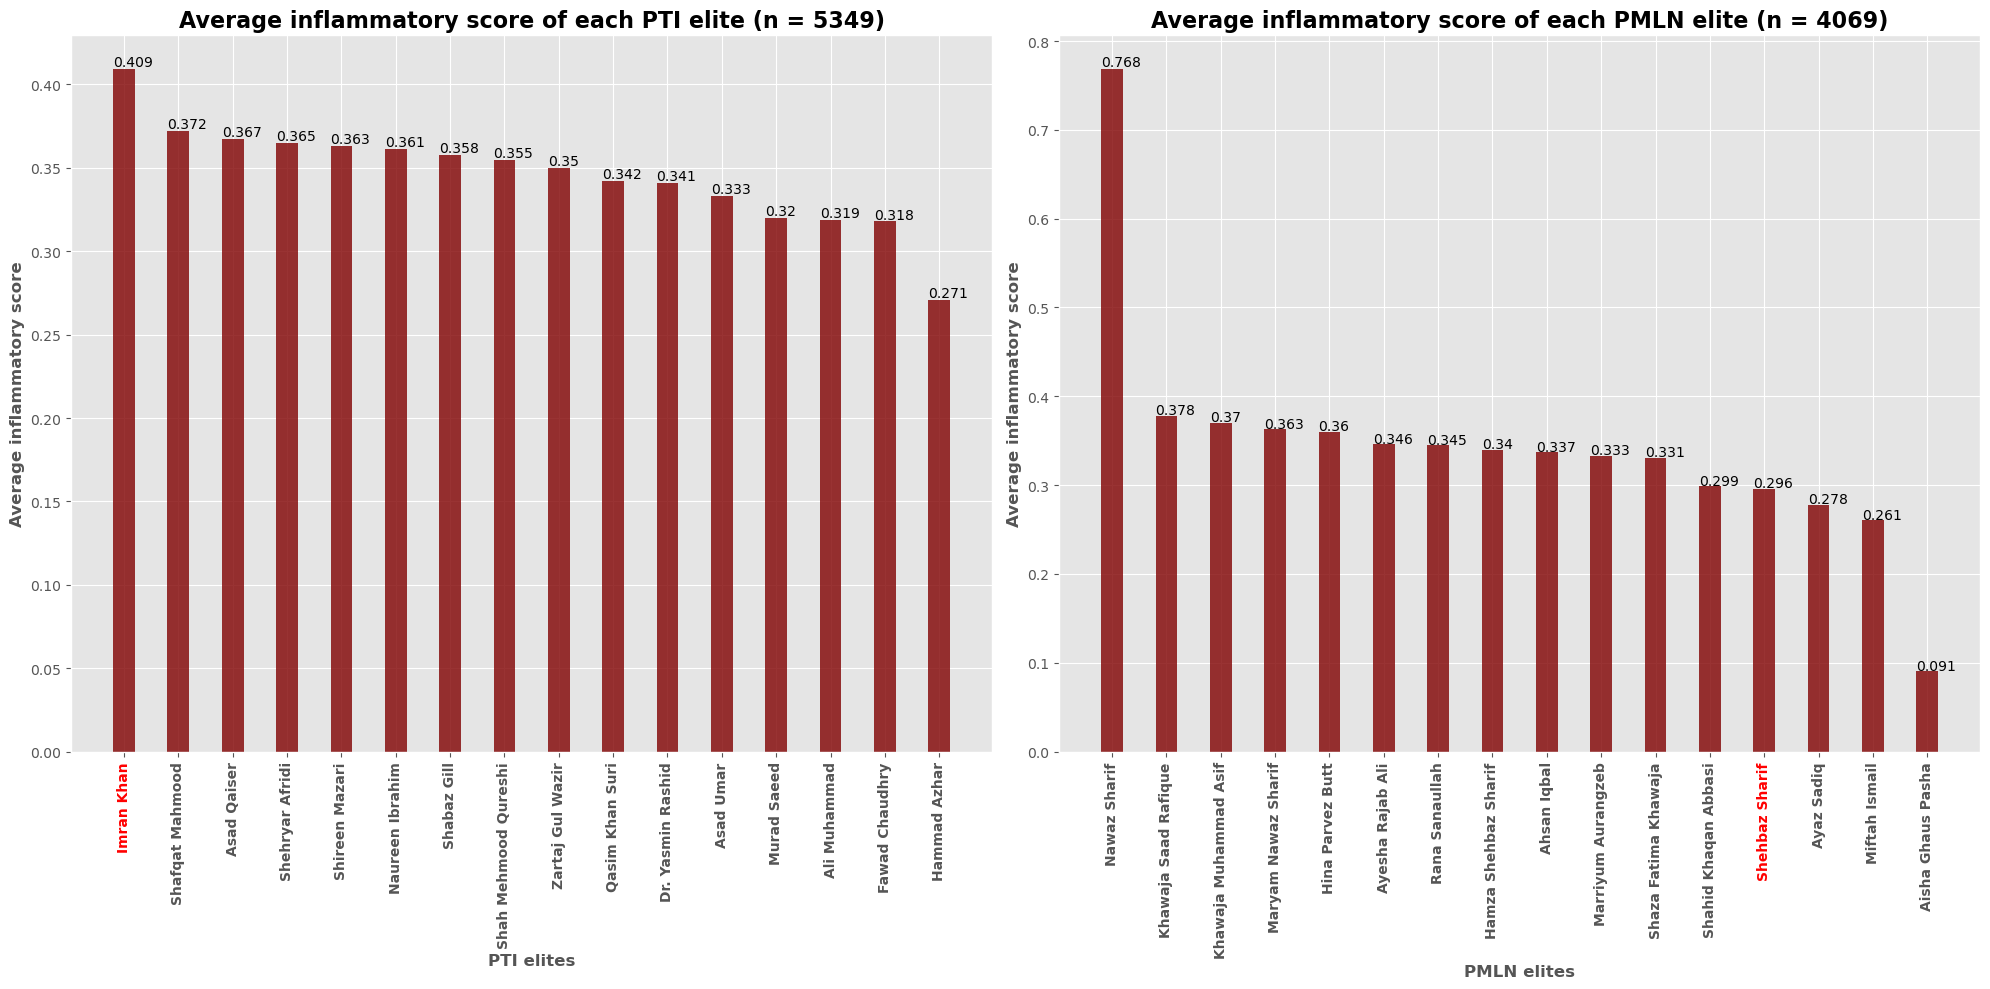

In [1963]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.bar(temp.index,temp['inflammatory score'], color='maroon', width=0.4, alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('PTI elites', fontweight='bold')
plt.ylabel('Average inflammatory score', fontweight='bold')
plt.title("Average inflammatory score of each PTI elite (n = " + str(sum(tweets_by_PTI_elites))+')', fontsize=16, fontweight='bold')
plt.gca().get_xticklabels()[0].set_color('red') 
fig = plt.gcf()
plt.xticks(rotation=90)
ax = plt.gca()
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.000, p.get_height() * 1.005))
fig.set_size_inches(20, 10)

plt.subplot(1, 2, 2) # index 2
plt.bar(temp_1.index,temp_1['inflammatory score'], color='maroon', width=0.4, alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('PMLN elites', fontweight='bold')
plt.ylabel('Average inflammatory score', fontweight='bold')
plt.title("Average inflammatory score of each PMLN elite (n = "+ str(sum(tweets_by_PMLN_elites))+')', fontsize=16, fontweight='bold')
plt.gca().get_xticklabels()[12].set_color('red') 
fig = plt.gcf()
plt.xticks(rotation=90)
ax = plt.gca()
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.000, p.get_height() * 1.005))
fig.set_size_inches(20, 10)
fig.tight_layout()

plt.savefig('148.png', bbox_inches='tight')

plt.show()

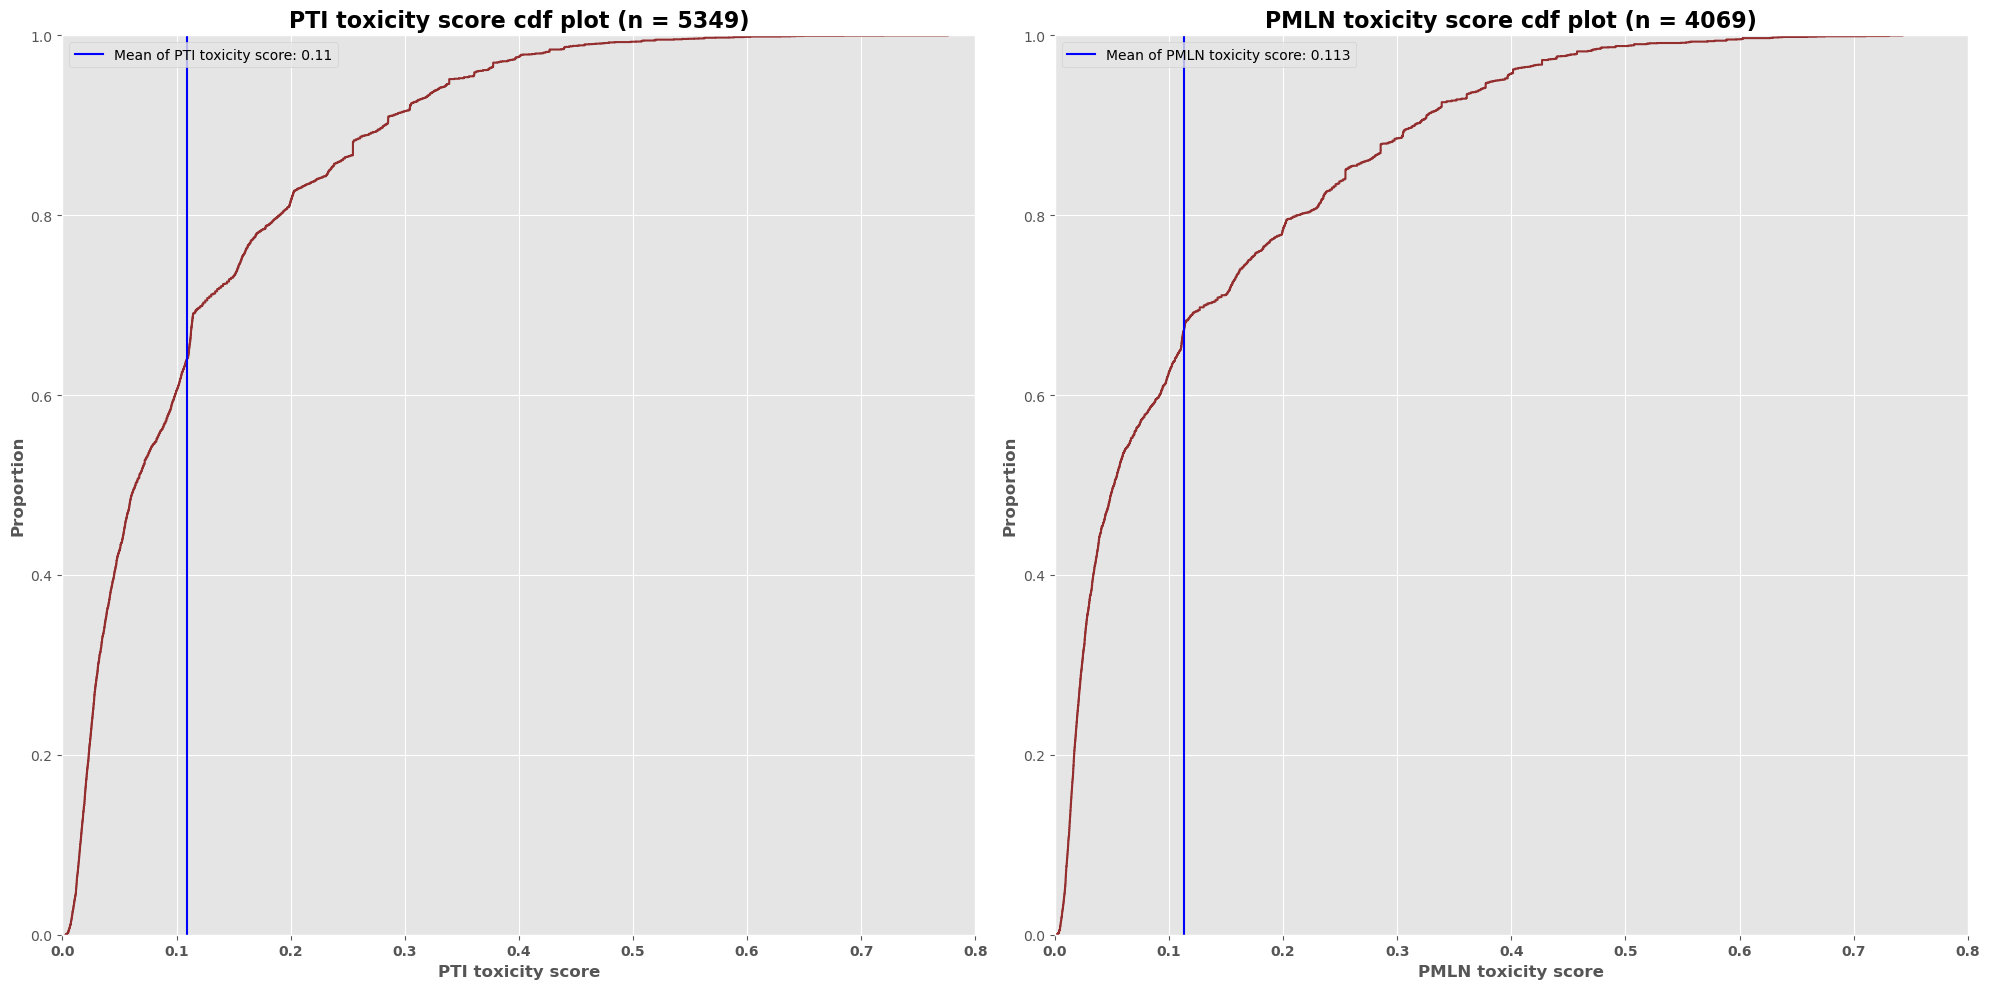

In [1964]:
fig, ax = plt.subplots(1,2,figsize=(20, 10)) # row 1, col 2 index 1
sns.ecdfplot(data=PTI, x="toxicity score", color='maroon', alpha=0.8, ax=ax[0])
ax[0].axvline(x = PTI['toxicity score'].mean(), color = 'b', label = 'Mean of PTI toxicity score: '+str(round(PTI['toxicity score'].mean(),3)))
ax[0].set_title('PTI toxicity score cdf plot (n = '+str(sum(tweets_by_PTI_elites))+')', fontsize=16, fontweight='bold')
ax[0].set_xlabel("PTI toxicity score", fontsize=12, fontweight='bold')
ax[0].set_ylabel('Proportion', fontsize=12, fontweight='bold')
ax[0].set_xlim(0, 0.8)
ax[0].legend(loc='upper left')
labels = ax[0].get_xticklabels() 
[label.set_fontweight('bold') for label in labels]

sns.ecdfplot(data=PMLN, x="toxicity score", color='maroon', alpha=0.8, ax=ax[1])
ax[1].axvline(x = PMLN['toxicity score'].mean(), color = 'b', label = 'Mean of PMLN toxicity score: '+str(round(PMLN['toxicity score'].mean(),3)))
ax[1].set_title('PMLN toxicity score cdf plot (n = '+str(sum(tweets_by_PMLN_elites))+")", fontsize=16, fontweight='bold')
ax[1].set_xlabel("PMLN toxicity score", fontsize=12, fontweight='bold')
ax[1].set_ylabel('Proportion', fontsize=12, fontweight='bold')
ax[1].set_xlim(0, 0.8)
labels = ax[1].get_xticklabels() 
ax[1].legend(loc='upper left')
[label.set_fontweight('bold') for label in labels]

plt.savefig('149.png', bbox_inches='tight')

fig.tight_layout()

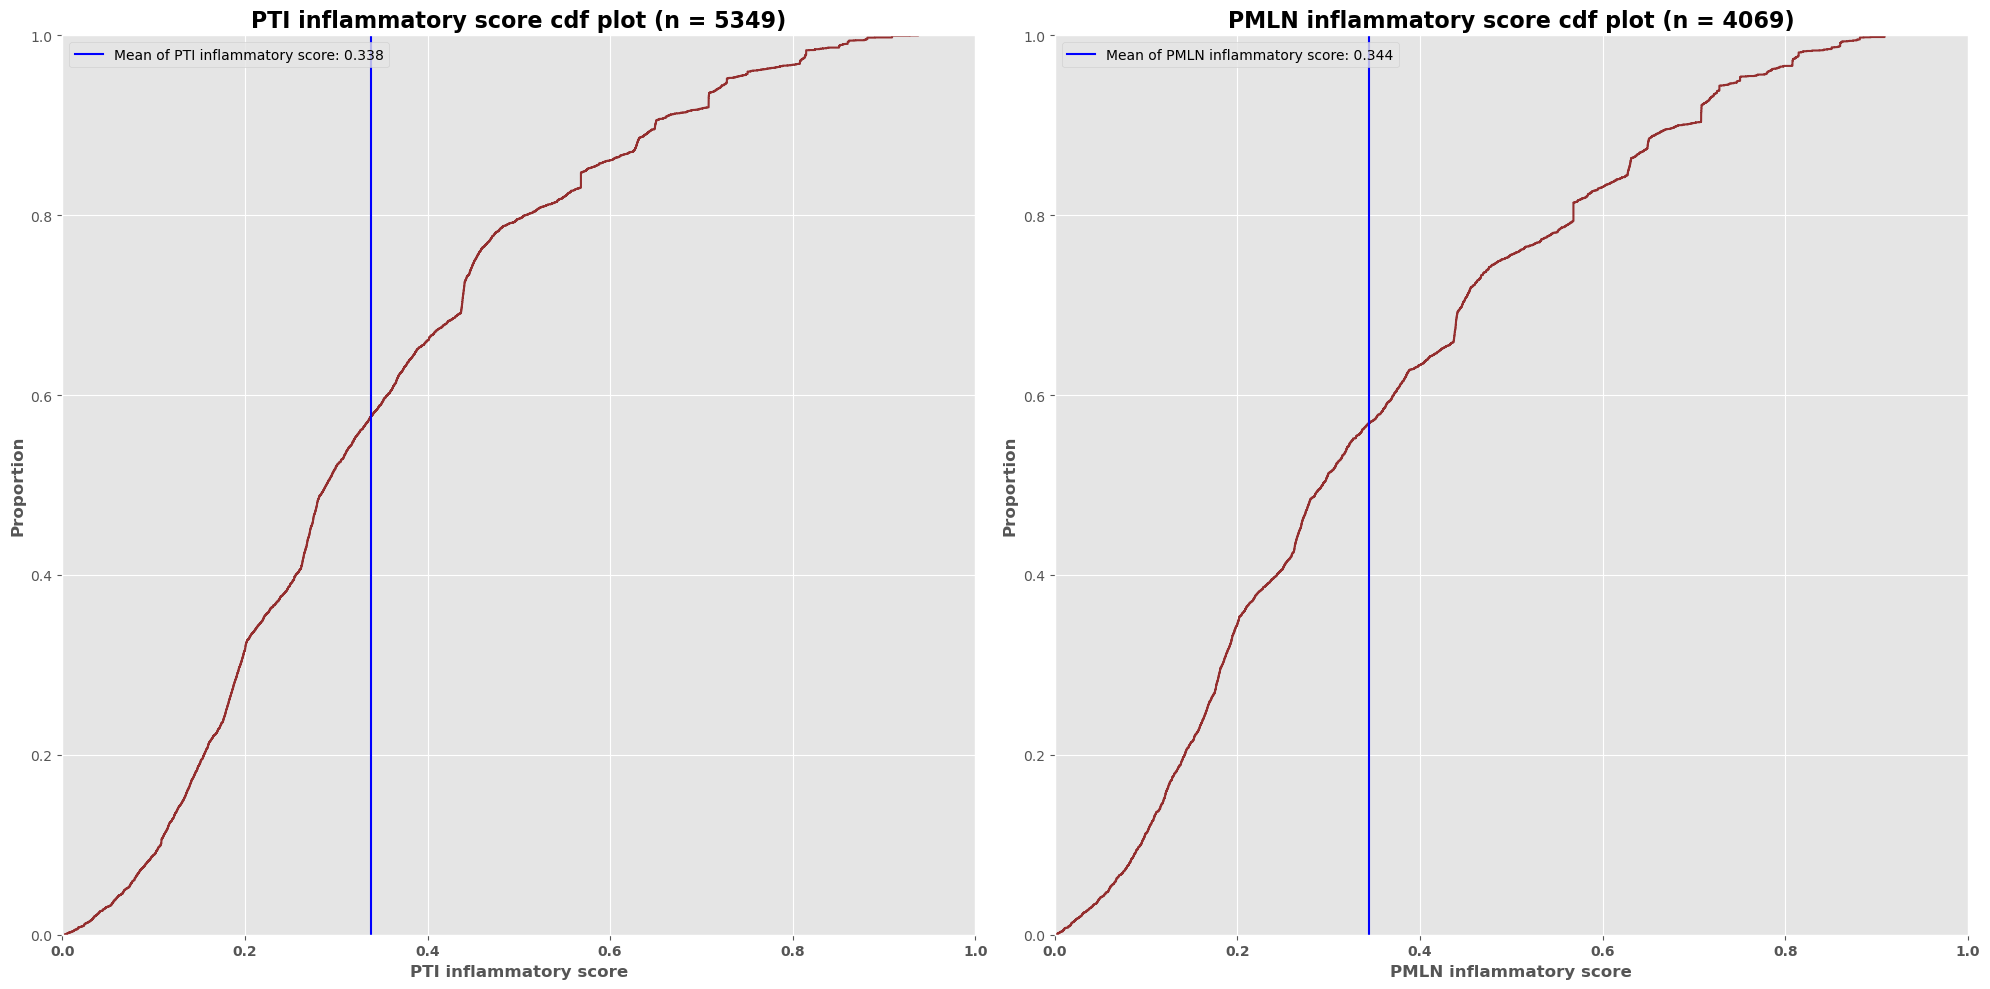

In [1965]:
fig, ax = plt.subplots(1,2,figsize=(20, 10)) # row 1, col 2 index 1
sns.ecdfplot(data=PTI, x="inflammatory score", color='maroon', alpha=0.8, ax=ax[0])
ax[0].axvline(x = PTI['inflammatory score'].mean(), color = 'b', label = 'Mean of PTI inflammatory score: '+str(round(PTI['inflammatory score'].mean(),3)))
ax[0].set_title('PTI inflammatory score cdf plot (n = '+str(sum(tweets_by_PTI_elites))+')', fontsize=16, fontweight='bold')
ax[0].set_xlabel("PTI inflammatory score", fontsize=12, fontweight='bold')
ax[0].set_ylabel('Proportion', fontsize=12, fontweight='bold')
ax[0].set_xlim(0, 1)
ax[0].legend(loc='upper left')
labels = ax[0].get_xticklabels() 
[label.set_fontweight('bold') for label in labels]

sns.ecdfplot(data=PMLN, x="inflammatory score", color='maroon', alpha=0.8, ax=ax[1])
ax[1].axvline(x = PMLN['inflammatory score'].mean(), color = 'b', label = 'Mean of PMLN inflammatory score: '+str(round(PMLN['inflammatory score'].mean(),3)))
ax[1].set_title('PMLN inflammatory score cdf plot (n = '+str(sum(tweets_by_PMLN_elites))+")", fontsize=16, fontweight='bold')
ax[1].set_xlabel("PMLN inflammatory score", fontsize=12, fontweight='bold')
ax[1].set_ylabel('Proportion', fontsize=12, fontweight='bold')
ax[1].set_xlim(0, 1)
labels = ax[1].get_xticklabels() 
ax[1].legend(loc='upper left')
[label.set_fontweight('bold') for label in labels]
plt.savefig('150.png', bbox_inches='tight')

fig.tight_layout()

##### Question 2. Do uncivil tweets get more likes/retweets?

In [1966]:
PTI_temp_6 = PTI.groupby(by=PTI['rank'])
mean_PTI = PTI_temp_6.mean(numeric_only=True)
mean_PTI

id      retweets      replies         likes  \
rank                                                                
Top 10%     1.523623e+18  16930.710600  1184.902973  18016.522154   
avg 10%     1.528928e+18   2209.435782   157.673584   4327.820527   
bottom 10%  1.532570e+18    323.611329     8.206955    290.916433   

                   score  norm_score  toxicity score  inflammatory score  
rank                                                                      
Top 10%     16887.166291    0.275381        0.121675            0.371152  
avg 10%      2416.142617    0.041099        0.121875            0.356700  
bottom 10%    260.309454    0.004396        0.083945            0.281743

In [1967]:
PMLN_temp_6 = PMLN.groupby(by=PMLN['rank'])
mean_PMLN = PMLN_temp_6.mean(numeric_only=True)
mean_PMLN

id     retweets      replies        likes        score  \
rank                                                                           
Top 10%     1.524081e+18  4014.887988  2222.848195  4536.683125  4211.096091   
avg 10%     1.527338e+18   412.017699   219.709440   819.423304   489.323542   
bottom 10%  1.529138e+18    96.882006    13.001475    81.198378   105.739954   

            norm_score  toxicity score  inflammatory score  
rank                                                        
Top 10%       0.161292        0.143556            0.417462  
avg 10%       0.018709        0.111776            0.335879  
bottom 10%    0.003257        0.082490            0.274240

In [1968]:
a = ("PTI", "PMLN")
b = {'Top 10% rank inflammatory score': (mean_PTI['inflammatory score']['Top 10%'], mean_PMLN['inflammatory score']['Top 10%']),
     'Average 10% rank inflammatory score': (mean_PTI['inflammatory score']['avg 10%'], mean_PMLN['inflammatory score']['avg 10%']),
     'Bottom 10% rank inflammatory score': (mean_PTI['inflammatory score']['bottom 10%'], mean_PMLN['inflammatory score']['bottom 10%']),
    }

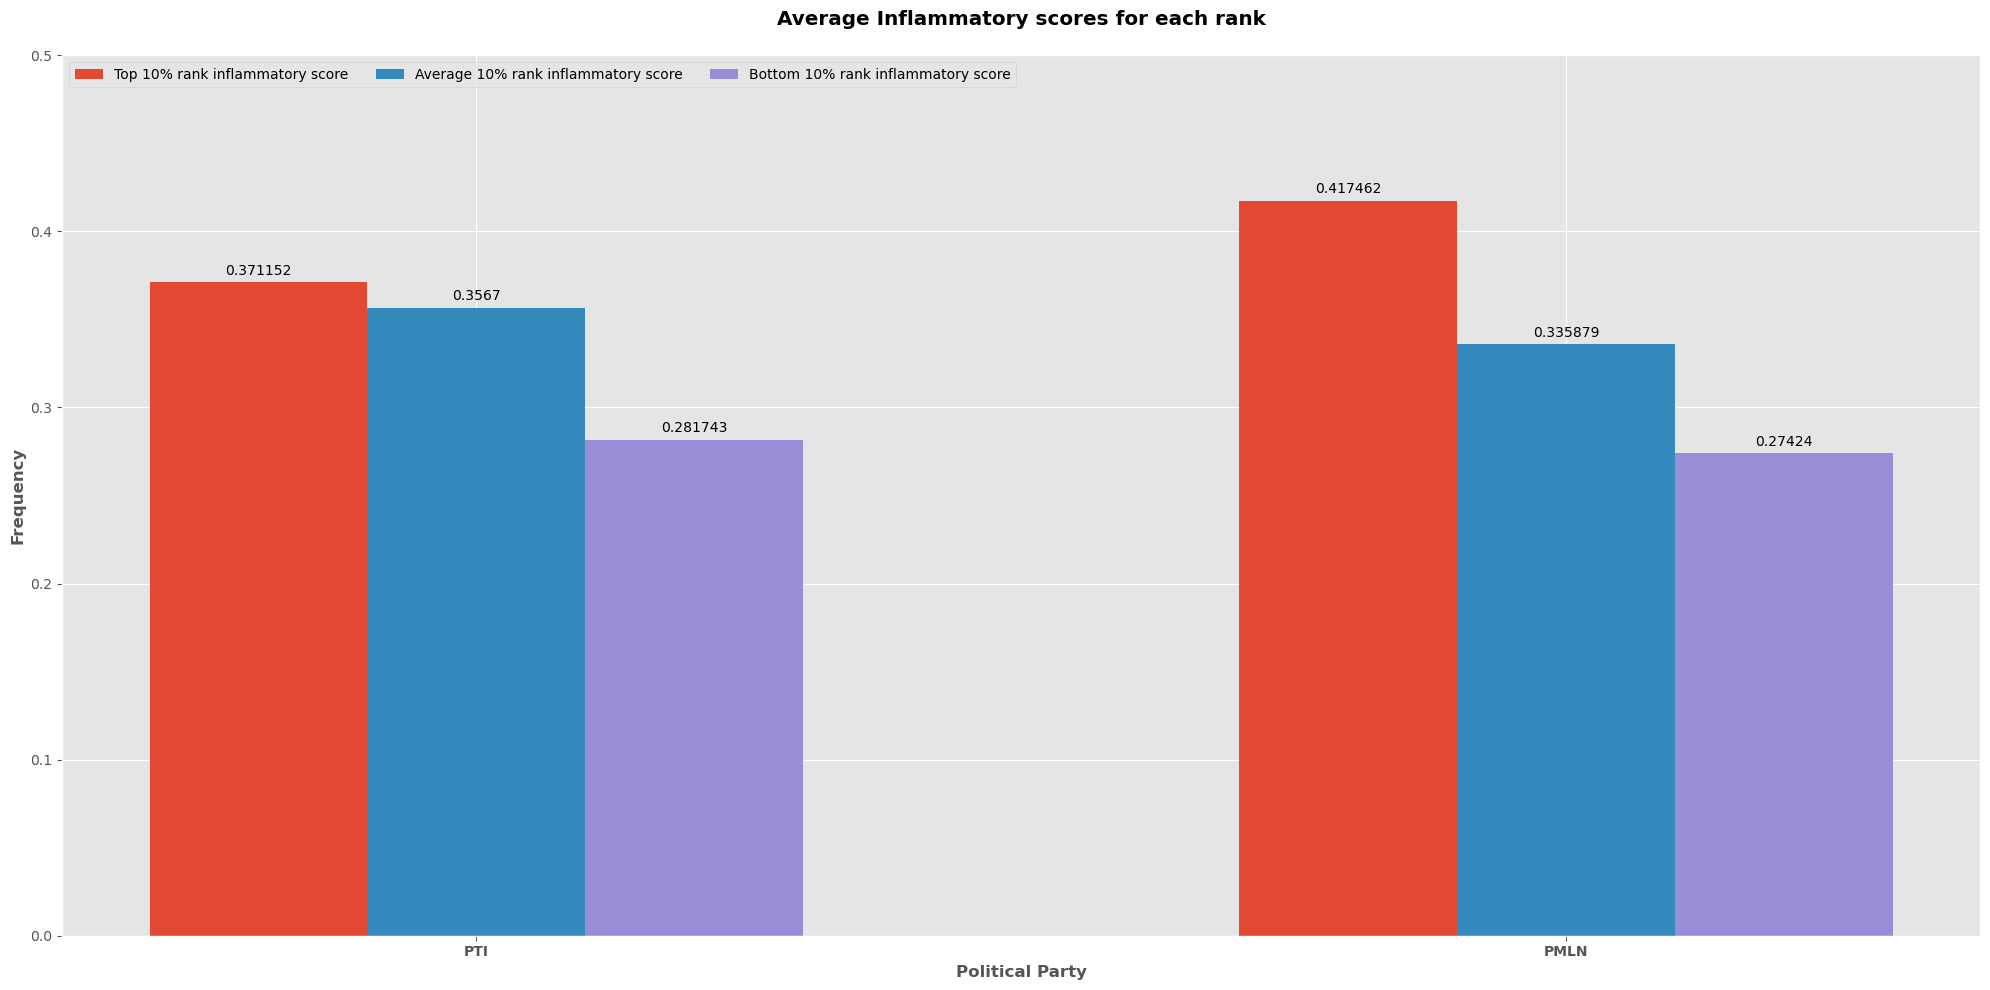

In [1969]:
x = np.arange(len(a))
width = 0.2  # the width of the bars
multiplier = 1
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in b.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_xlabel('Political Party', fontweight='bold')
ax.set_title('Average Inflammatory scores for each rank\n', fontweight='bold')
ax.set_xticks(x + 2*width, a)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.5)
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
fig.set_size_inches(20, 10)
fig.tight_layout()
plt.savefig('151.png', bbox_inches='tight')

plt.show()

In [1970]:
a = ("PTI", "PMLN")
b = {'Top 10% rank toxicity score': (mean_PTI['toxicity score']['Top 10%'], mean_PMLN['toxicity score']['Top 10%']),
     'Average 10% rank toxicity score': (mean_PTI['toxicity score']['avg 10%'], mean_PMLN['toxicity score']['avg 10%']),
     'Bottom 10% rank toxicity score': (mean_PTI['toxicity score']['bottom 10%'], mean_PMLN['toxicity score']['bottom 10%']),
    }

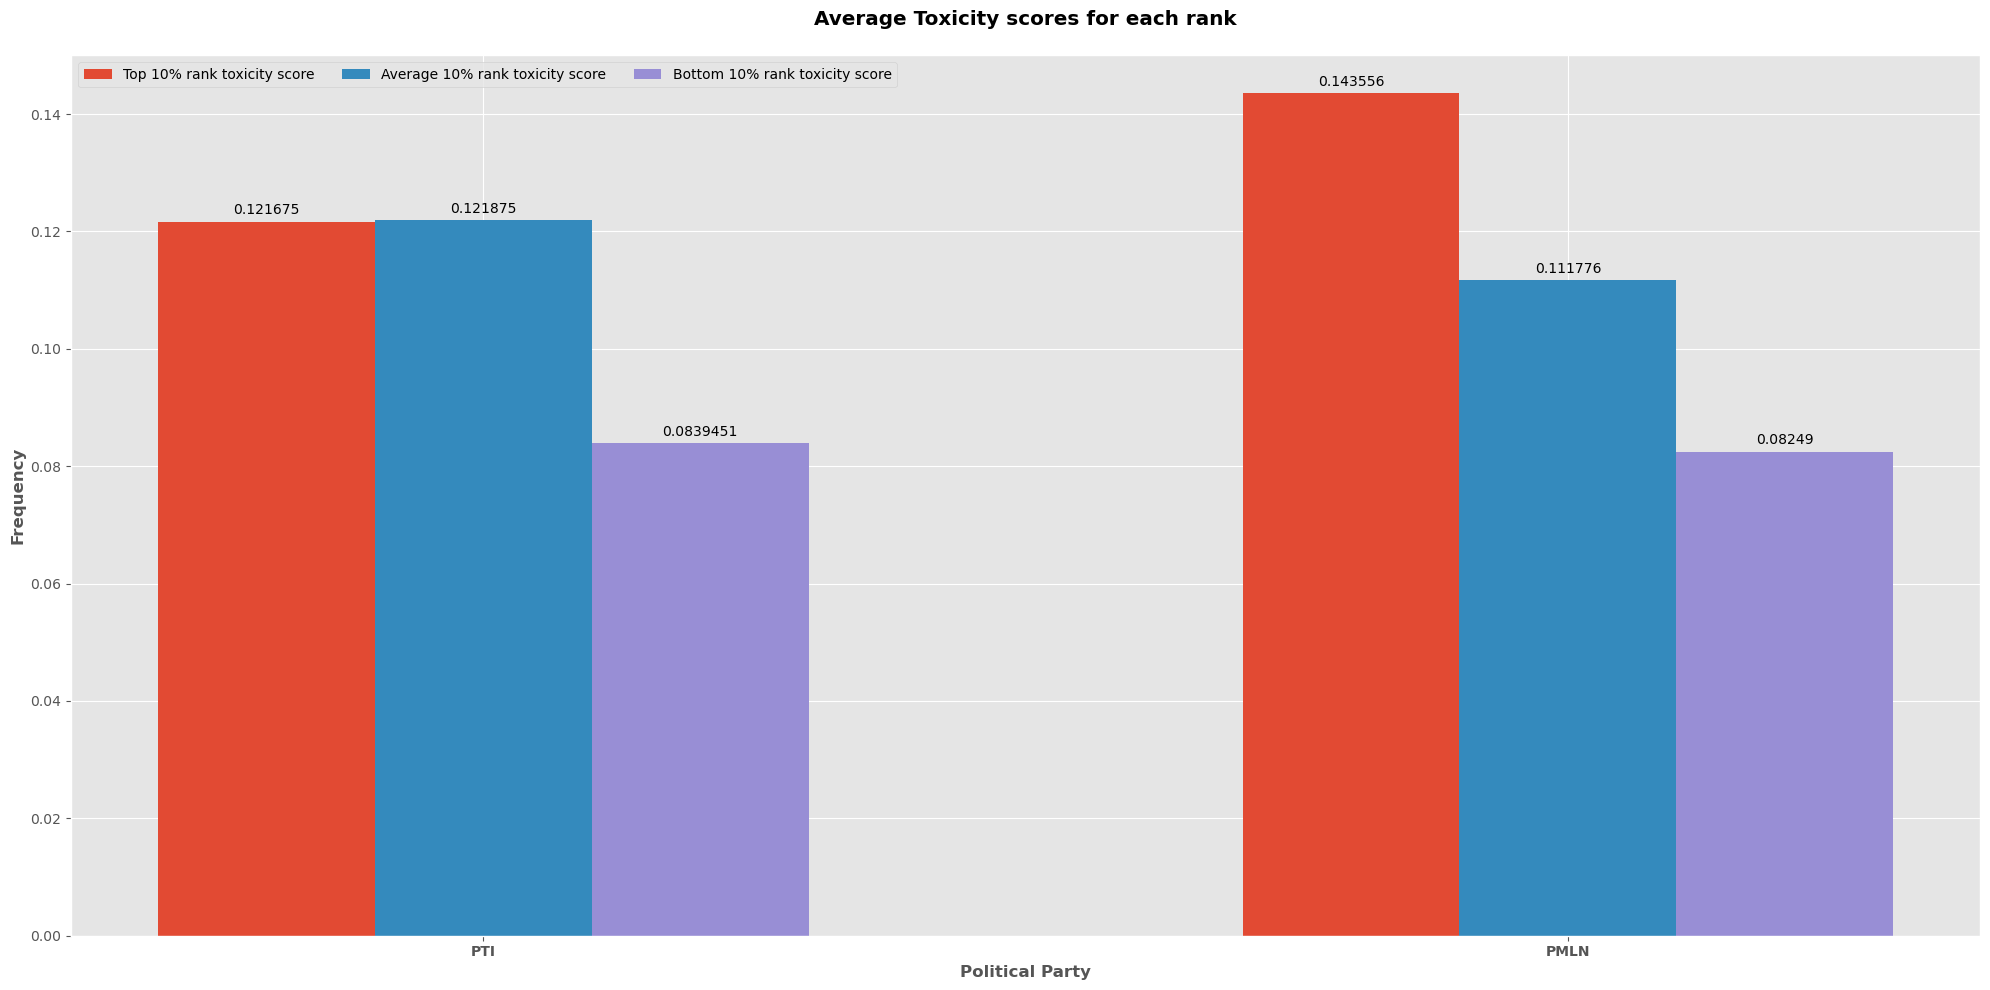

In [1971]:
x = np.arange(len(a))
width = 0.2  # the width of the bars
multiplier = 1
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in b.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_xlabel('Political Party', fontweight='bold')
ax.set_title('Average Toxicity scores for each rank\n', fontweight='bold')
ax.set_xticks(x + 2*width, a)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.15)
labels = ax.get_xticklabels() 
[label.set_fontweight('bold') for label in labels]
fig.set_size_inches(20, 10)
fig.tight_layout()

plt.savefig('152.png', bbox_inches='tight')
plt.show()